In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as pe
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
plt.show()
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("/Users/eshanakshata/Desktop/Project one/marketing_campaign.xlsx")
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

# Exploratory Data Analysis, Data Preprocessing, Data Cleaning

In [4]:
df.describe().T

count                           mean  \
ID                   2240.0                    5592.159821   
Year_Birth           2240.0                    1968.805804   
Income               2216.0                   52247.251354   
Kidhome              2240.0                       0.444196   
Teenhome             2240.0                        0.50625   
Dt_Customer            2240  2013-07-10 10:01:42.857142784   
Recency              2240.0                      49.109375   
MntWines             2240.0                     303.935714   
MntFruits            2240.0                      26.302232   
MntMeatProducts      2240.0                         166.95   
MntFishProducts      2240.0                      37.525446   
MntSweetProducts     2240.0                      27.062946   
MntGoldProds         2240.0                      44.021875   
NumDealsPurchases    2240.0                          2.325   
NumWebPurchases      2240.0                       4.084821   
NumCatalogPurchases  2240.0                       2.662054   
NumStorePurchases    2240.0                       5.790179   
NumWebVisitsMonth    2240.0                       5.316518   
AcceptedCmp3         2240.0                       0.072768   
AcceptedCmp4         2240.0                       0.074554   
AcceptedCmp5         2240.0                       0.072768   
AcceptedCmp1         2240.0                       0.064286   
AcceptedCmp2         2240.0                       0.013393   
Complain             2240.0                       0.009375   
Z_CostContact        2240.0                            3.0   
Z_Revenue            2240.0                           11.0   
Response             2240.0                       0.149107   

                                     min                  25%  \
ID                                   0.0              2828.25   
Year_Birth                        1893.0               1959.0   
Income                            1730.0              35303.0   
Kidhome                              0.0                  0.0   
Teenhome                             0.0                  0.0   
Dt_Customer          2012-07-30 00:00:00  2013-01-16 00:00:00   
Recency                              0.0                 24.0   
MntWines                             0.0                23.75   
MntFruits                            0.0                  1.0   
MntMeatProducts                      0.0                 16.0   
MntFishProducts                      0.0                  3.0   
MntSweetProducts                     0.0                  1.0   
MntGoldProds                         0.0                  9.0   
NumDealsPurchases                    0.0                  1.0   
NumWebPurchases                      0.0                  2.0   
NumCatalogPurchases                  0.0                  0.0   
NumStorePurchases                    0.0                  3.0   
NumWebVisitsMonth                    0.0                  3.0   
AcceptedCmp3                         0.0                  0.0   
AcceptedCmp4                         0.0                  0.0   
AcceptedCmp5                         0.0                  0.0   
AcceptedCmp1                         0.0                  0.0   
AcceptedCmp2                         0.0                  0.0   
Complain                             0.0                  0.0   
Z_CostContact                        3.0                  3.0   
Z_Revenue                           11.0                 11.0   
Response                             0.0                  0.0   

                                     50%                  75%  \
ID                                5458.5              8427.75   
Year_Birth                        1970.0               1977.0   
Income                           51381.5              68522.0   
Kidhome                              0.0                  1.0   
Teenhome                             0.0                  1.0   
Dt_Customer          2013-07-08 12:00:00  2013-12-30 06:00:00   
Recency  

In [5]:
print(df['Z_CostContact'].var())
print(df['Z_Revenue'].var())

0.0
0.0


In [6]:
# We can see that variance nad std of above 2 columns is 0,
# it means it is not representing any extra information, so droping these 2 columns
# also column ID is also not important which is not telling any extra information regarding problem. So droping ID column also.
df.drop(columns=['Z_CostContact', 'Z_Revenue', 'ID'], inplace=True)

In [7]:
# Checking for dataframe overall information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-nul

In [8]:
# Cheking for missing vales.
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [9]:
# There are 24 missing values in 'Income' column.
# There are categorical features availabe which we need to encode into numerical further.
# We can see the data type of 'Dt_customer' column id datetime64 it means it has already parsed dates from column / data.

In [10]:
df.dropna(inplace=True)

In [11]:
# missing values has been removed

In [12]:
# checking for duplicated records 
df[df.duplicated()]

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
83          1963      Master       Together  38620.0        0         0   
179         1951    2n Cycle        Married  78497.0        0         0   
281         1976  Graduation       Together  51369.0        0         1   
282         1946  Graduation       Together  37760.0        0         0   
363         1978         PhD        Married  37717.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2218        1978  Graduation       Together  22775.0        1         0   
2221        1982      Master         Single  75777.0        0         0   
2225        1968  Graduation       Together  58554.0        1         1   
2234        1974  Graduation        Married  34421.0        1         0   
2236        1946         PhD       Together  64014.0        2         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
83    2013-05-11       56       112         17  ...                    5   
179   2013-12-01       44       207         26  ...                    7   
281   2012-10-25       84       297          7  ...                    2   
282   2012-08-31       20        84          5  ...                    1   
363   2012-11-23       31         9          0  ...                    0   
...          ...      ...       ...        ...  ...                  ...   
2218  2013-06-19       40         5          1  ...                    0   
2221  2013-07-04       12       712         26  ...                    6   
2225  2012-09-26       55       368         24  ...                    2   
2234  2013-07-01       81         3          3  ...                    0   
2236  2014-06-10       56       406          0  ...                    2   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
83                    3                  3             0             0   
179                  12                  2             0             0   
281                   4                  8             0             0   
282                   6                  7             0             0   
363                   2                  9             0             0   
...                 ...                ...           ...           ...   
2218                  2                  8             0             0   
2221                 11                  1             0             1   
2225                  6                  7             0             0   
2234                  2                  7             0             0   
2236                  5                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
83               0             0             0         0         0  
179              0             1             0         0         0  
281              0             0             0         0         0  
282              0             0             0         0         0  
363              0             0             0         0         0  
...            ...           ...           ...       ...       ...  
2218             0             0             0         0         0  
2221             1             0             0         0         1  
2225             0             0             0         0         0  
2234             0             0             0         0         0  
2236             0             1             0         0         0  

[182 rows x 26 columns]

In [13]:
df.drop_duplicates(keep='first', inplace=True)

In [14]:
df[df.duplicated()]

Empty DataFrame
Columns: [Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response]
Index: []

[0 rows x 26 columns]

In [15]:
# There are no duplicate records

In [16]:
# Creating new column 'AGE' from 'Year_Birth' column.
# calculating age of customer uptill current year
df['Age'] = 2024 - df['Year_Birth']

# creating a new column for calculating customer relationship with company in years.
# Extracting year from Dt_Customer column
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%Y-%m-%d")

# Extracting the year (when customer has enrolled) from column and converting it into integer data type
df['Cust_Enrol_Year'] = df['Dt_Customer'].dt.year.astype(int)
# Calculate the years since customer enrollment with company
df['Cust_Since(yrs)'] = 2024 - df['Cust_Enrol_Year']
df[['Cust_Since(yrs)']]

# combining Kidhome & Teenhome columns into0 single column 
df['Num_Childrns'] = df['Kidhome'] + df['Teenhome']

# droping unwanted & unnecessary columns
df.drop(columns = ['Dt_Customer', 'Cust_Enrol_Year', 'Year_Birth', 'Kidhome', 'Teenhome'], inplace = True)
df.head(3)

Education Marital_Status   Income  Recency  MntWines  MntFruits  \
0  Graduation         Single  58138.0       58       635         88   
1  Graduation         Single  46344.0       38        11          1   
2  Graduation       Together  71613.0       26       426         49   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0              546              172                88            88  ...   
1                6                2                 1             6  ...   
2              127              111                21            42  ...   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   

   Complain  Response  Age  Cust_Since(yrs)  Num_Childrns  
0         0         1   67               12             0  
1         0         0   70               10             2  
2         0         0   59               11             0  

[3 rows x 25 columns]

# Data Visualization

<Axes: >

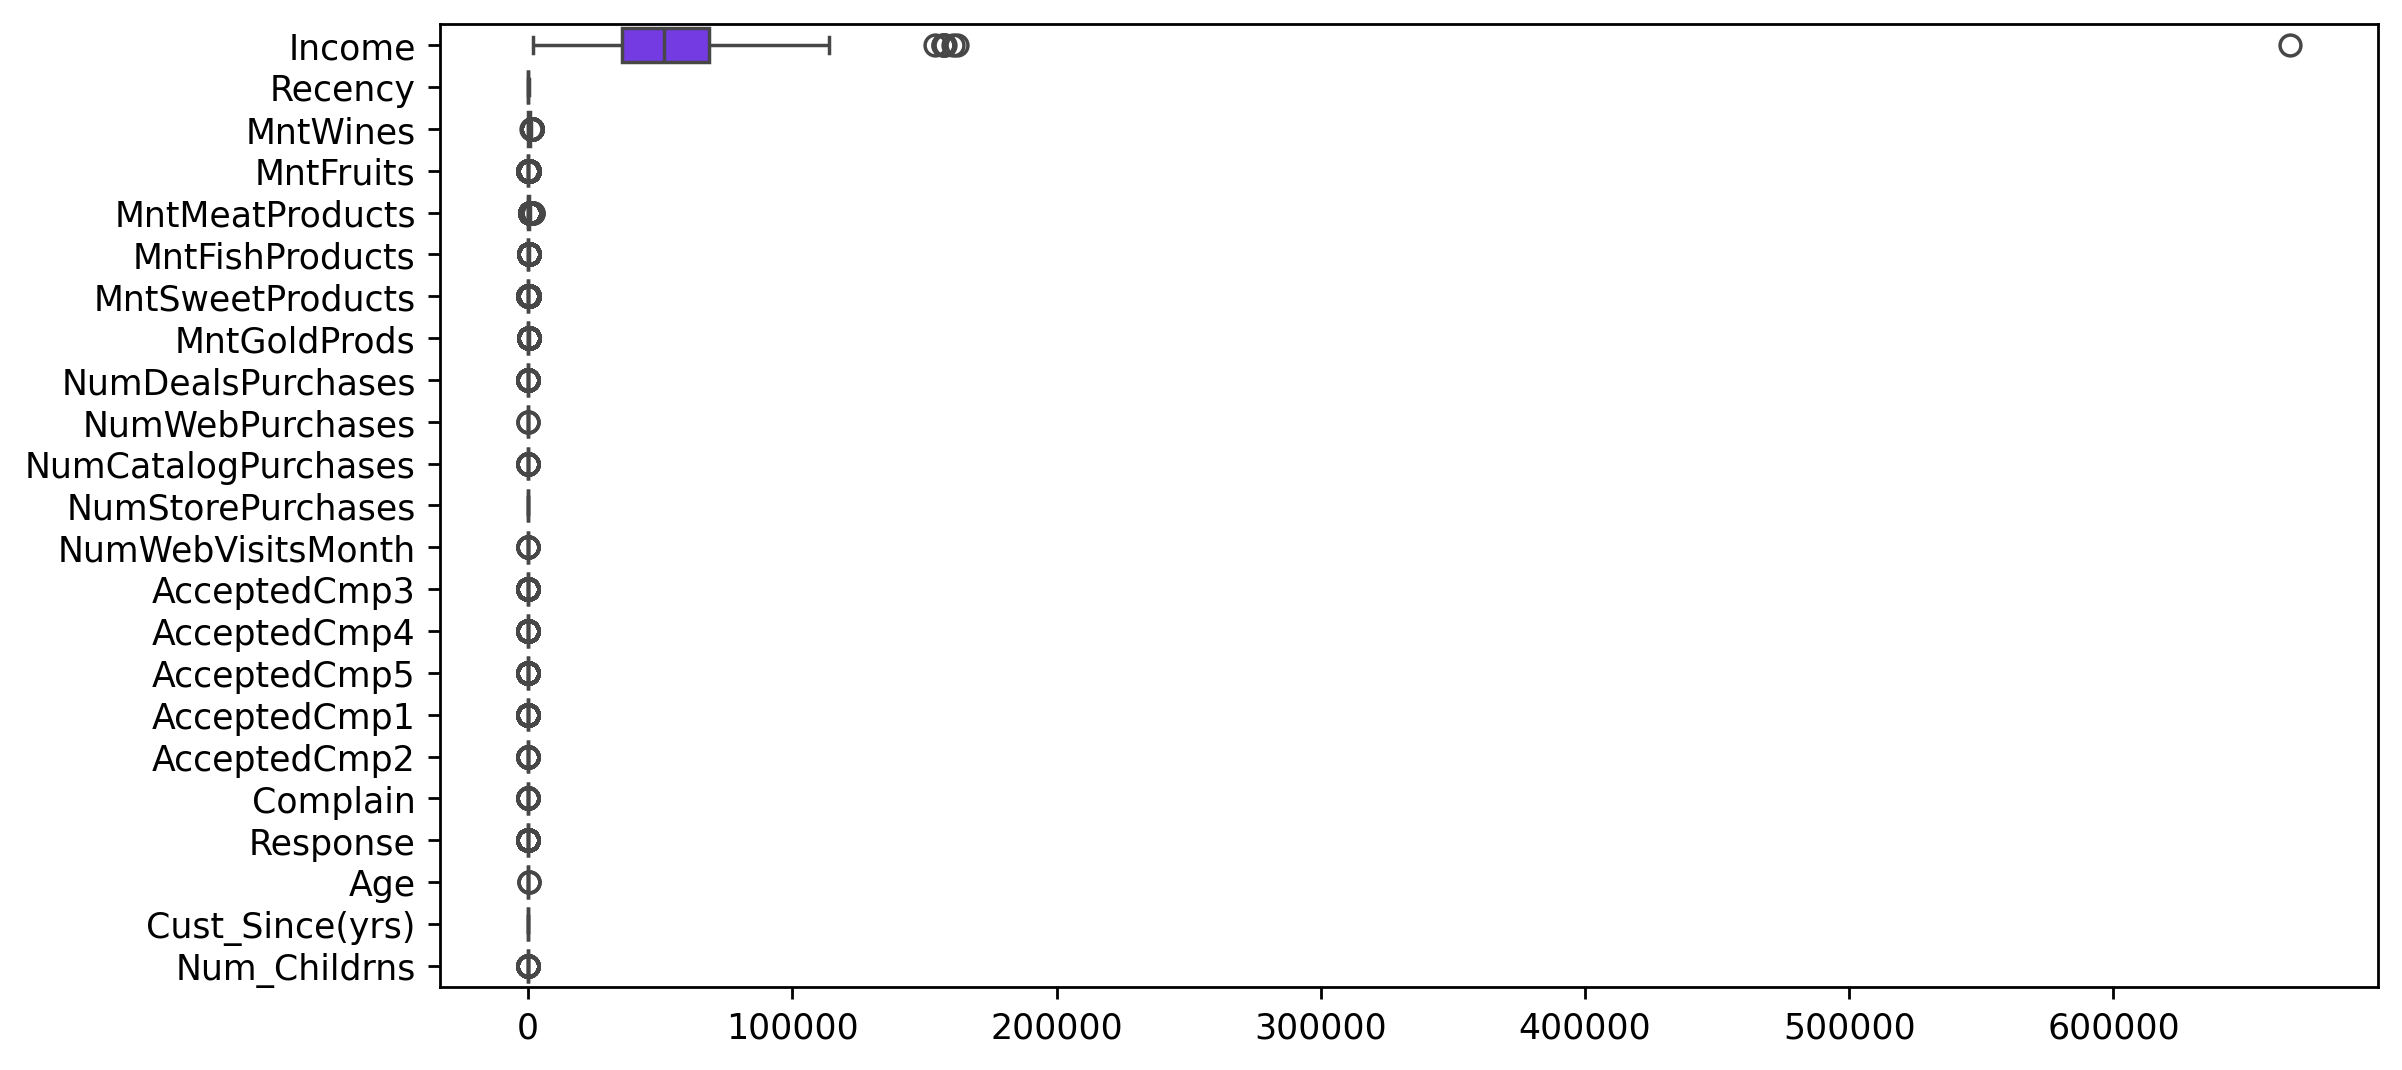

In [17]:
# checking the presence of outliers
sns.boxplot(df,orient = 'h', palette='rainbow')

In [18]:
# There is presence of outliers in features, will treat them later.

In [19]:
# converting all campaign columns into one 
lis = []
for i in range(df.shape[0]):
    if df.iloc[i,20]==1:
        lis.append(3)
    elif df.iloc[i,24]==1:
        lis.append(2)
    elif df.iloc[i,23]==1:
        lis.append(1)
    elif df.iloc[i,21]==1:
        lis.append(4)
    elif df.iloc[i,22]==1:
        lis.append(5)
    else :
        lis.append(0)
        
df['AcceptedCmp'] = lis
df.drop(columns = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'], inplace= True)
df.head(3)

Education Marital_Status   Income  Recency  MntWines  MntFruits  \
0  Graduation         Single  58138.0       58       635         88   
1  Graduation         Single  46344.0       38        11          1   
2  Graduation       Together  71613.0       26       426         49   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0              546              172                88            88  ...   
1                6                2                 1             6  ...   
2              127              111                21            42  ...   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   

   Complain  Response  Age  Cust_Since(yrs)  Num_Childrns  AcceptedCmp  
0         0         1   67               12             0            4  
1         0         0   70               10             2            0  
2         0         0   59               11             0            0  

[3 rows x 21 columns]

Number of Samples According to Marital Status =  
Marital_Status
Married     788
Together    514
Single      439
Divorced    216
Widow        70
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


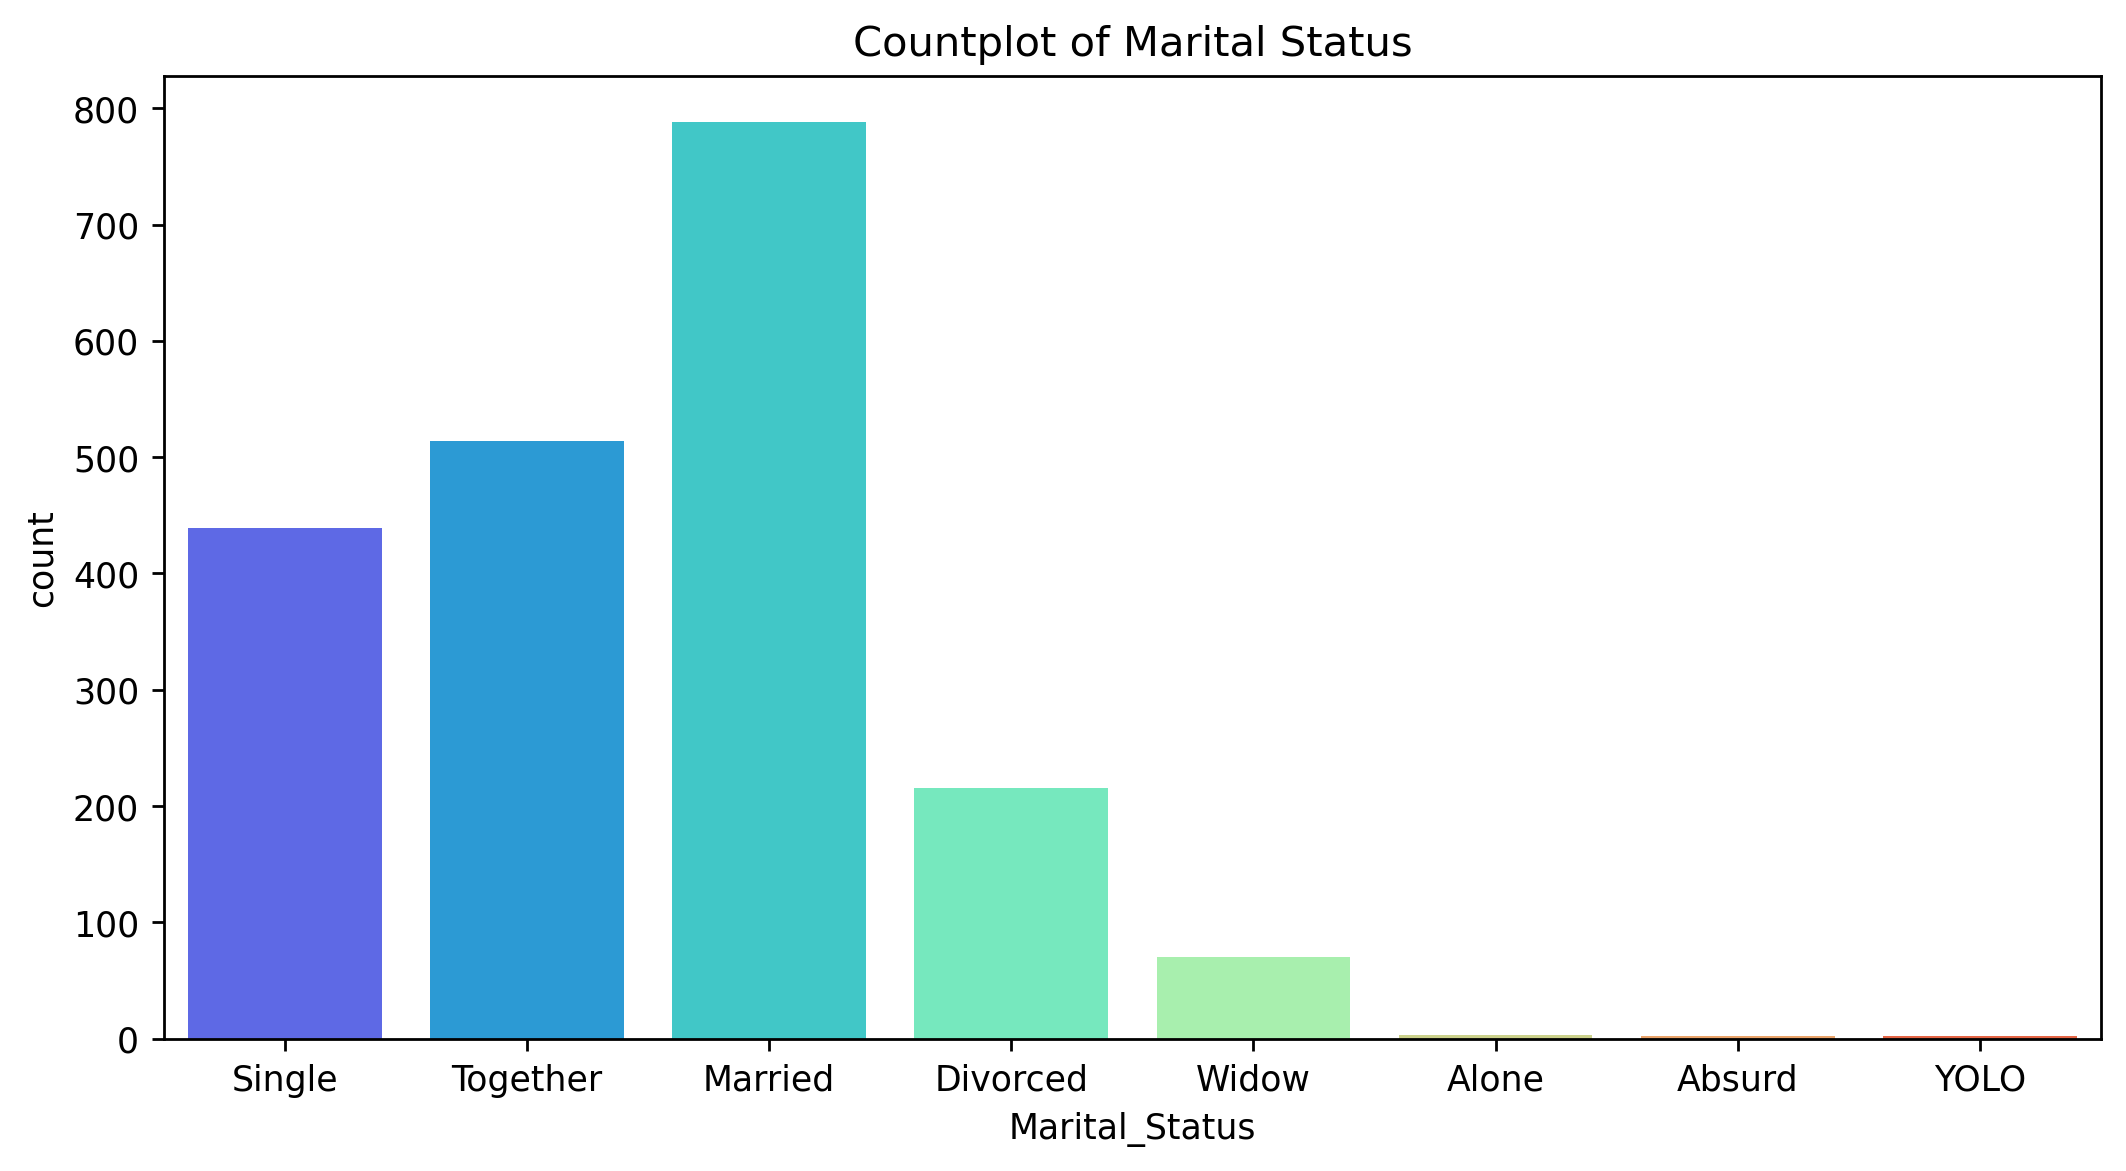

In [20]:
# Data Visualization for Data Preprocessing
# Countplot of Maritial_Status
sns.countplot(data=df,x=df['Marital_Status'], palette="rainbow")
plt.title('Countplot of Marital Status')
print(f"Number of Samples According to Marital Status =  \n{df['Marital_Status'].value_counts()}")

In [21]:
# Here ALone means Single, SO we need to replace Alone with single
# and Together means they are legally married
df['Marital_Status'].replace('Alone', 'Single', inplace=True)
df['Marital_Status'].replace('Together', 'Engaged', inplace=True)

In [22]:
# creating a new column for Total amount spend on products.
df['Total_amt_spend'] = df['MntWines'] + df['MntFishProducts'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntGoldProds'] + df['MntFruits']

In [23]:
# Creating a new column for Total Purchases
df['Total_Purchases'] = df['NumCatalogPurchases'] + df['NumDealsPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases']

Number of Samples According to Marital Status =  
Education
Graduation    1019
PhD            445
Master         336
2n Cycle       185
Basic           49
Name: count, dtype: int64


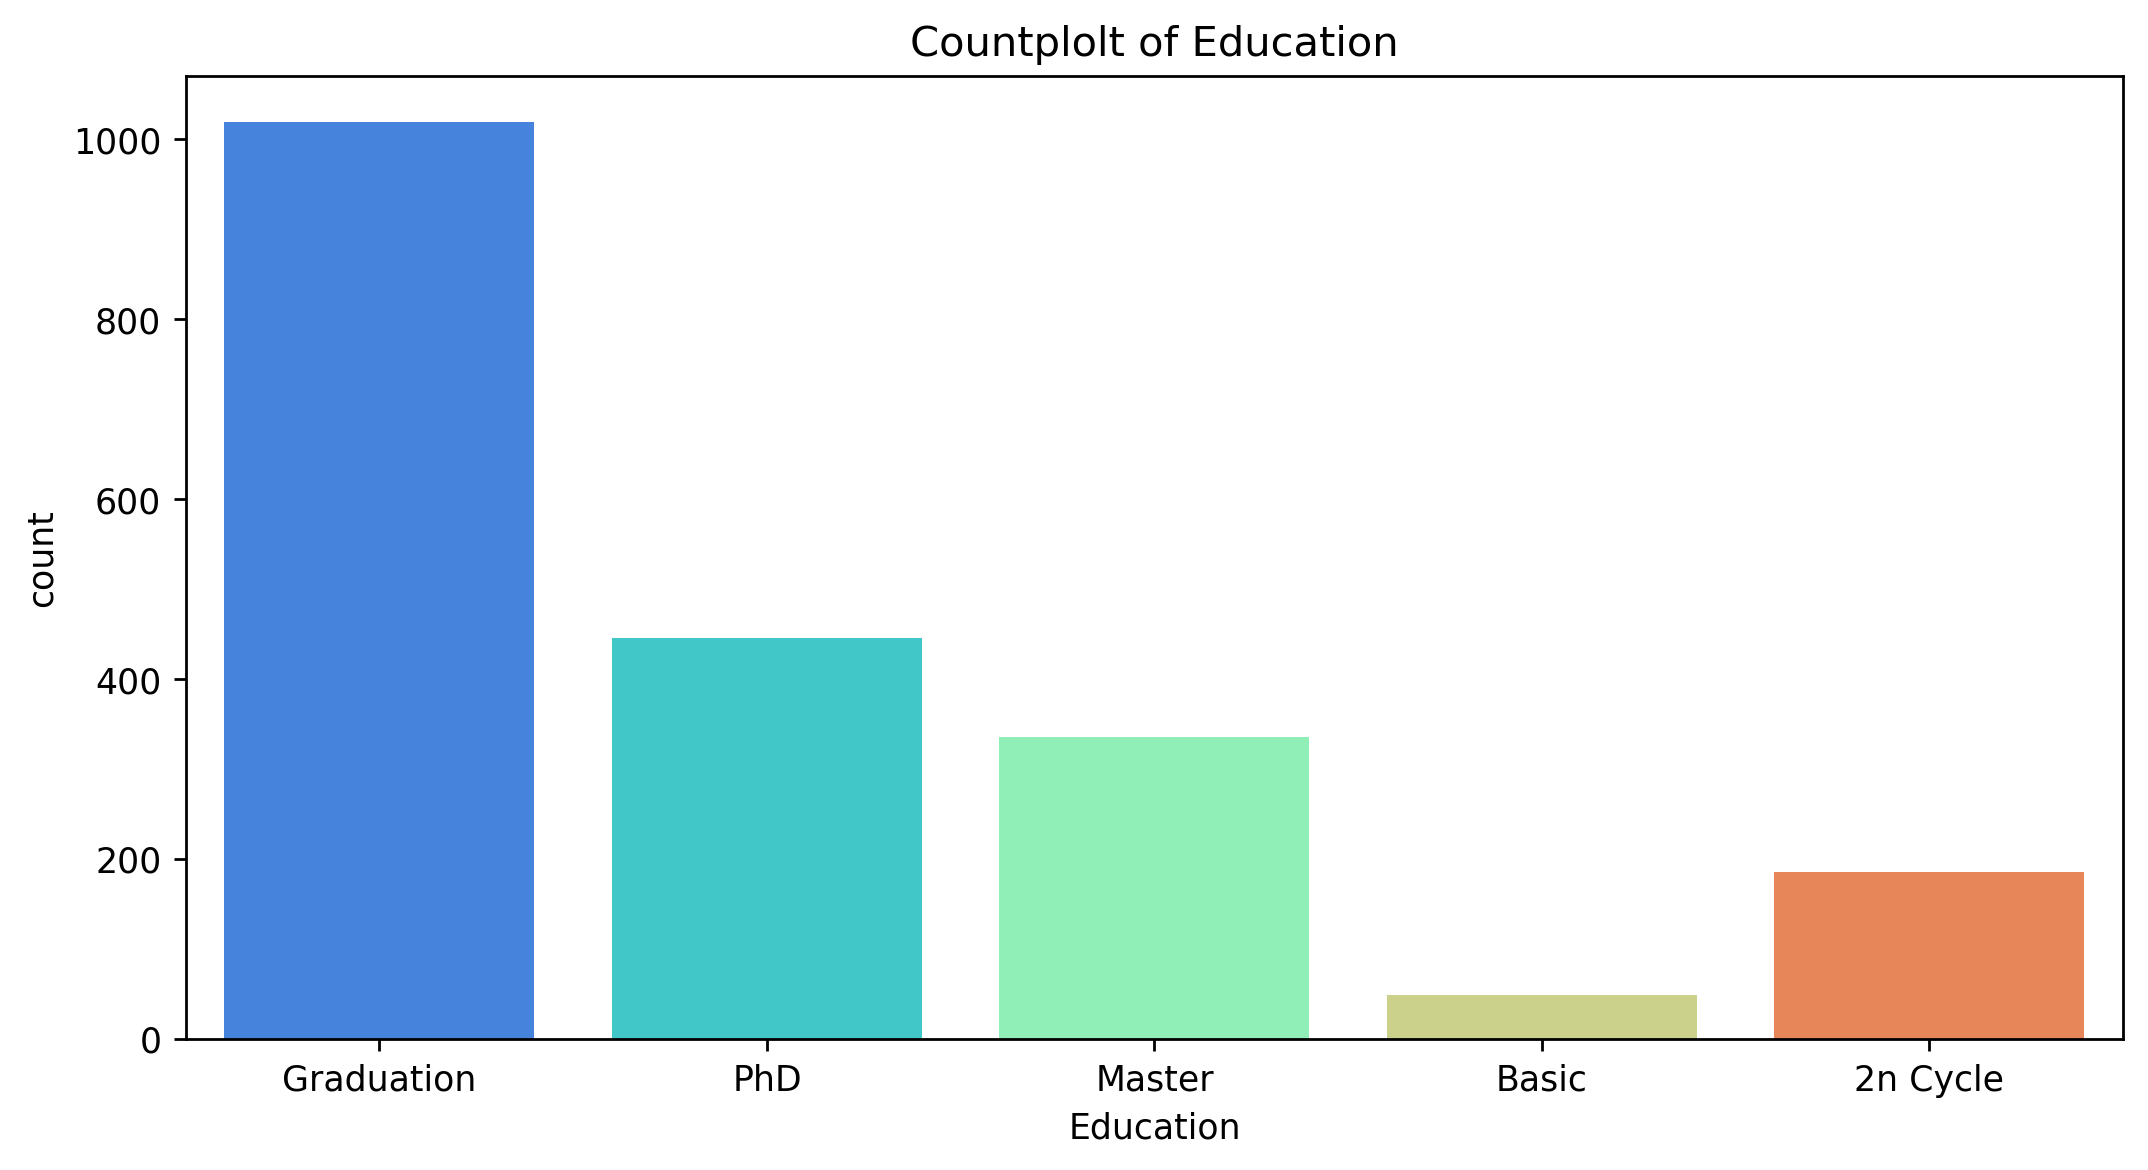

In [24]:
# Data Visualization
# Barplot of Education
sns.countplot(data=df,x=df['Education'], palette='rainbow')
plt.title('Countplolt of Education')
print(f"Number of Samples According to Marital Status =  \n{df['Education'].value_counts()}")

In [25]:
# Creating group category of Years_born column
# creating a function for getting extreme values and Interquartile range values of any column from dataset.
def iqr(column, data):
    q1 = df[column].quantile(0.25),
    q3 = df[column].quantile(0.75),
    maxx= df[column].max(),
    minn=df[column].min(),
    return print(f"q1"), print(q3),print(minn), print(maxx)

iqr('Age', df)

q1
(65.0,)
(28,)
(131,)


(None, None, None, None)

Text(0.5, 1.0, 'Countplot between Education and Age_Groups')

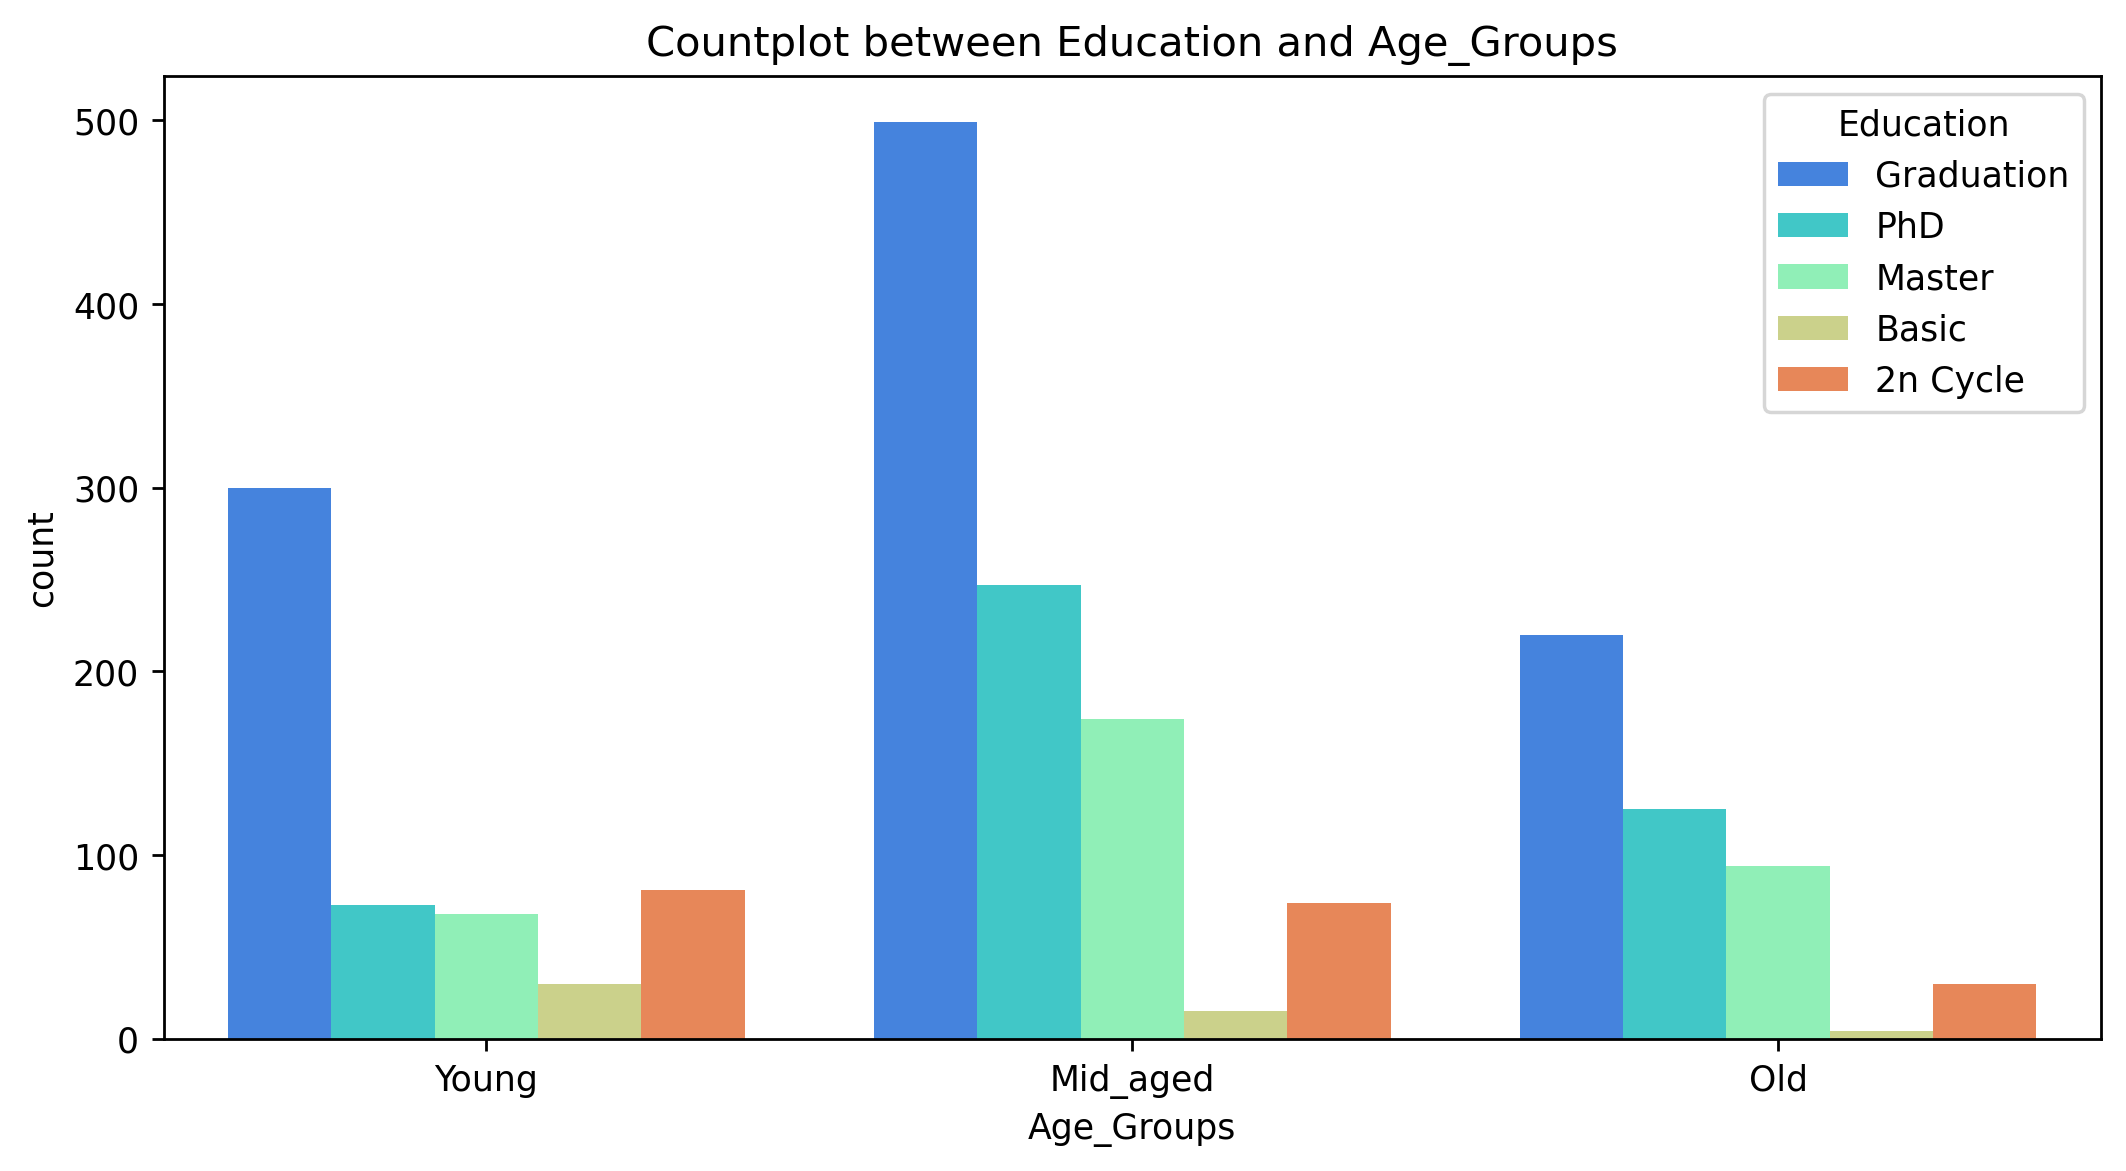

In [26]:
# labels = ['1893-1959', '1960-1977', '1978+']
# ranges=[0, 1959, 1977, 1996]
labels = ['Young', 'Mid_aged', 'Old']
ranges=[0, 47, 65, 131]
df['Age_Groups'] = pd.cut(df['Age'],bins = ranges, labels = labels)

# Plotting countplot using relation between birth year and Education
sns.countplot(data = df,x = df['Age_Groups'], hue = df['Education'], palette = 'rainbow')
plt.title('Countplot between Education and Age_Groups')

Text(0.5, 1.0, 'Countplot between Total Amount spend and Age Groups')

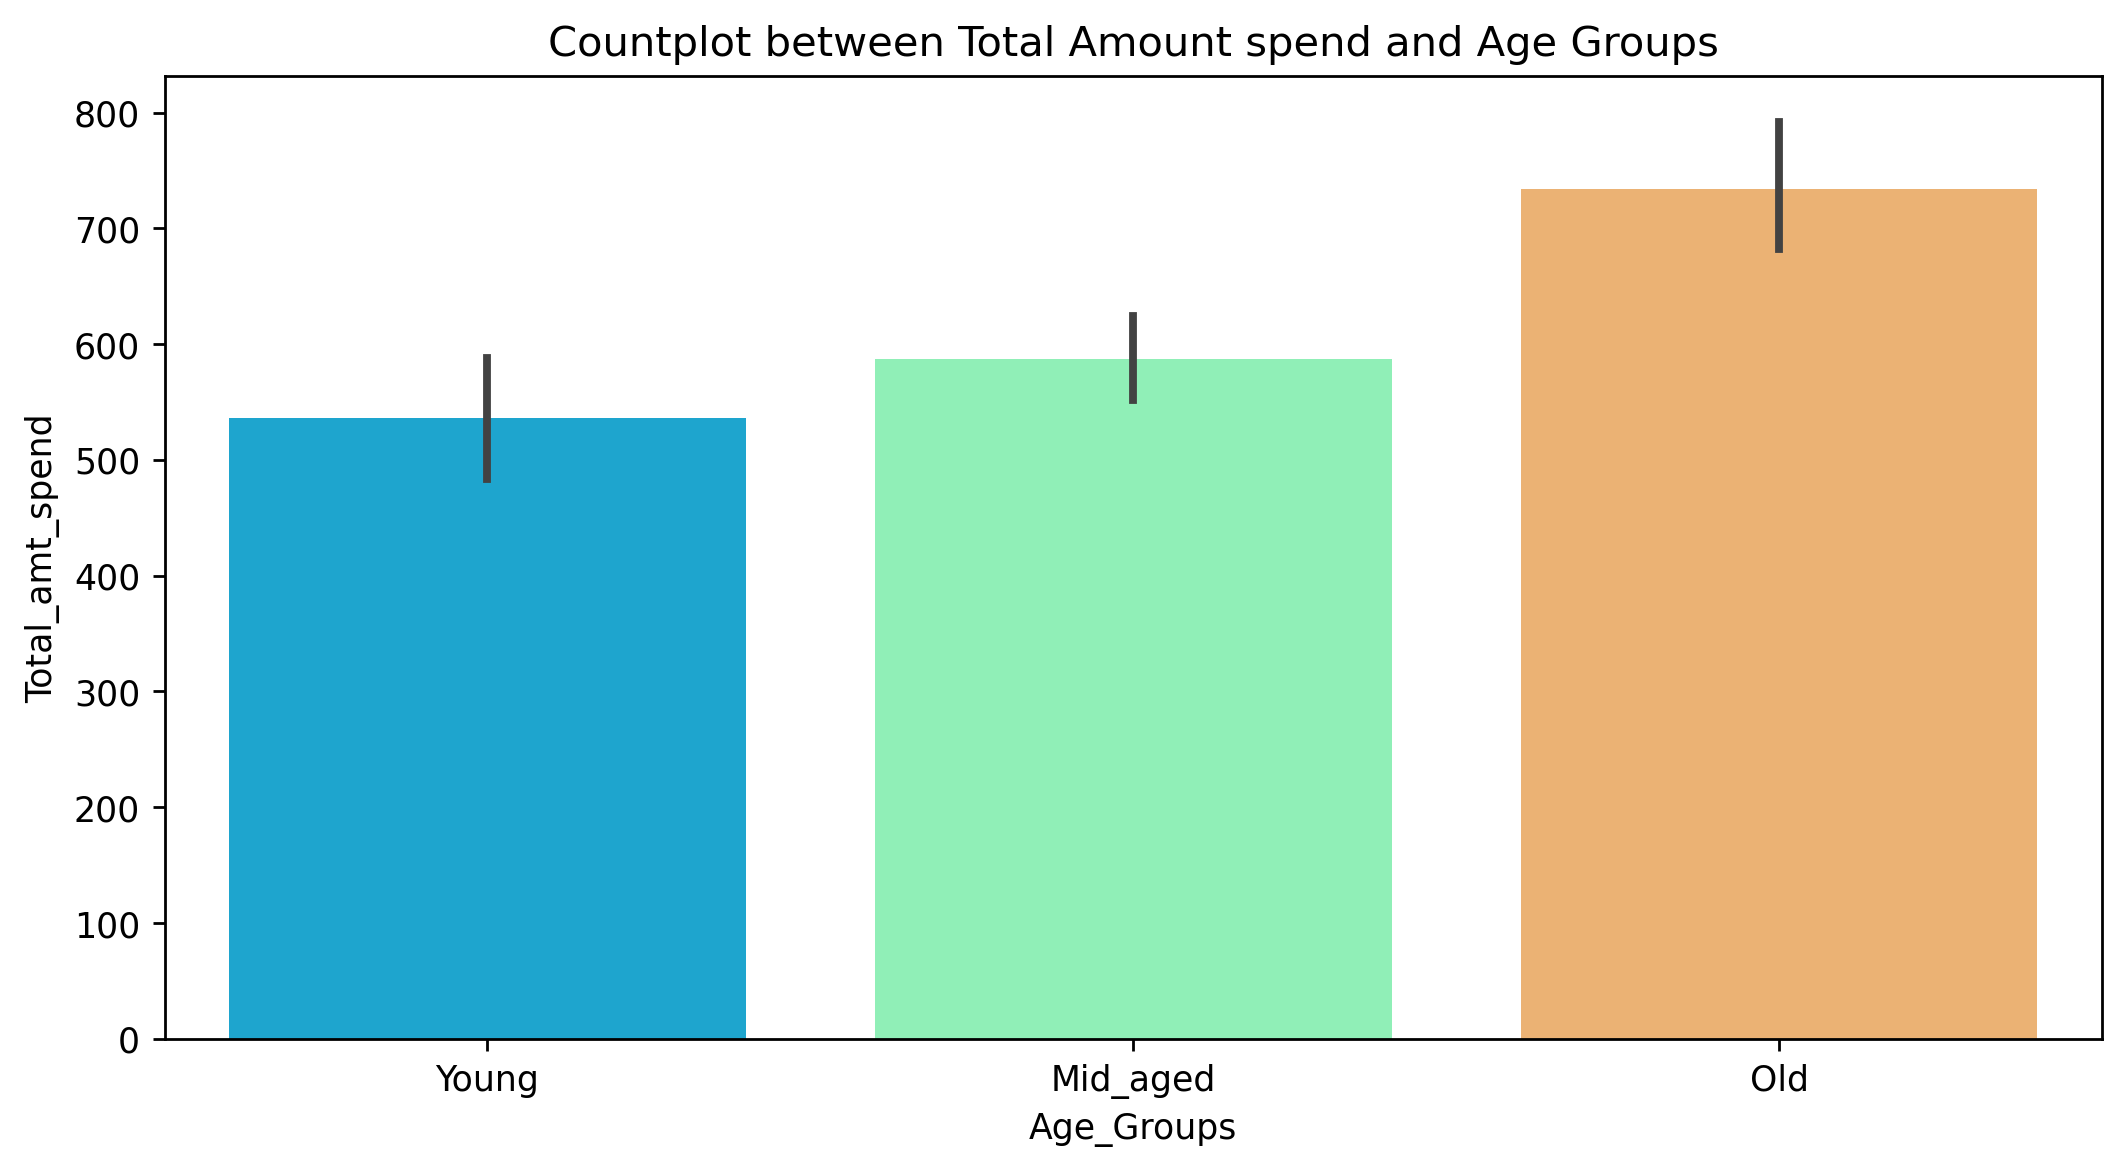

In [27]:
sns.barplot(data = df, y = df['Total_amt_spend'], x = df['Age_Groups'], palette = 'rainbow')
plt.title('Countplot between Total Amount spend and Age Groups')###################################################

Text(0.5, 1.0, 'Countplot between Total Purchases and Age Groups')

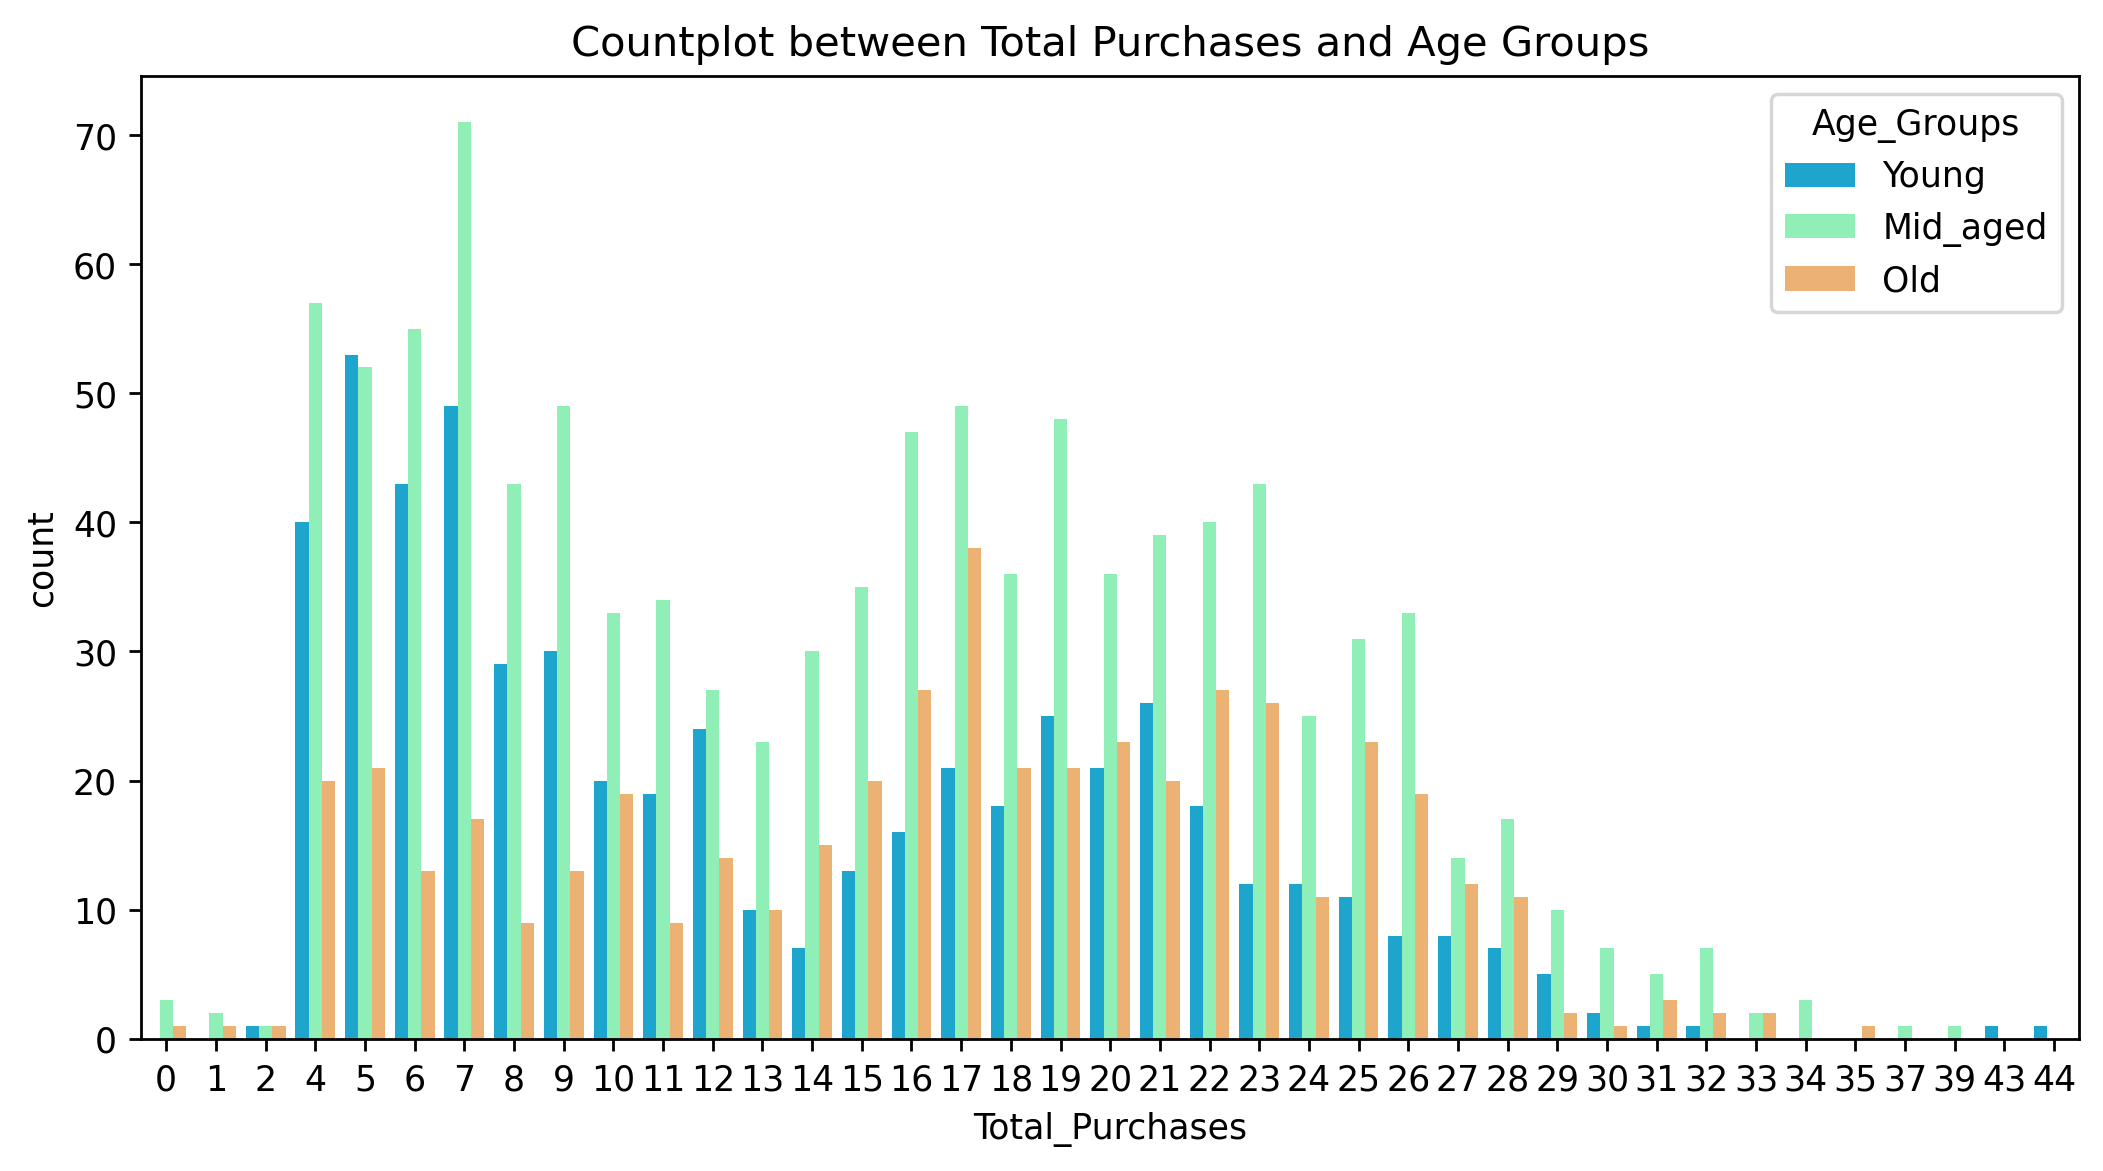

In [28]:
sns.countplot(data = df,x = df['Total_Purchases'], hue = df['Age_Groups'], palette = 'rainbow')
plt.title('Countplot between Total Purchases and Age Groups')#######################*******************************

Text(0.5, 1.0, 'Countplot between Total_Purchases spend and Age_Groups')

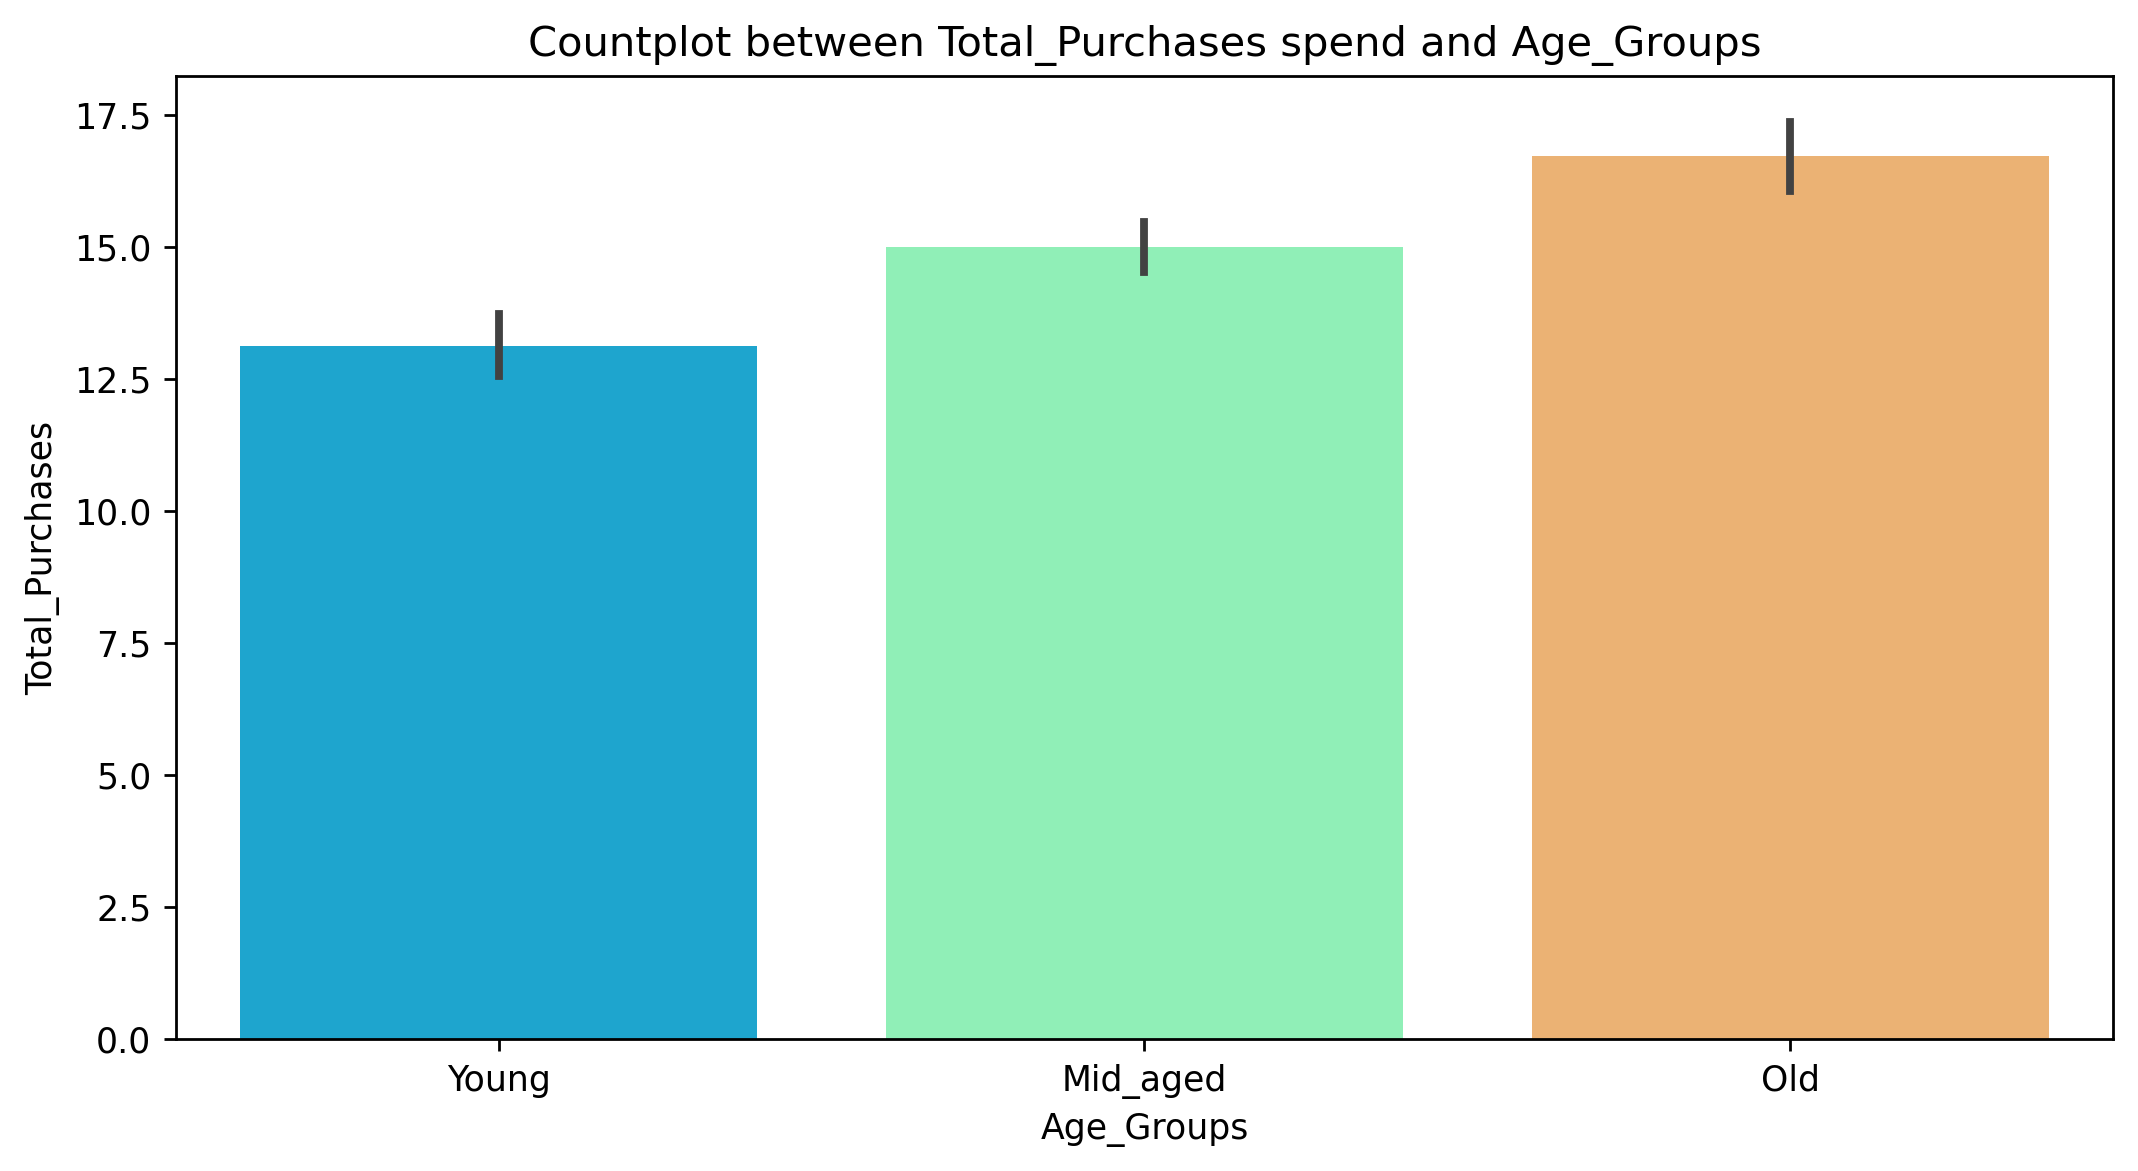

In [29]:
sns.barplot(data = df, y = df['Total_Purchases'], x = df['Age_Groups'], palette = 'rainbow')
plt.title('Countplot between Total_Purchases spend and Age_Groups')####################################################

Text(0.5, 1.0, 'Countplot between Age and Maritial_Status')

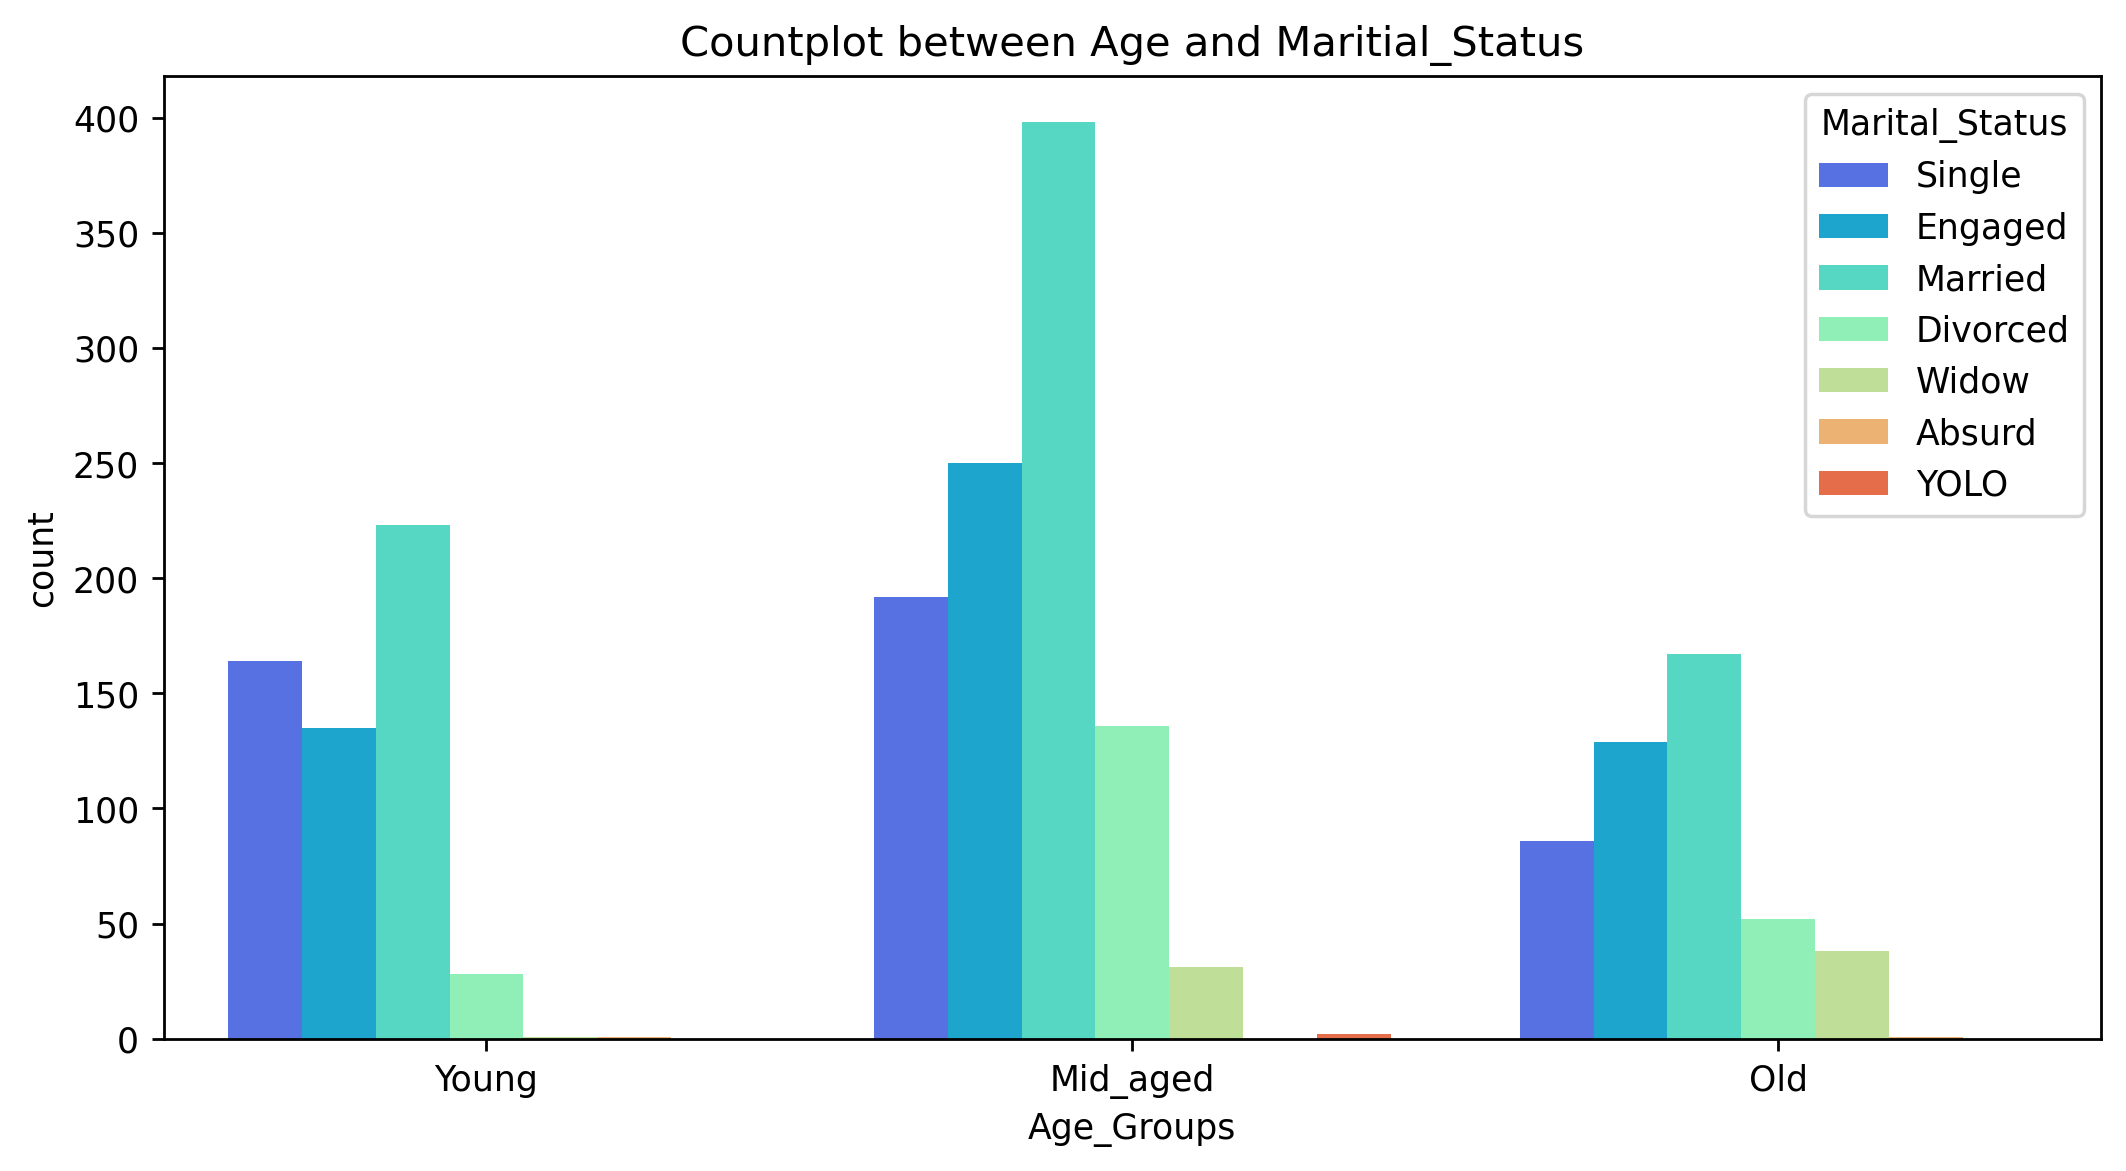

In [30]:
# Countplot between Year_Birth and Maritial_Status
sns.countplot(data = df,x = df['Age_Groups'], hue = df['Marital_Status'], palette='rainbow')
plt.title("Countplot between Age and Maritial_Status")

In [31]:
# lets see what is the best selling product
df.head(2)

Education Marital_Status   Income  Recency  MntWines  MntFruits  \
0  Graduation         Single  58138.0       58       635         88   
1  Graduation         Single  46344.0       38        11          1   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0              546              172                88            88  ...   
1                6                2                 1             6  ...   

   NumWebVisitsMonth  Complain  Response  Age  Cust_Since(yrs)  Num_Childrns  \
0                  7         0         1   67               12             0   
1                  5         0         0   70               10             2   

   AcceptedCmp  Total_amt_spend  Total_Purchases  Age_Groups  
0            4             1617               25         Old  
1            0               27                6         Old  

[2 rows x 24 columns]

Text(0.5, 1.0, 'Best Selling Product')

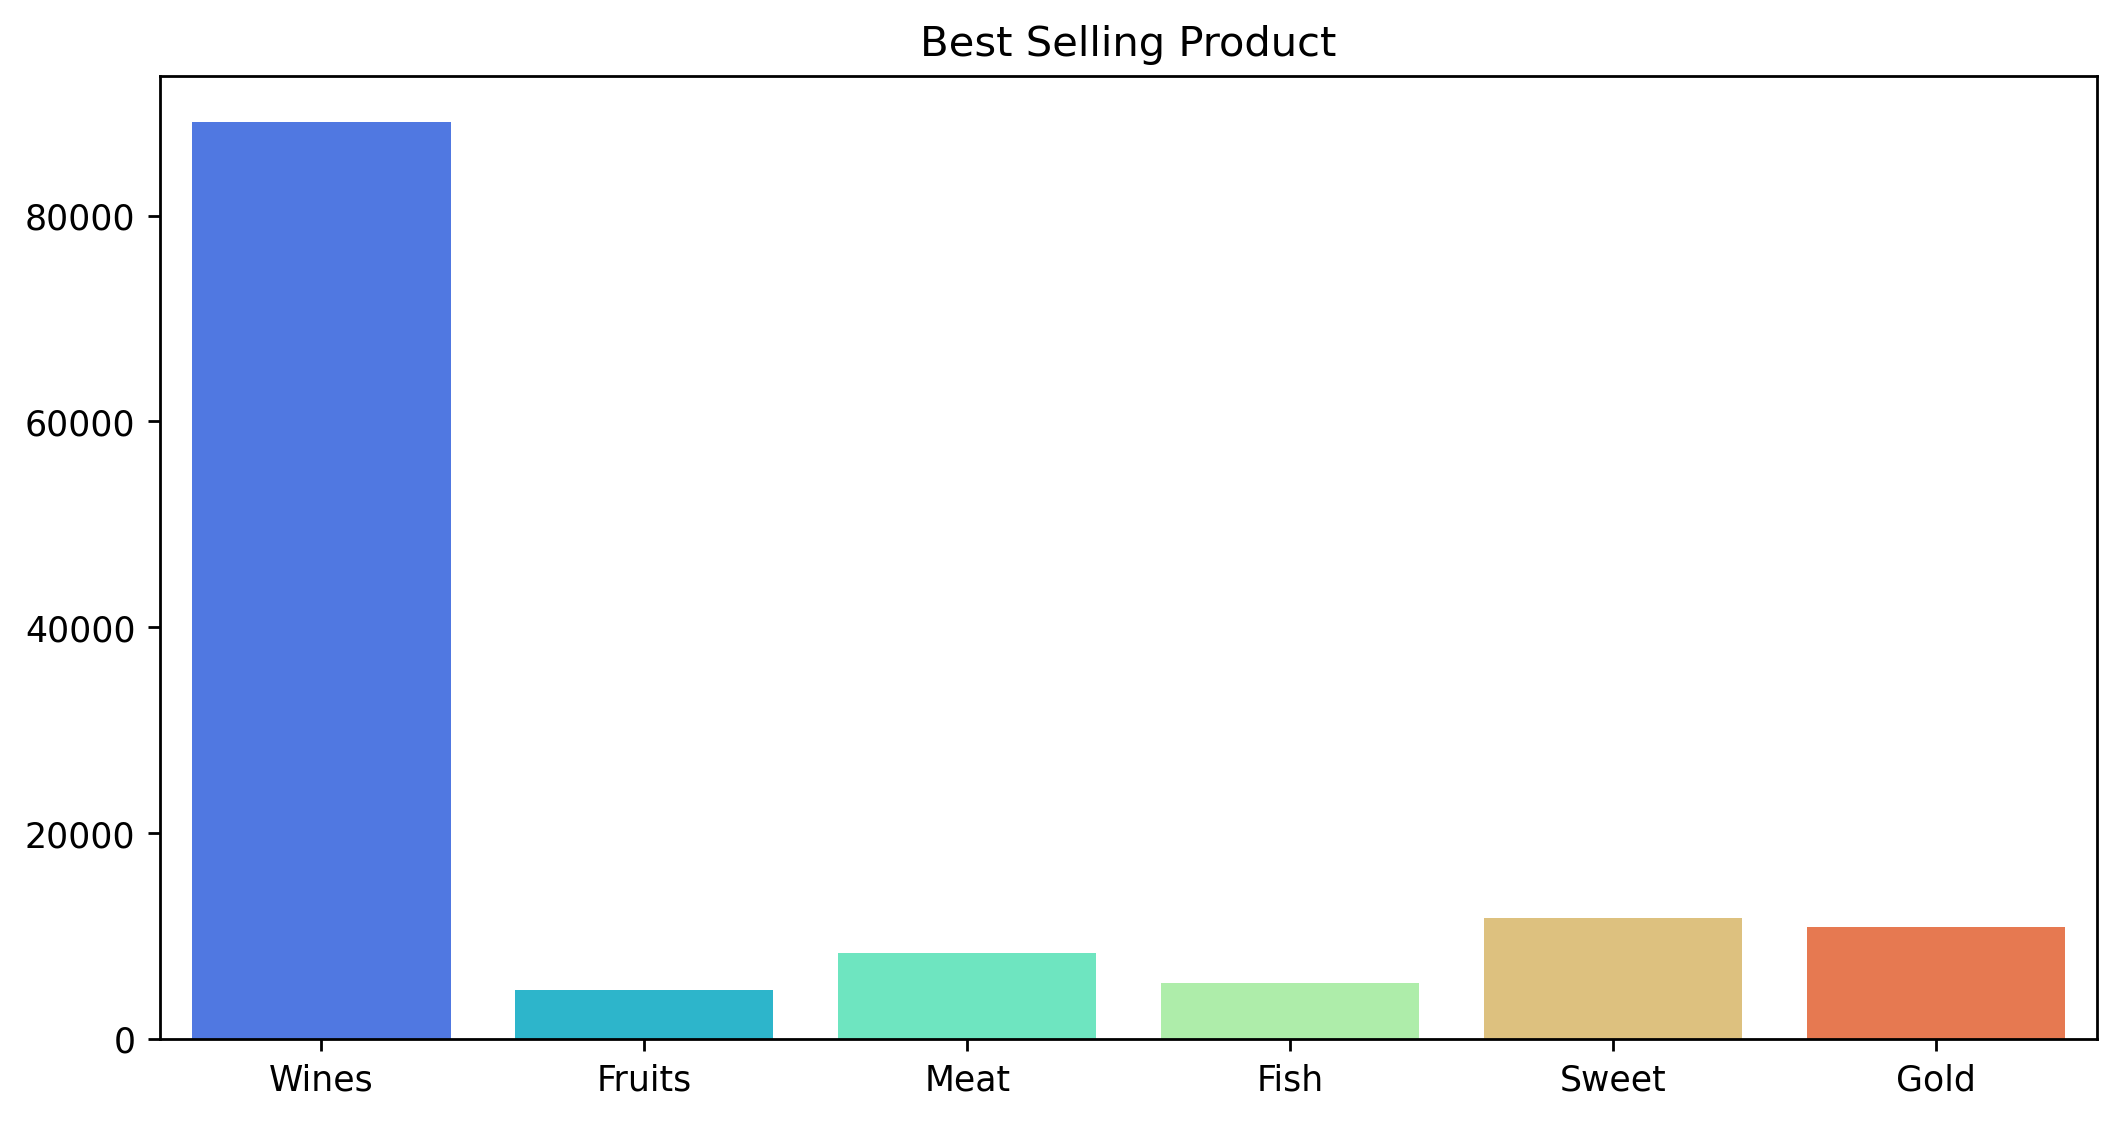

In [32]:
products = ['Wines','Fruits','Meat','Fish','Sweet','Gold']
# iterate through the columns and bring the sum of the values 
values = [df[col].sum() for col in df.columns[9:15]]
sns.barplot(x= products, y = values, palette = 'rainbow')
plt.title('Best Selling Product')

In [33]:
# sns.barplot(x= products, y = values, hue=df['Age_Groups'], palette = 'rainbow') ##################

Text(0.5, 1.0, "Customer's Interest in Campaign")

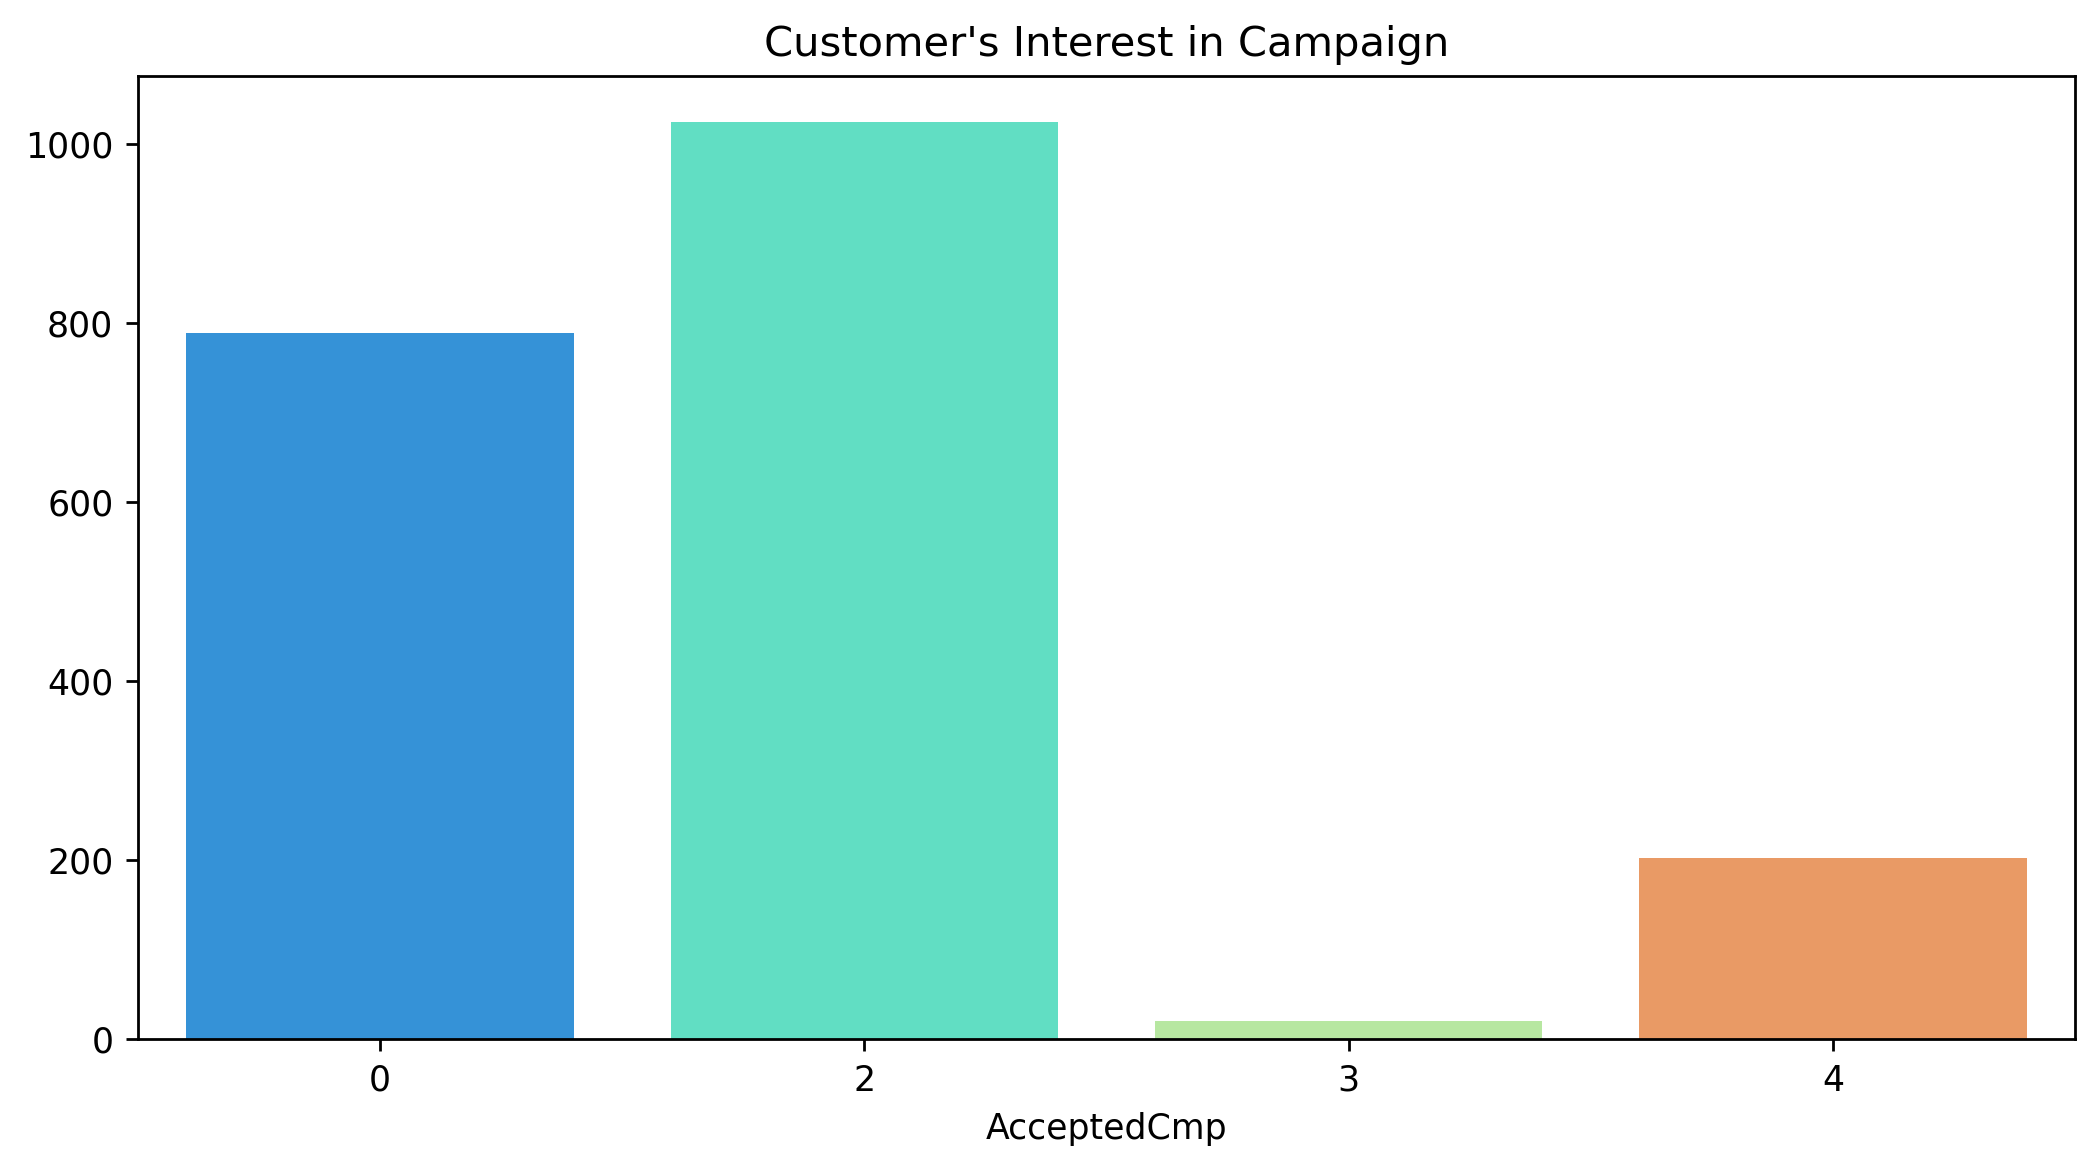

In [34]:
# checking for performance of campaigns (Higher the value lower the performance)
values = df['AcceptedCmp'].value_counts().values
camp = df['AcceptedCmp'].value_counts().index
sns.barplot(x = camp, y = values, palette = 'rainbow')
plt.title("Customer's Interest in Campaign")

In [35]:
# Here campaign 3 is the most successful campaign in which many customers has brought the products.
# And it's too clear that most of the audiance did'nt liked the campaign.

Text(0.5, 1.0, 'Most Successful Campaign')

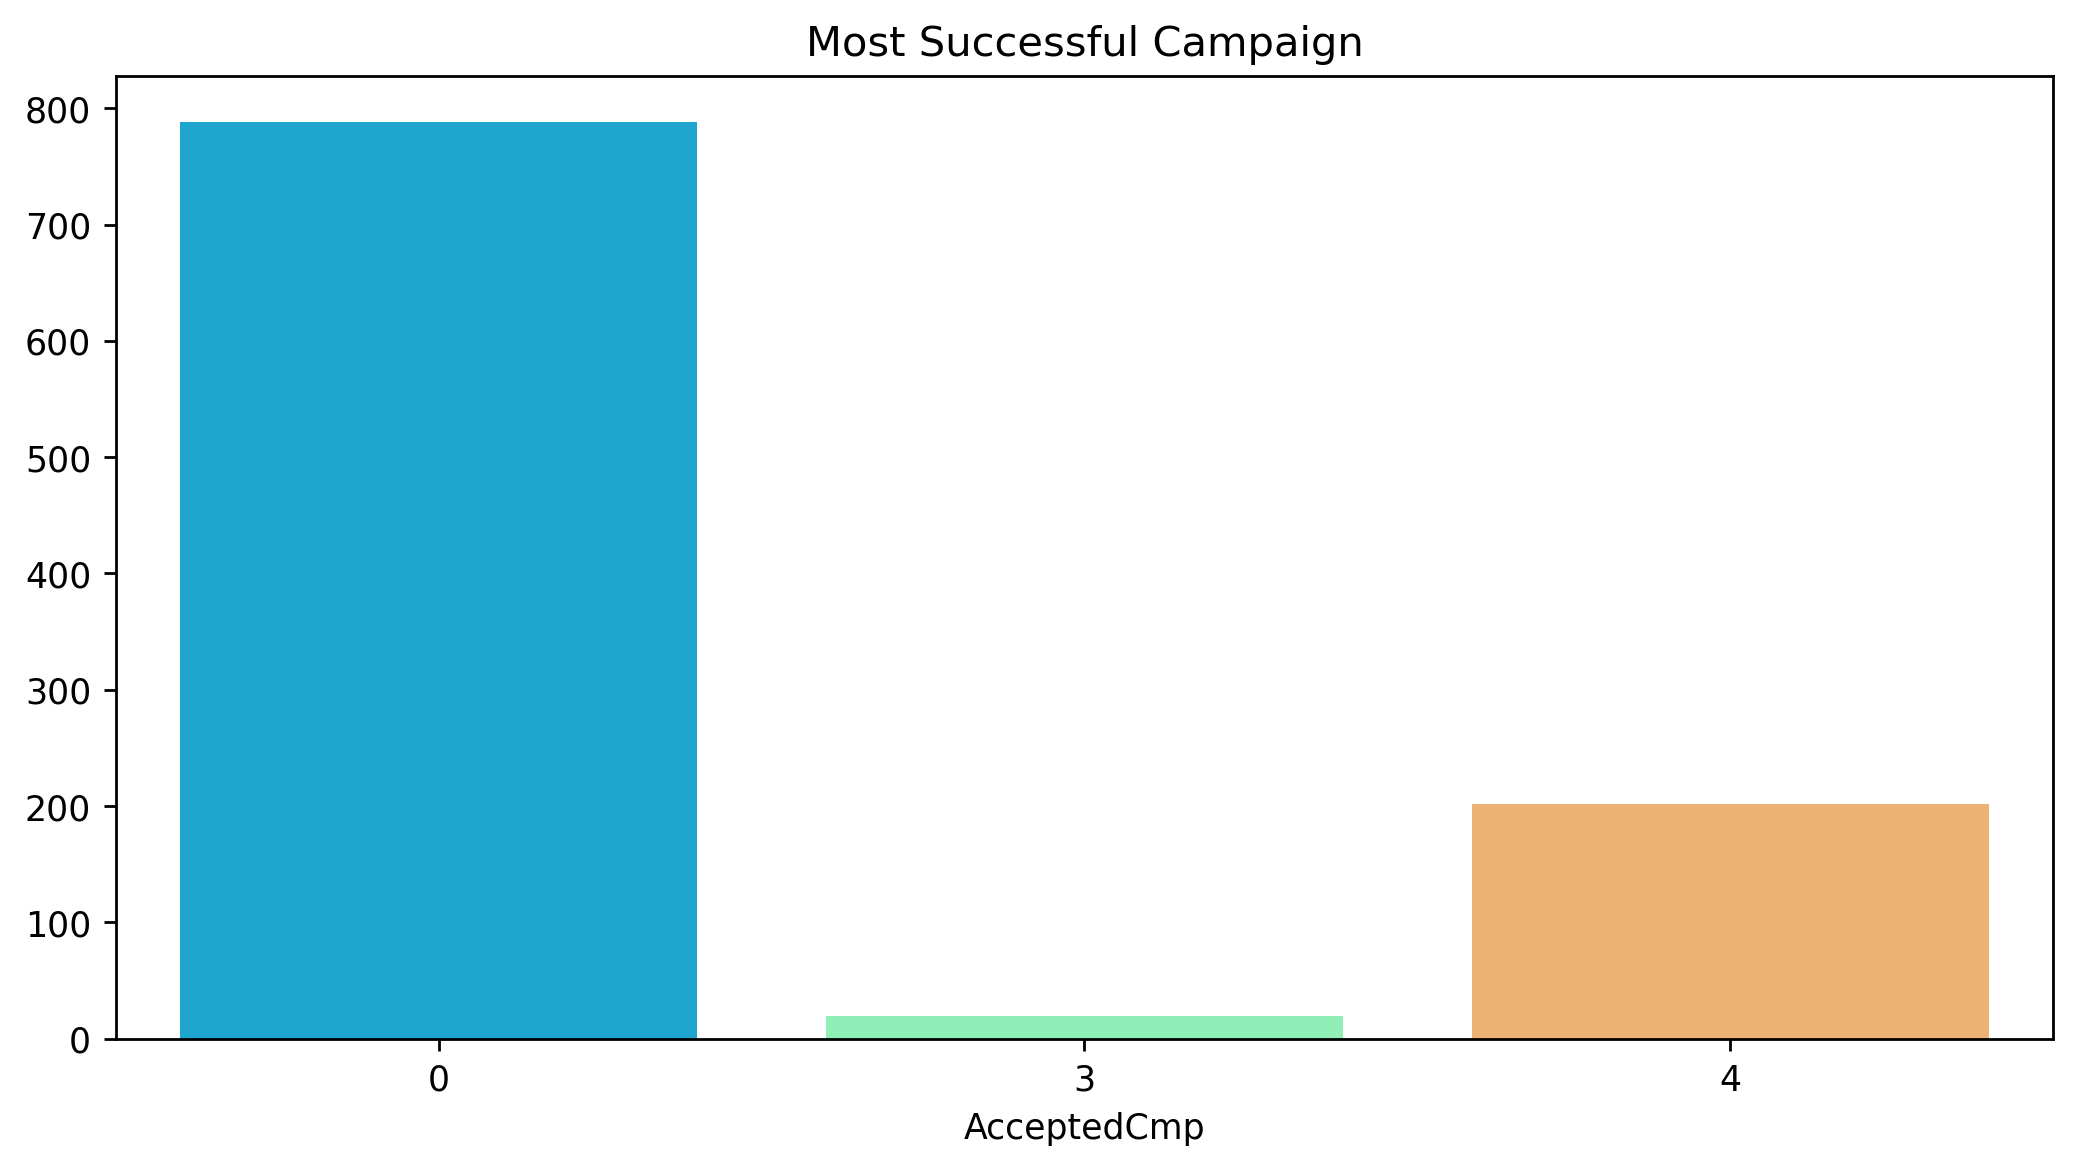

In [36]:
# checking for most accepted(successfull) campaign 
sns.barplot(x = camp[1:], y = values[1:], palette = 'rainbow')
plt.title("Most Successful Campaign")

In [37]:
# The 3rd campaign was the best one

Text(0.5, 1.0, 'Most prefered way to purchase')

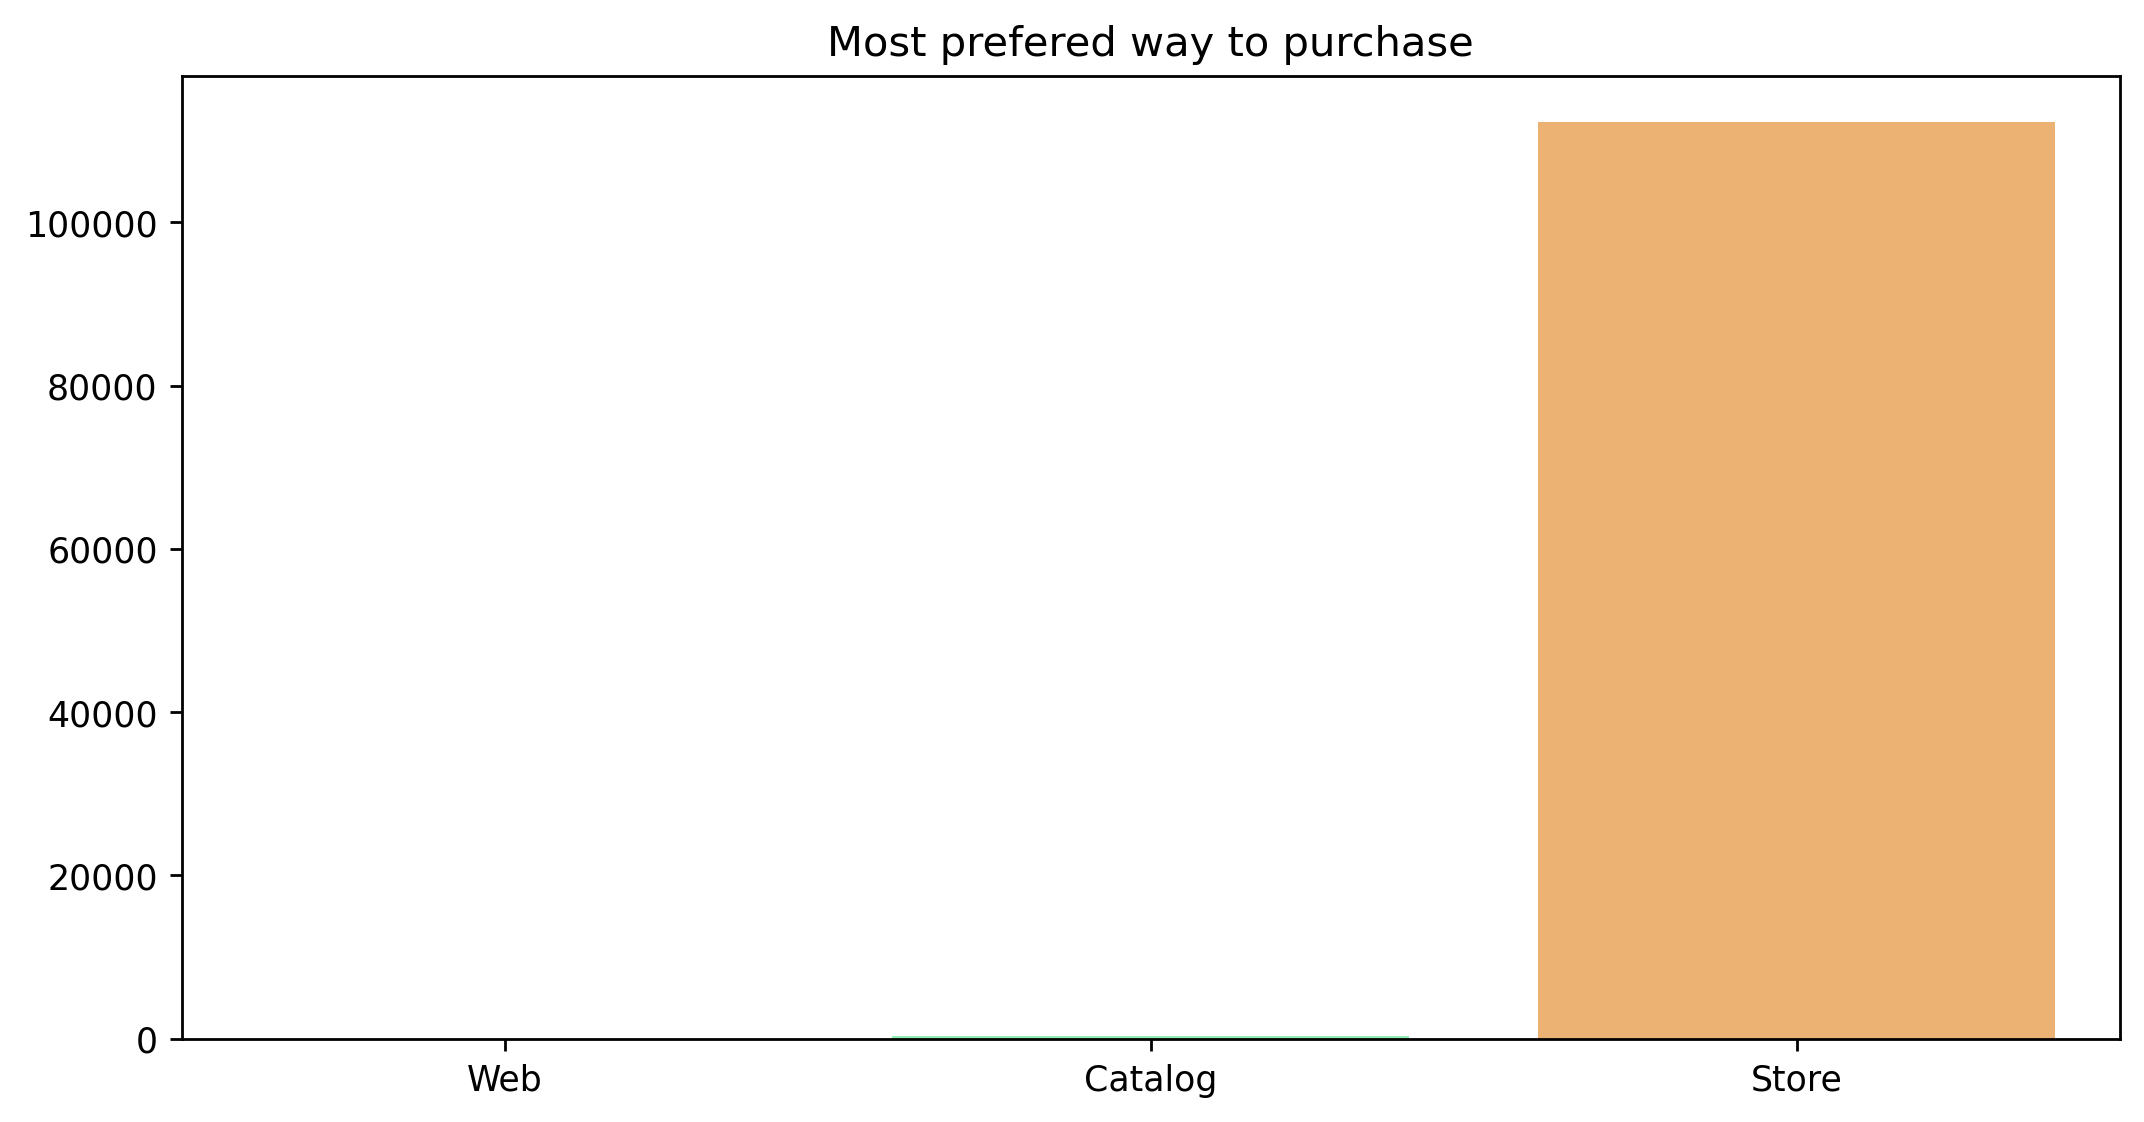

In [38]:
# lets find out the best place to make a purchse
values = [df[col].sum() for col in df.columns[-9:-6]]
sns.barplot(x = ['Web','Catalog','Store'], y = values, palette = 'rainbow')
plt.title('Most prefered way to purchase')

In [39]:
# People loved to make puchases using a catlog

In [40]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Cust_Since(yrs)', 'Num_Childrns',
       'AcceptedCmp', 'Total_amt_spend', 'Total_Purchases', 'Age_Groups'],
      dtype='object')

In [41]:
# checking the correlation metrix between features
df.corr(numeric_only=True)

Income   Recency  MntWines  MntFruits  MntMeatProducts  \
Income               1.000000 -0.008585  0.563868   0.422122         0.573070   
Recency             -0.008585  1.000000  0.011185  -0.012456         0.013478   
MntWines             0.563868  0.011185  1.000000   0.385319         0.561357   
MntFruits            0.422122 -0.012456  0.385319   1.000000         0.546050   
MntMeatProducts      0.573070  0.013478  0.561357   0.546050         1.000000   
MntFishProducts      0.429864 -0.001310  0.393531   0.591651         0.568027   
MntSweetProducts     0.430923  0.023216  0.383910   0.559842         0.528122   
MntGoldProds         0.311590  0.011041  0.391667   0.401900         0.352345   
NumDealsPurchases   -0.082876  0.009221  0.012766  -0.137368        -0.116281   
NumWebPurchases      0.373490 -0.006264  0.549522   0.296269         0.298952   
NumCatalogPurchases  0.577829  0.013846  0.626094   0.484304         0.732601   
NumStorePurchases    0.516460 -0.001561  0.636147   0.453200         0.477823   
NumWebVisitsMonth   -0.543345 -0.013794 -0.312172  -0.410926        -0.530457   
Complain            -0.026565  0.007756 -0.038246  -0.002362        -0.022135   
Response             0.130053 -0.204316  0.237822   0.126974         0.238168   
Age                  0.161616  0.016989  0.166048   0.028801         0.038521   
Cust_Since(yrs)     -0.017007  0.026117  0.157758   0.066250         0.080831   
Num_Childrns        -0.294451  0.028739 -0.358679  -0.398688        -0.506212   
AcceptedCmp          0.044230 -0.153545  0.156369   0.048914         0.064241   
Total_amt_spend      0.653659  0.012919  0.890920   0.613090         0.843565   
Total_Purchases      0.553748  0.004726  0.710440   0.449531         0.561515   

                     MntFishProducts  MntSweetProducts  MntGoldProds  \
Income                      0.429864          0.430923      0.311590   
Recency                    -0.001310          0.023216      0.011041   
MntWines                    0.393531          0.383910      0.391667   
MntFruits                   0.591651          0.559842      0.401900   
MntMeatProducts             0.568027          0.528122      0.352345   
MntFishProducts             1.000000          0.584044      0.424933   
MntSweetProducts            0.584044          1.000000      0.361890   
MntGoldProds                0.424933          0.361890      1.000000   
NumDealsPurchases          -0.140513         -0.120065      0.058354   
NumWebPurchases             0.296583          0.329385      0.408962   
NumCatalogPurchases         0.525970          0.488499      0.437351   
NumStorePurchases           0.461341          0.452426      0.382985   
NumWebVisitsMonth          -0.438173         -0.412206     -0.230094   
Complain                   -0.018918         -0.020998     -0.029300   
Response                    0.102407          0.116912      0.154348   
Age                         0.043073          0.024359      0.057615   
Cust_Since(yrs)             0.076876          0.086995      0.155993   
Num_Childrns               -0.424285         -0.389301     -0.264920   
AcceptedCmp                 0.004552          0.029340      0.097407   
Total_amt_spend             0.639738          0.602701      0.526968   
Total_Purchases             0.468282          0.467109      0.491826   

                     NumDealsPurchases  NumWebPurchases  ...  \
Income                       -0.082876         0.373490  ...   
Recency                       0.009221        -0.006264  ...   
MntWines                      0.012766         0.549522  ...   
MntFruits                    -0.137368         0.296269  ...   
MntMeatProducts              -0.116281         0.298952  ...   
MntFishProducts              -0.140513         0.296583  ...   
MntSweetProducts             -0.120065         0.329385  ...   
MntGoldProds                  0.058354         0.408962  ...   
NumDealsPurchases             1.000000         0.231923  ...   
NumWebPurchases

<Axes: >

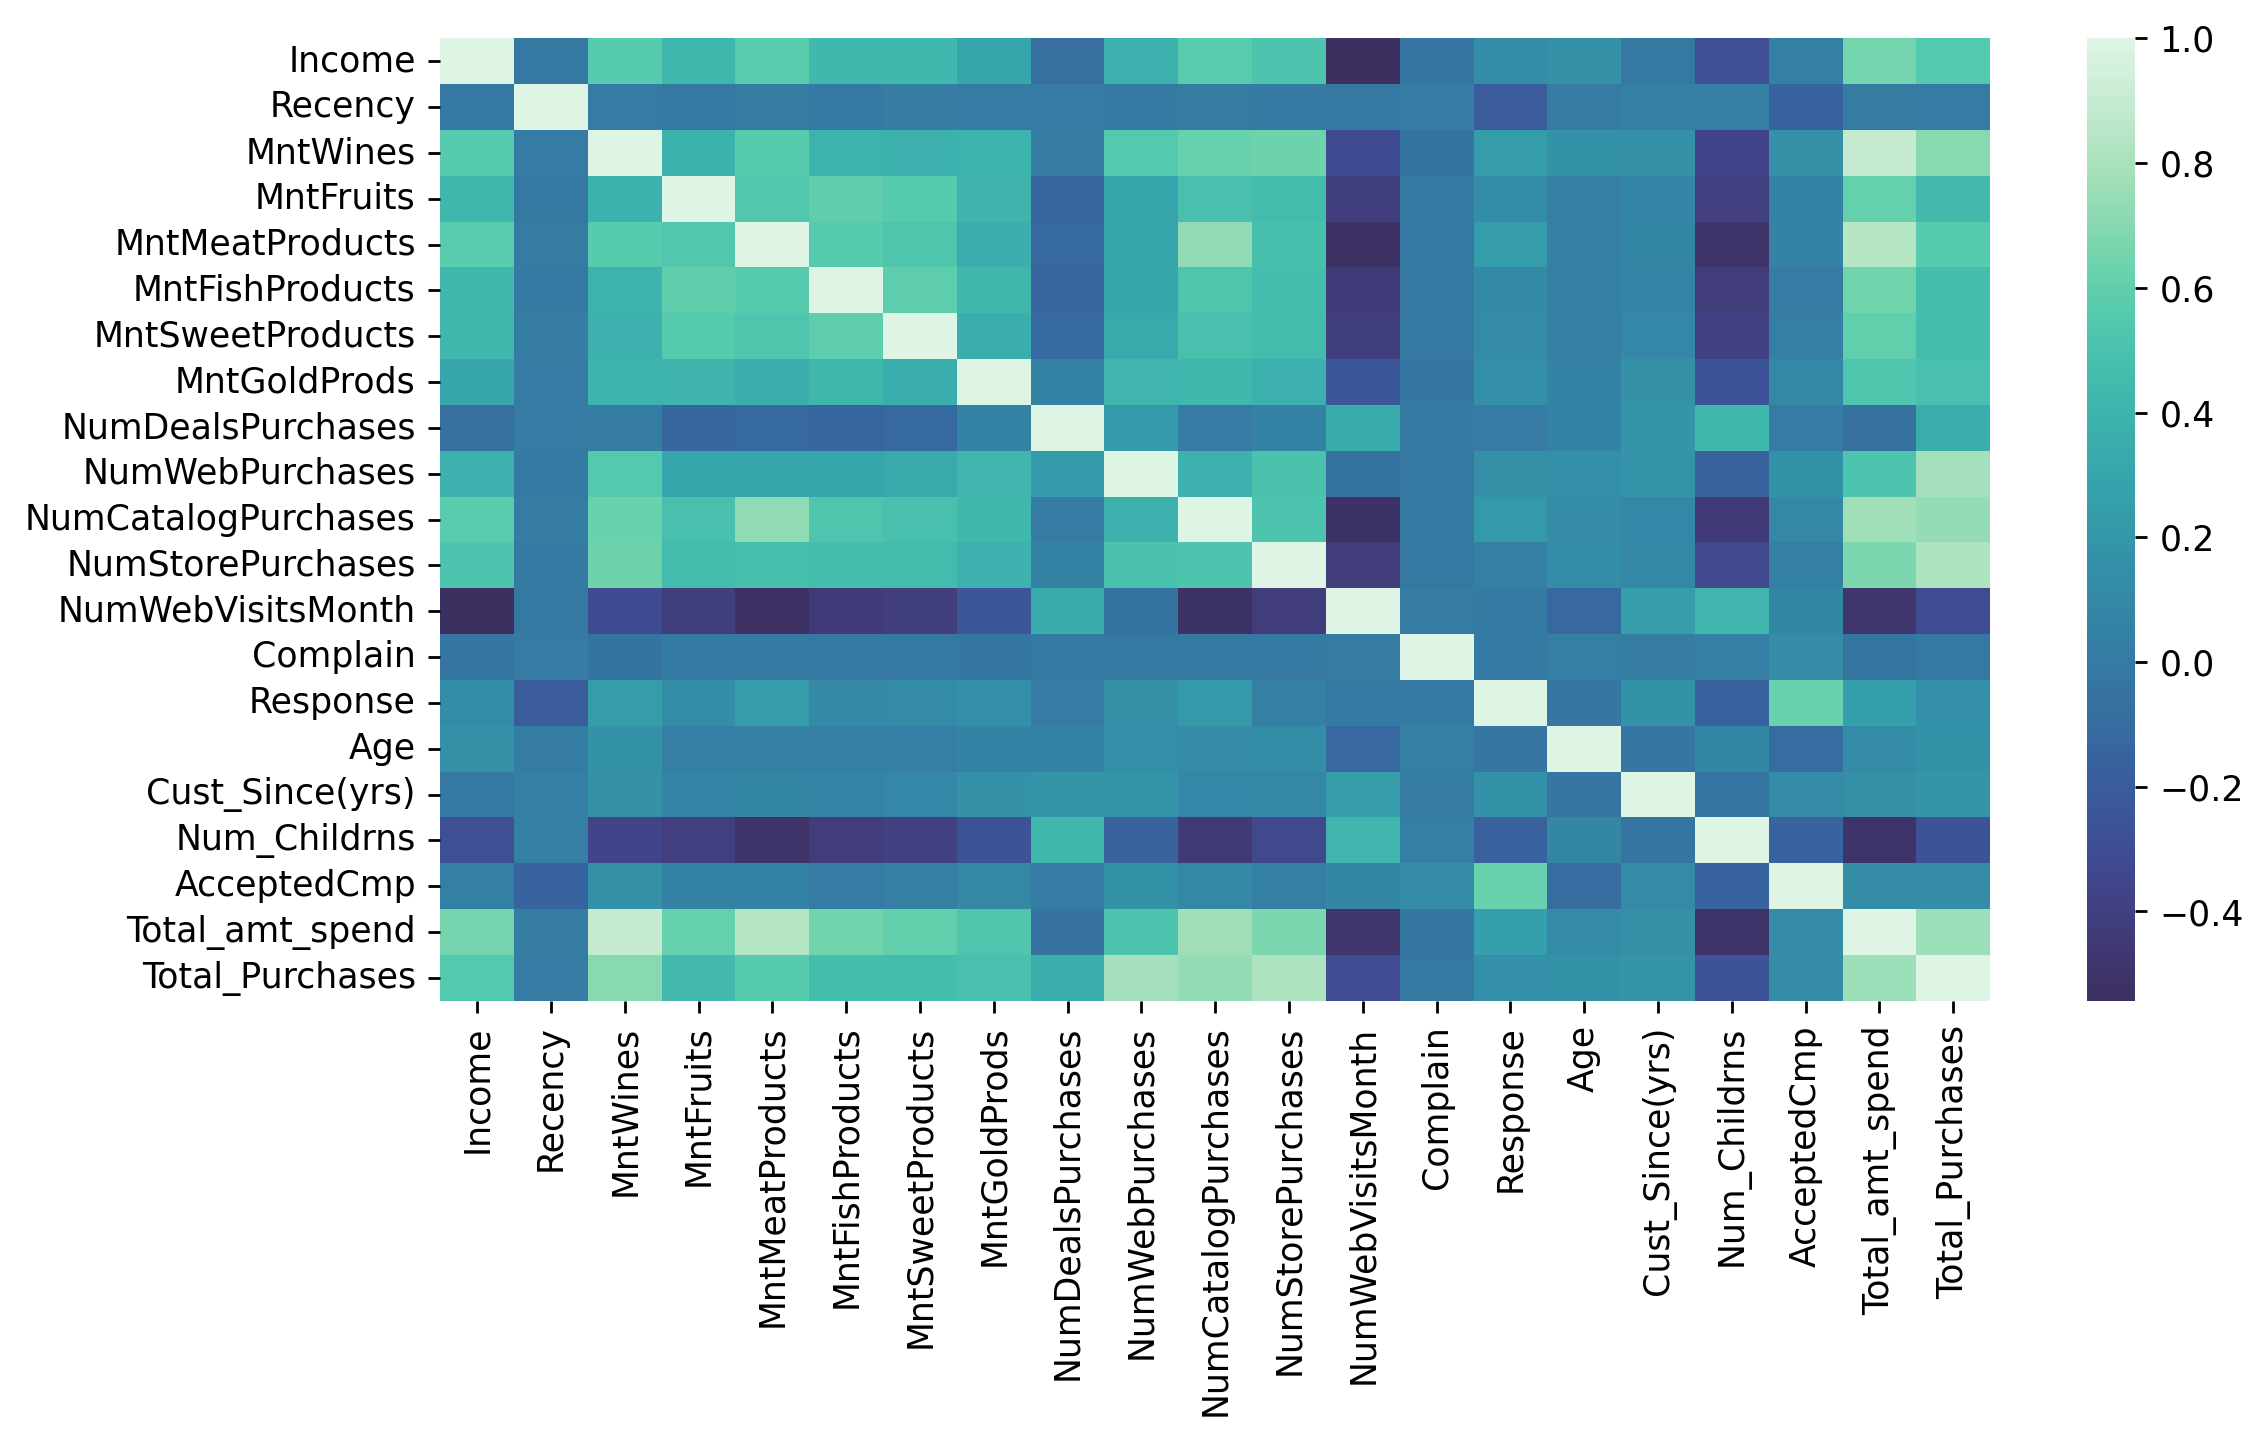

In [42]:
# Visualizing the correlation metrix
sns.heatmap(df.corr(numeric_only=True), cmap = 'mako', center = 0)

In [43]:
df.head(3)

Education Marital_Status   Income  Recency  MntWines  MntFruits  \
0  Graduation         Single  58138.0       58       635         88   
1  Graduation         Single  46344.0       38        11          1   
2  Graduation        Engaged  71613.0       26       426         49   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0              546              172                88            88  ...   
1                6                2                 1             6  ...   
2              127              111                21            42  ...   

   NumWebVisitsMonth  Complain  Response  Age  Cust_Since(yrs)  Num_Childrns  \
0                  7         0         1   67               12             0   
1                  5         0         0   70               10             2   
2                  4         0         0   59               11             0   

   AcceptedCmp  Total_amt_spend  Total_Purchases  Age_Groups  
0            4             1617               25         Old  
1            0               27                6         Old  
2            0              776               21    Mid_aged  

[3 rows x 24 columns]

In [44]:
# df = pd.get_dummies(columns=['Education', 'Marital_Status', 'Age_Groups'], data=df)
# df.head(2)

In [45]:
df.dtypes

Education                object
Marital_Status           object
Income                  float64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
Complain                  int64
Response                  int64
Age                       int64
Cust_Since(yrs)           int64
Num_Childrns              int64
AcceptedCmp               int64
Total_amt_spend           int64
Total_Purchases           int64
Age_Groups             category
dtype: object

In [46]:
# # Countplot between Year_Birth and Maritial_Status
# sns.countplot(data = df,x = df['Age_Groups'], hue = df['Marital_Status'], palette=palette)
# plt.title("Countplot between Age and Maritial_Status")

In [47]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Cust_Since(yrs)', 'Num_Childrns',
       'AcceptedCmp', 'Total_amt_spend', 'Total_Purchases', 'Age_Groups'],
      dtype='object')

Text(0.5, 1.0, 'Scatterplot between Income and Total amount spend ')

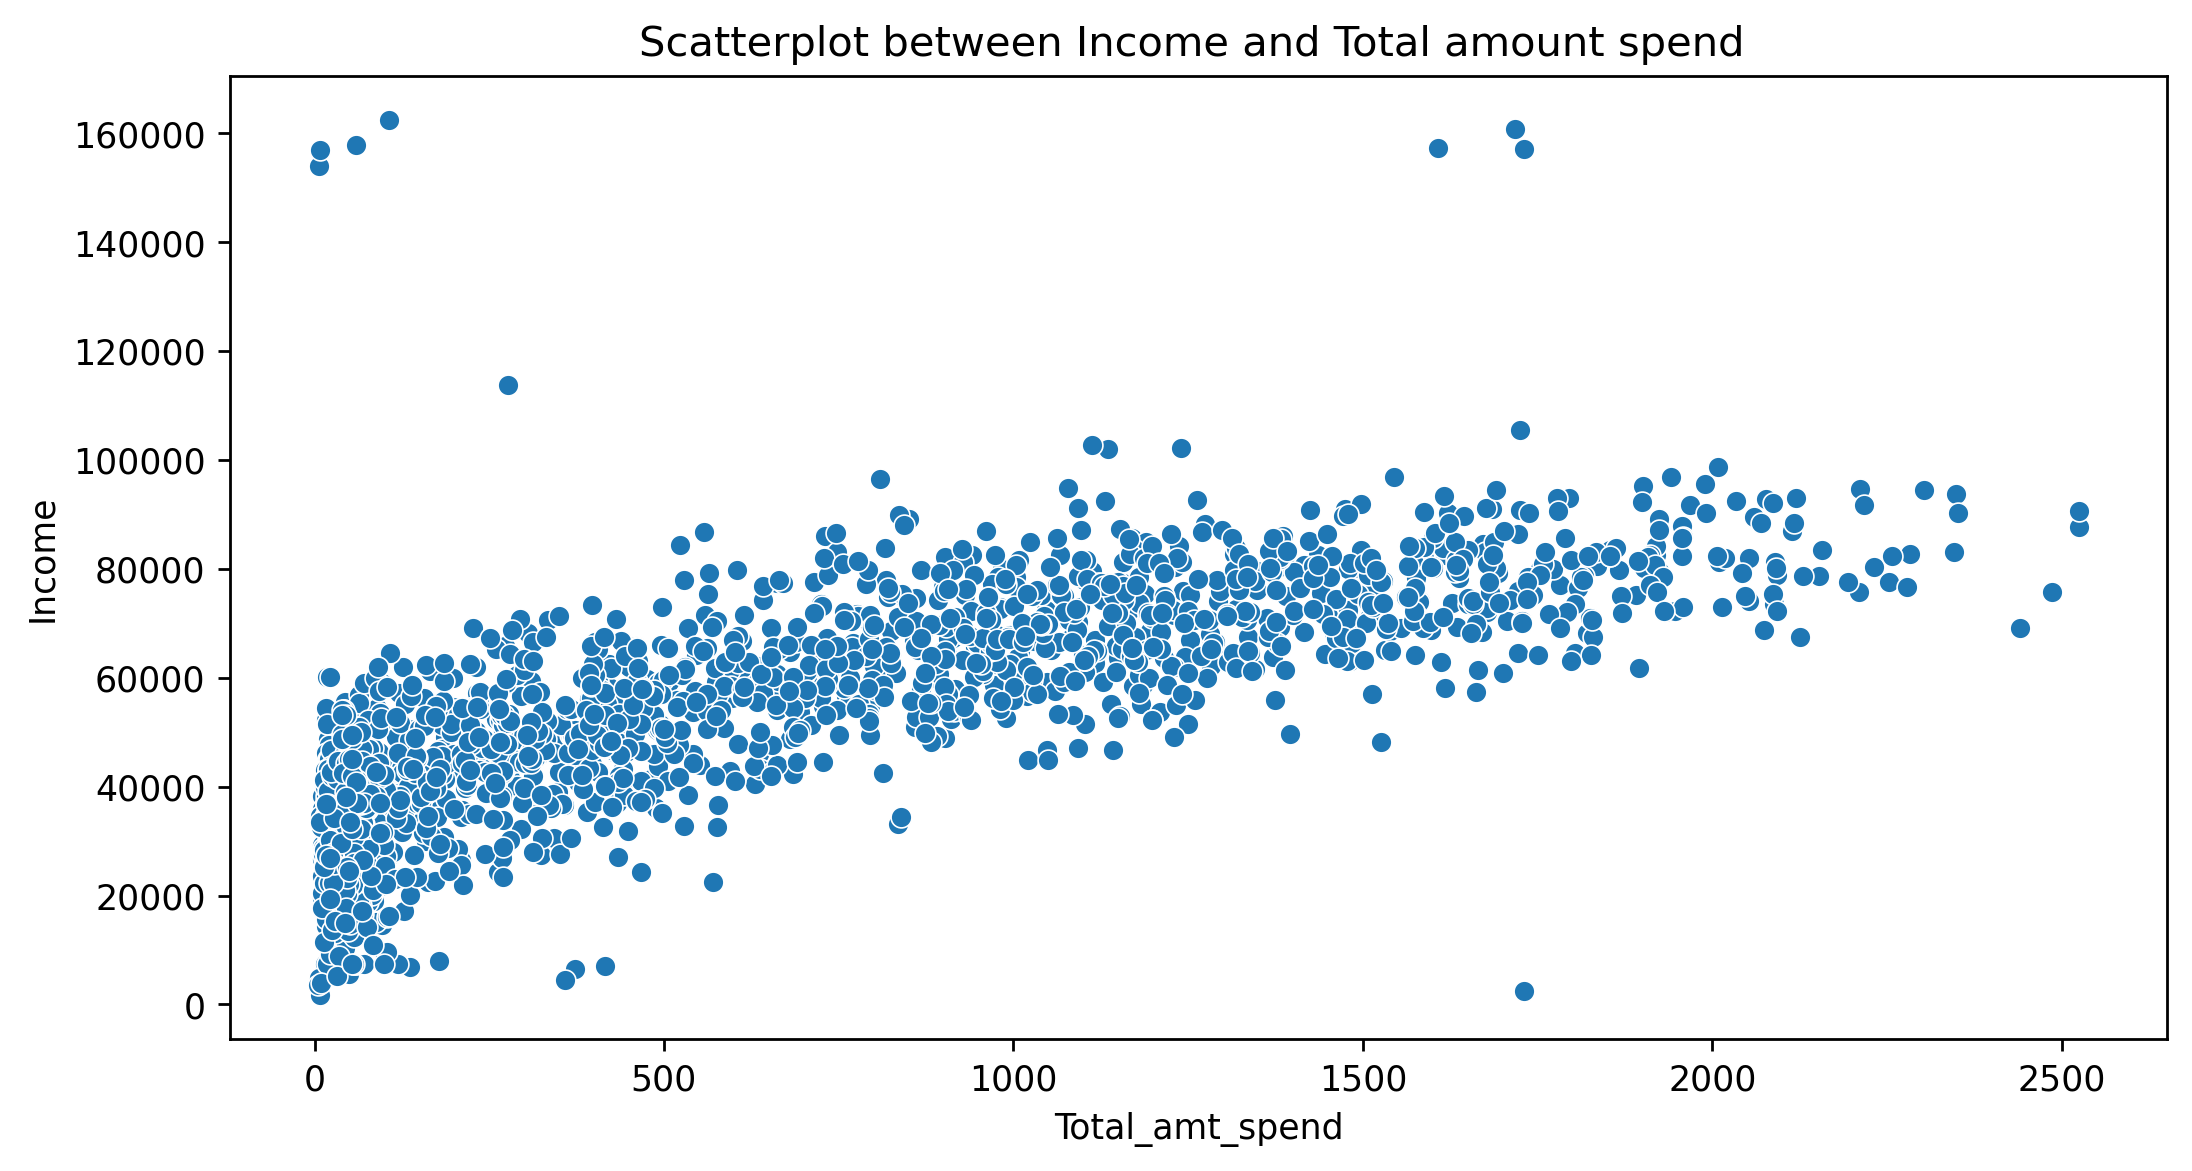

In [48]:
# Scatterplot between Income and Total amount spend
sns.scatterplot(x=df[df['Income']<600000]['Total_amt_spend'], y=df[df['Income']<600000]['Income'])
plt.title('Scatterplot between Income and Total amount spend ')

In [49]:
# As income increasing spending also increasing.

Text(0.5, 1.0, 'Total Amount Spend by Age Groups')

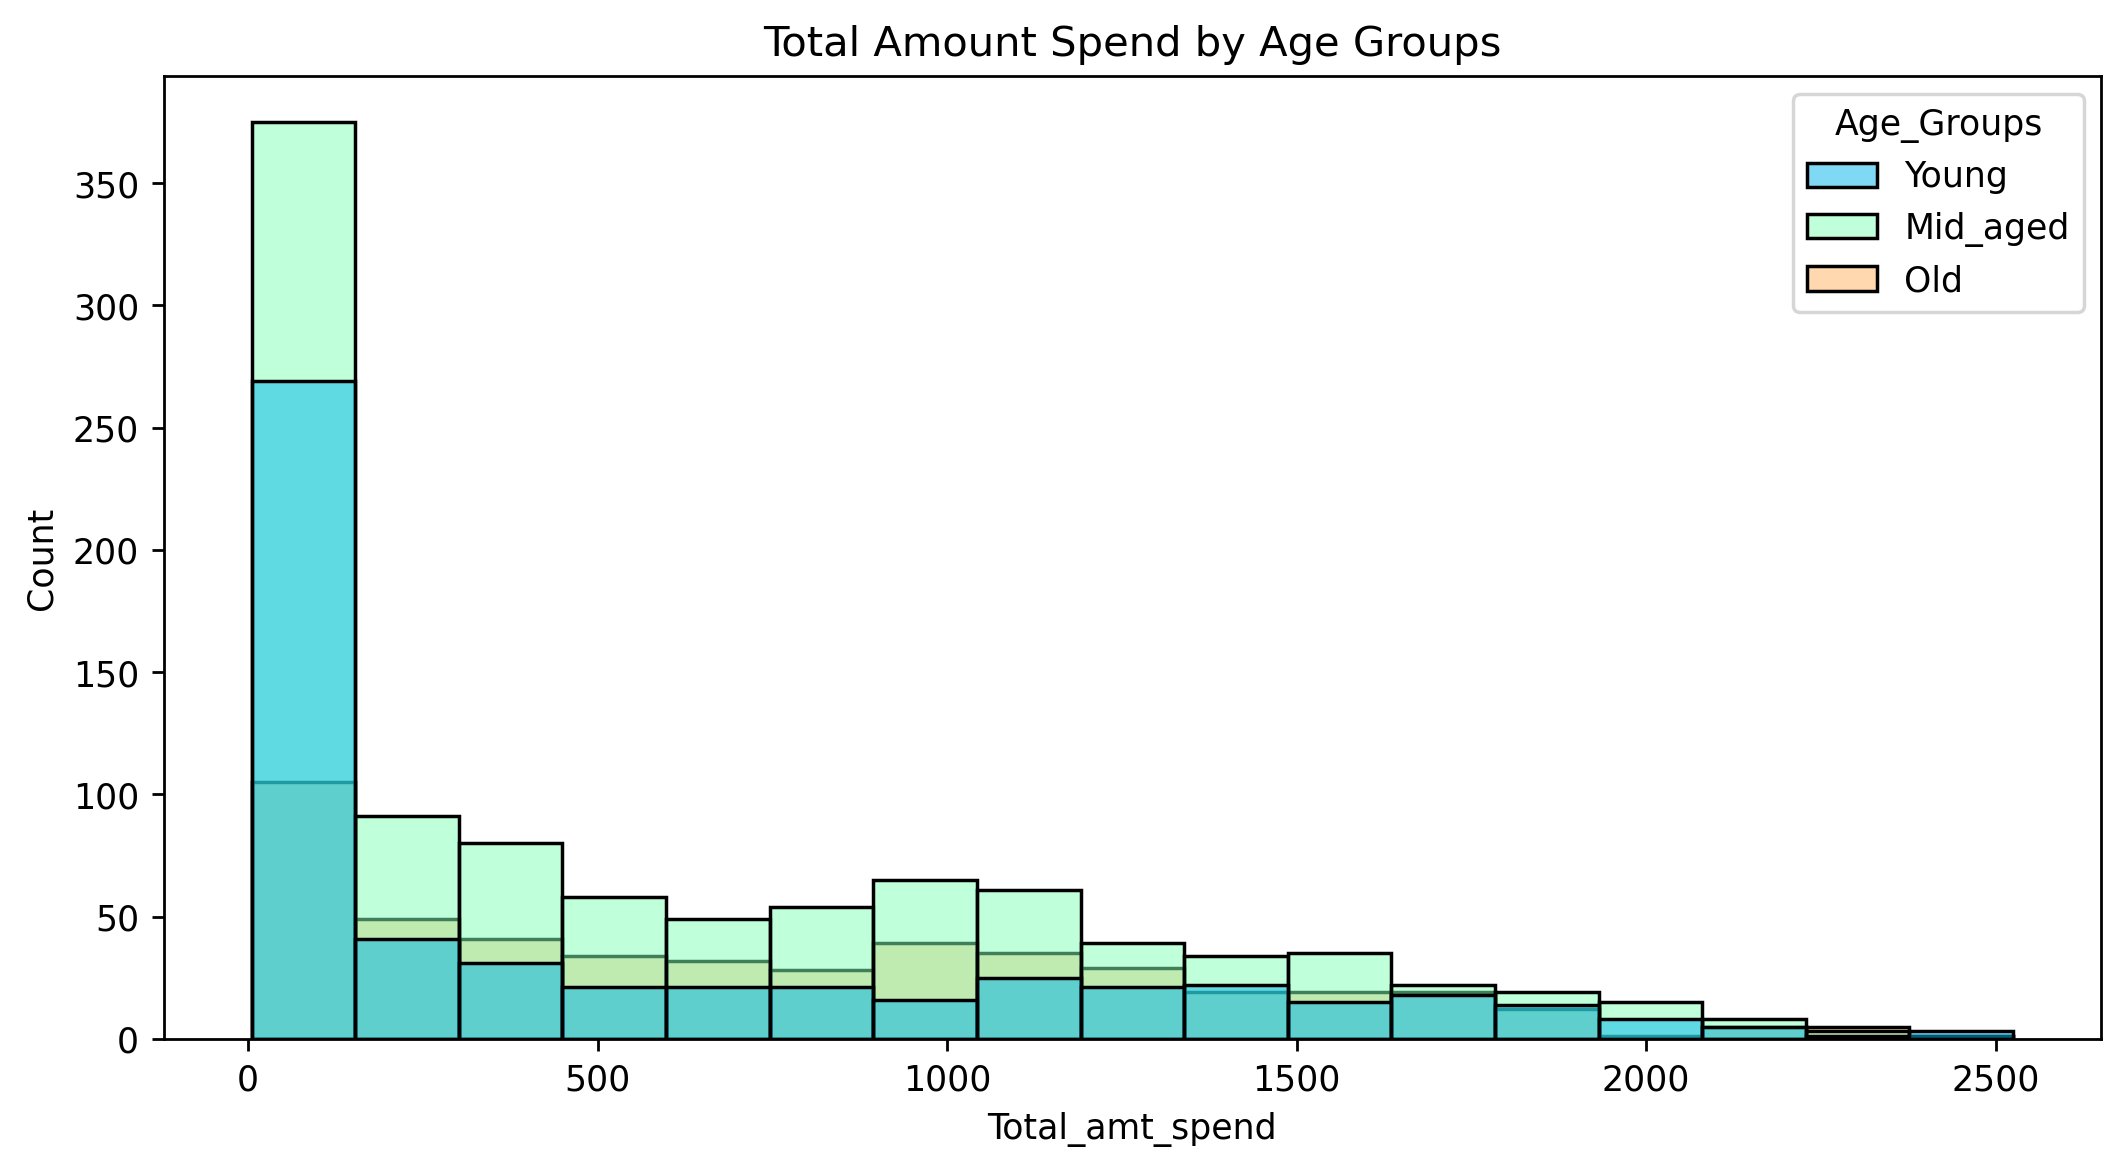

In [50]:
# plotting relation between age_groups and total amount spend using histogram
sns.histplot(x=df['Total_amt_spend'], hue=df['Age_Groups'], palette='rainbow')
plt.title('Total Amount Spend by Age Groups')

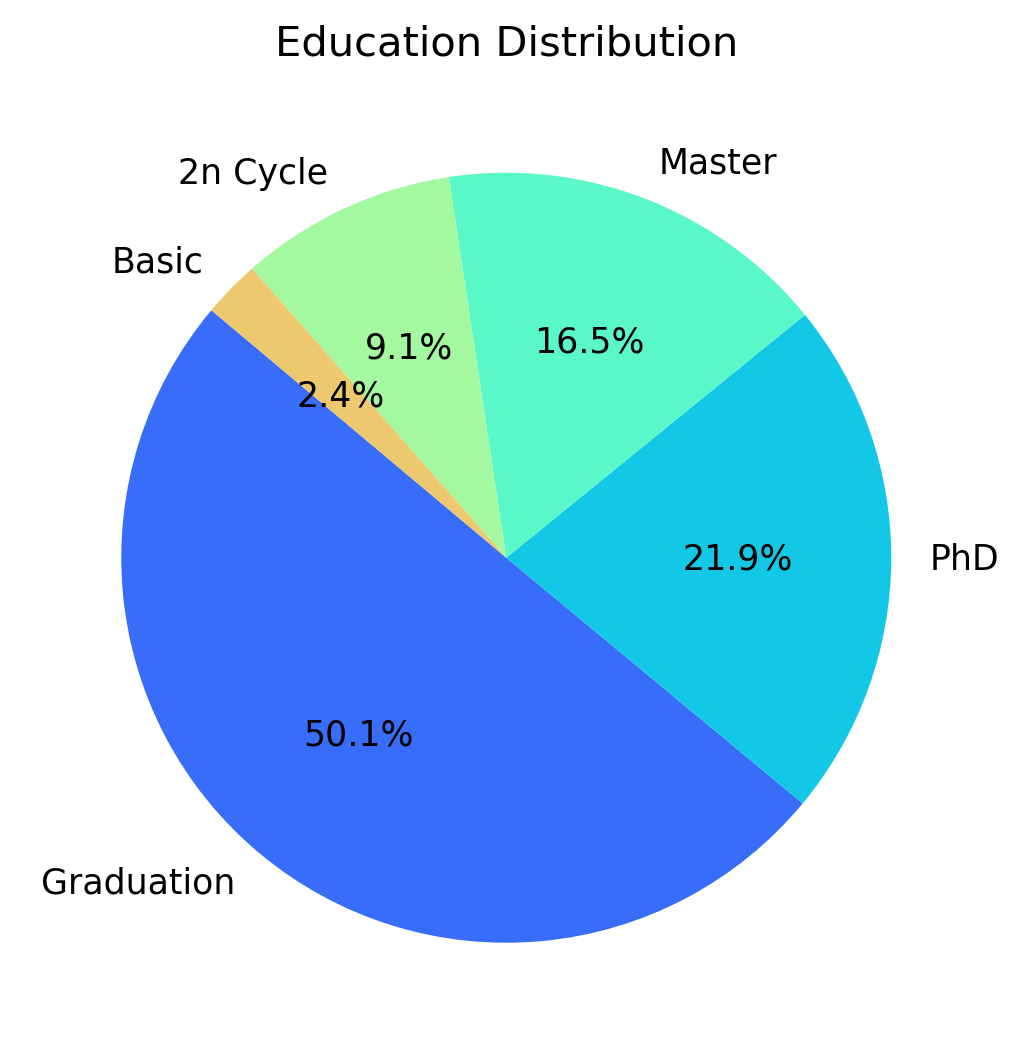

In [51]:
# Calculate percentage distribution
education_counts = df['Education'].value_counts(normalize=True) * 100
palette = sns.color_palette("rainbow")
# Plot pie chart
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140, colors=palette)
plt.title('Education Distribution')
plt.show()

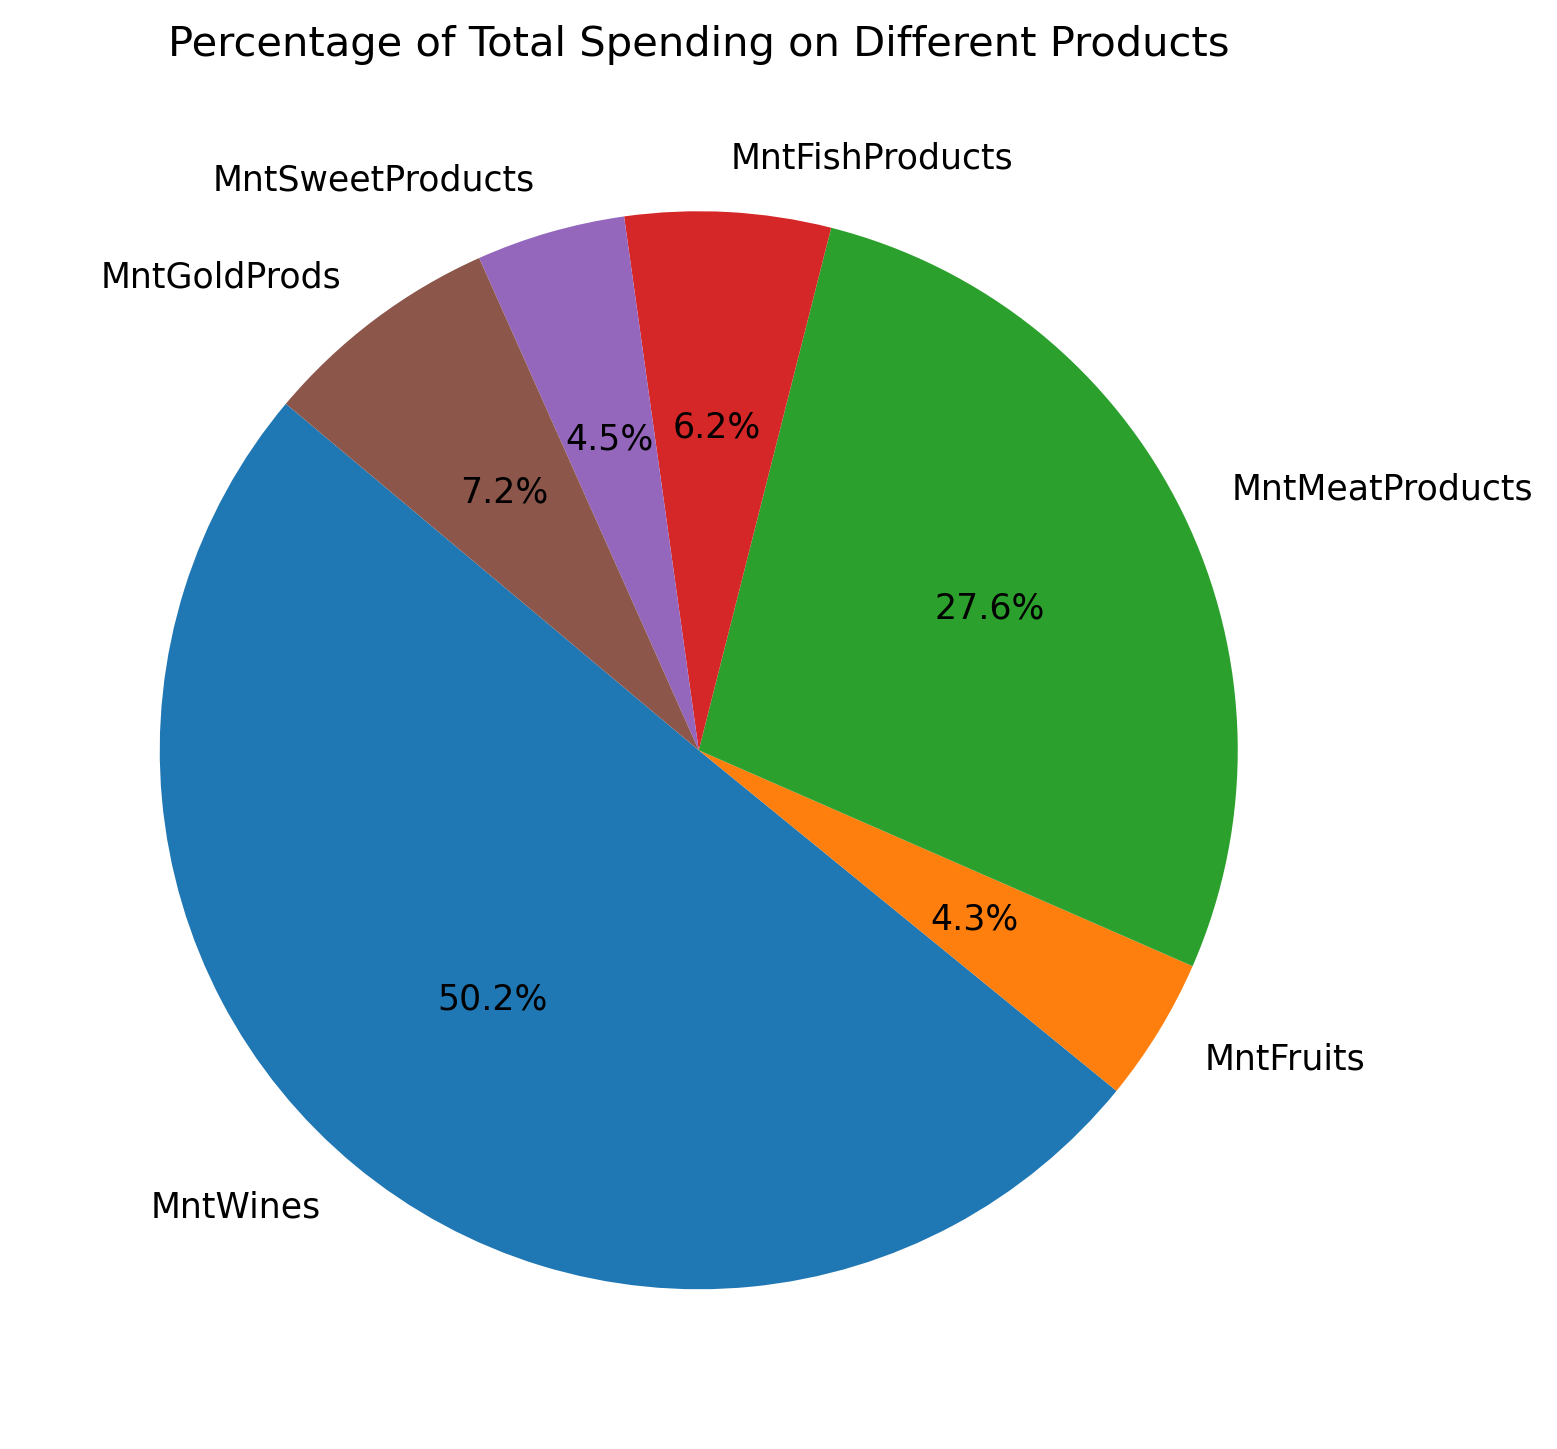

In [52]:
# Sum the spending for each product
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spending = df[product_columns].sum()########################################################################################

# Calculate the percentage contribution of each product
percentage_spending = (total_spending / total_spending.sum()) * 100

# Plot the pie chart
plt.figure(figsize=(10, 7))
plt.pie(percentage_spending, labels=product_columns, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total Spending on Different Products')
plt.show()

Text(0.5, 1.0, 'Countplot between Age Groups and Number of Web Visits in a Month')

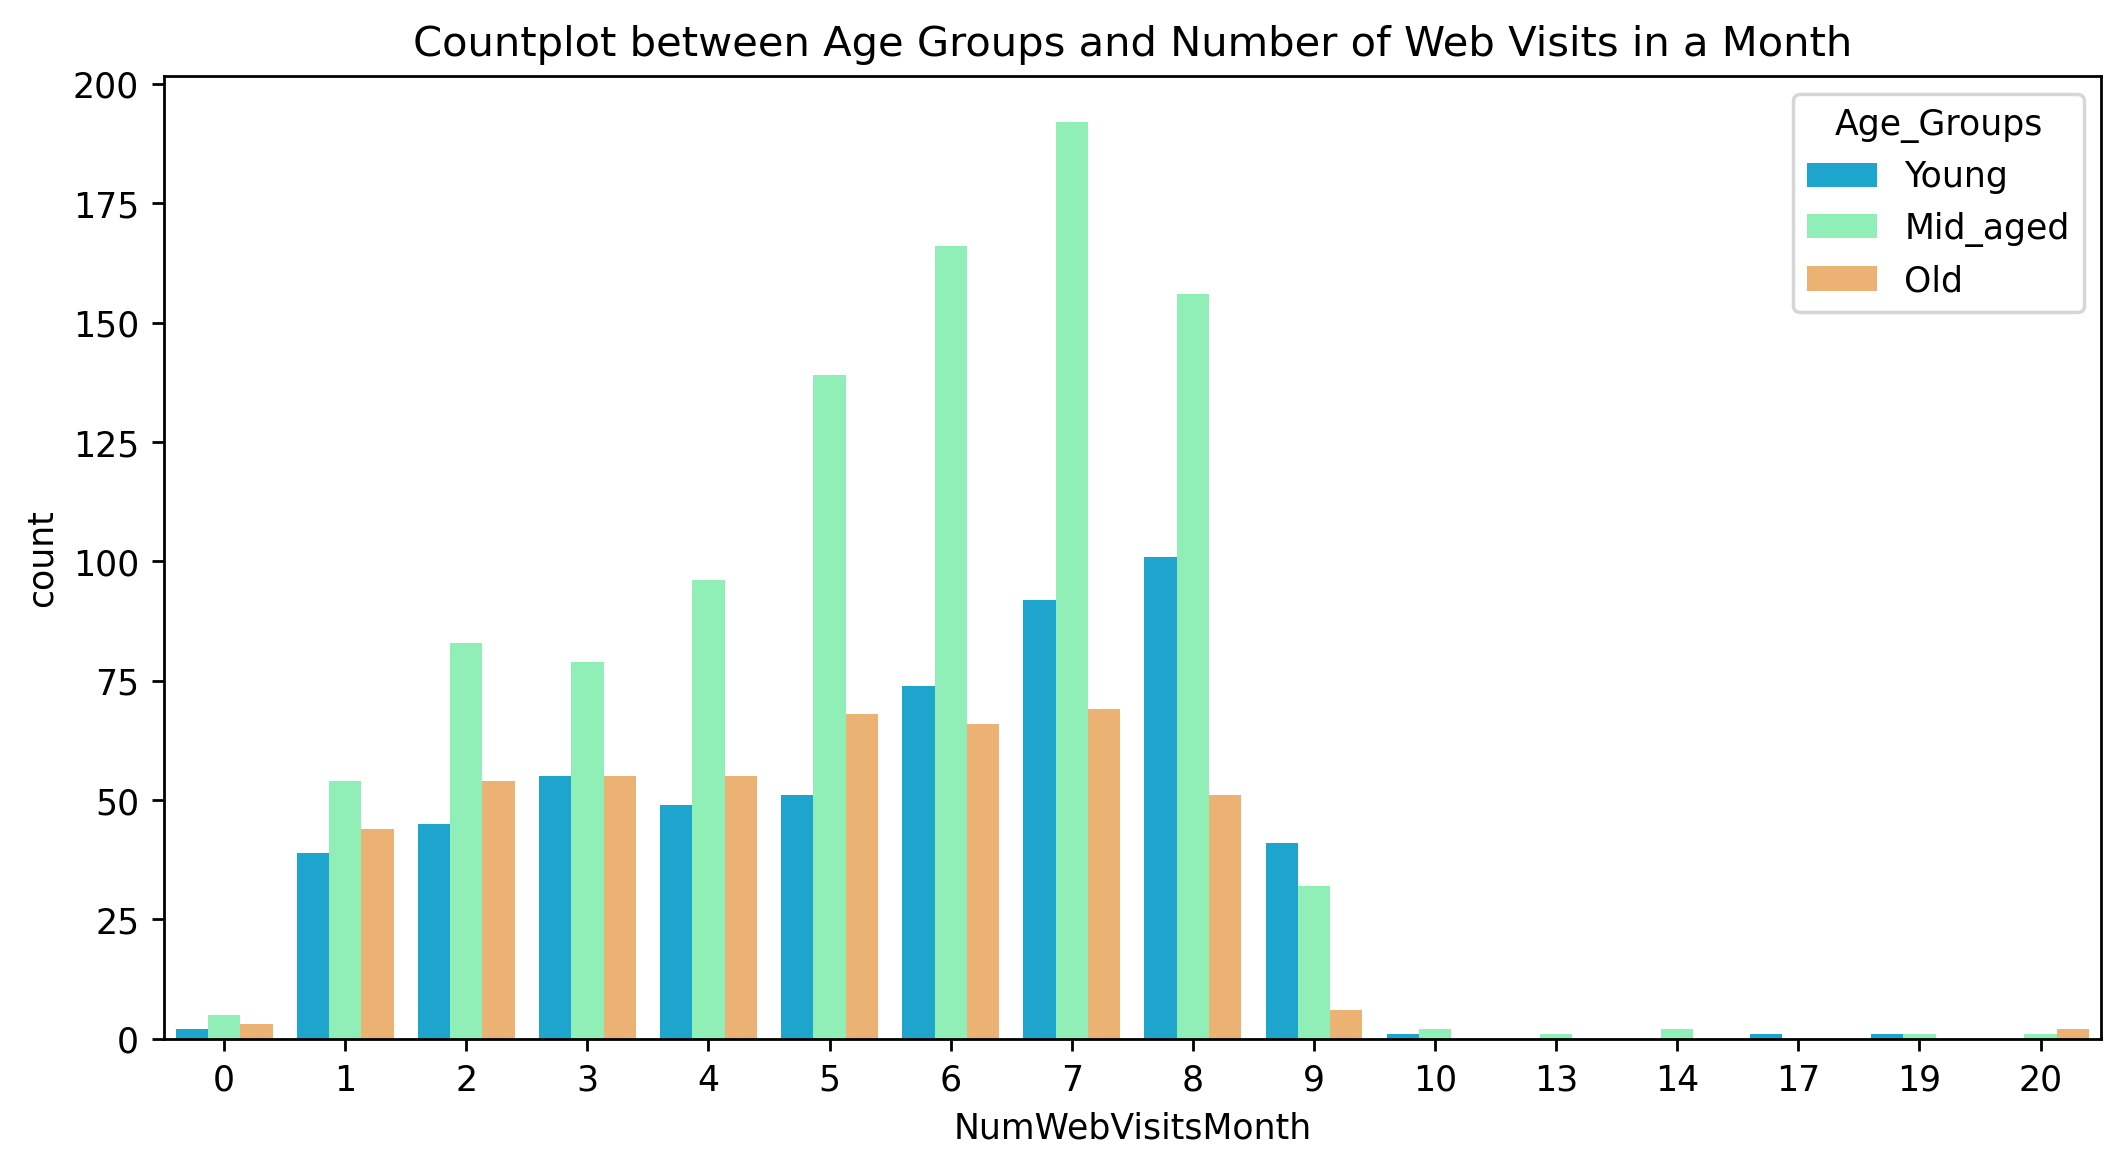

In [53]:
sns.countplot(data = df,x = df['NumWebVisitsMonth'], hue = df['Age_Groups'], palette='rainbow')
plt.title("Countplot between Age Groups and Number of Web Visits in a Month")

In [54]:
df.shape

(2034, 24)

In [55]:
# Converting categorical columns into Numerical.
df = pd.get_dummies(data=df, columns=['Education', 'Marital_Status', 'Age_Groups'])
df.head(3)

Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  58138.0       58       635         88              546              172   
1  46344.0       38        11          1                6                2   
2  71613.0       26       426         49              127              111   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  ...  \
0                88            88                  3                8  ...   
1                 1             6                  2                1  ...   
2                21            42                  1                8  ...   

   Marital_Status_Absurd  Marital_Status_Divorced  Marital_Status_Engaged  \
0                  False                    False                   False   
1                  False                    False                   False   
2                  False                    False                    True   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Widow  \
0                   False                   True                 False   
1                   False                   True                 False   
2                   False                  False                 False   

   Marital_Status_YOLO  Age_Groups_Young  Age_Groups_Mid_aged  Age_Groups_Old  
0                False             False                False            True  
1                False             False                False            True  
2                False             False                 True           False  

[3 rows x 36 columns]

In [56]:
# Converting boolean values with numerical
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].replace({True: 1, False: 0})

In [57]:
df.columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response', 'Age',
       'Cust_Since(yrs)', 'Num_Childrns', 'AcceptedCmp', 'Total_amt_spend',
       'Total_Purchases', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Absurd', 'Marital_Status_Divorced',
       'Marital_Status_Engaged', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Widow', 'Marital_Status_YOLO',
       'Age_Groups_Young', 'Age_Groups_Mid_aged', 'Age_Groups_Old'],
      dtype='object')

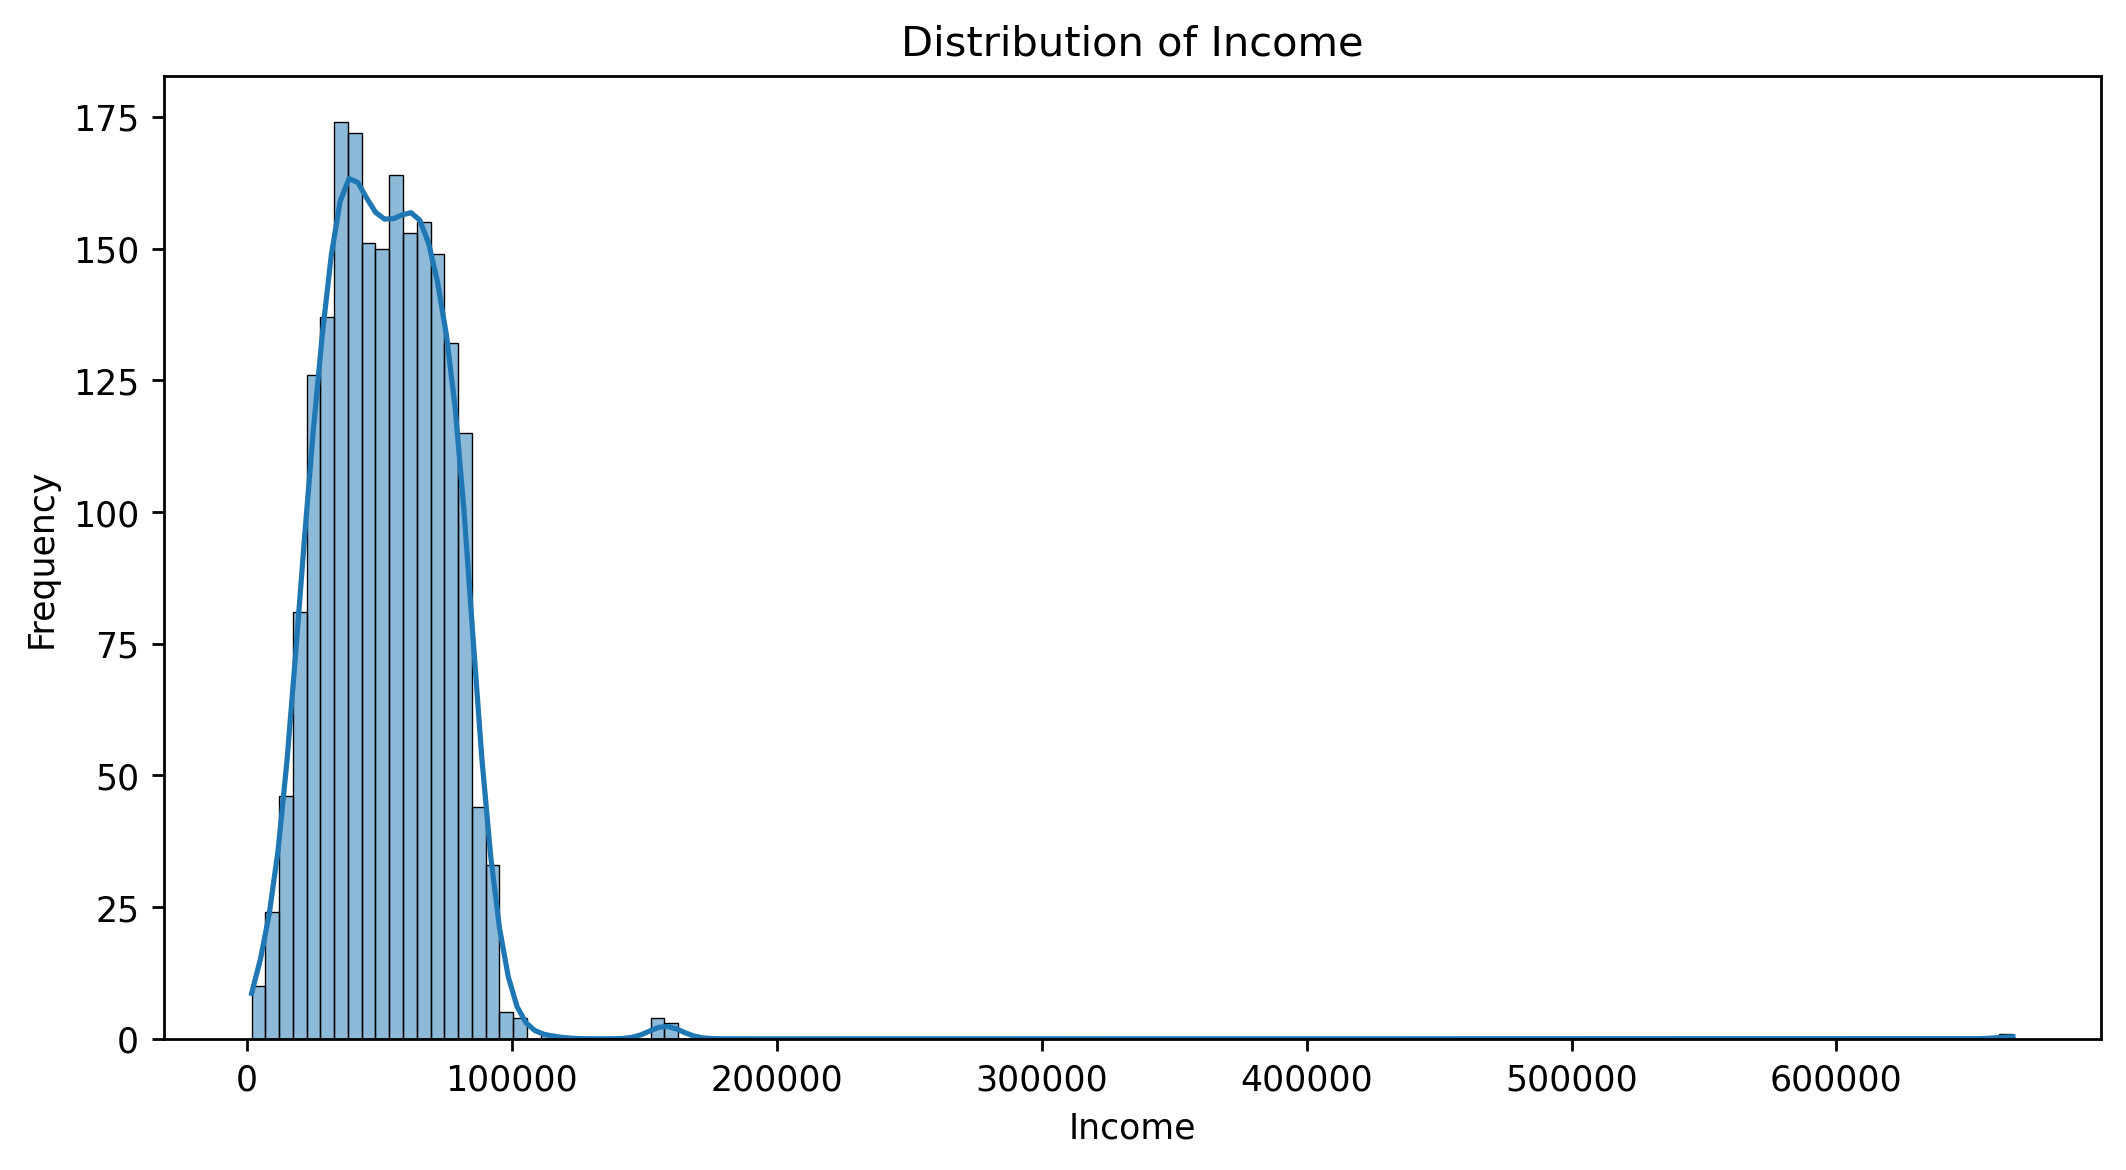

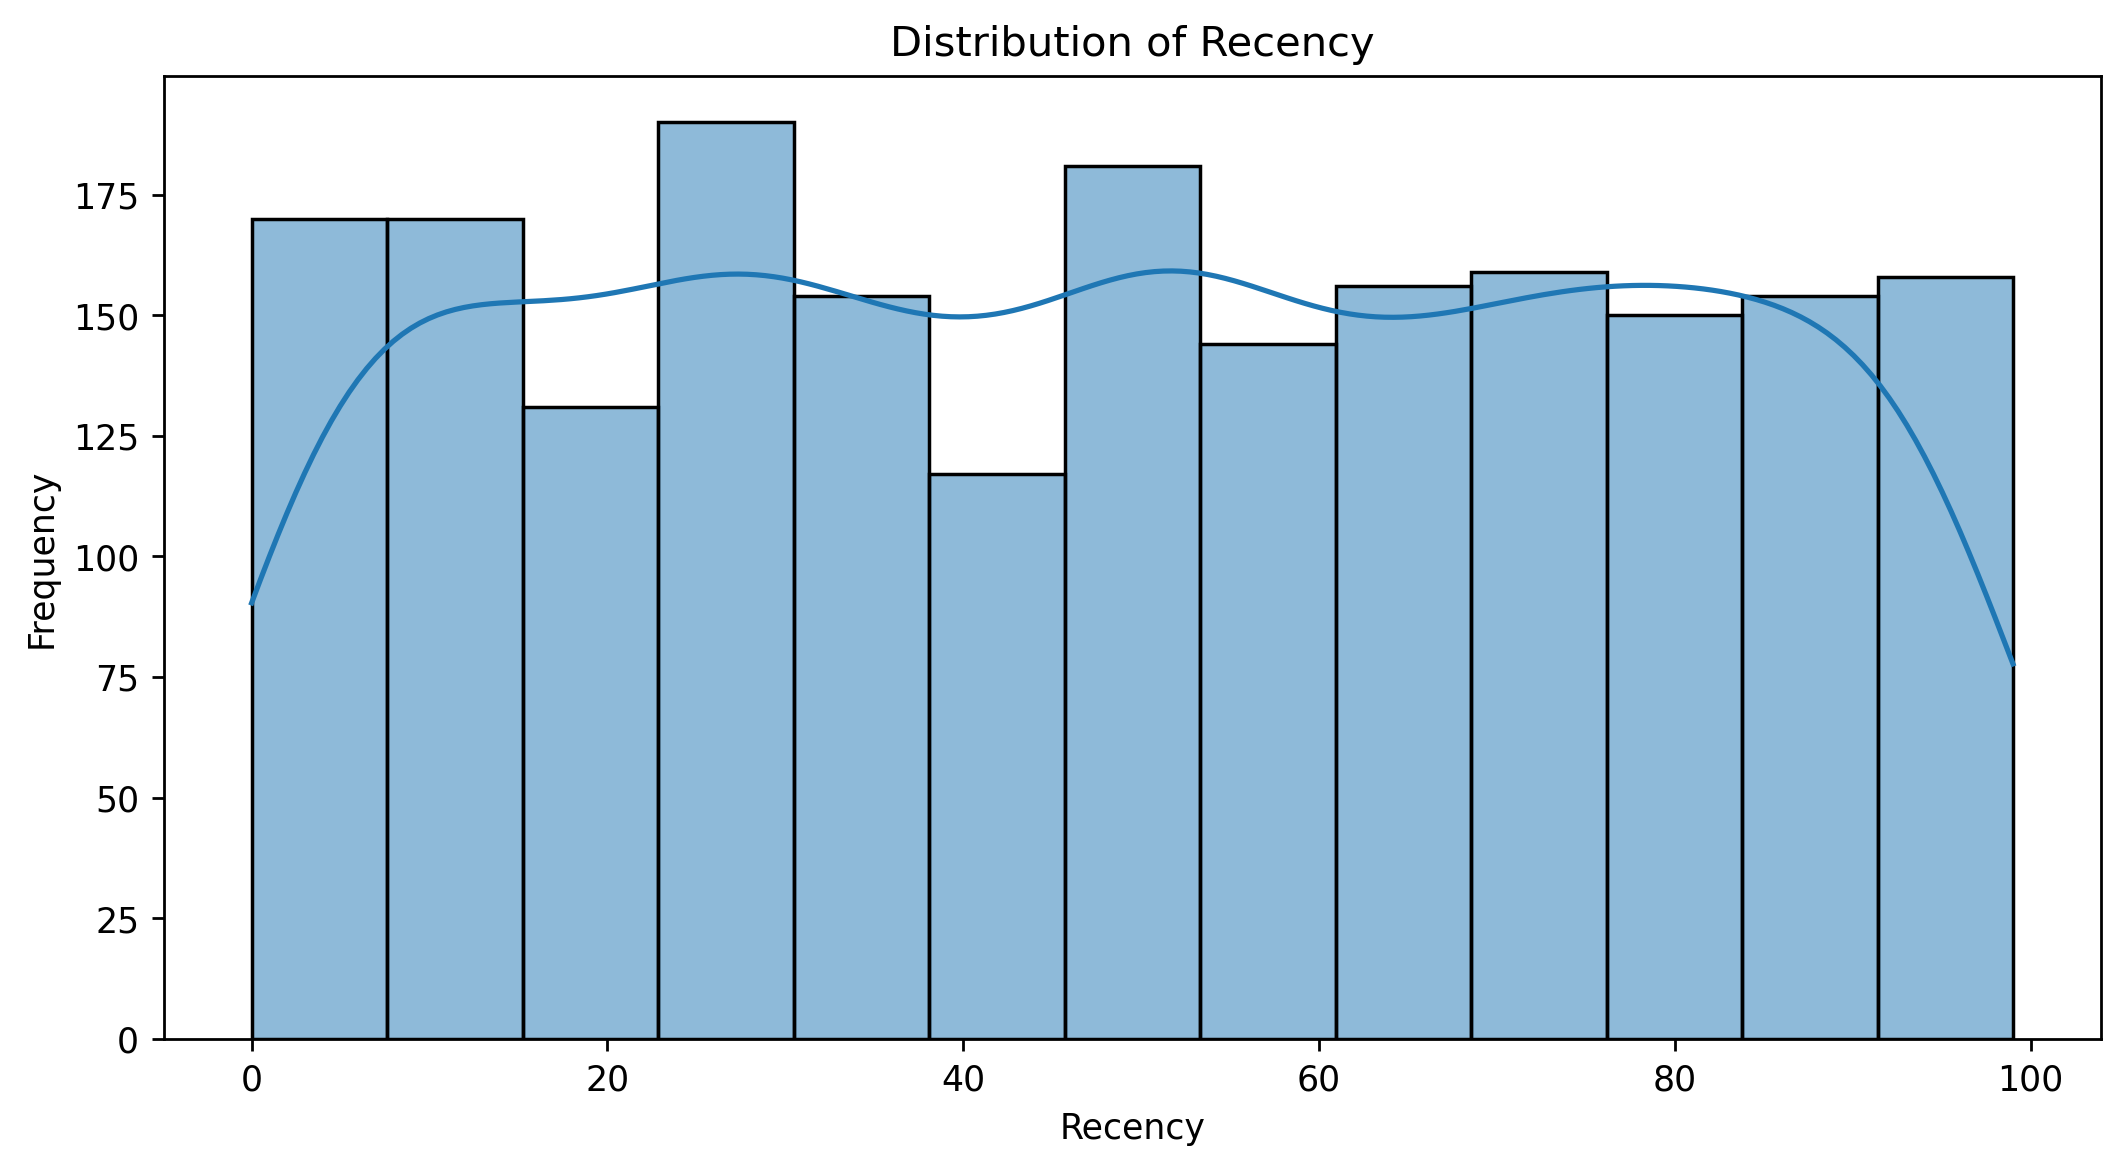

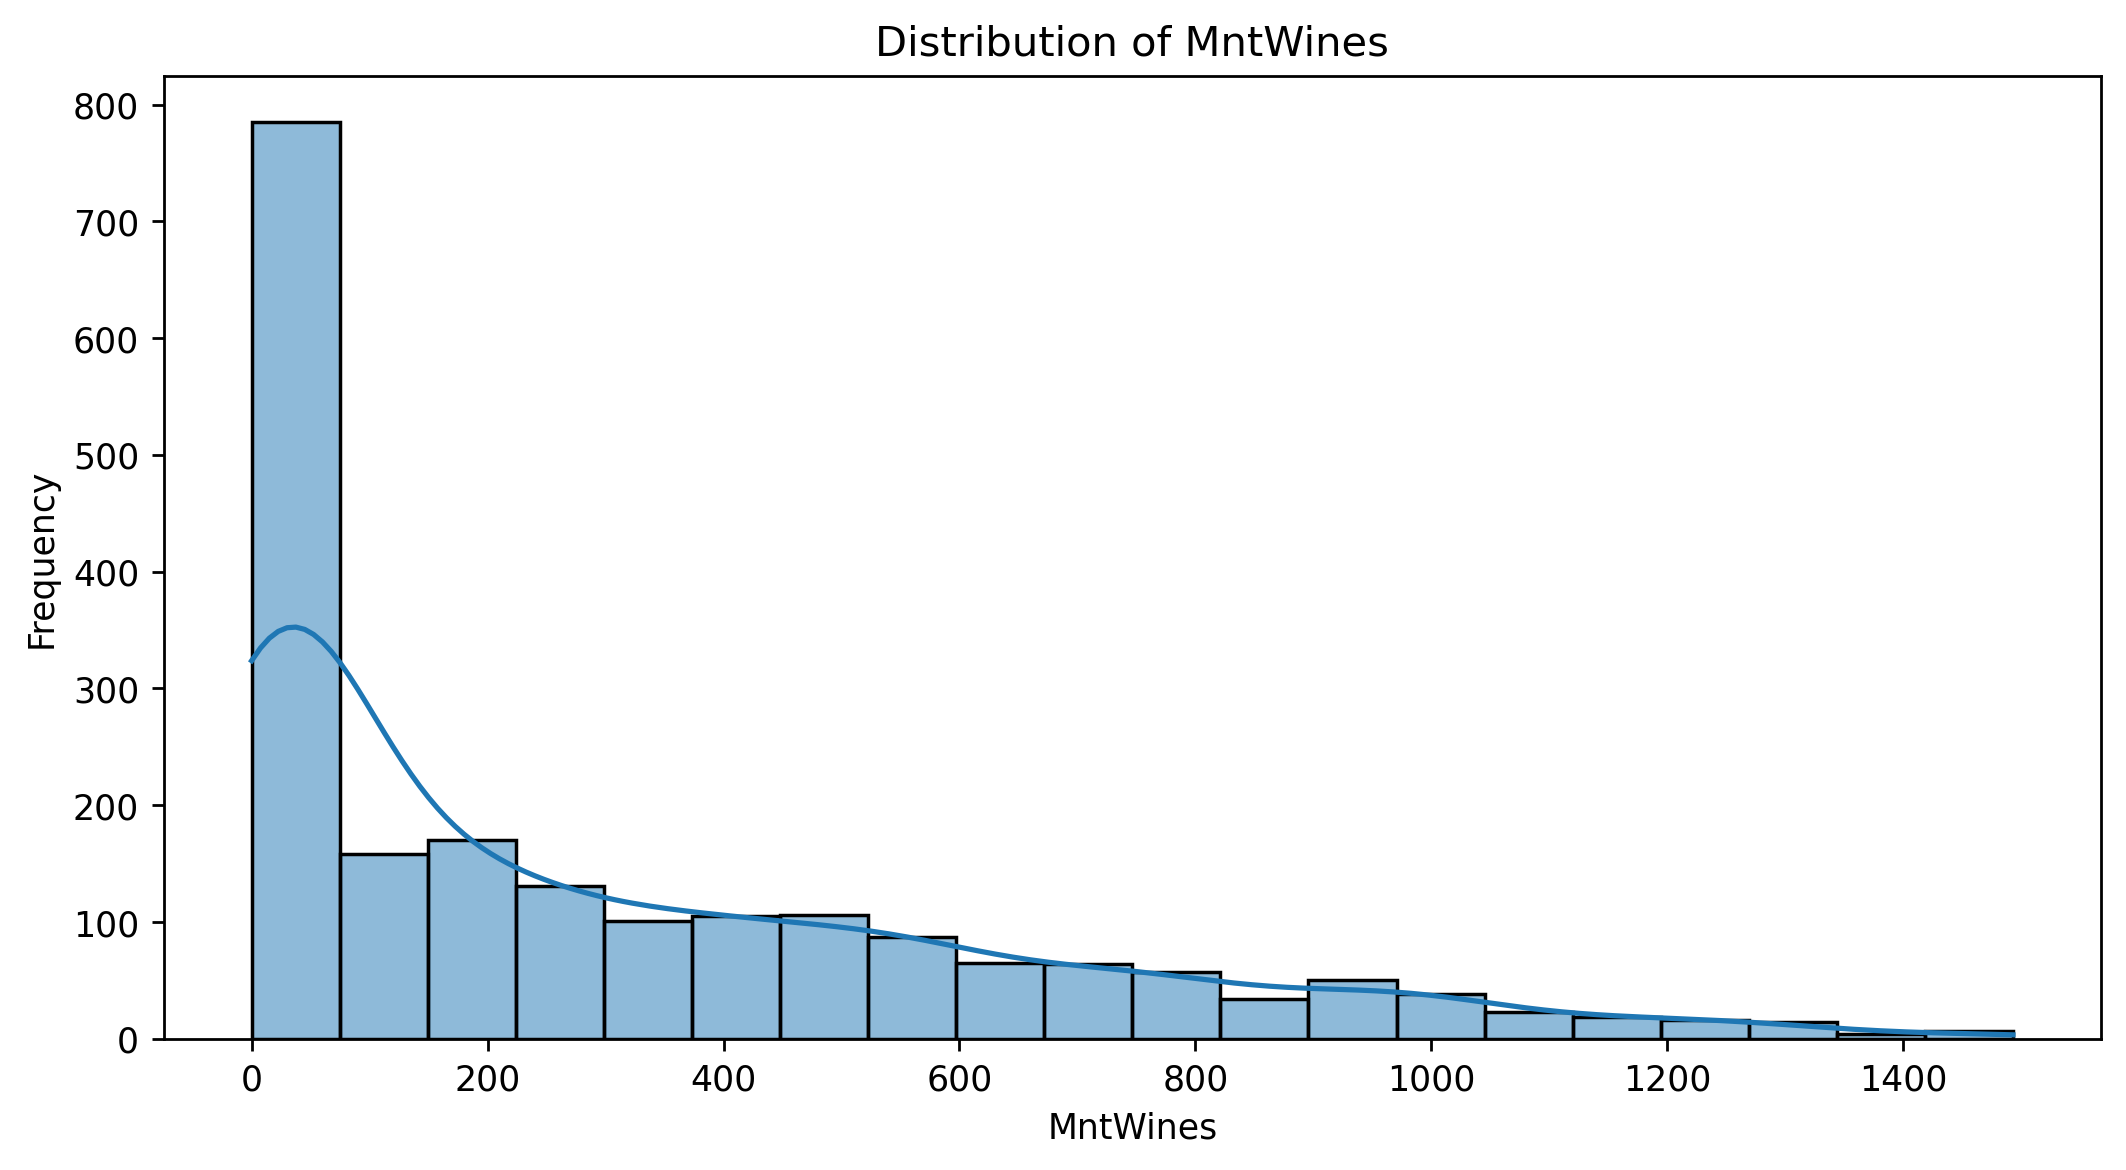

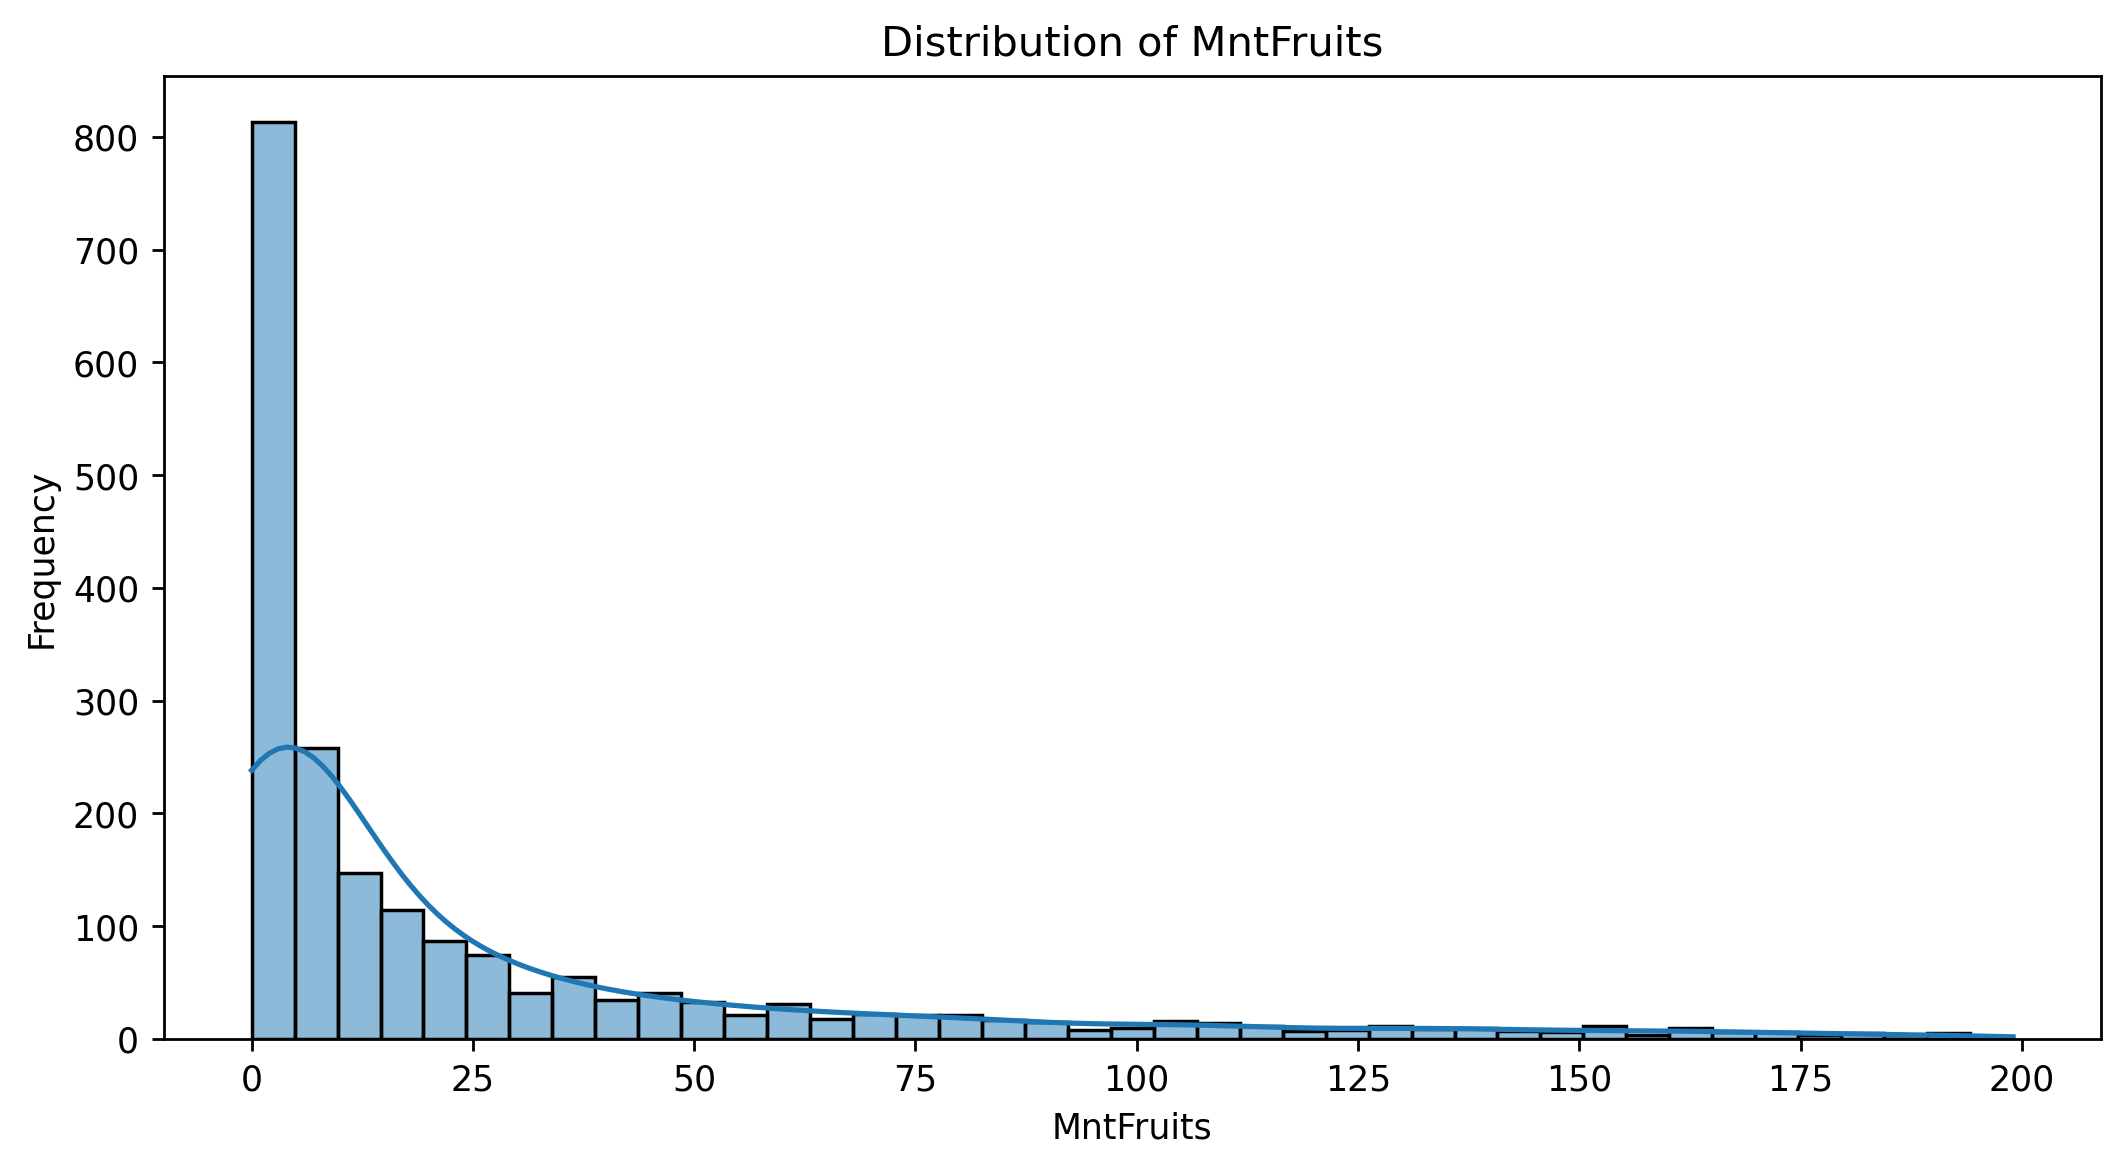

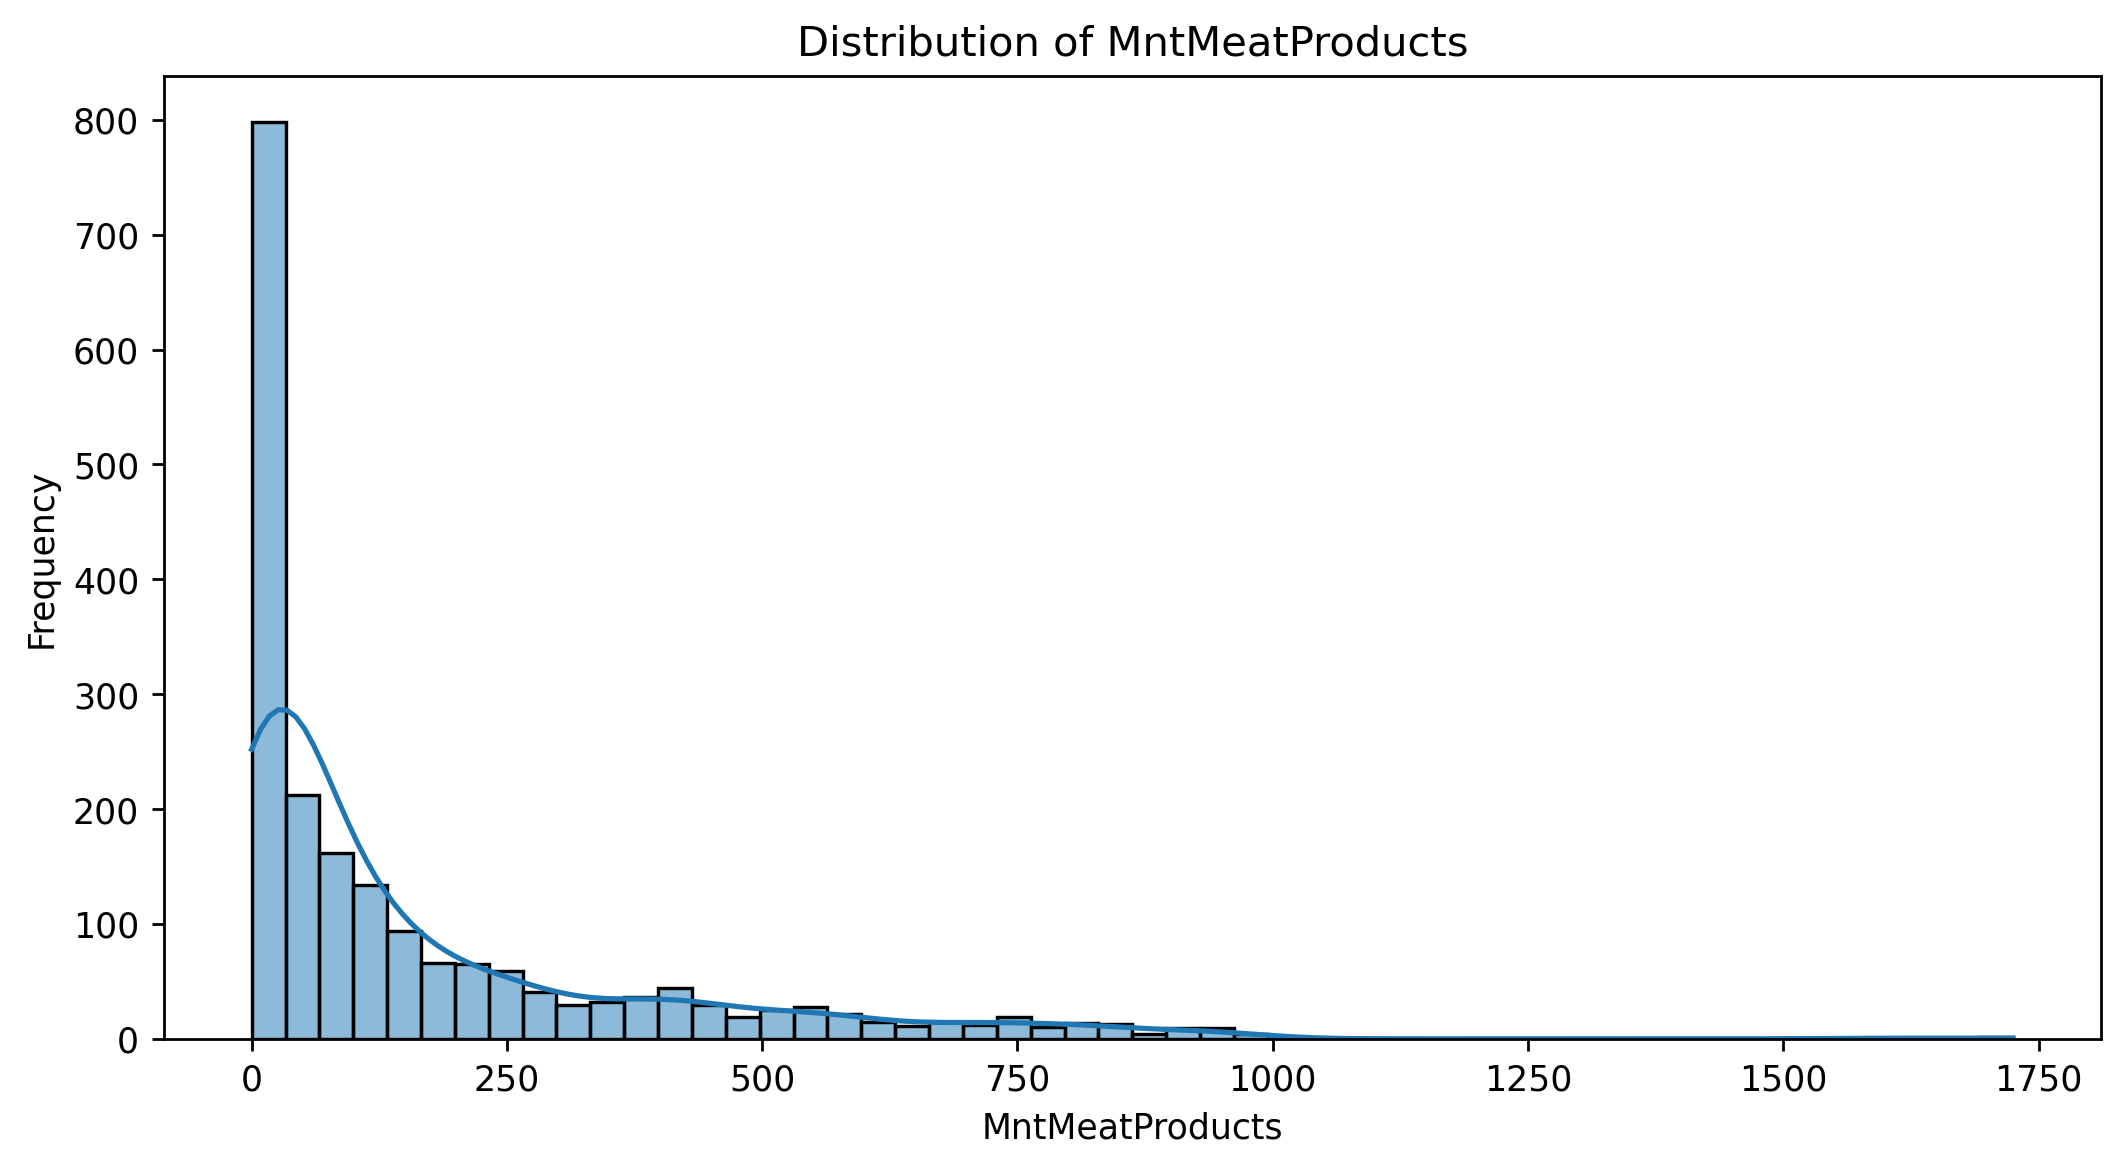

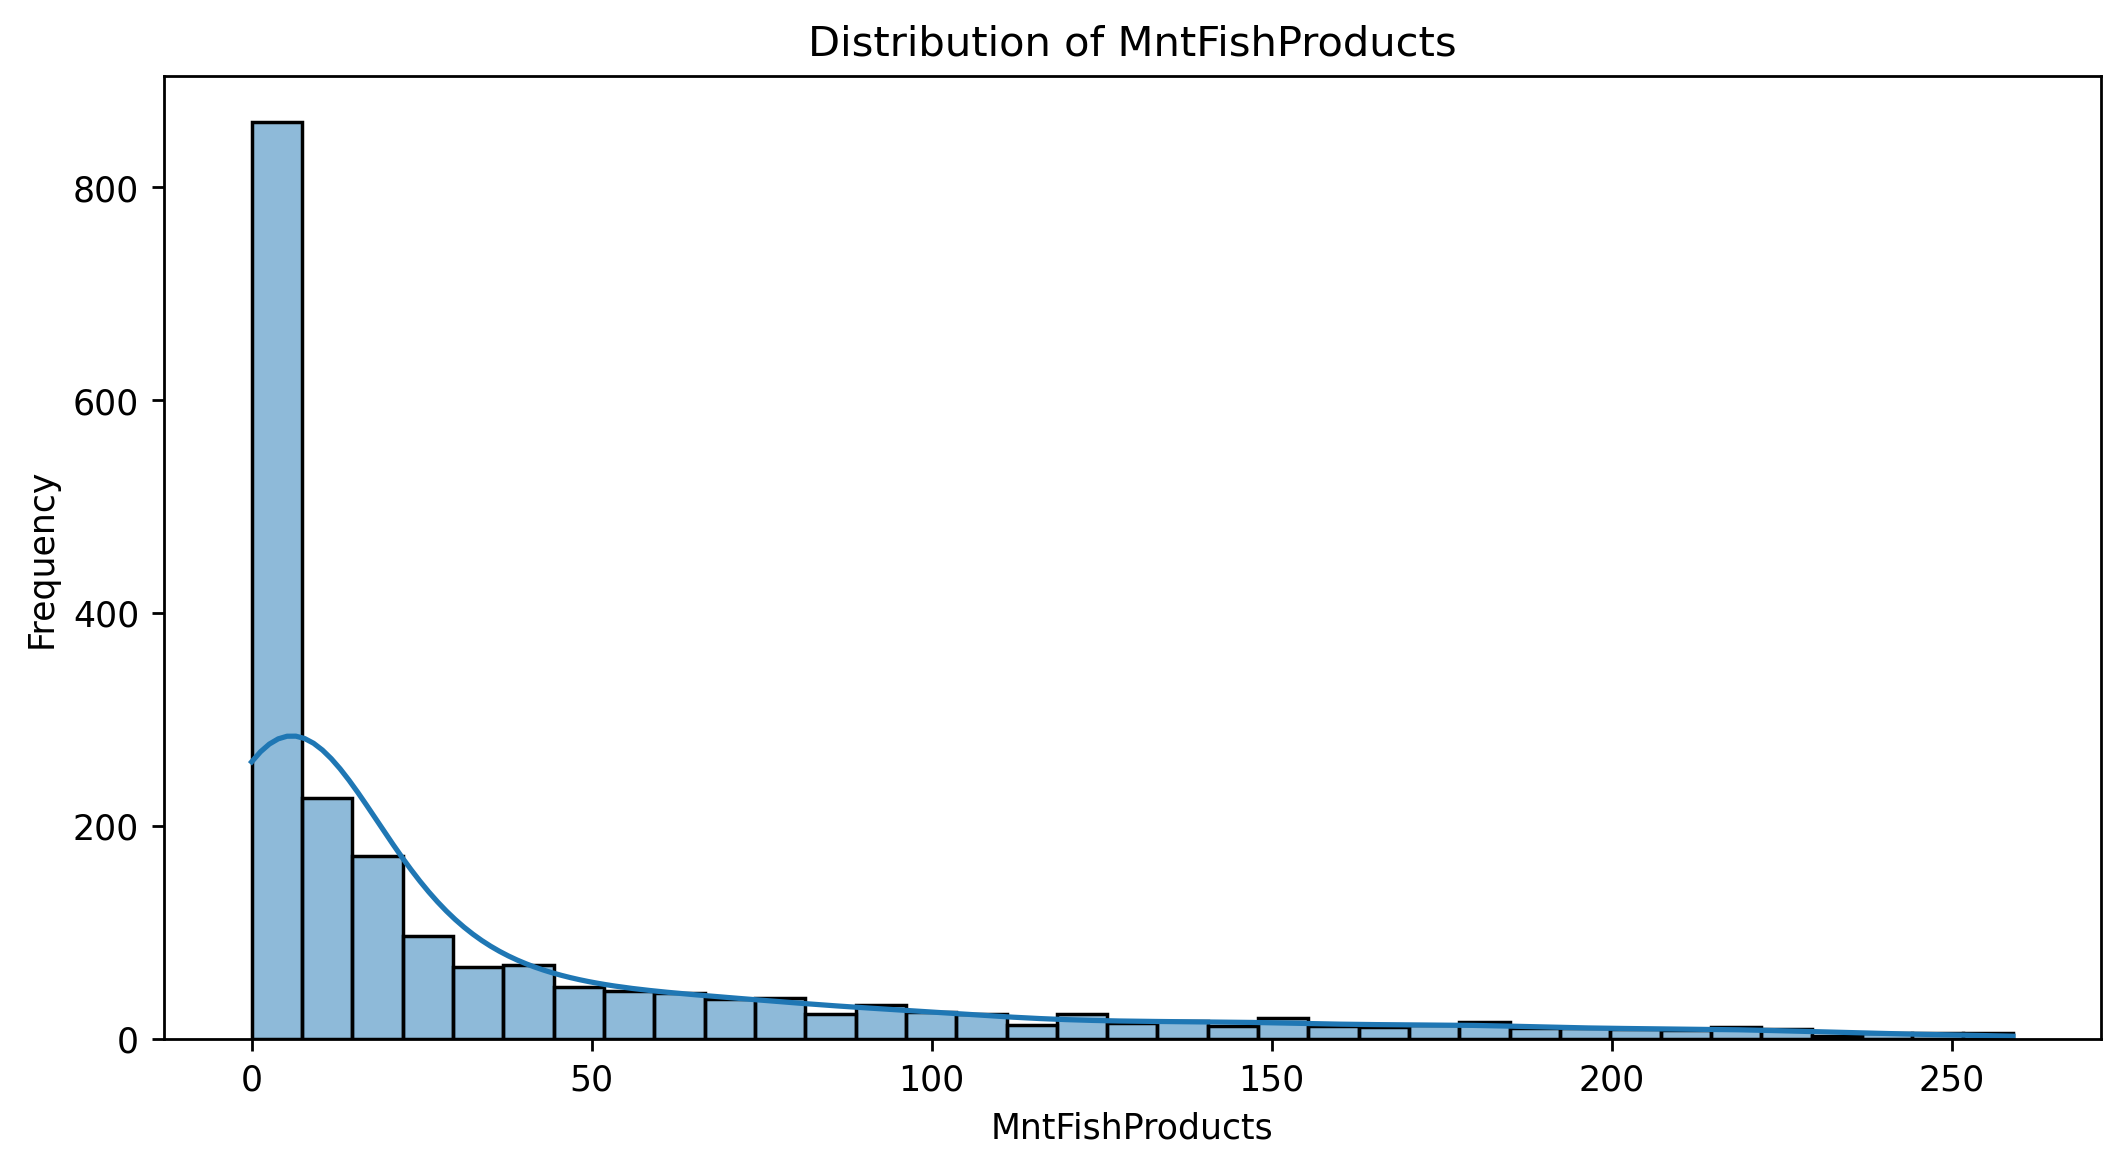

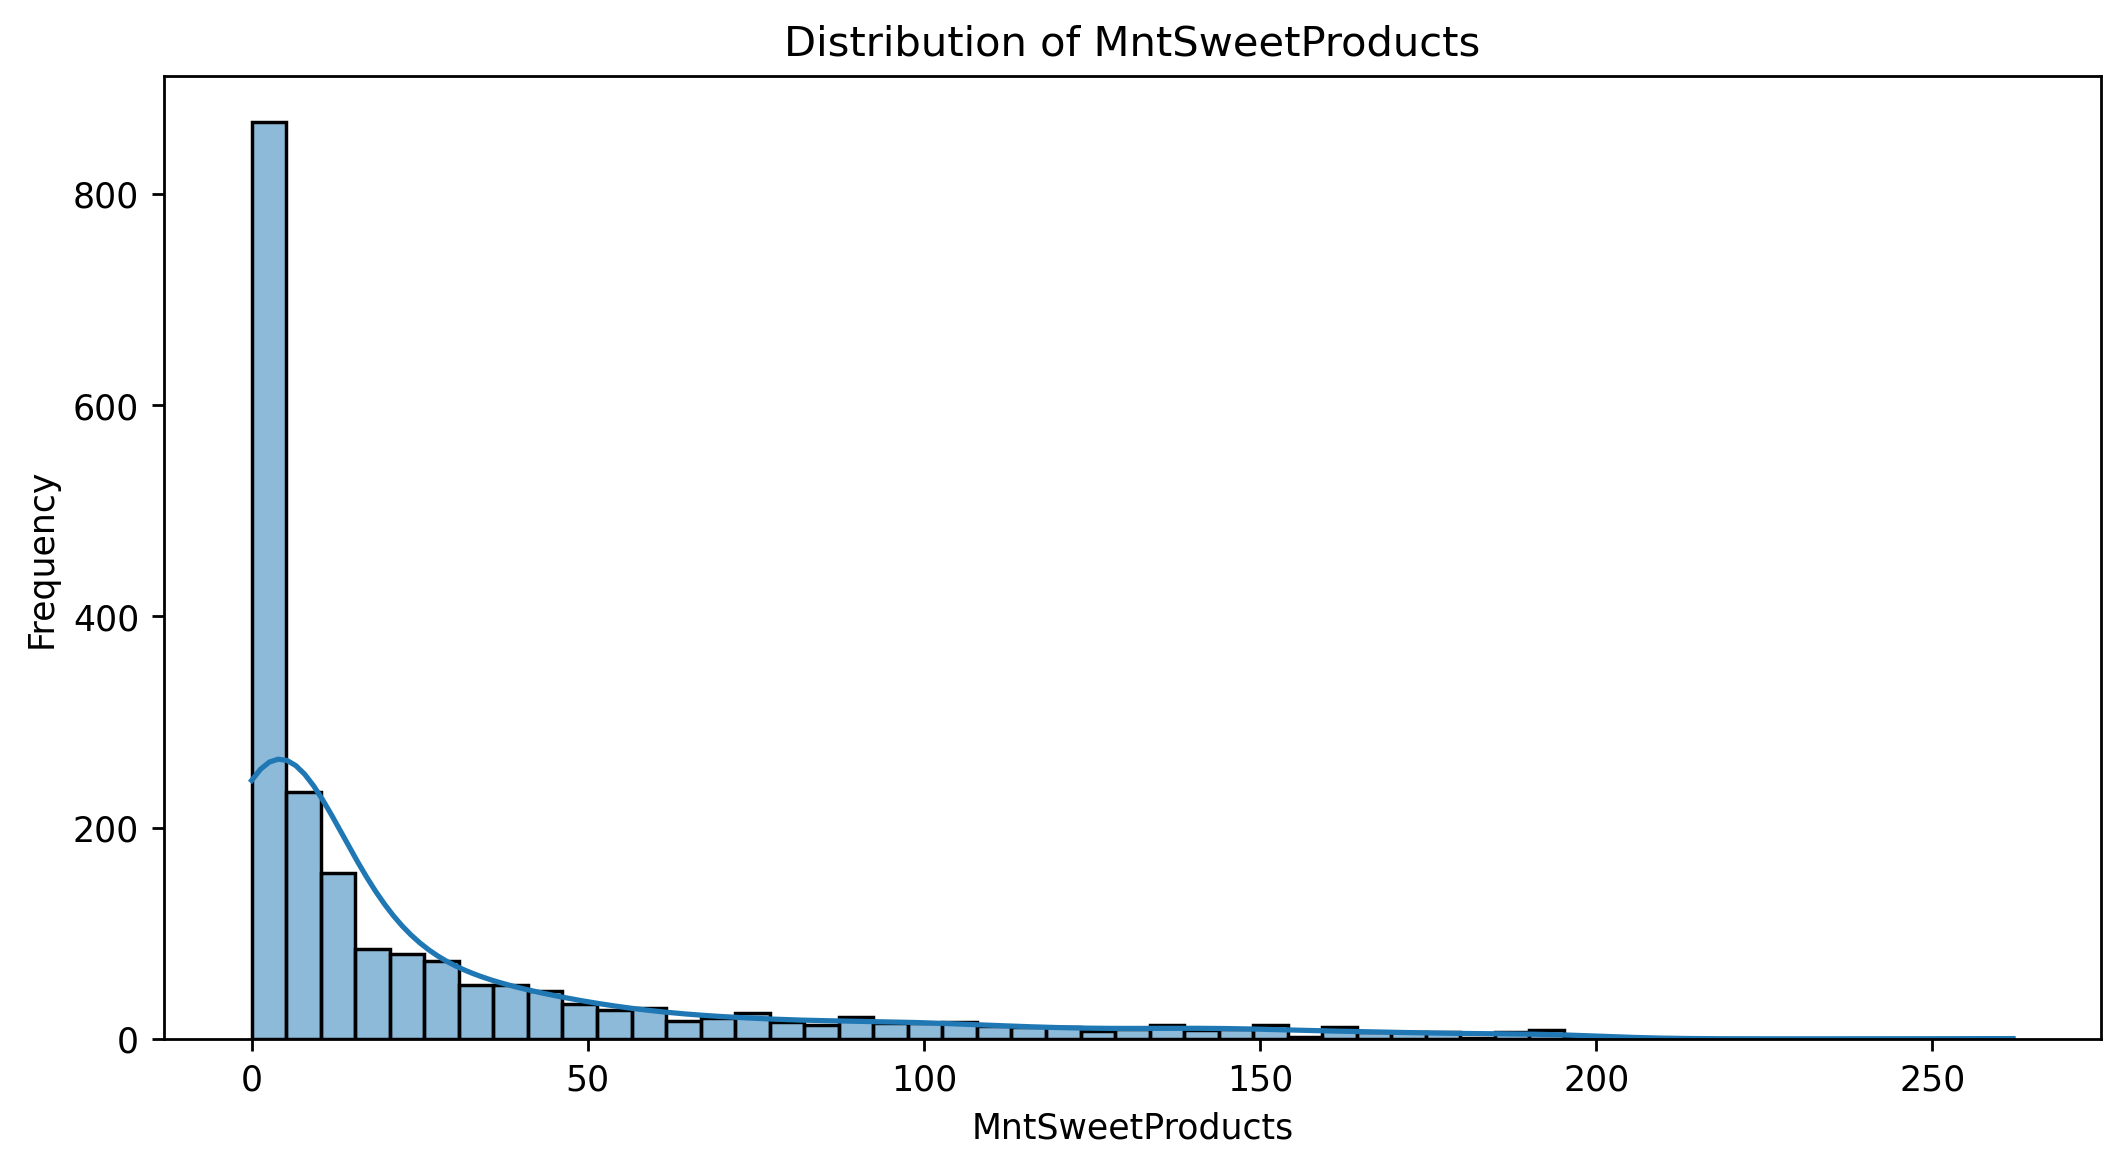

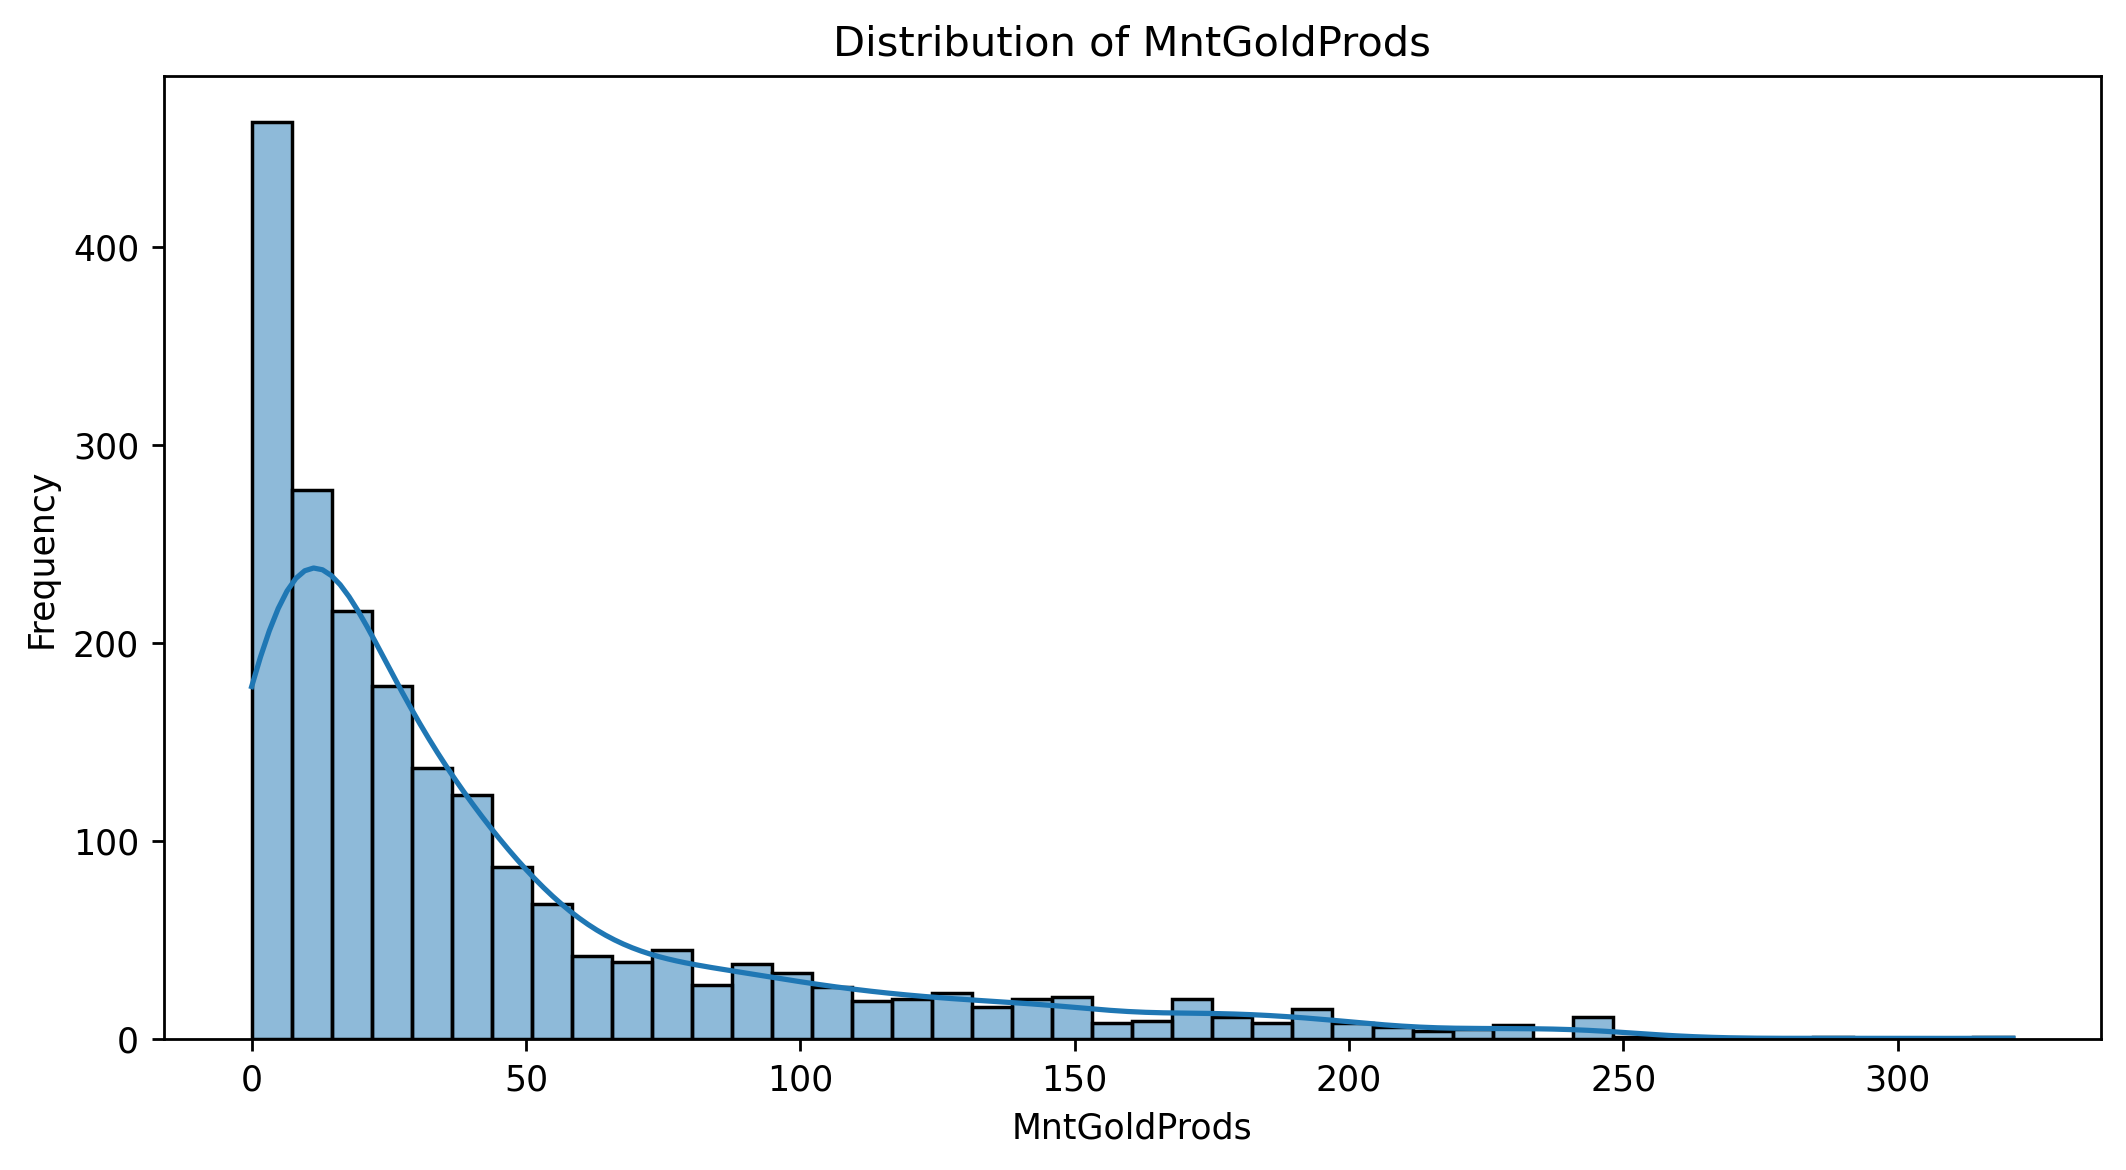

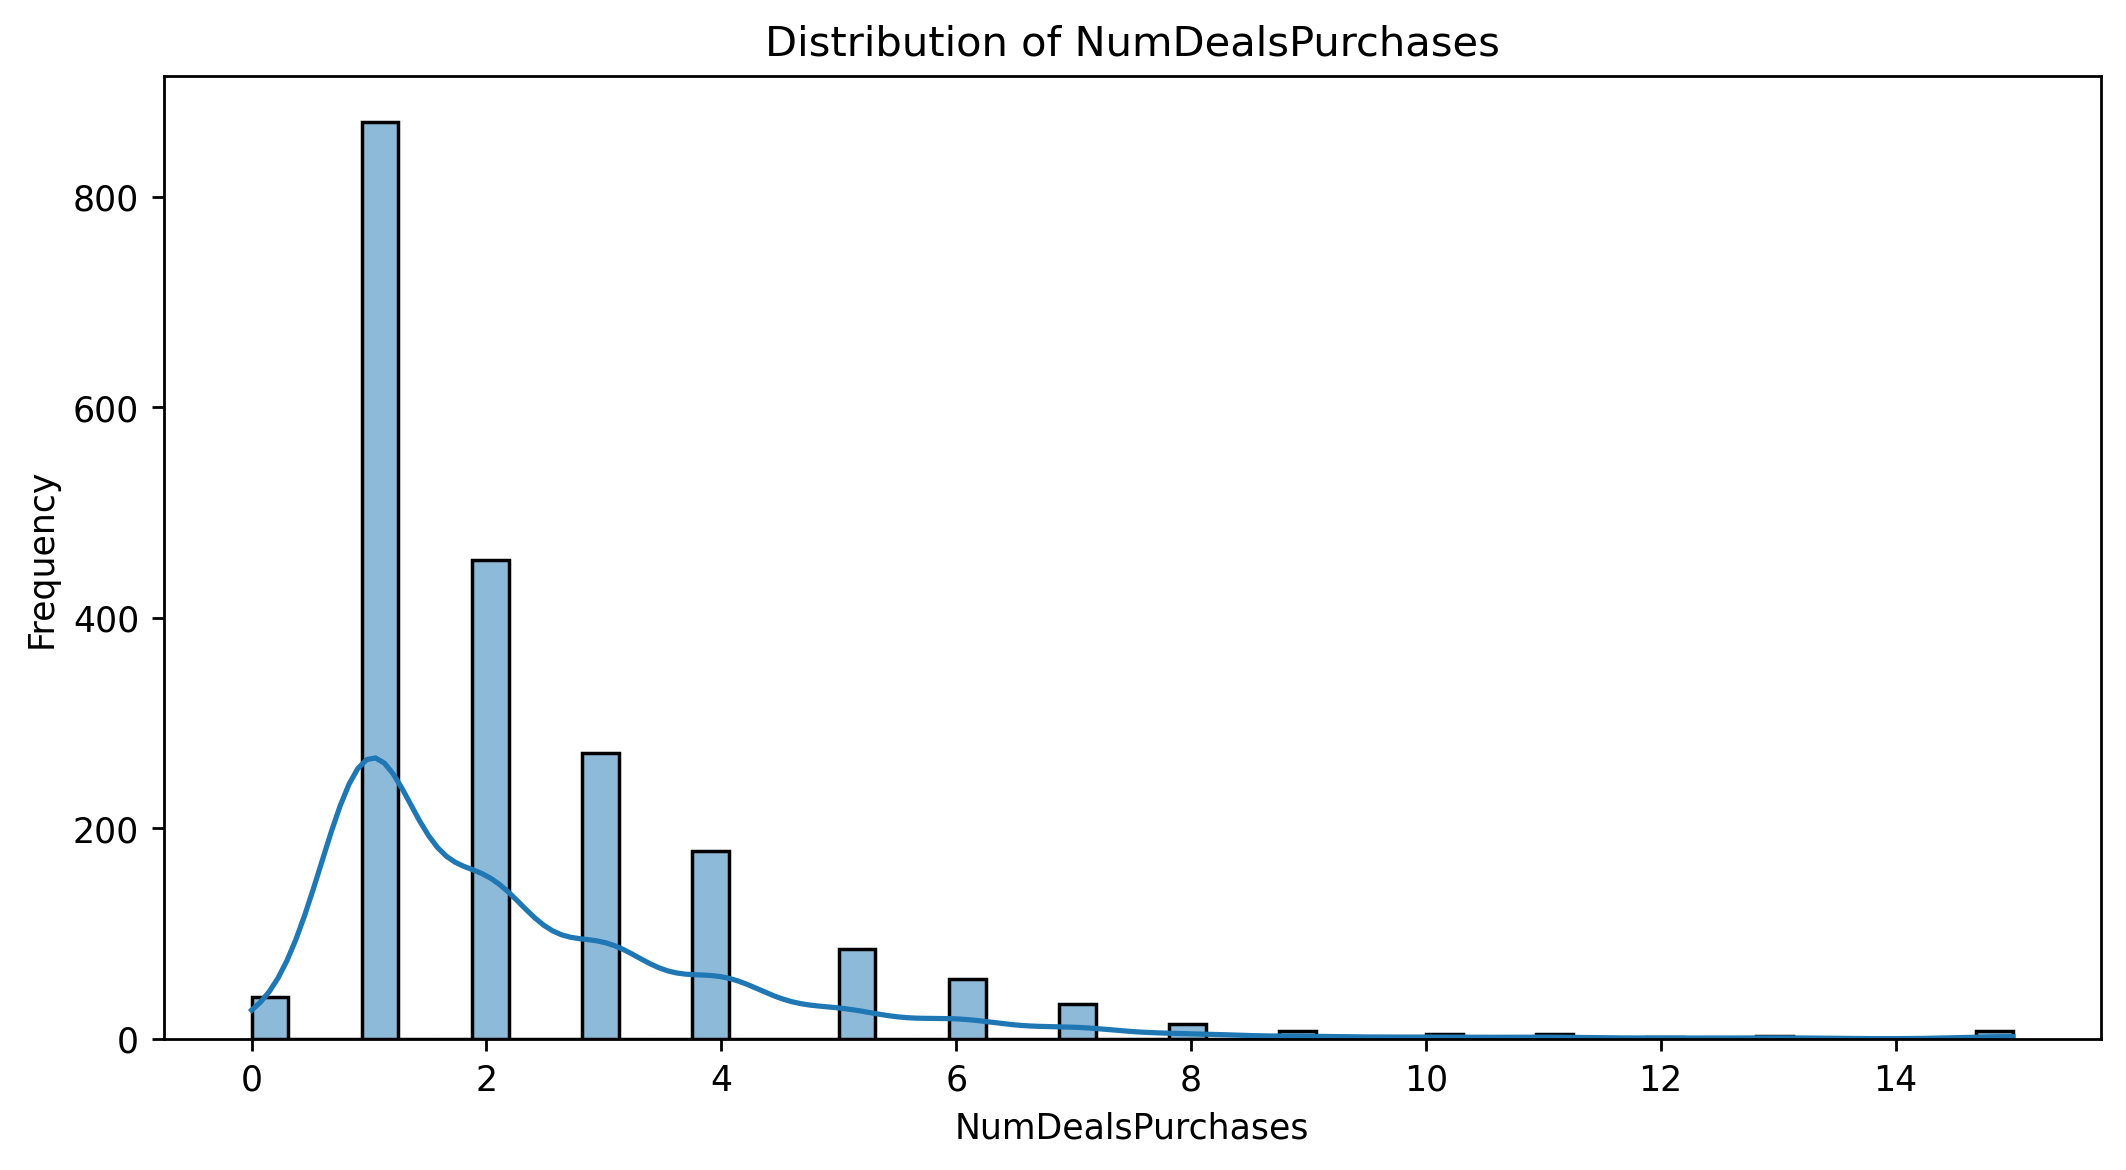

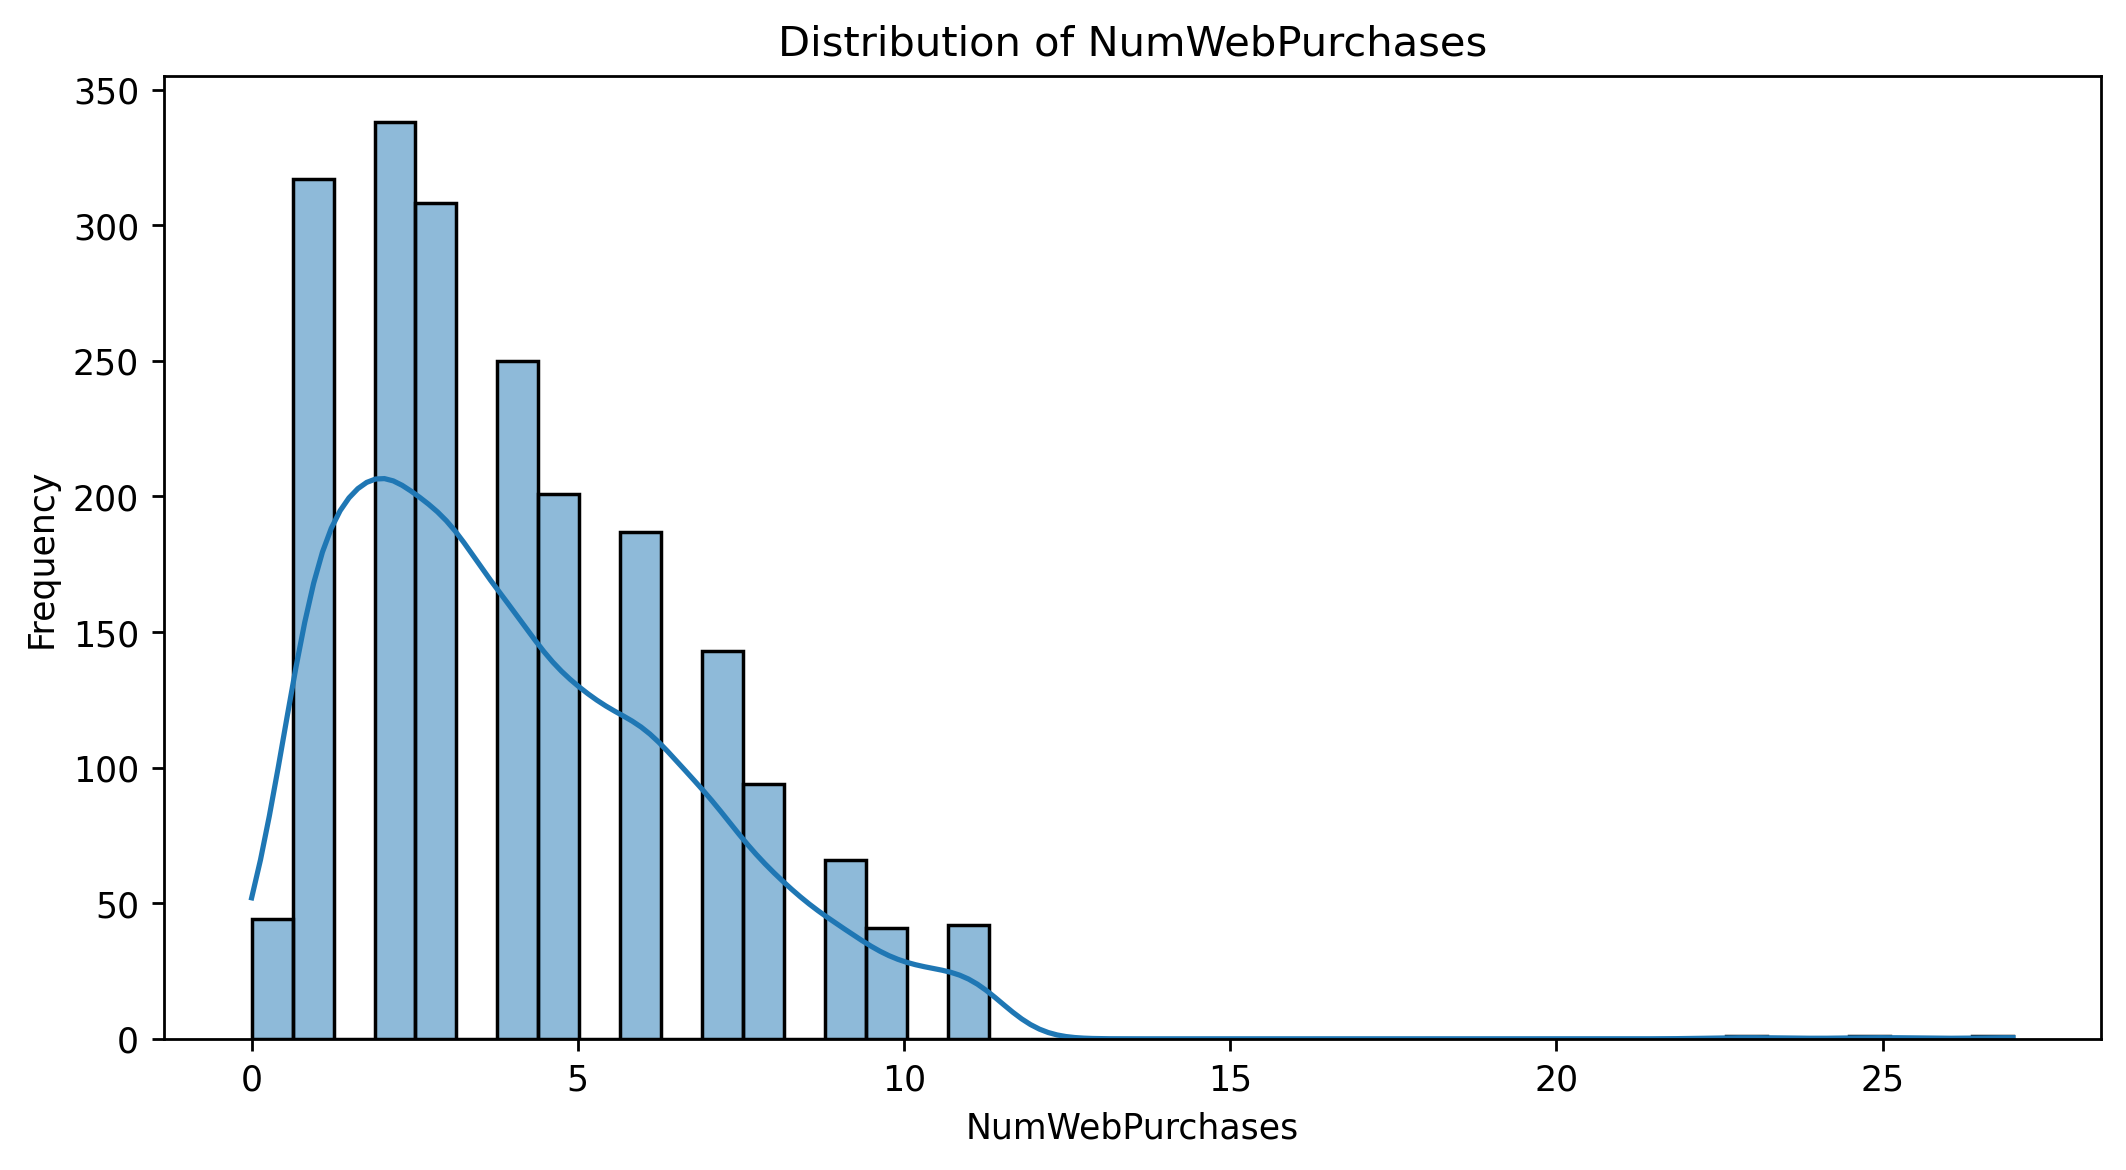

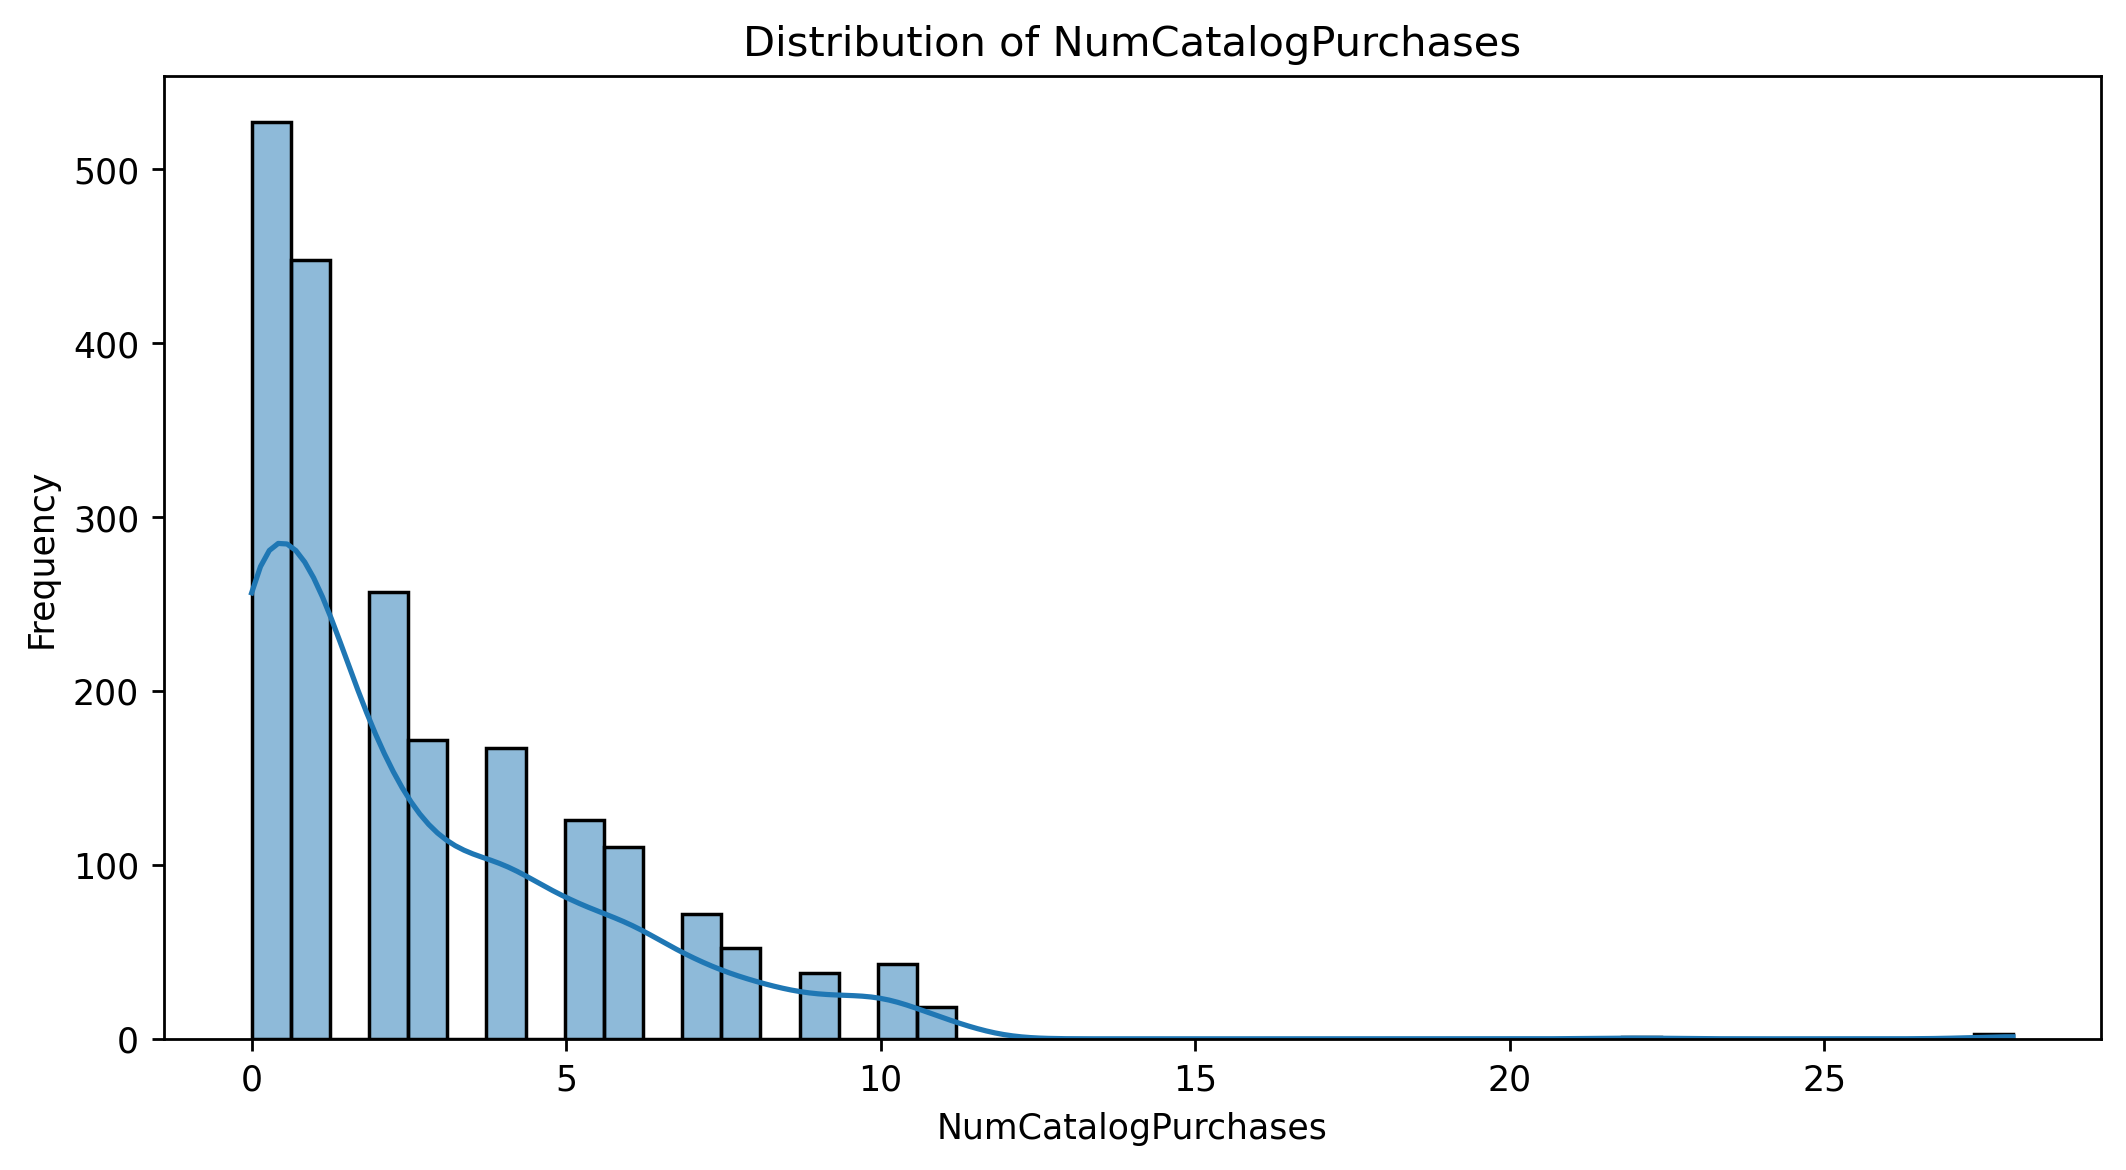

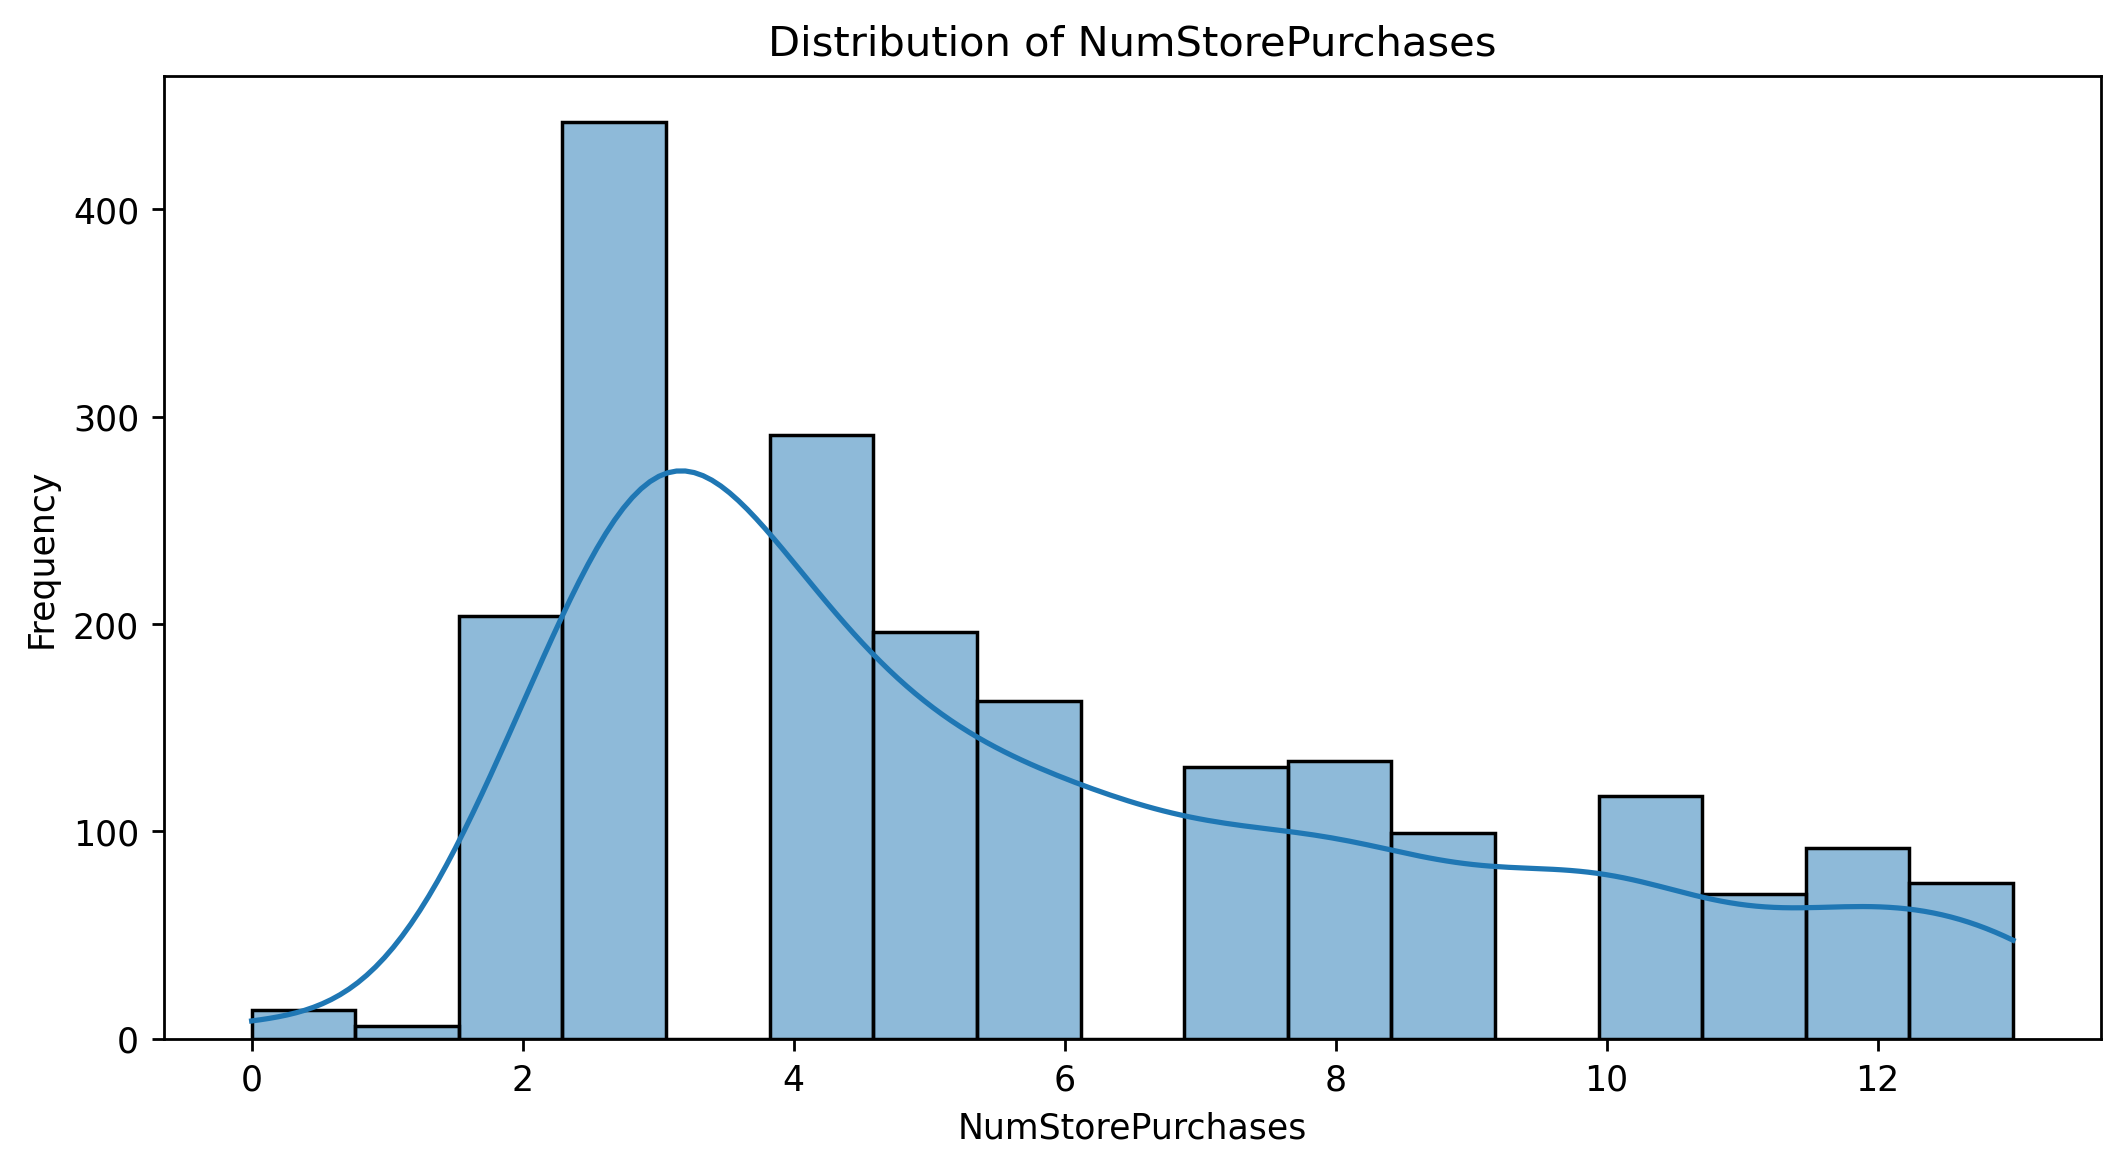

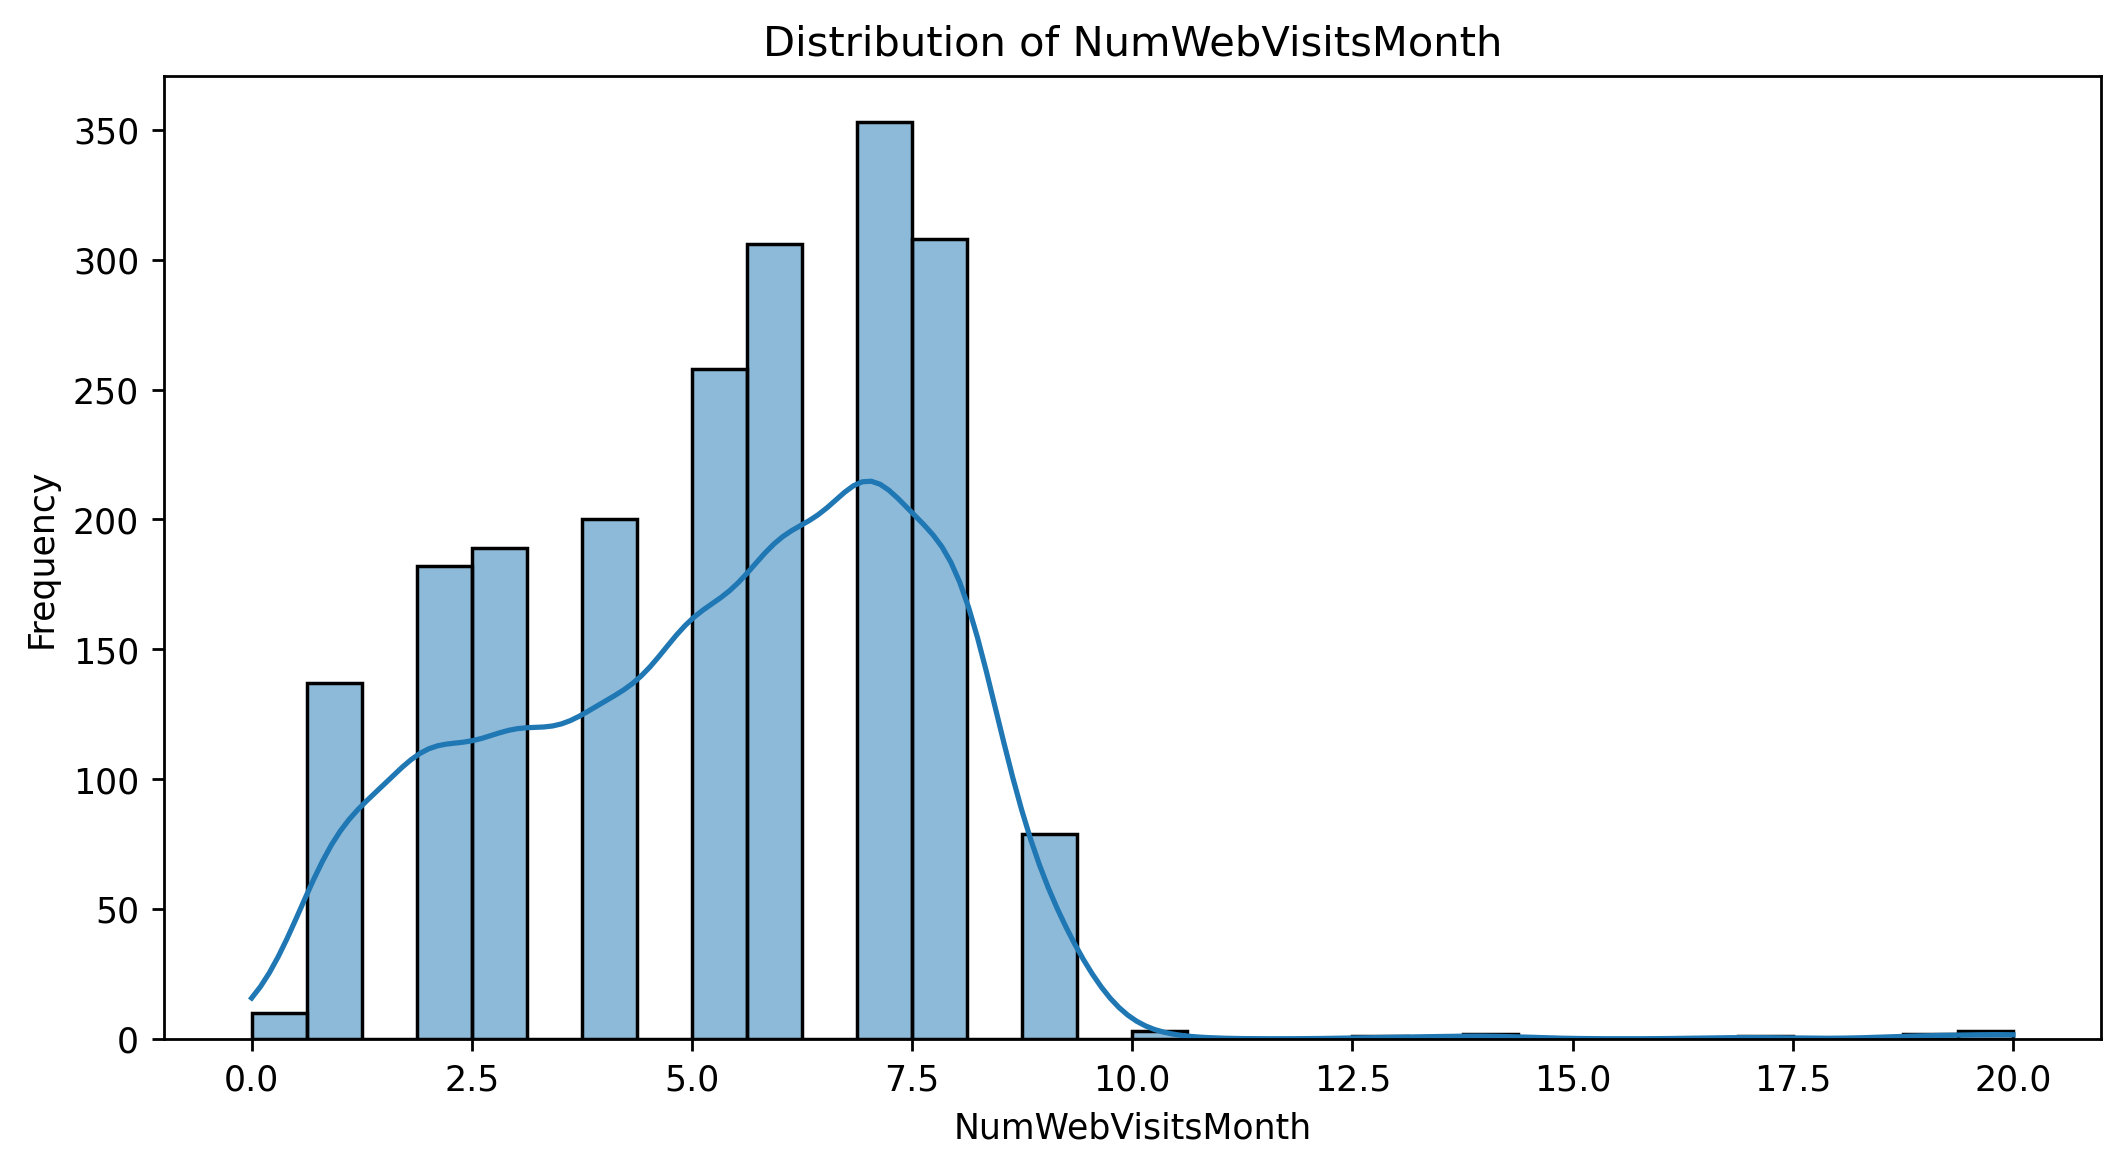

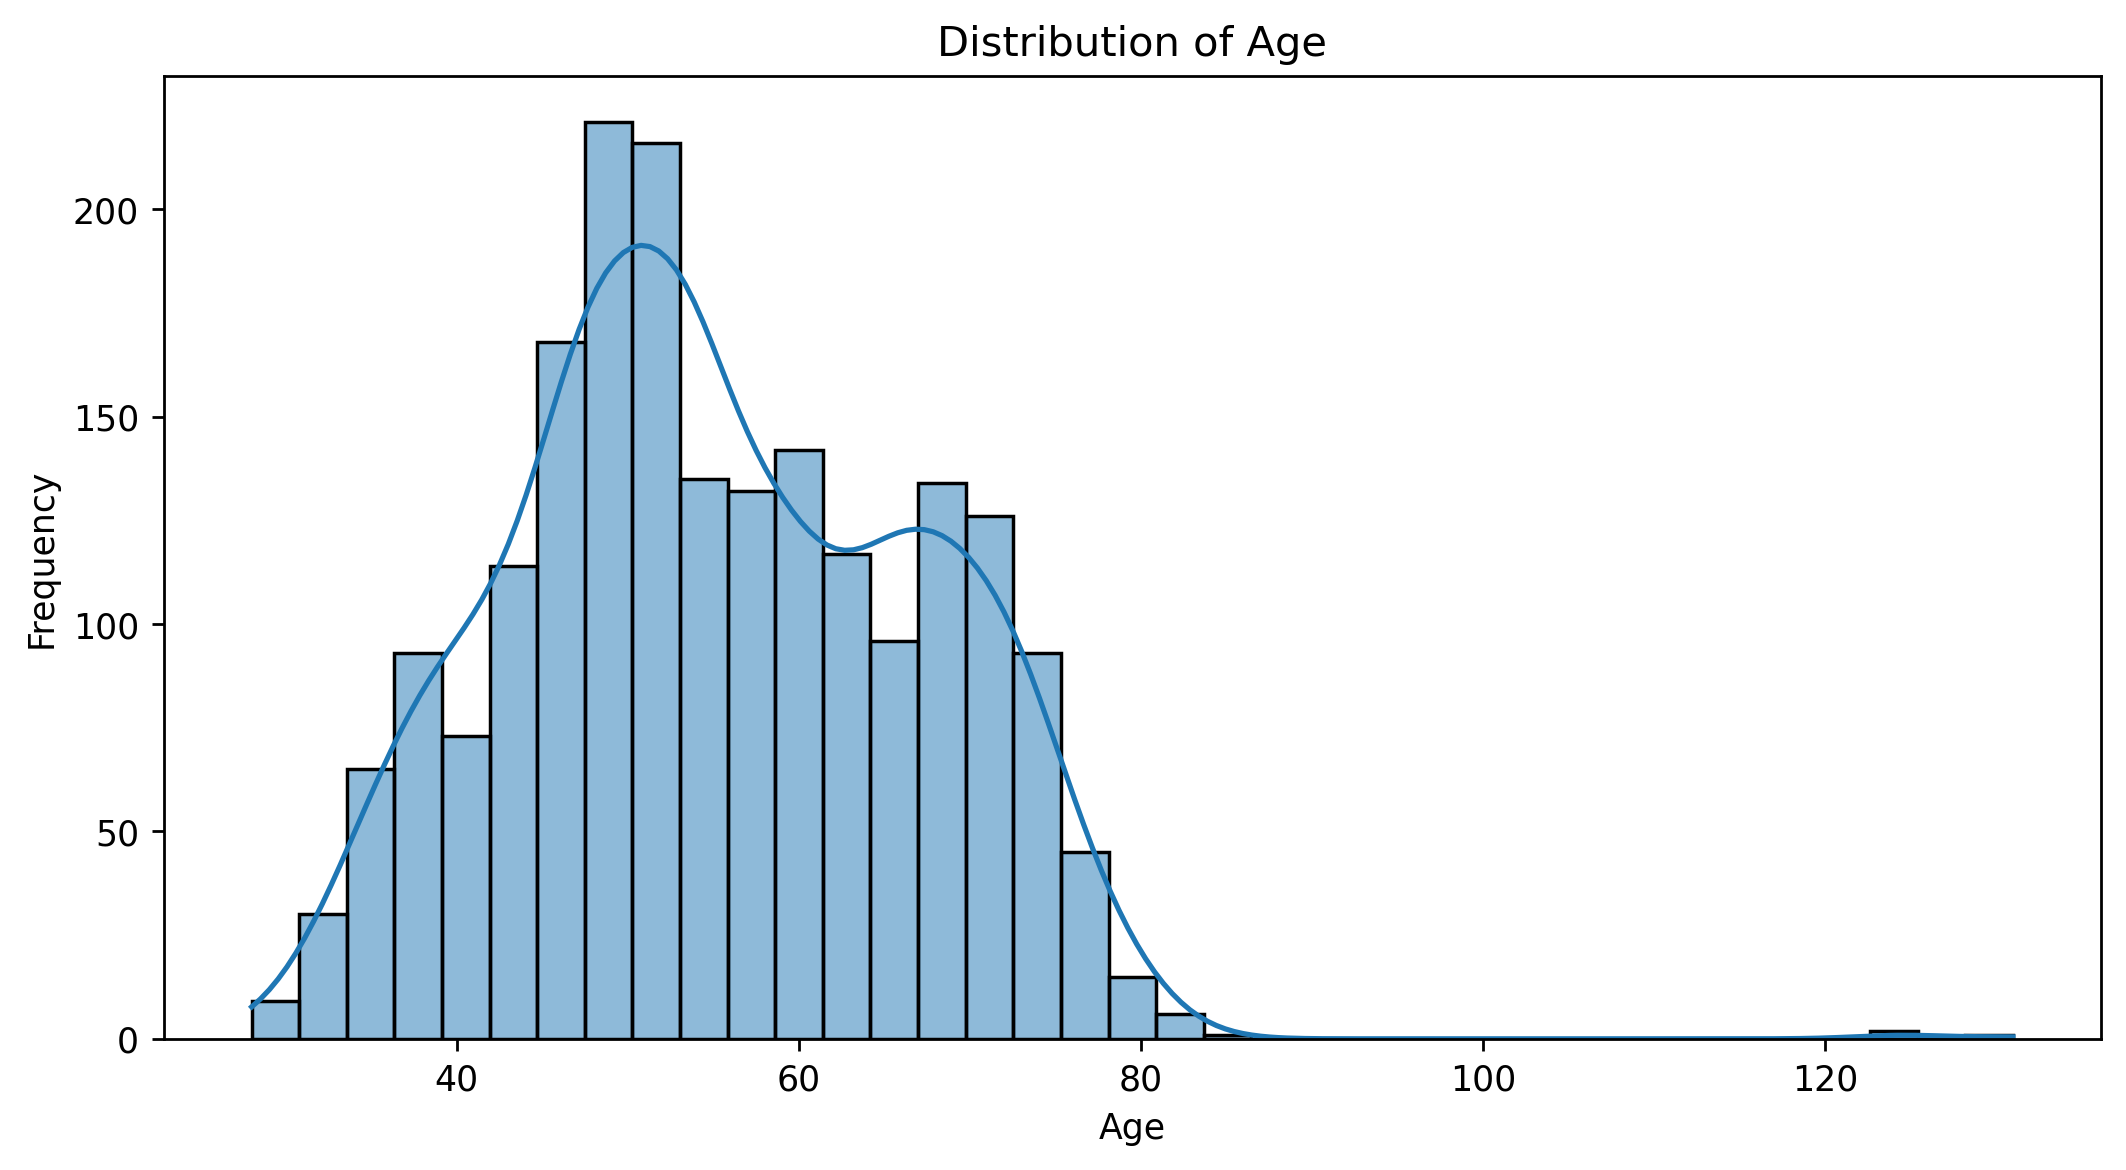

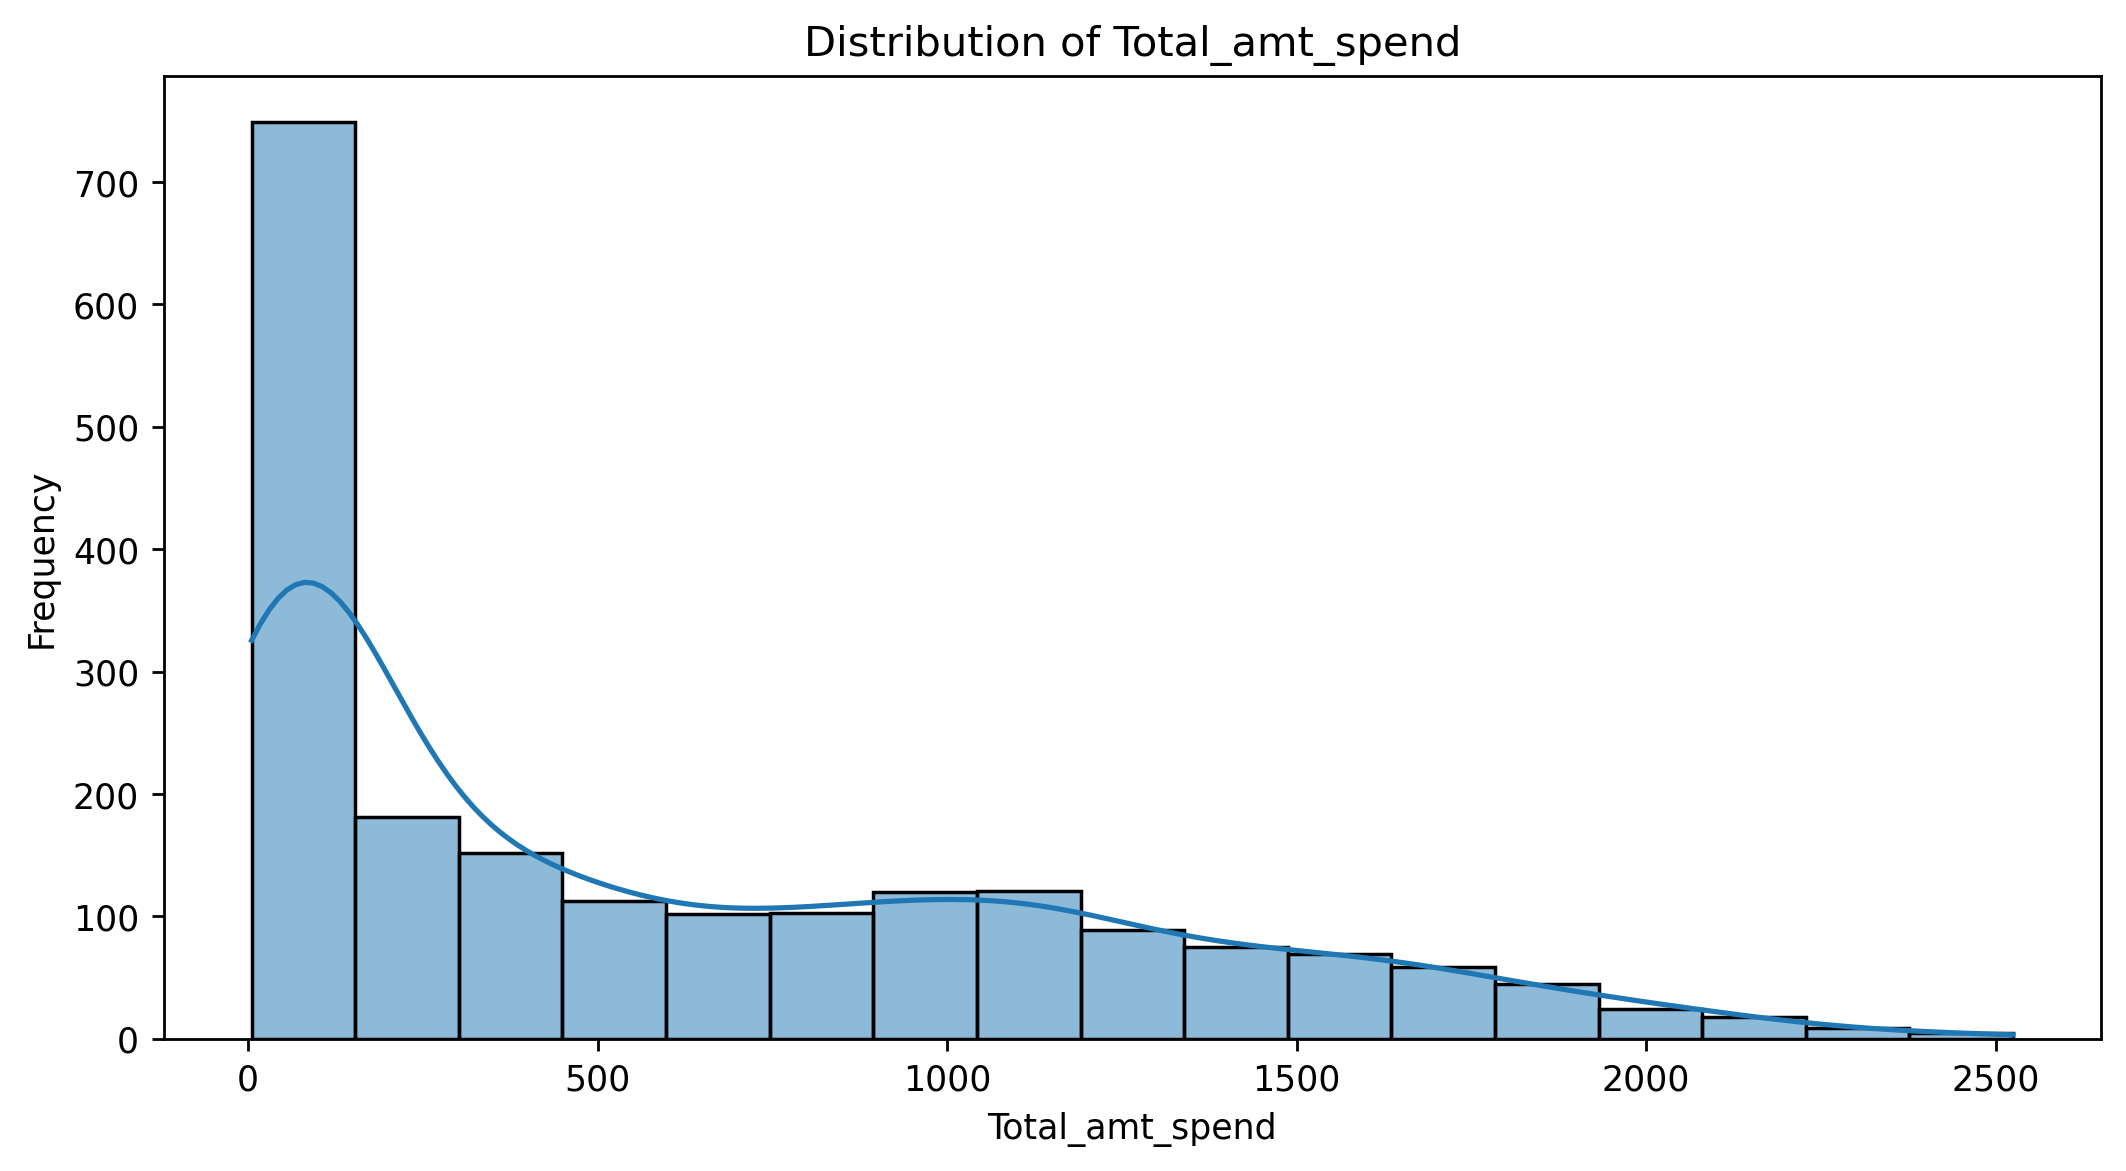

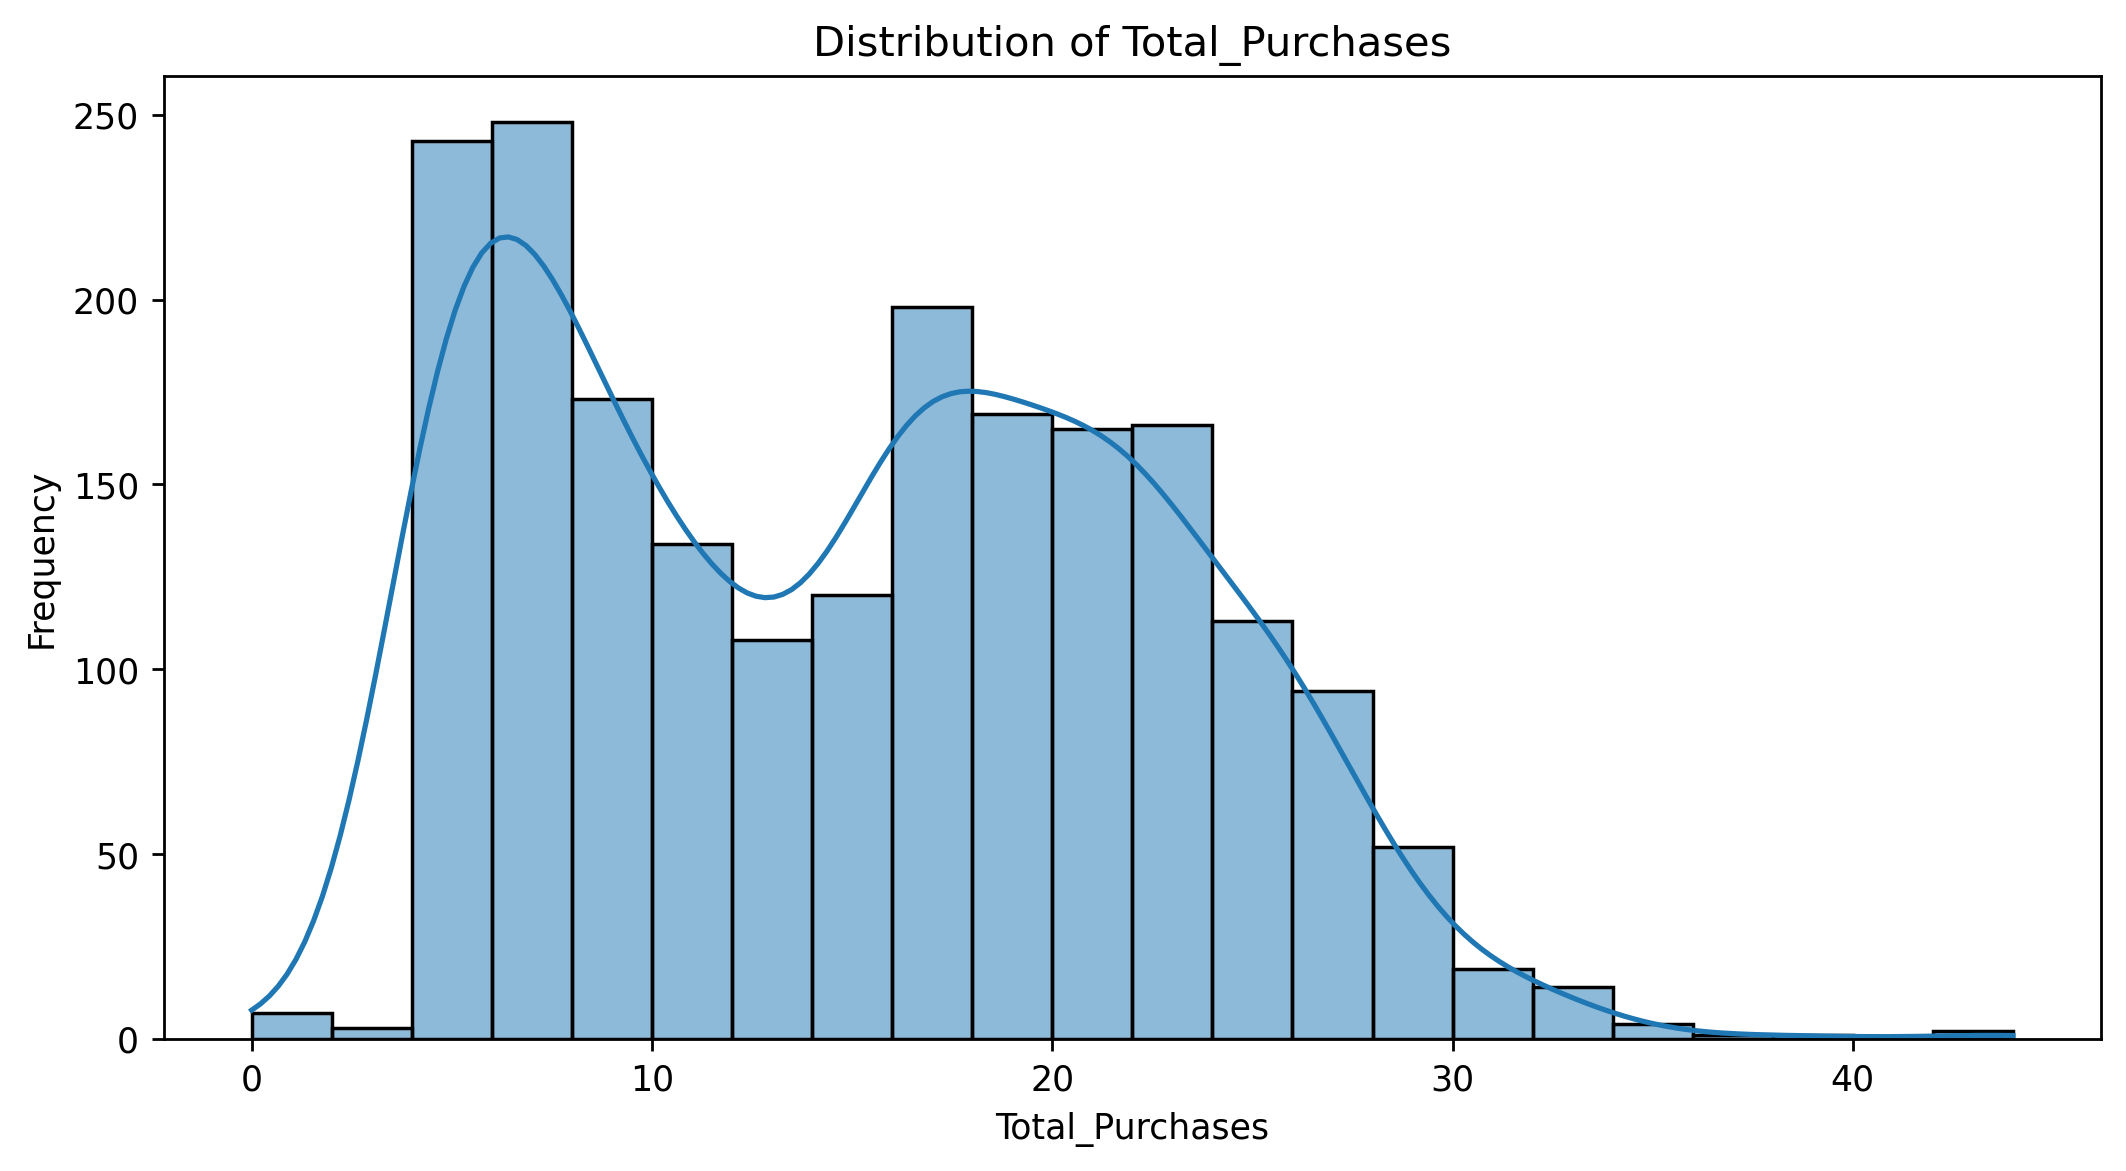

In [58]:
# Checking the data distributions for each column
for column in df.drop(columns=['Complain', 'Response', 'Cust_Since(yrs)', 'Num_Childrns', 'AcceptedCmp', 'Education_Graduation', 
                               'Education_Master', 'Education_PhD','Marital_Status_Absurd', 'Marital_Status_Divorced',
                               'Marital_Status_Engaged', 'Marital_Status_Married','Marital_Status_Single', 
                               'Marital_Status_Widow', 'Marital_Status_YOLO','Age_Groups_Young', 'Age_Groups_Mid_aged', 
                               'Age_Groups_Old', 'Education_2n Cycle', 'Education_Basic']).columns:
    sns.histplot(df[column], kde=True, palette='rainbow')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [59]:
# By plotting the HIstograms for columns we can clearly see that the data is not normally distributed.
# There is presennce of outliers which is affecting the distribution of data and reason for skewness.

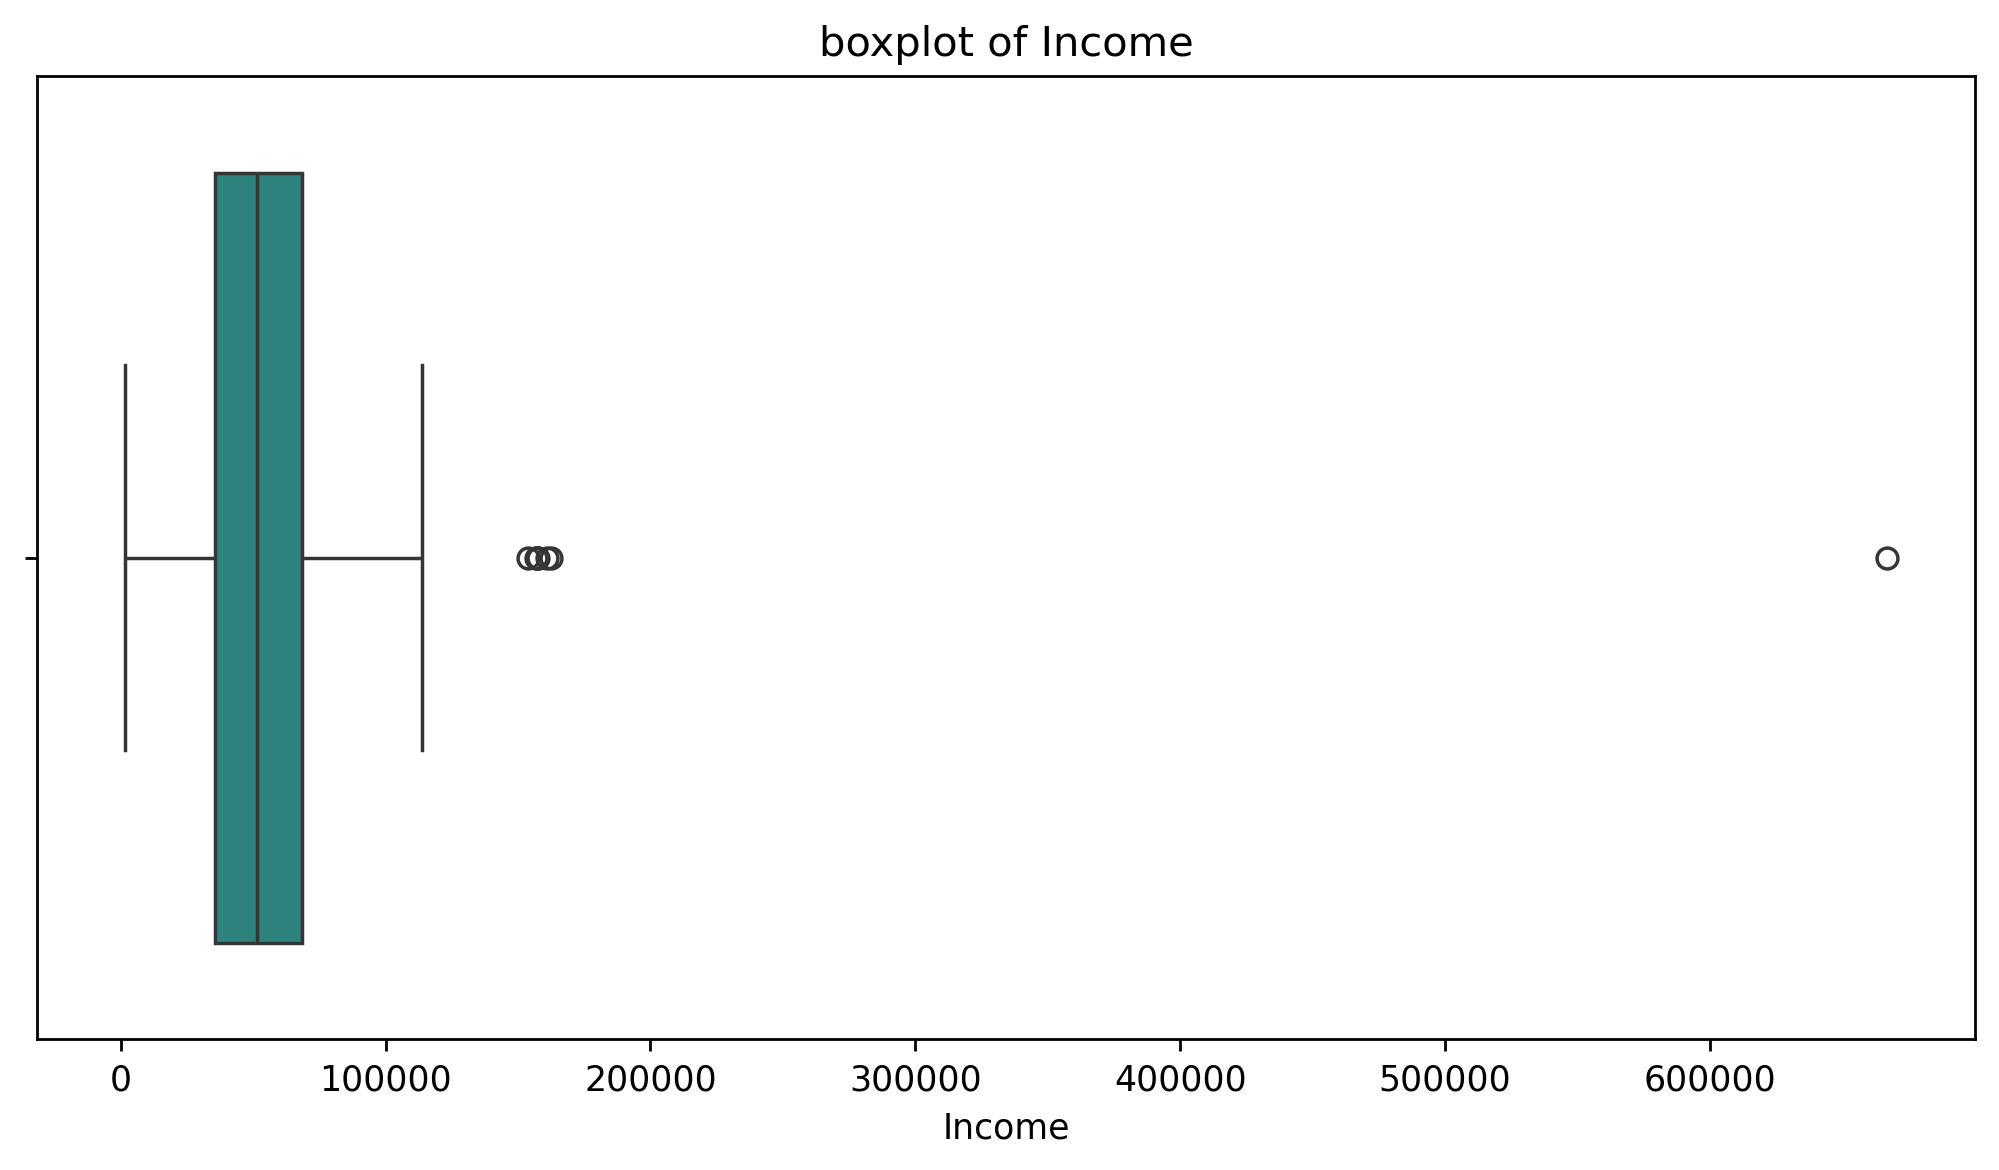

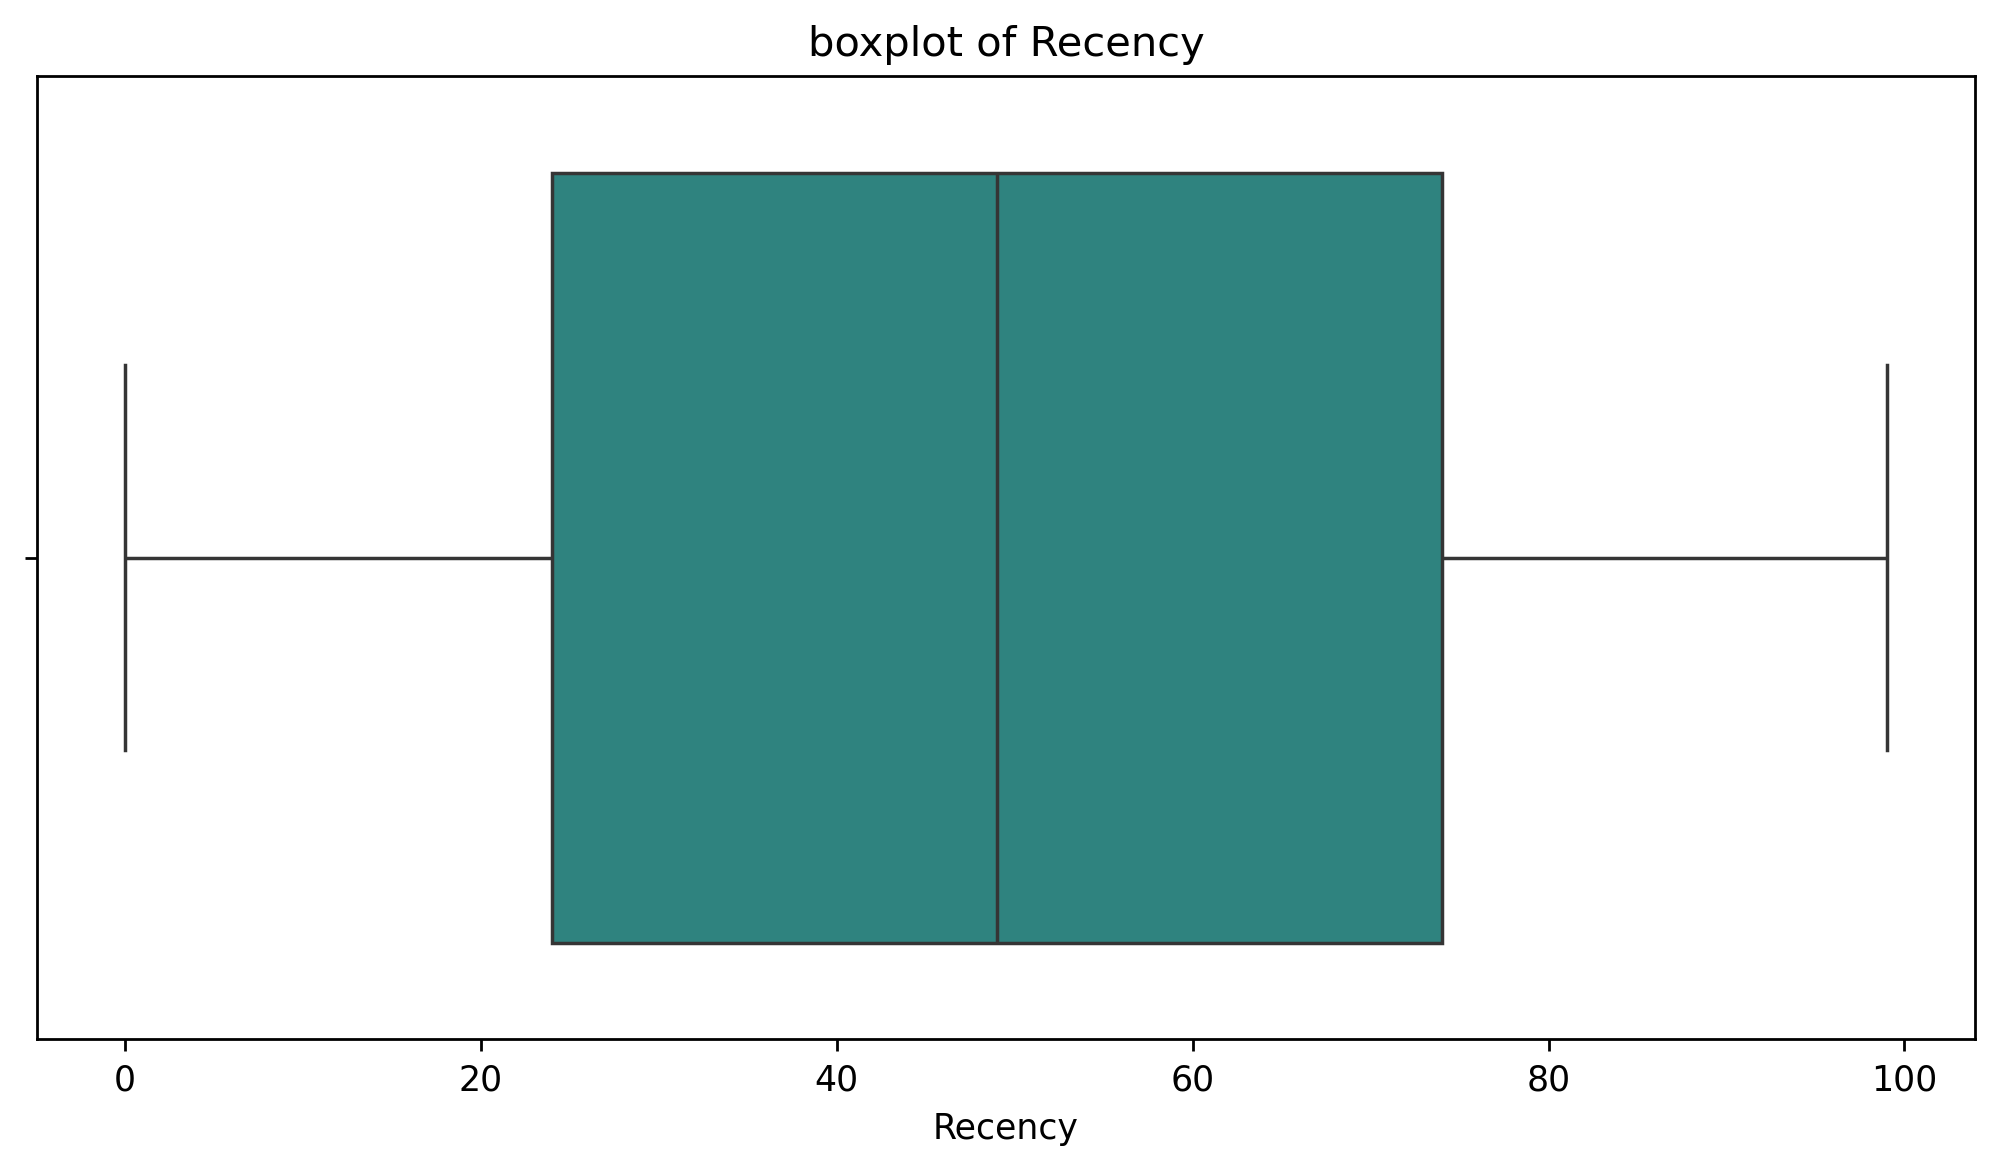

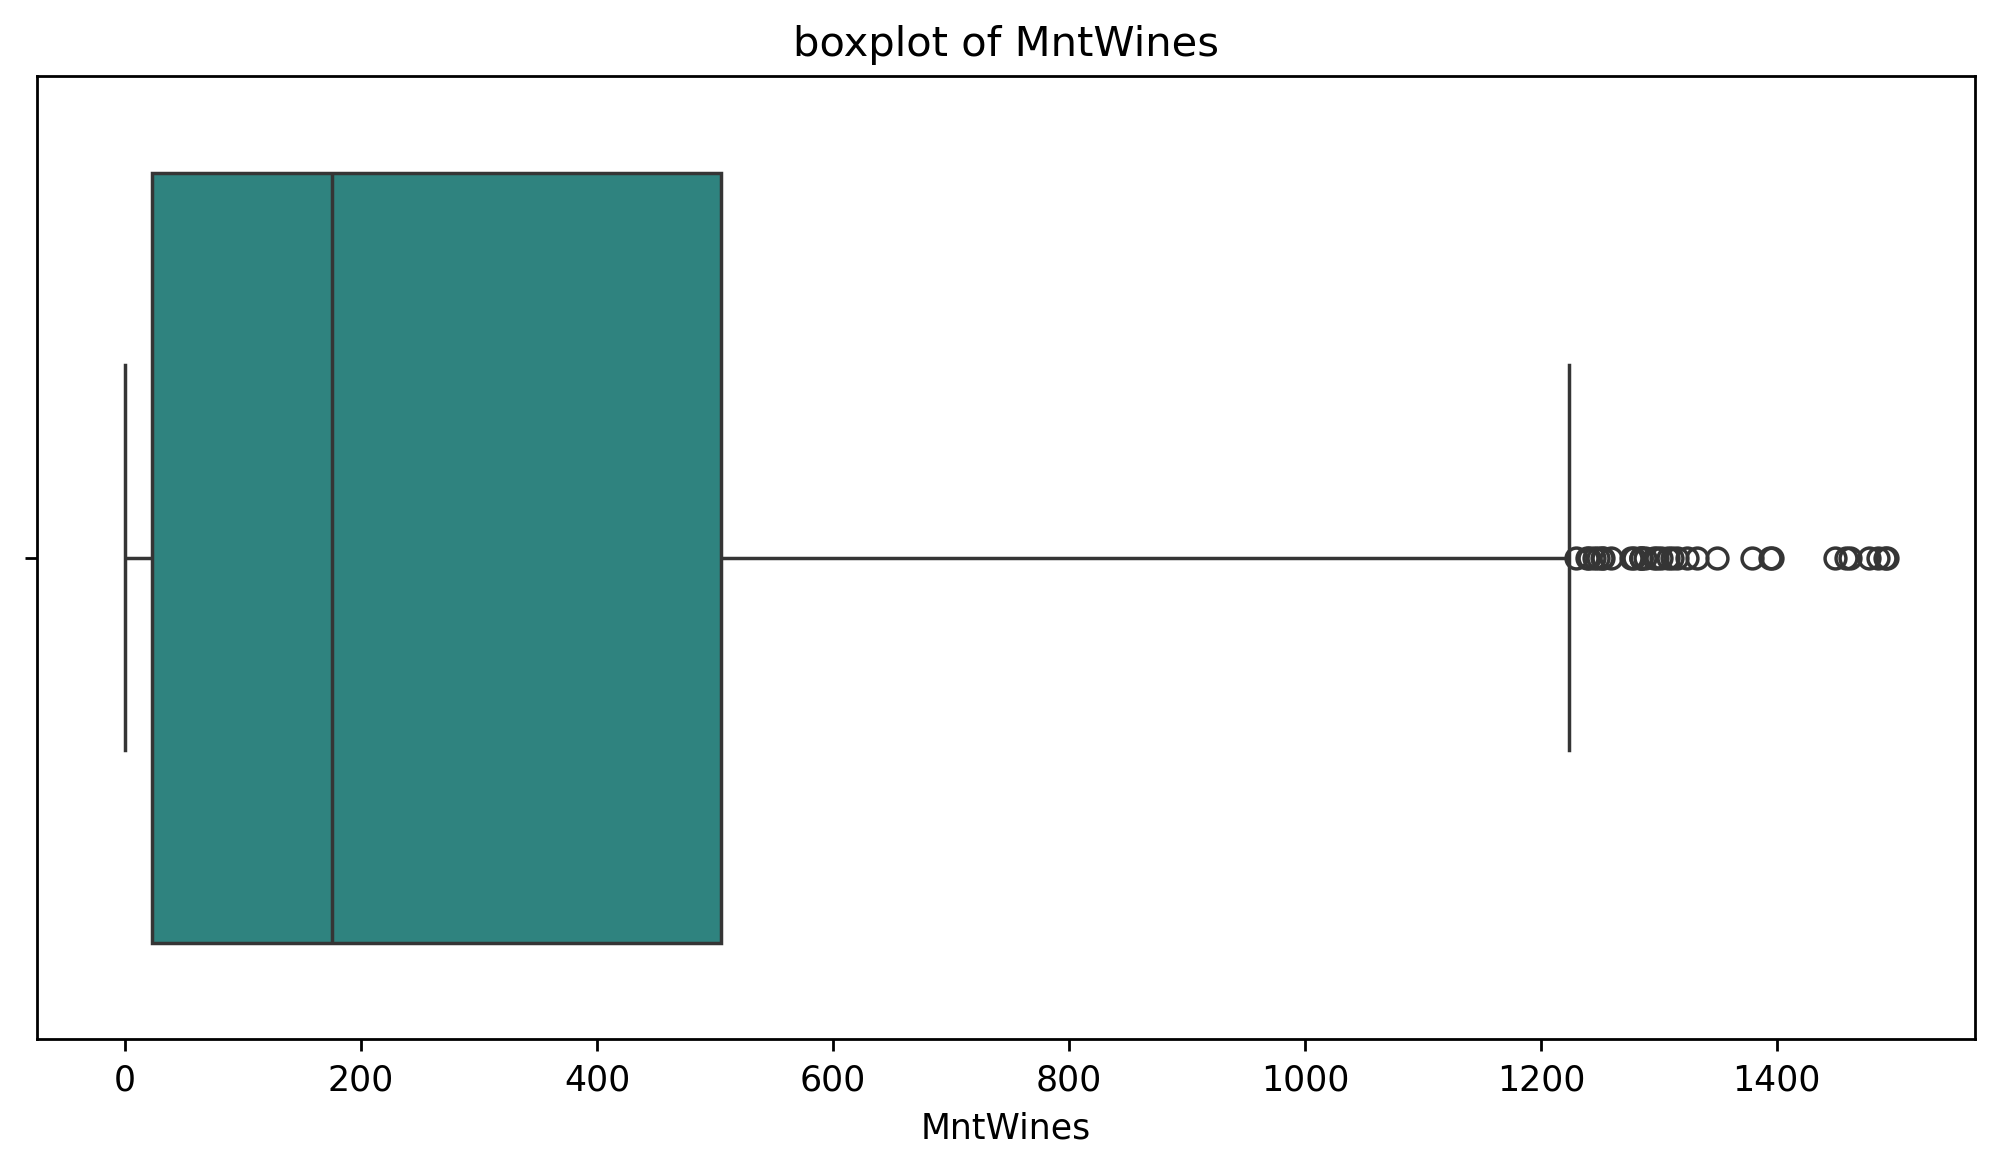

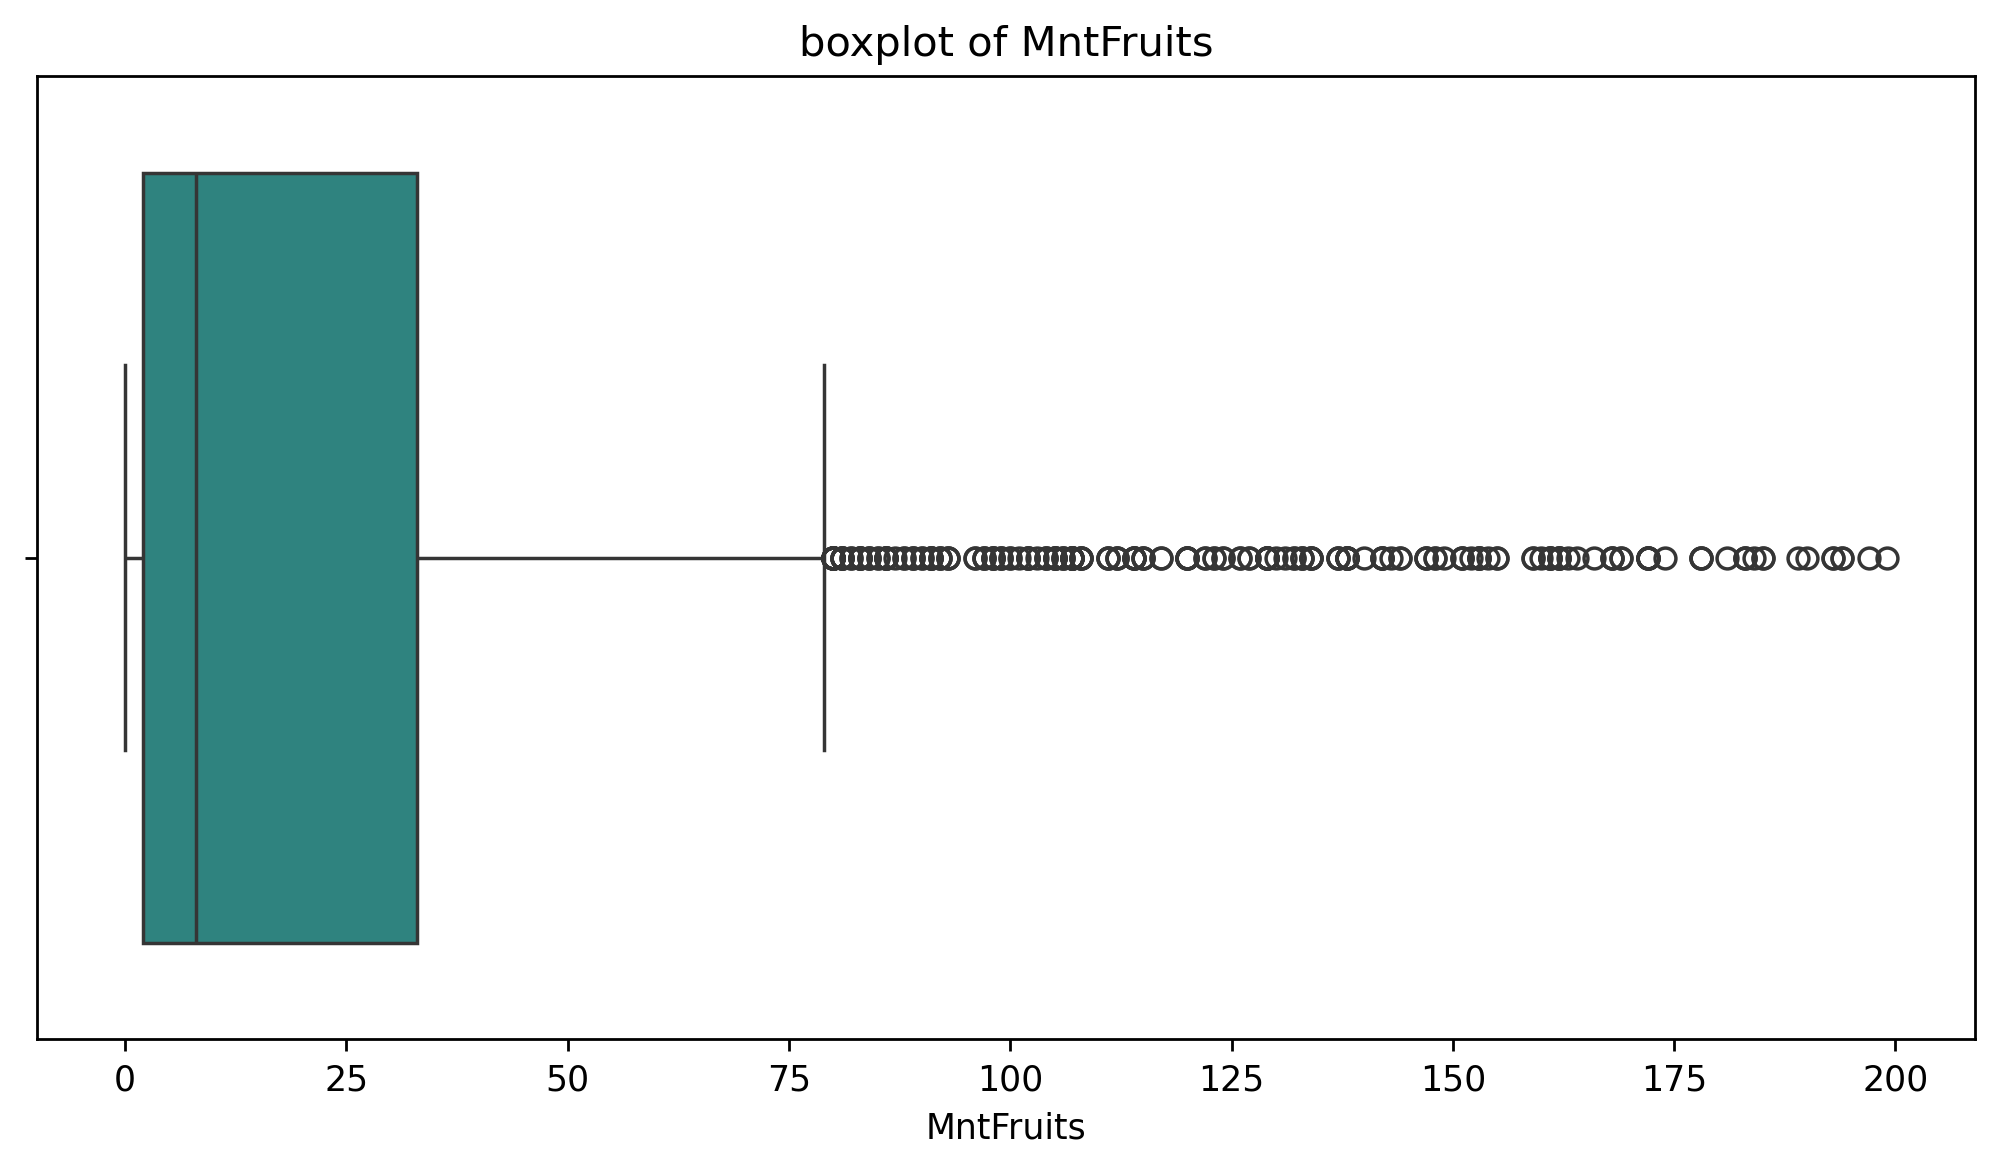

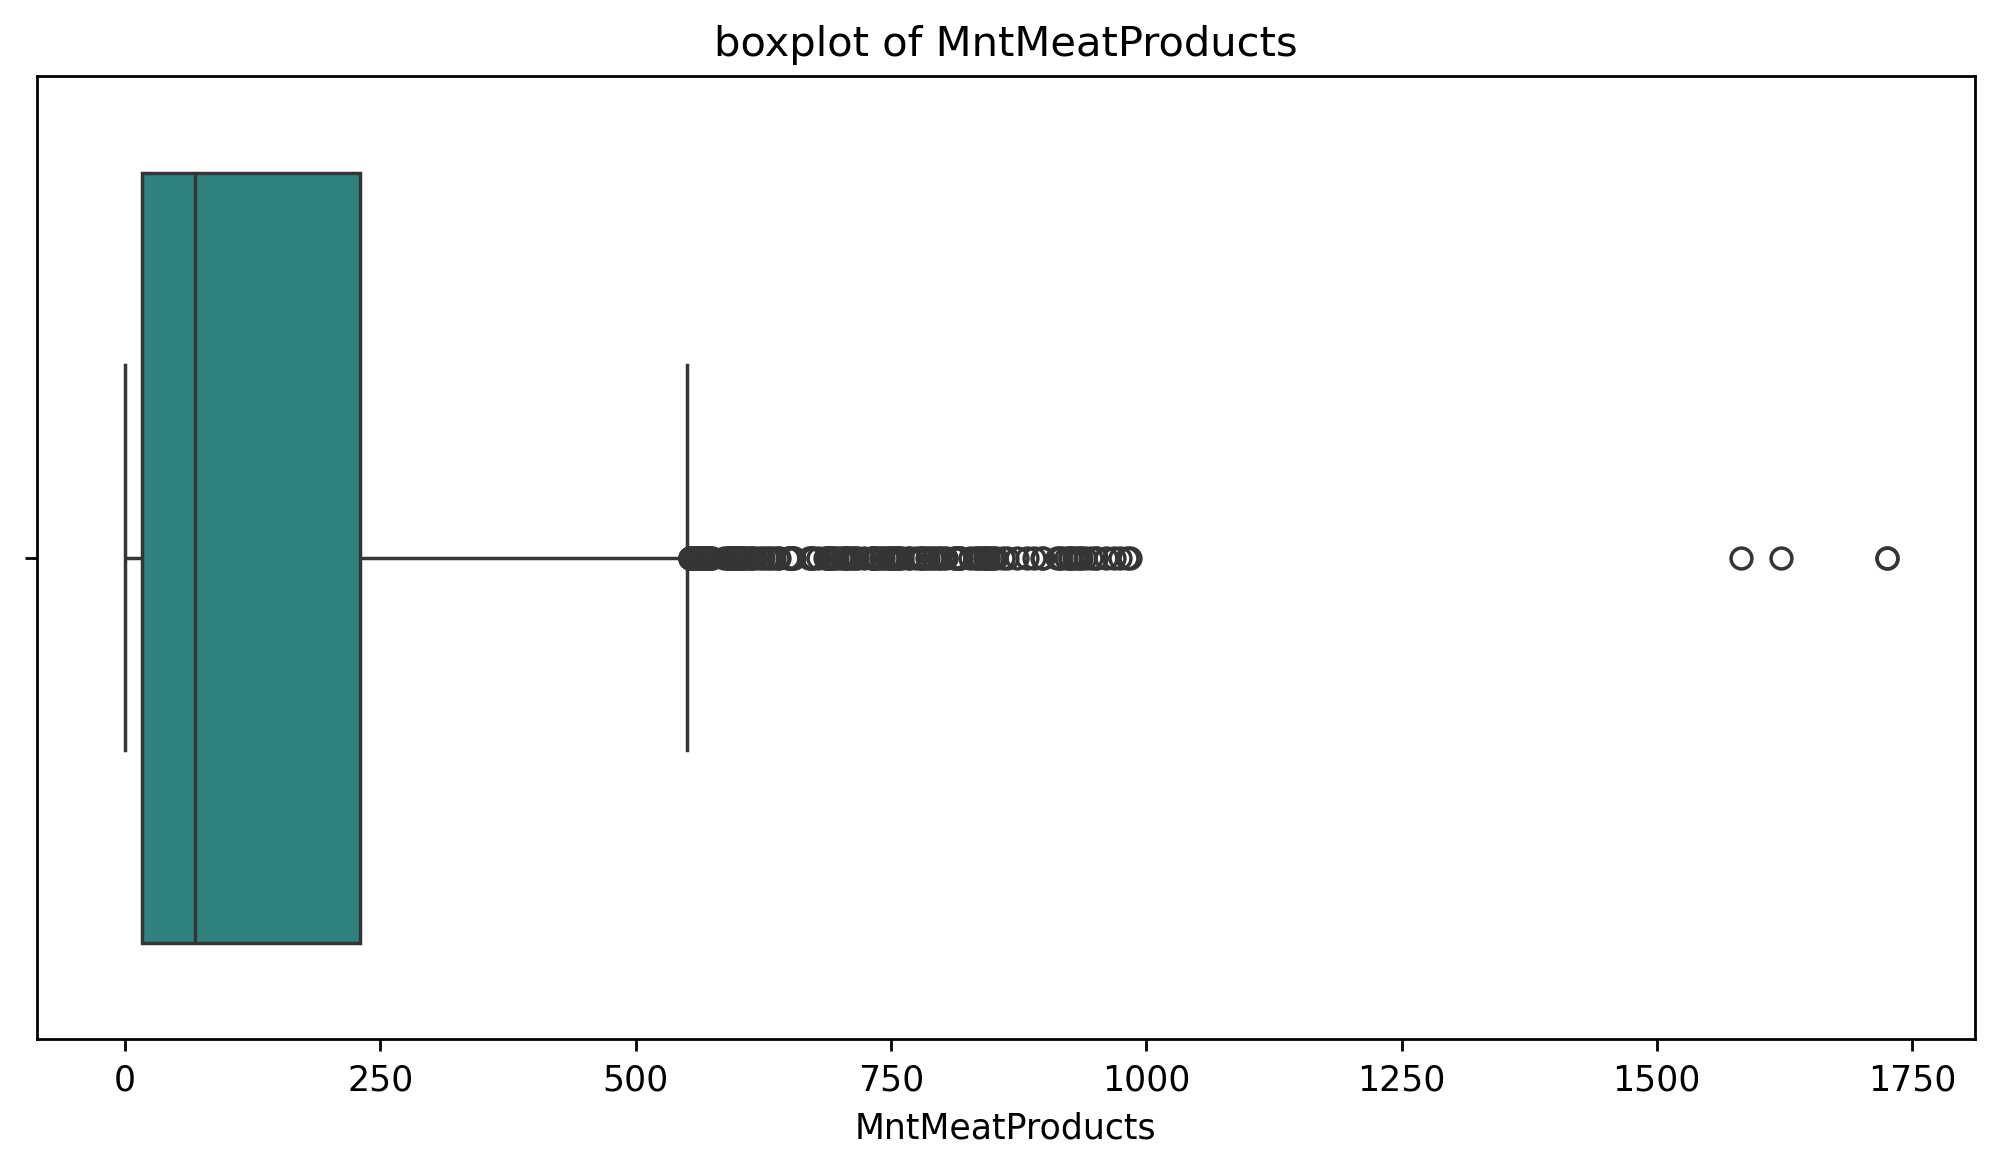

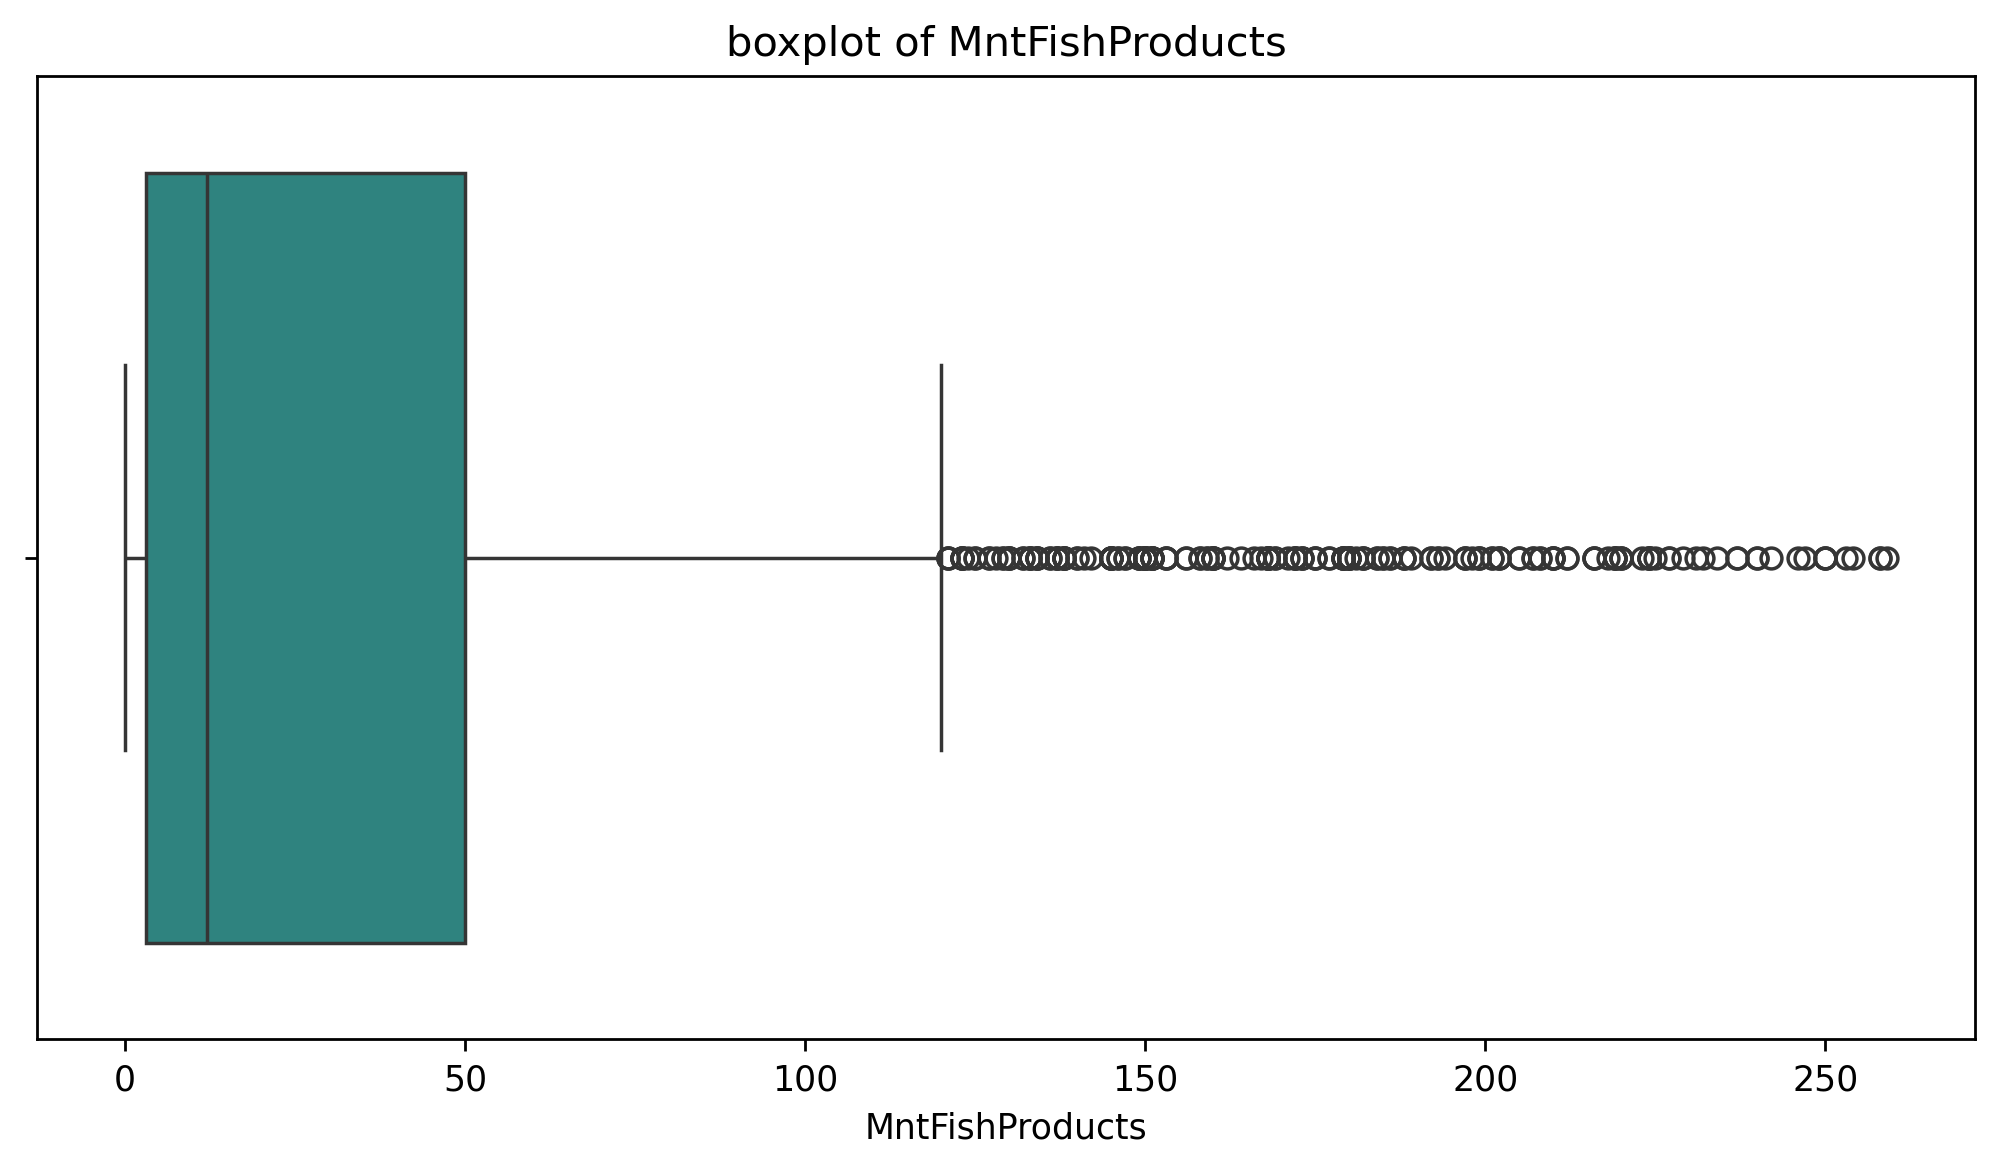

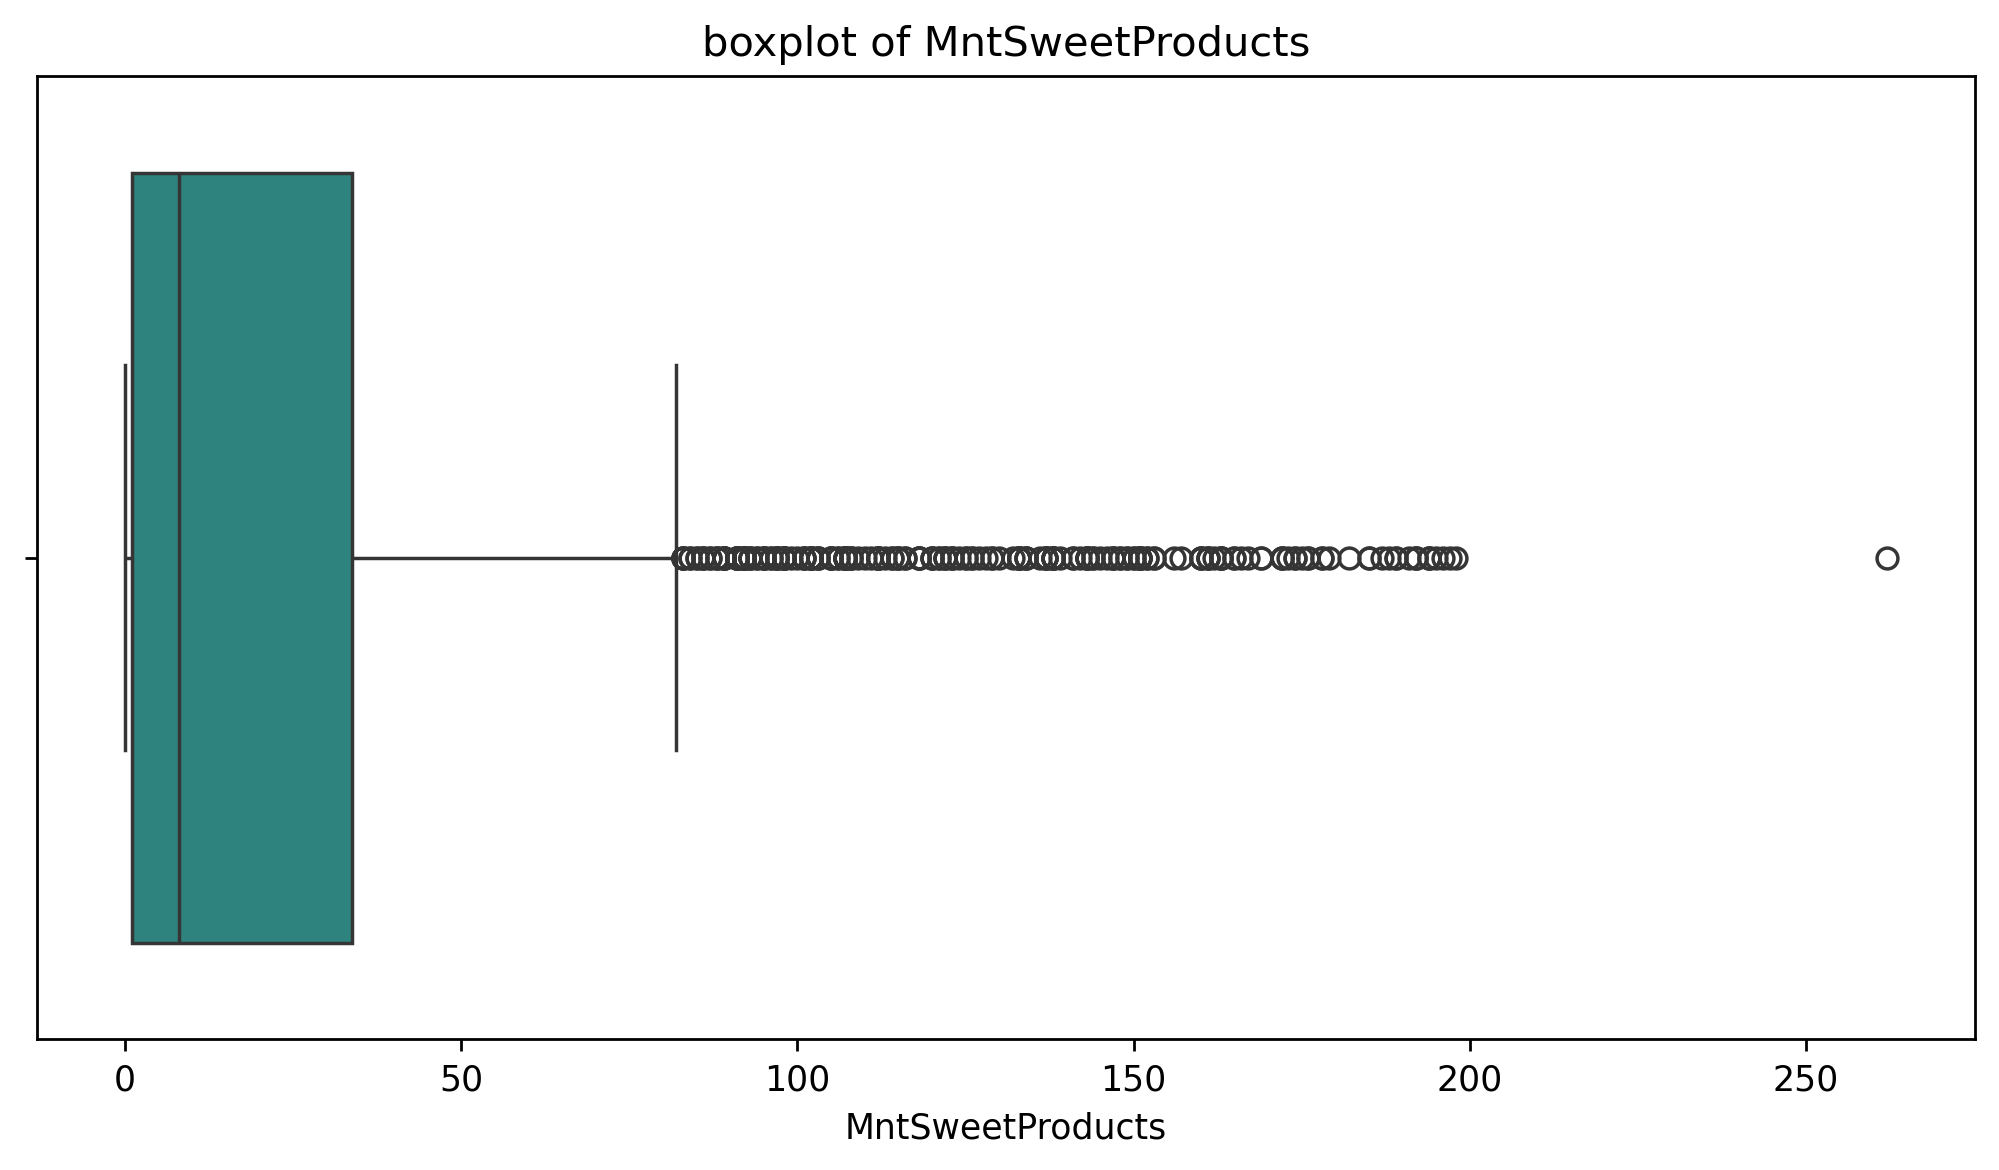

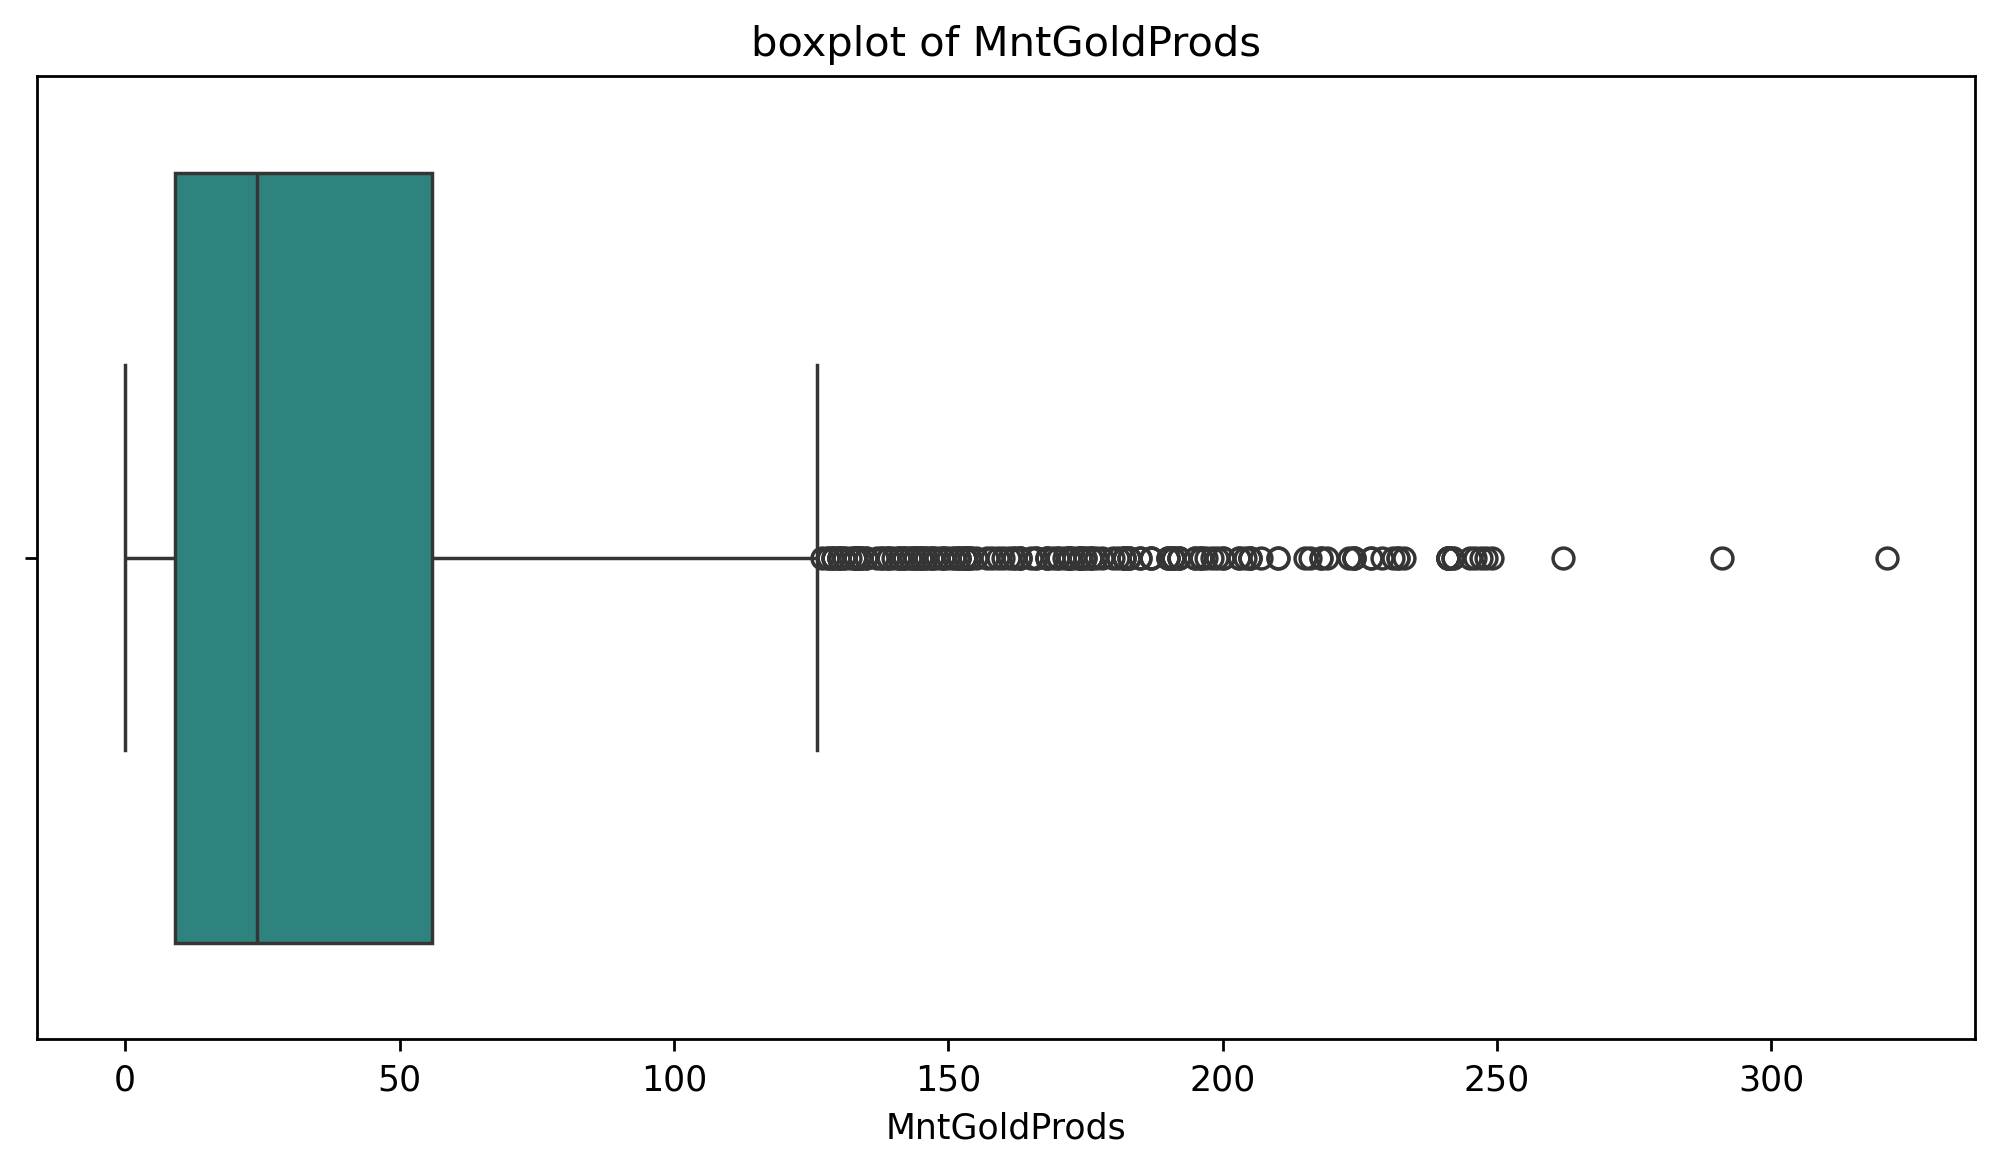

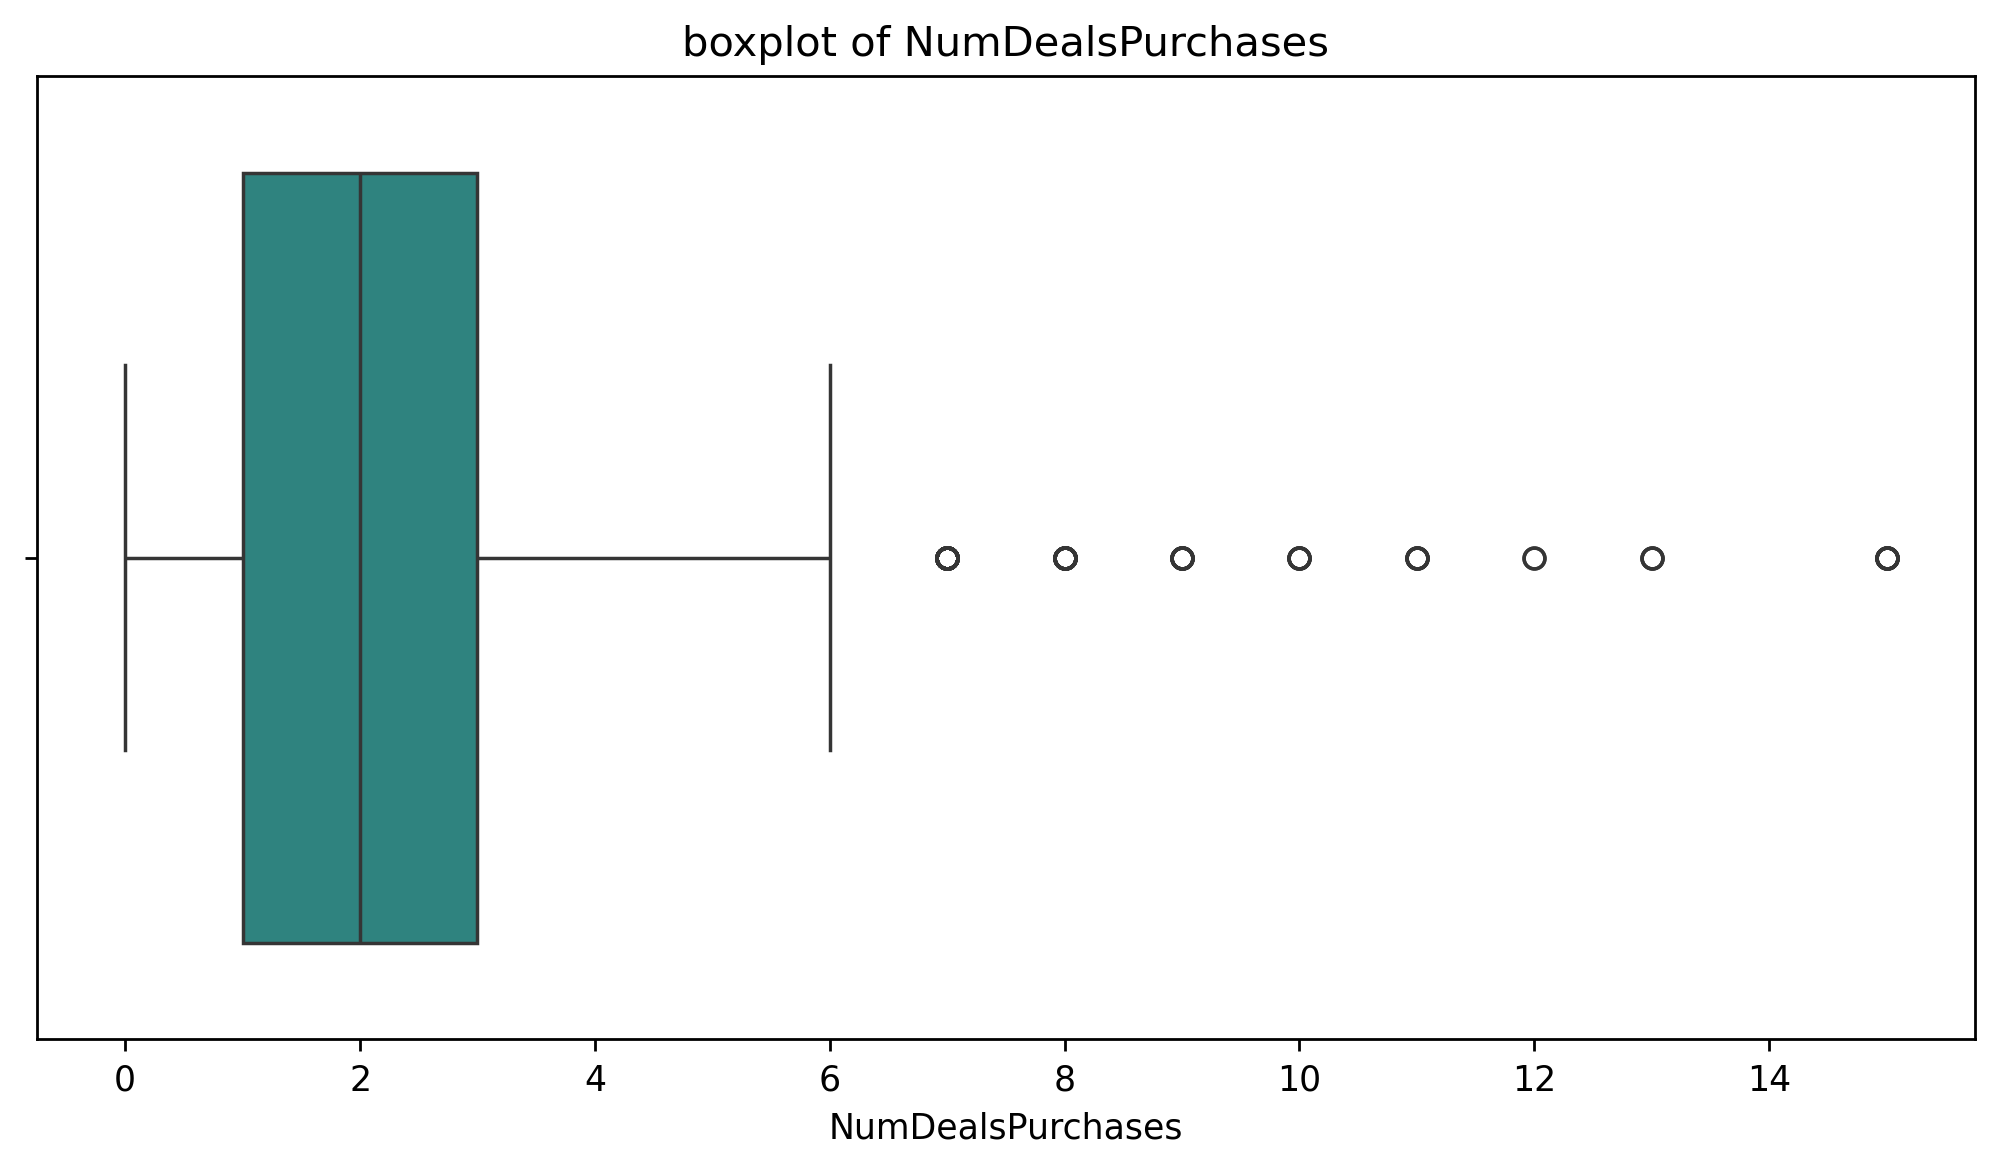

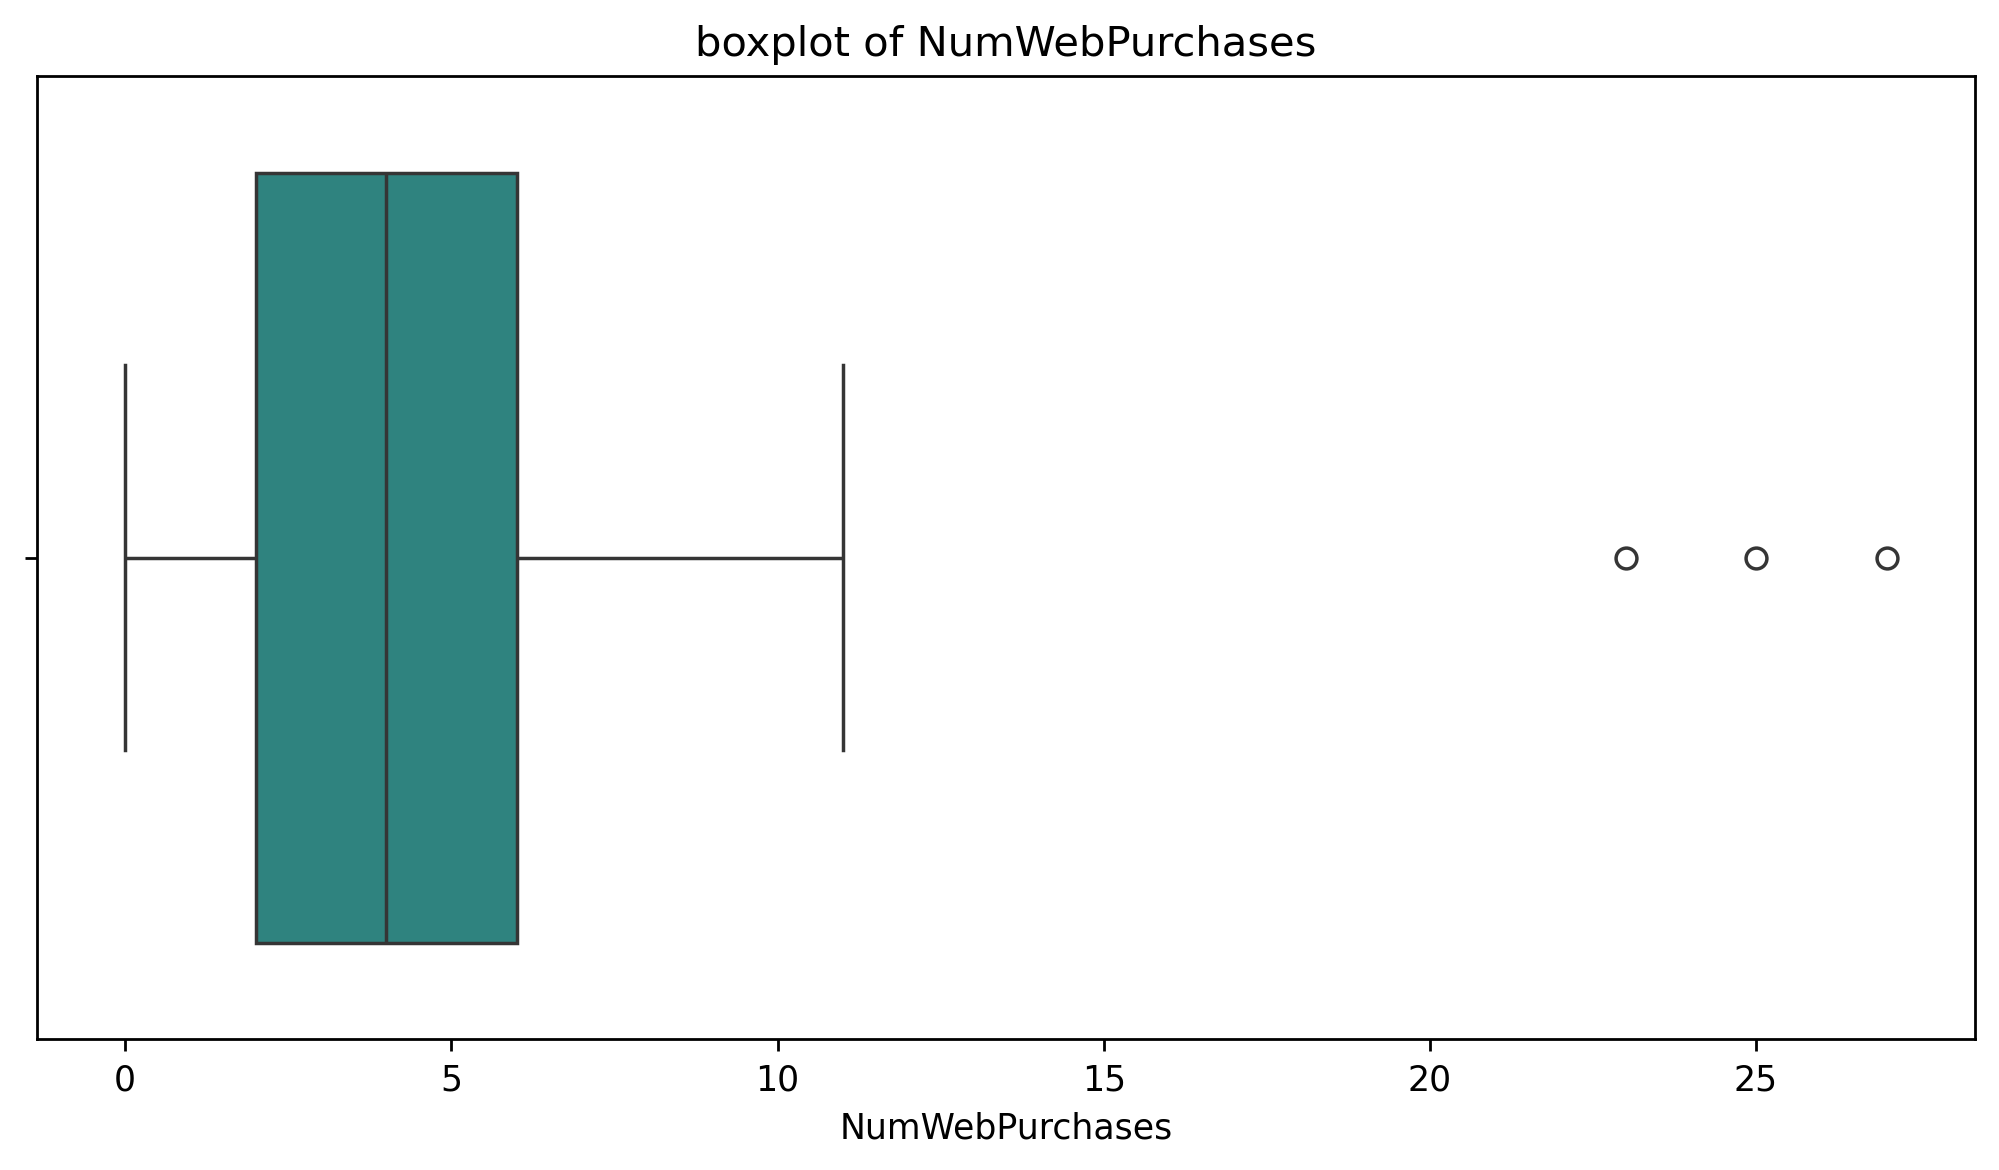

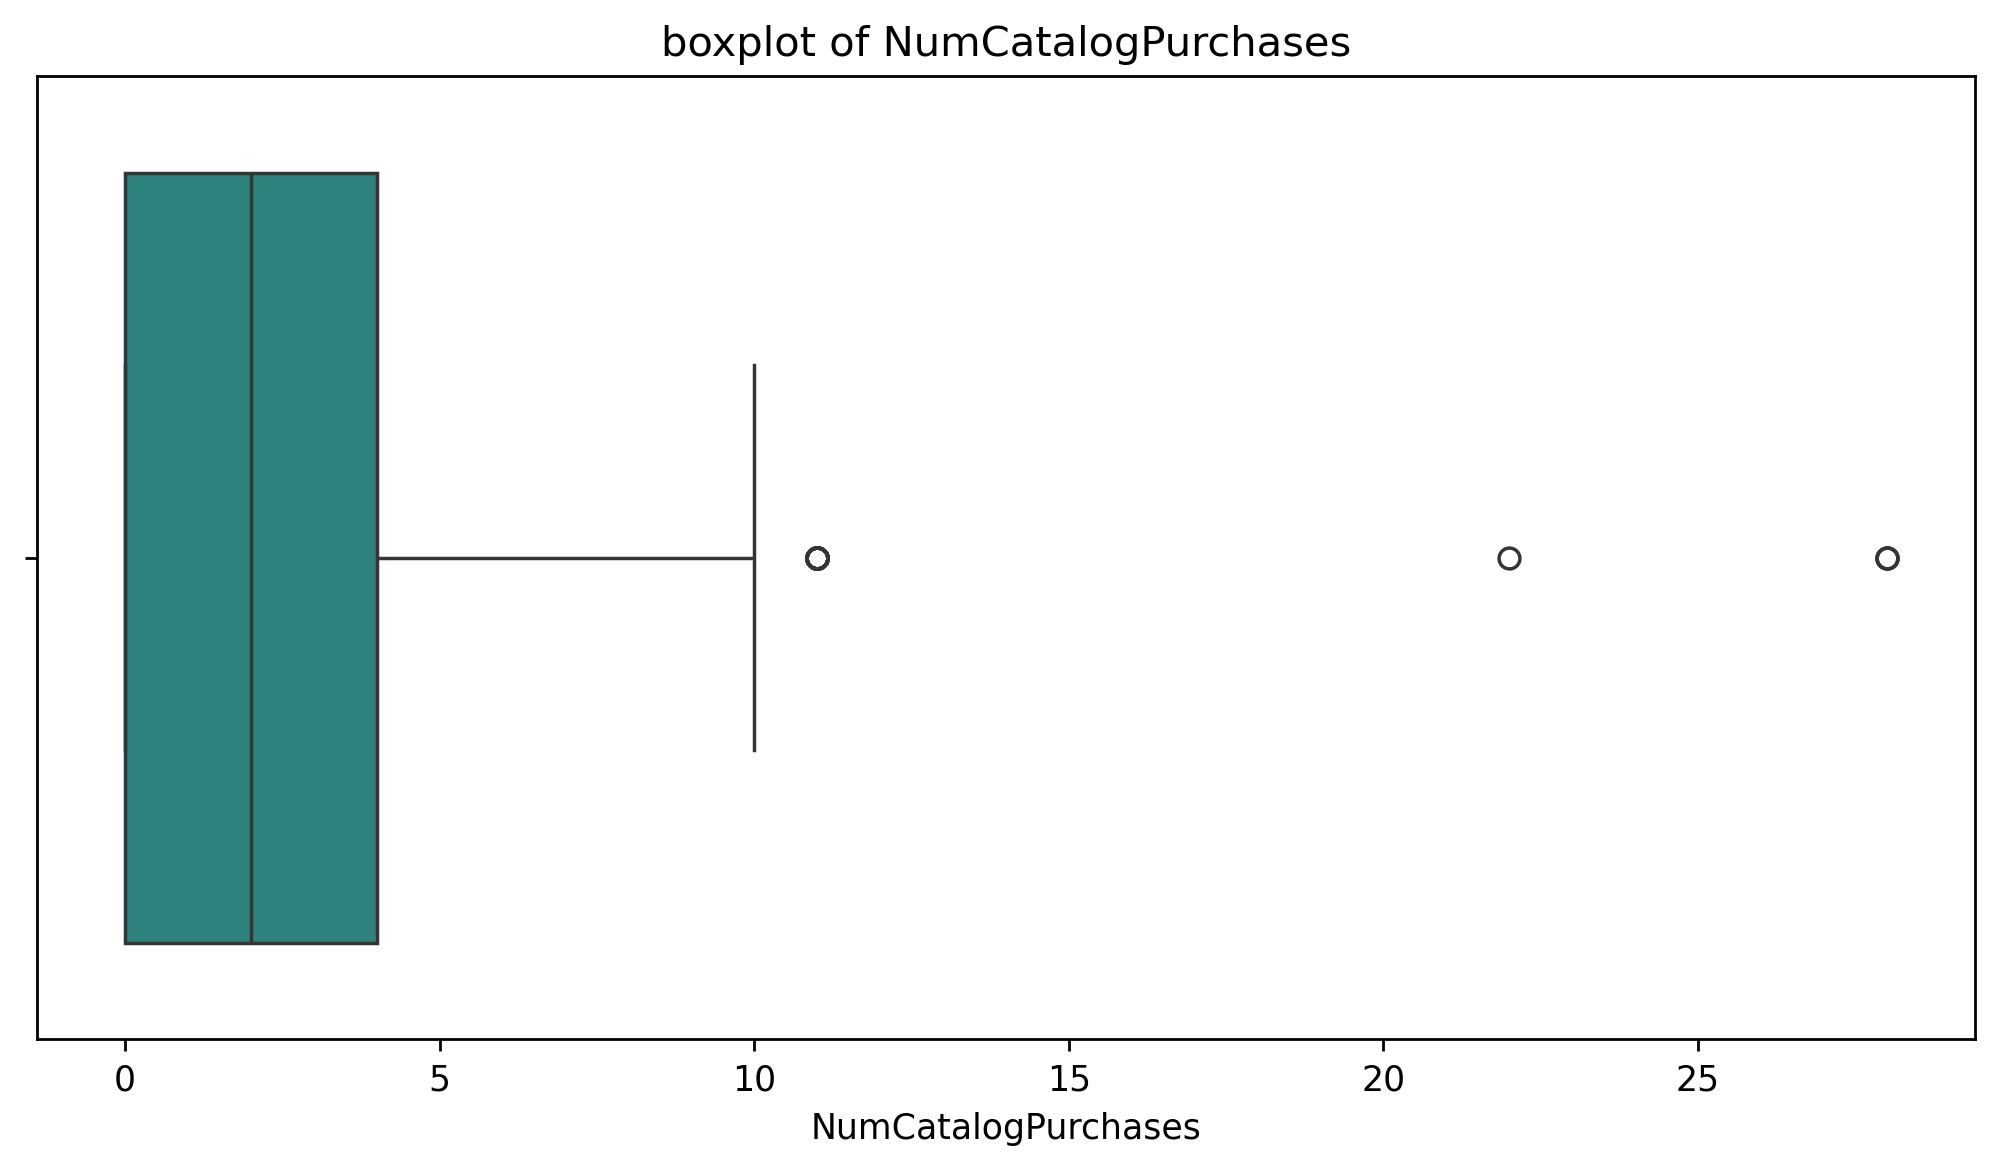

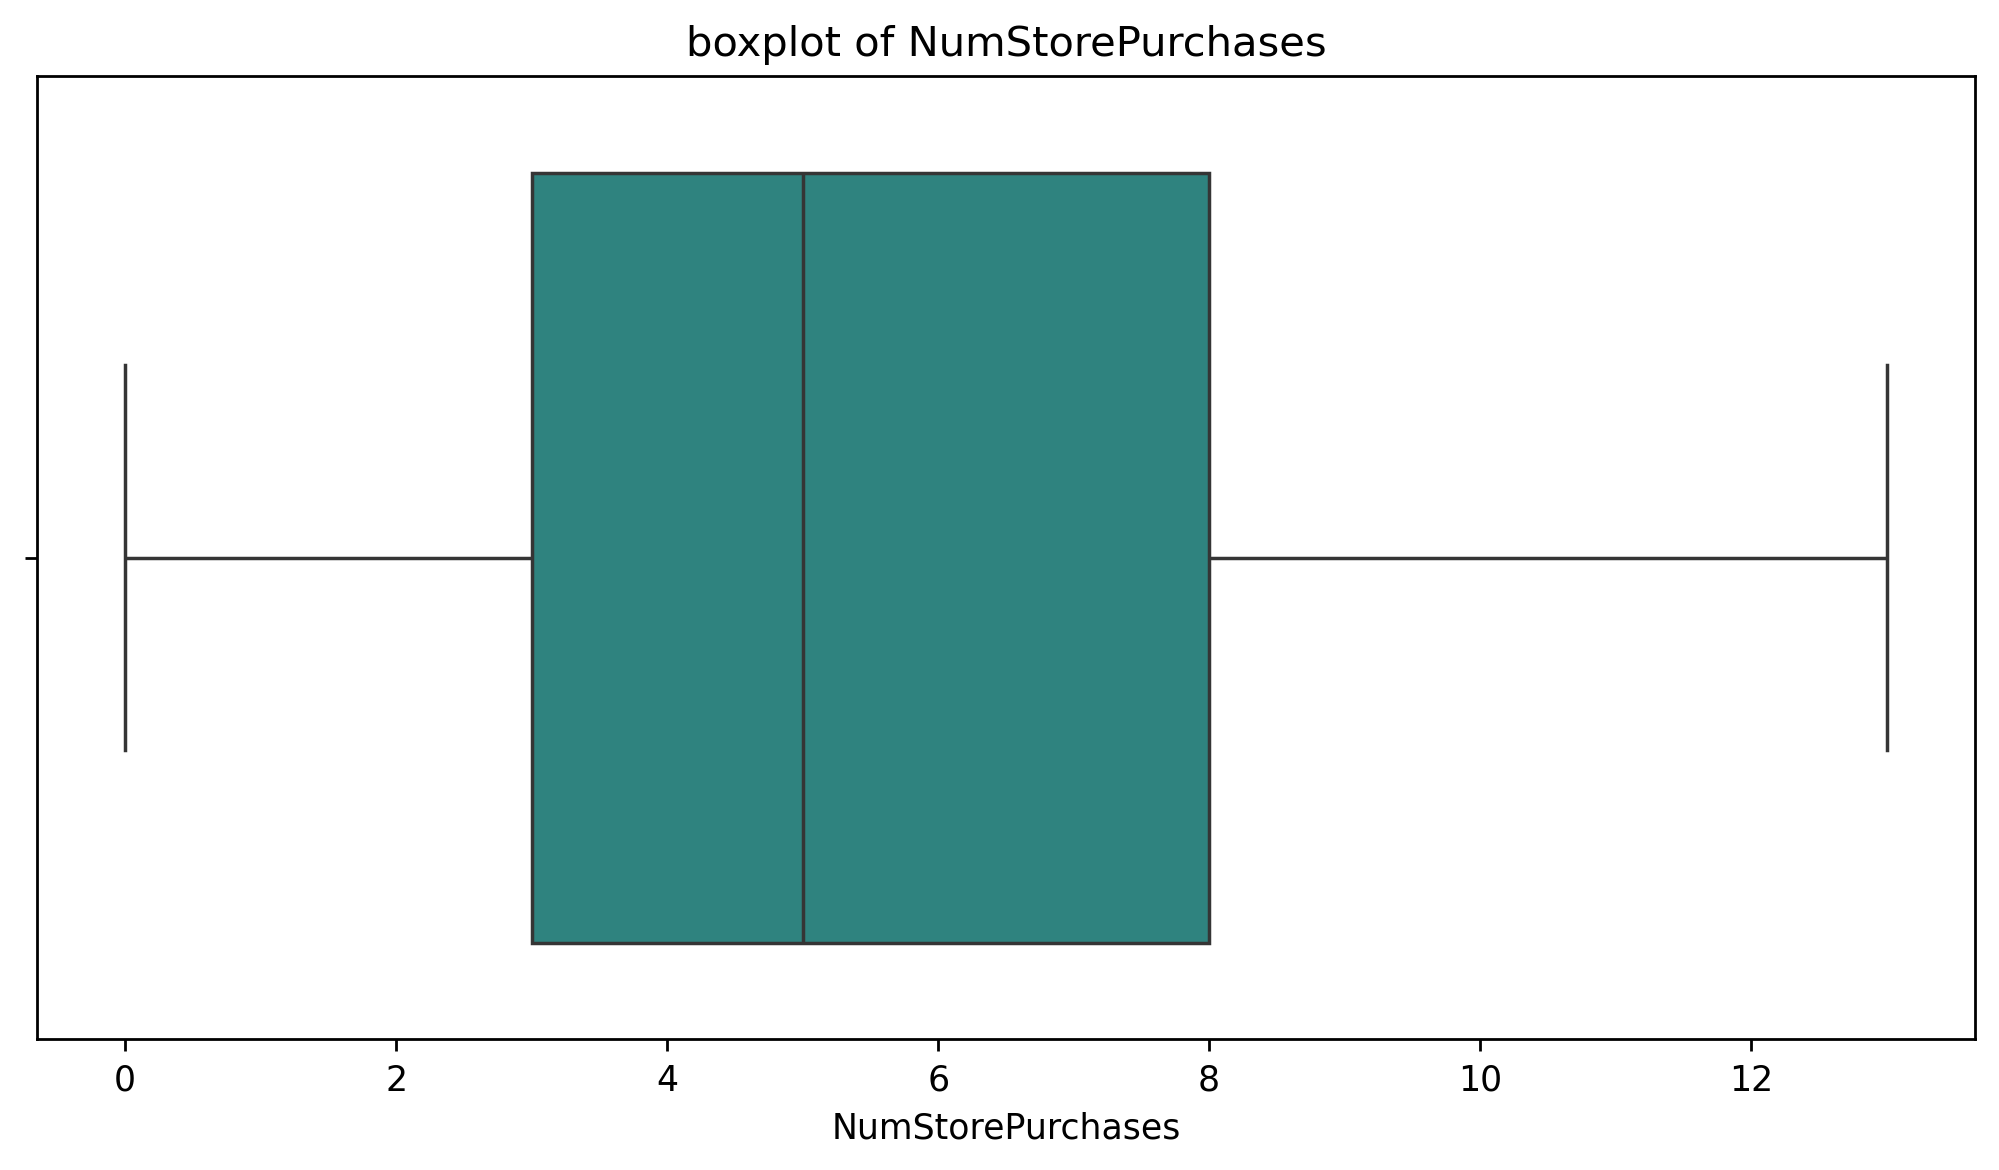

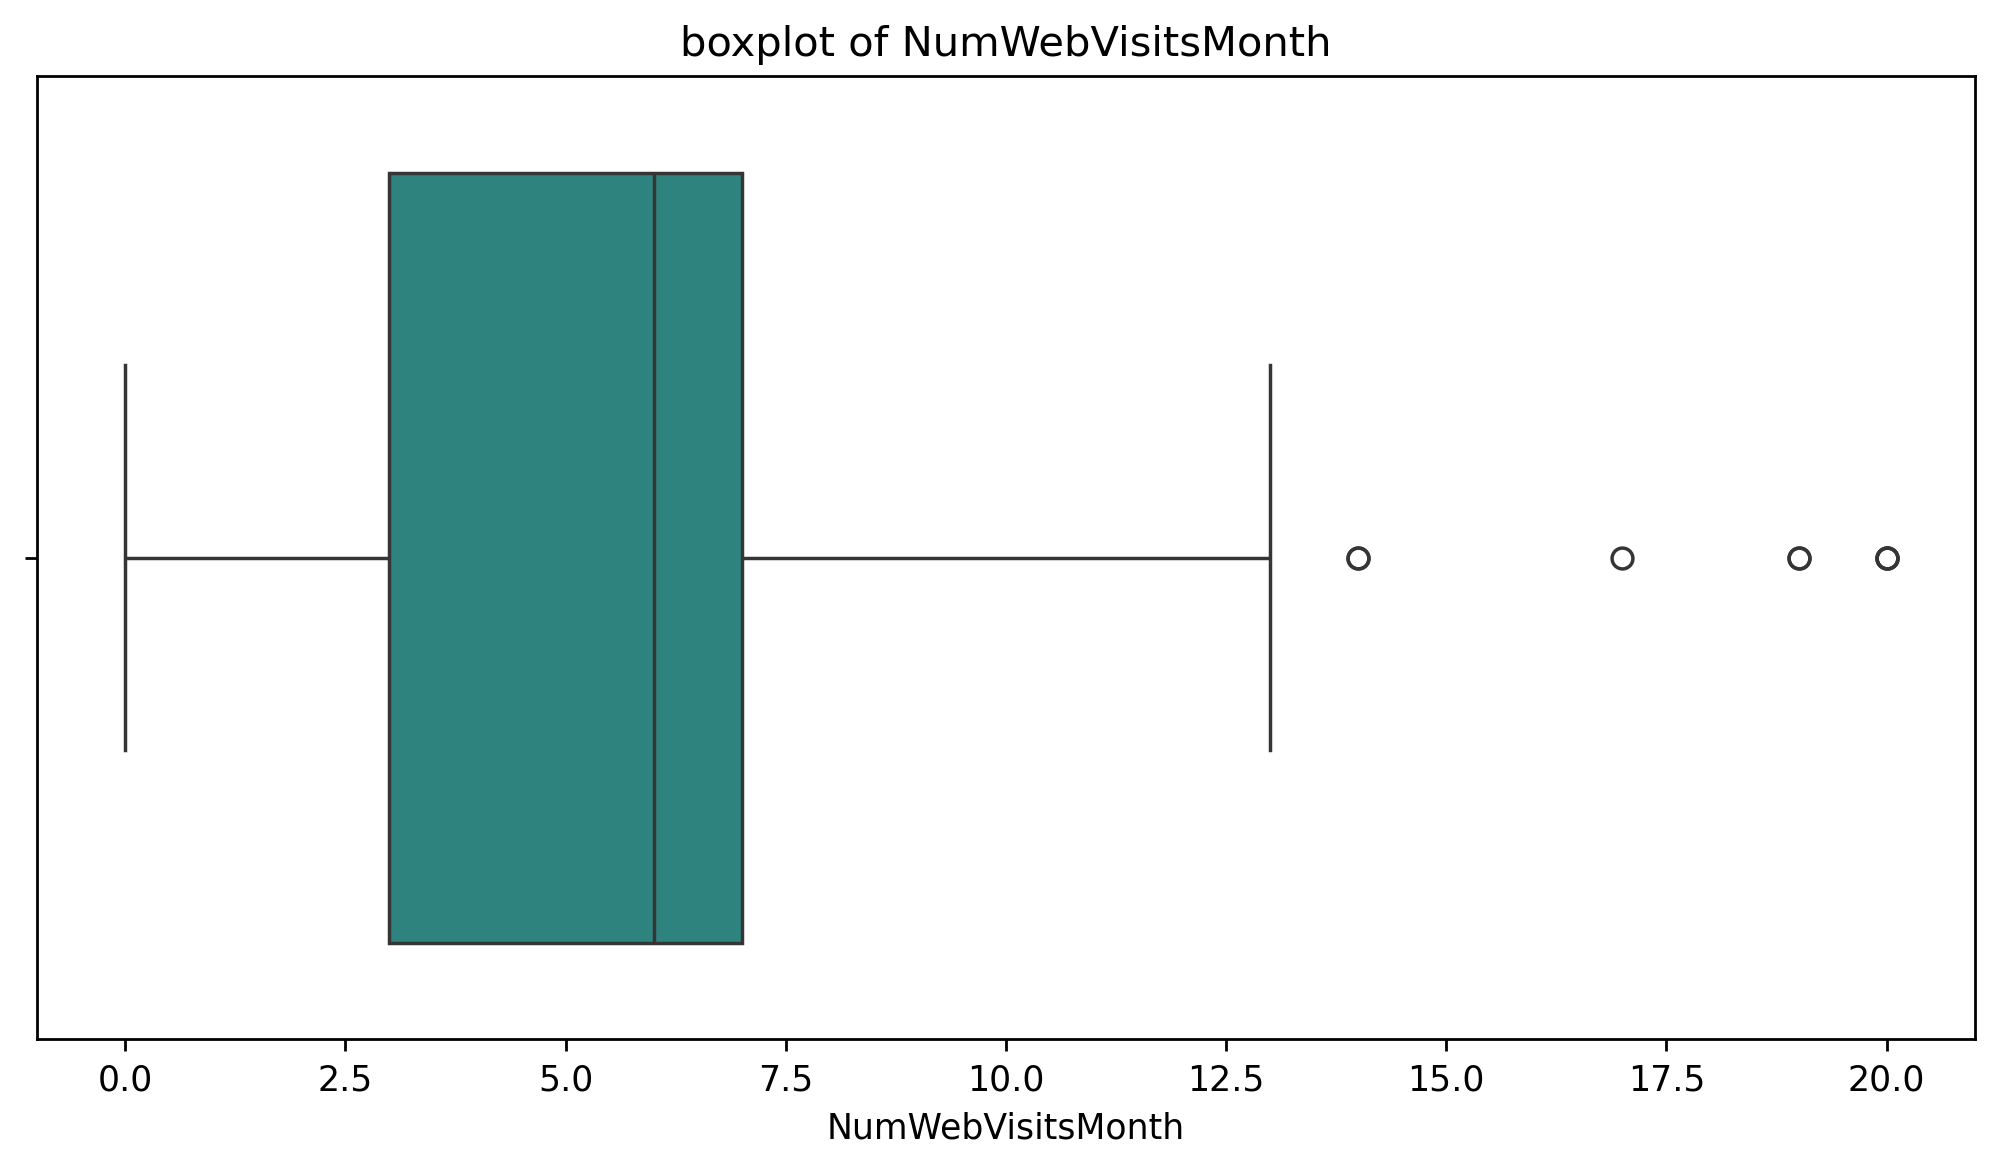

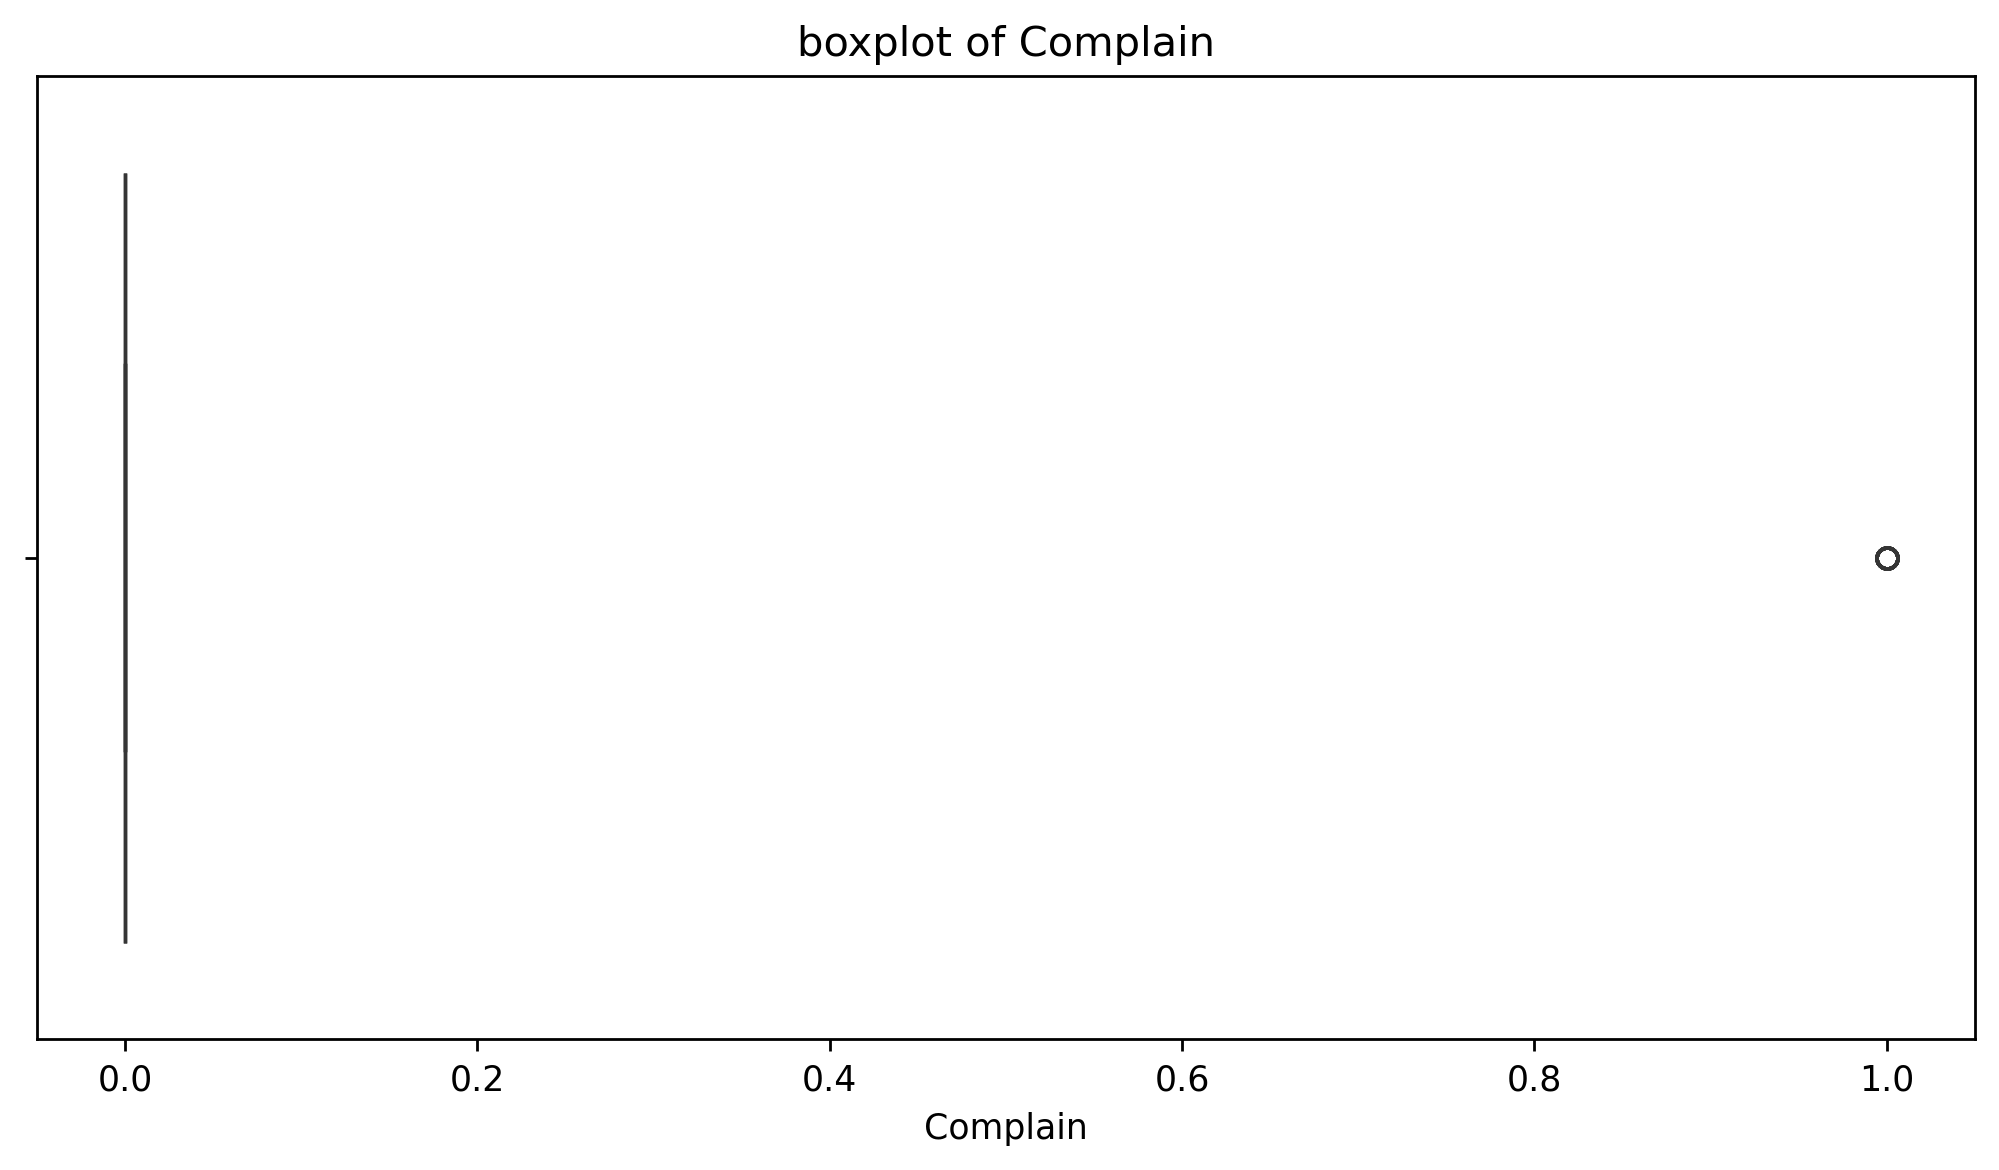

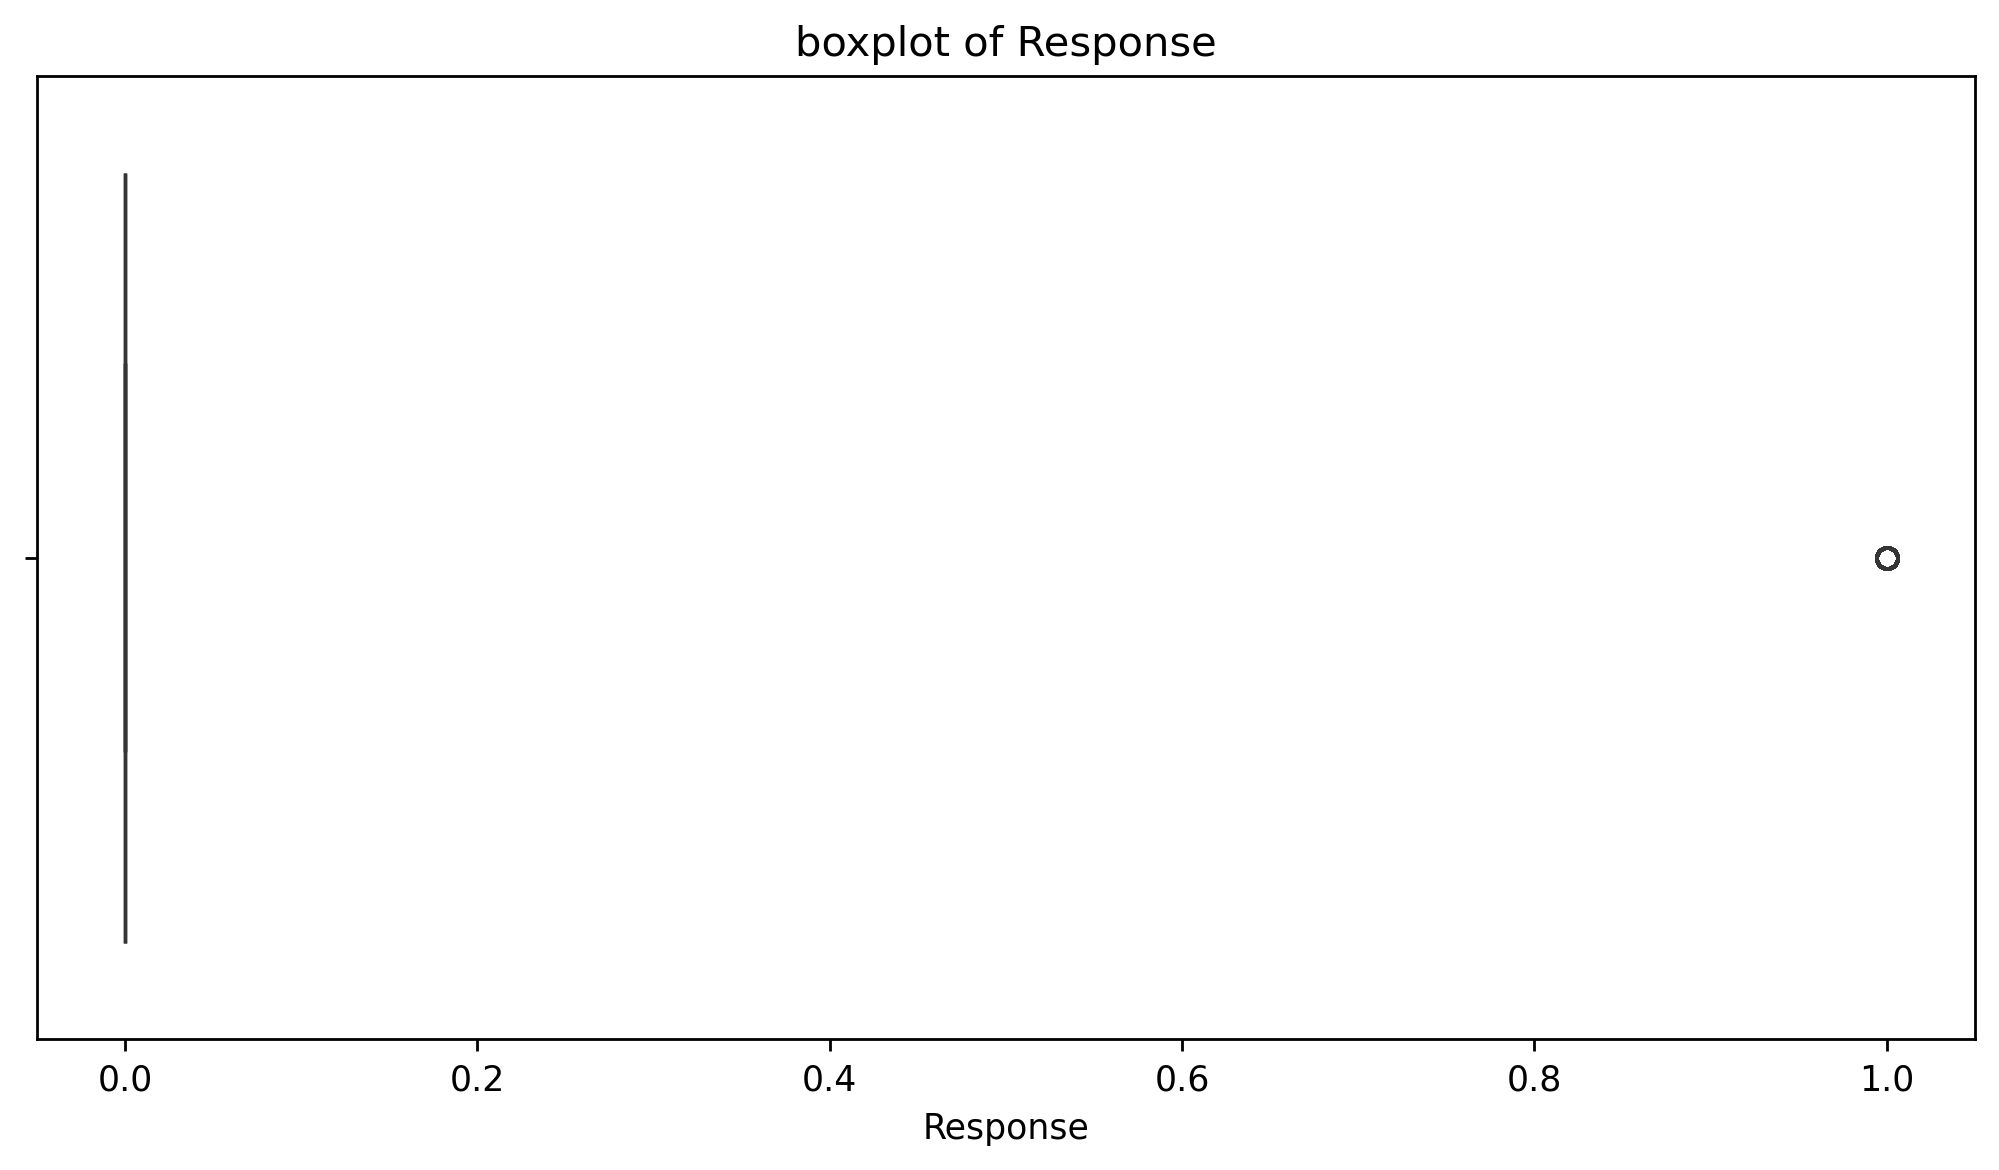

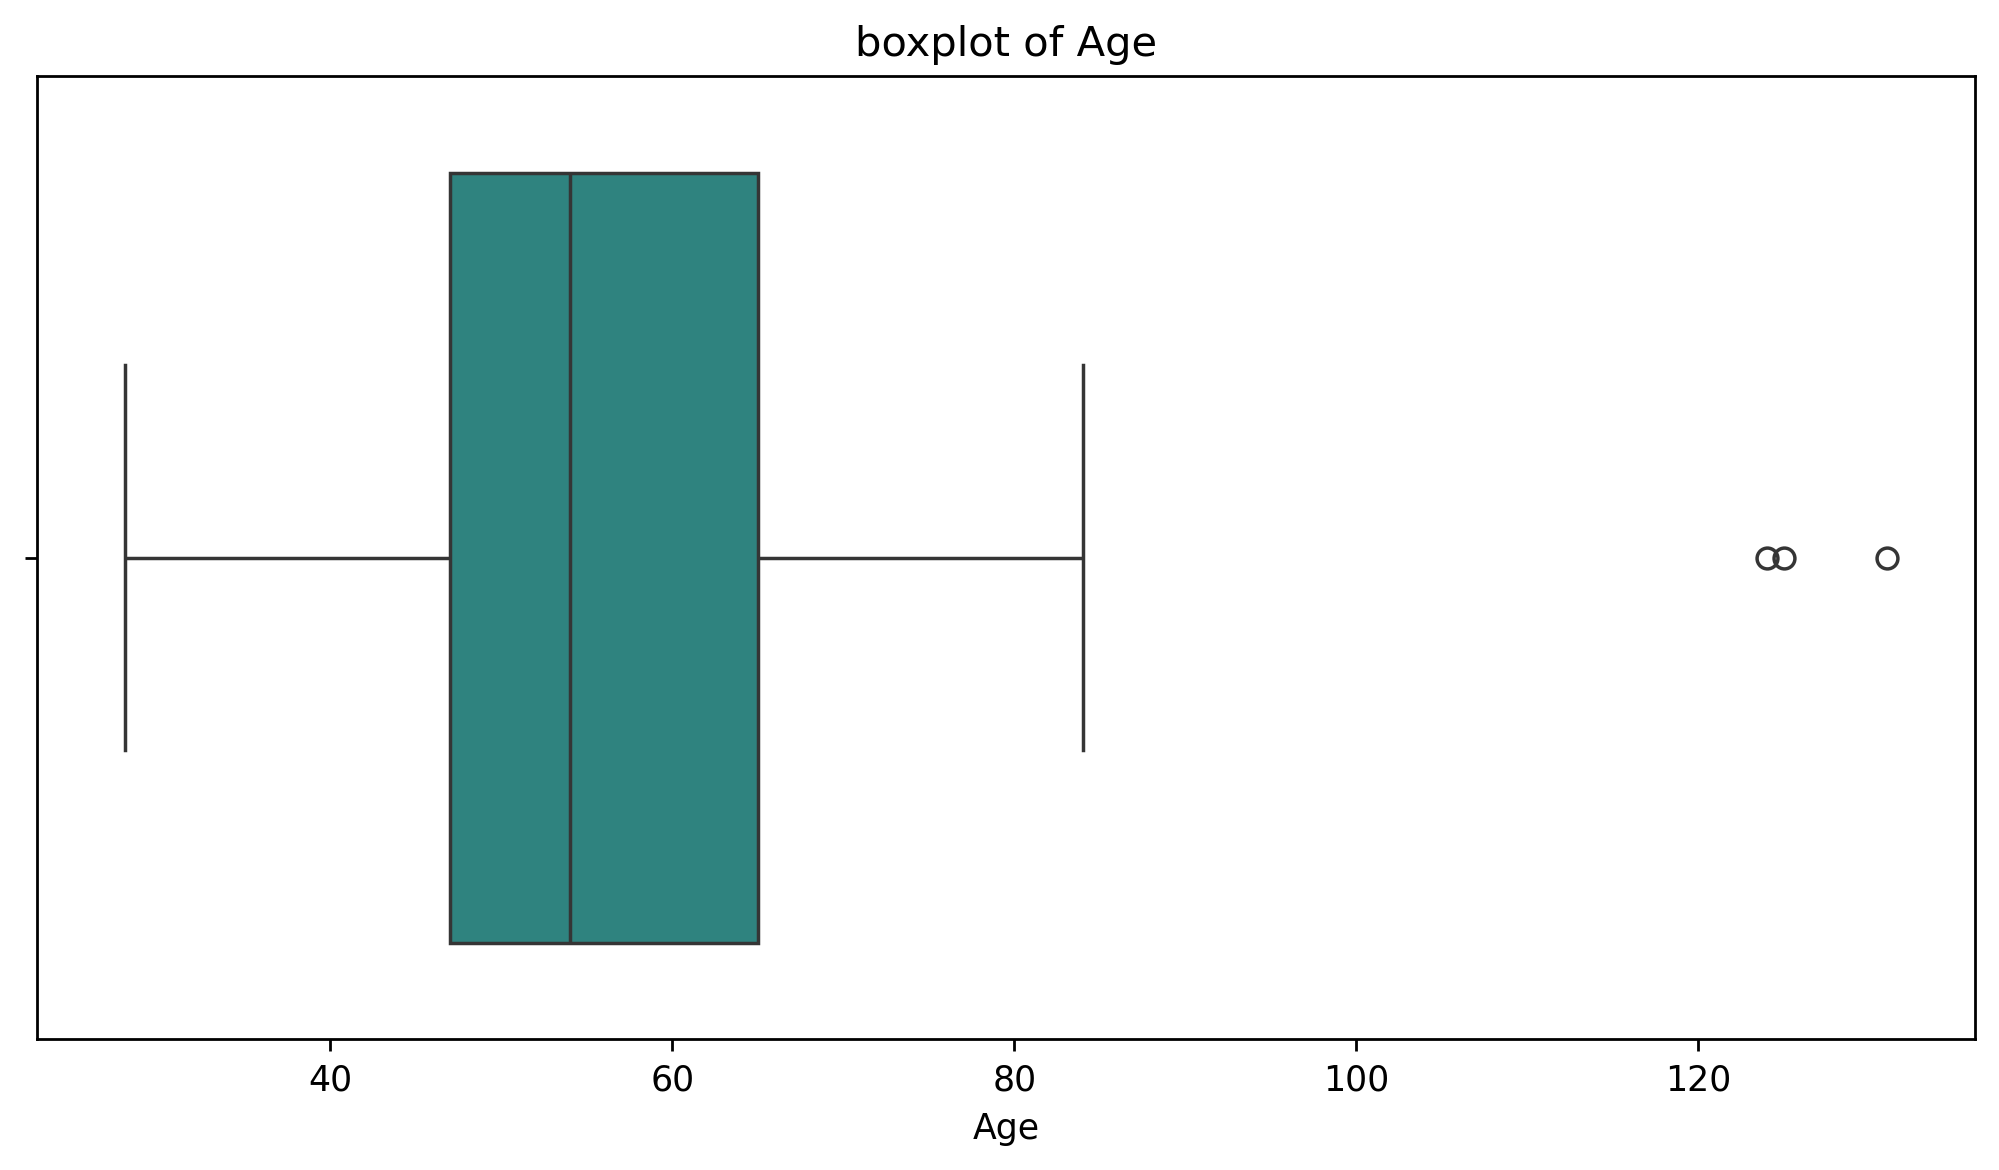

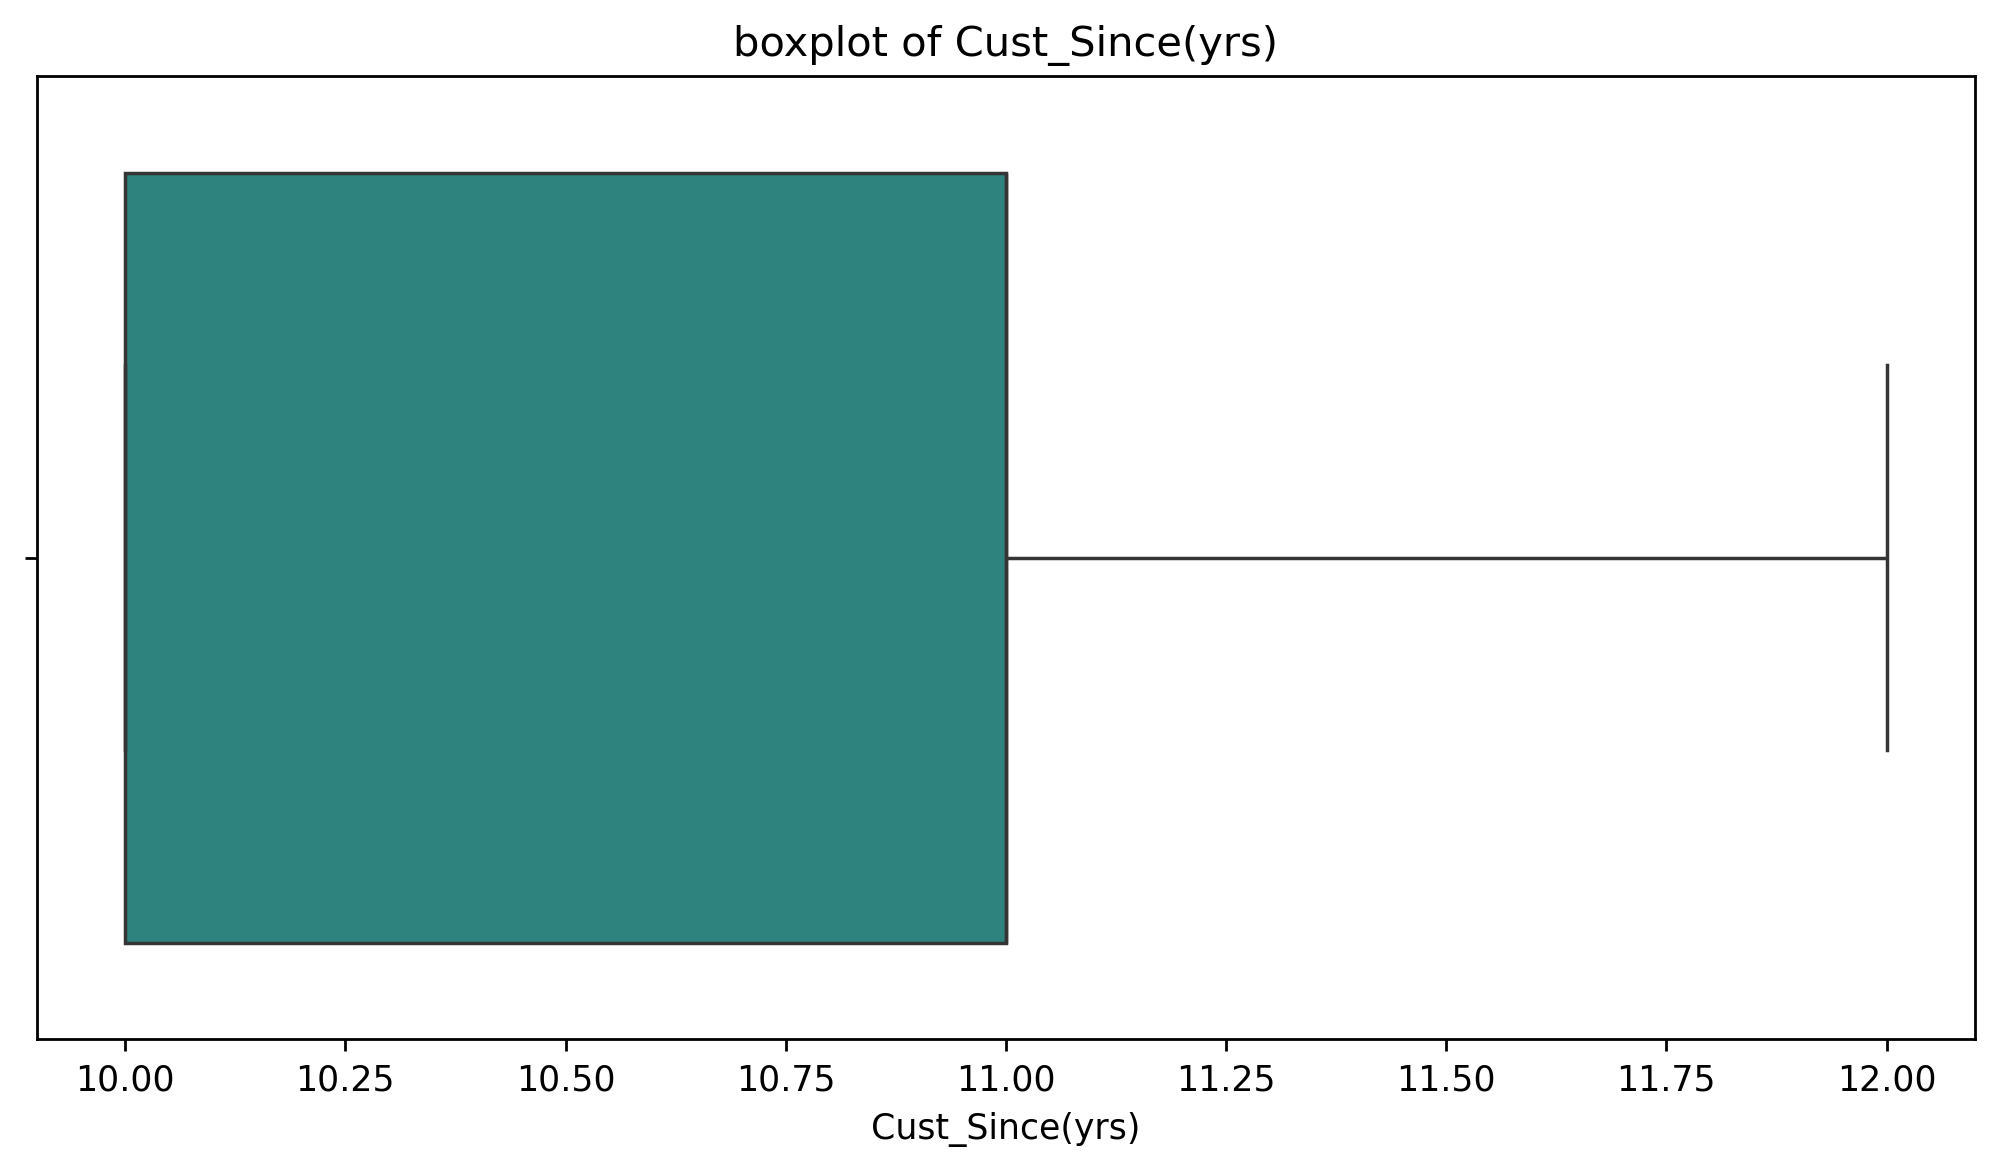

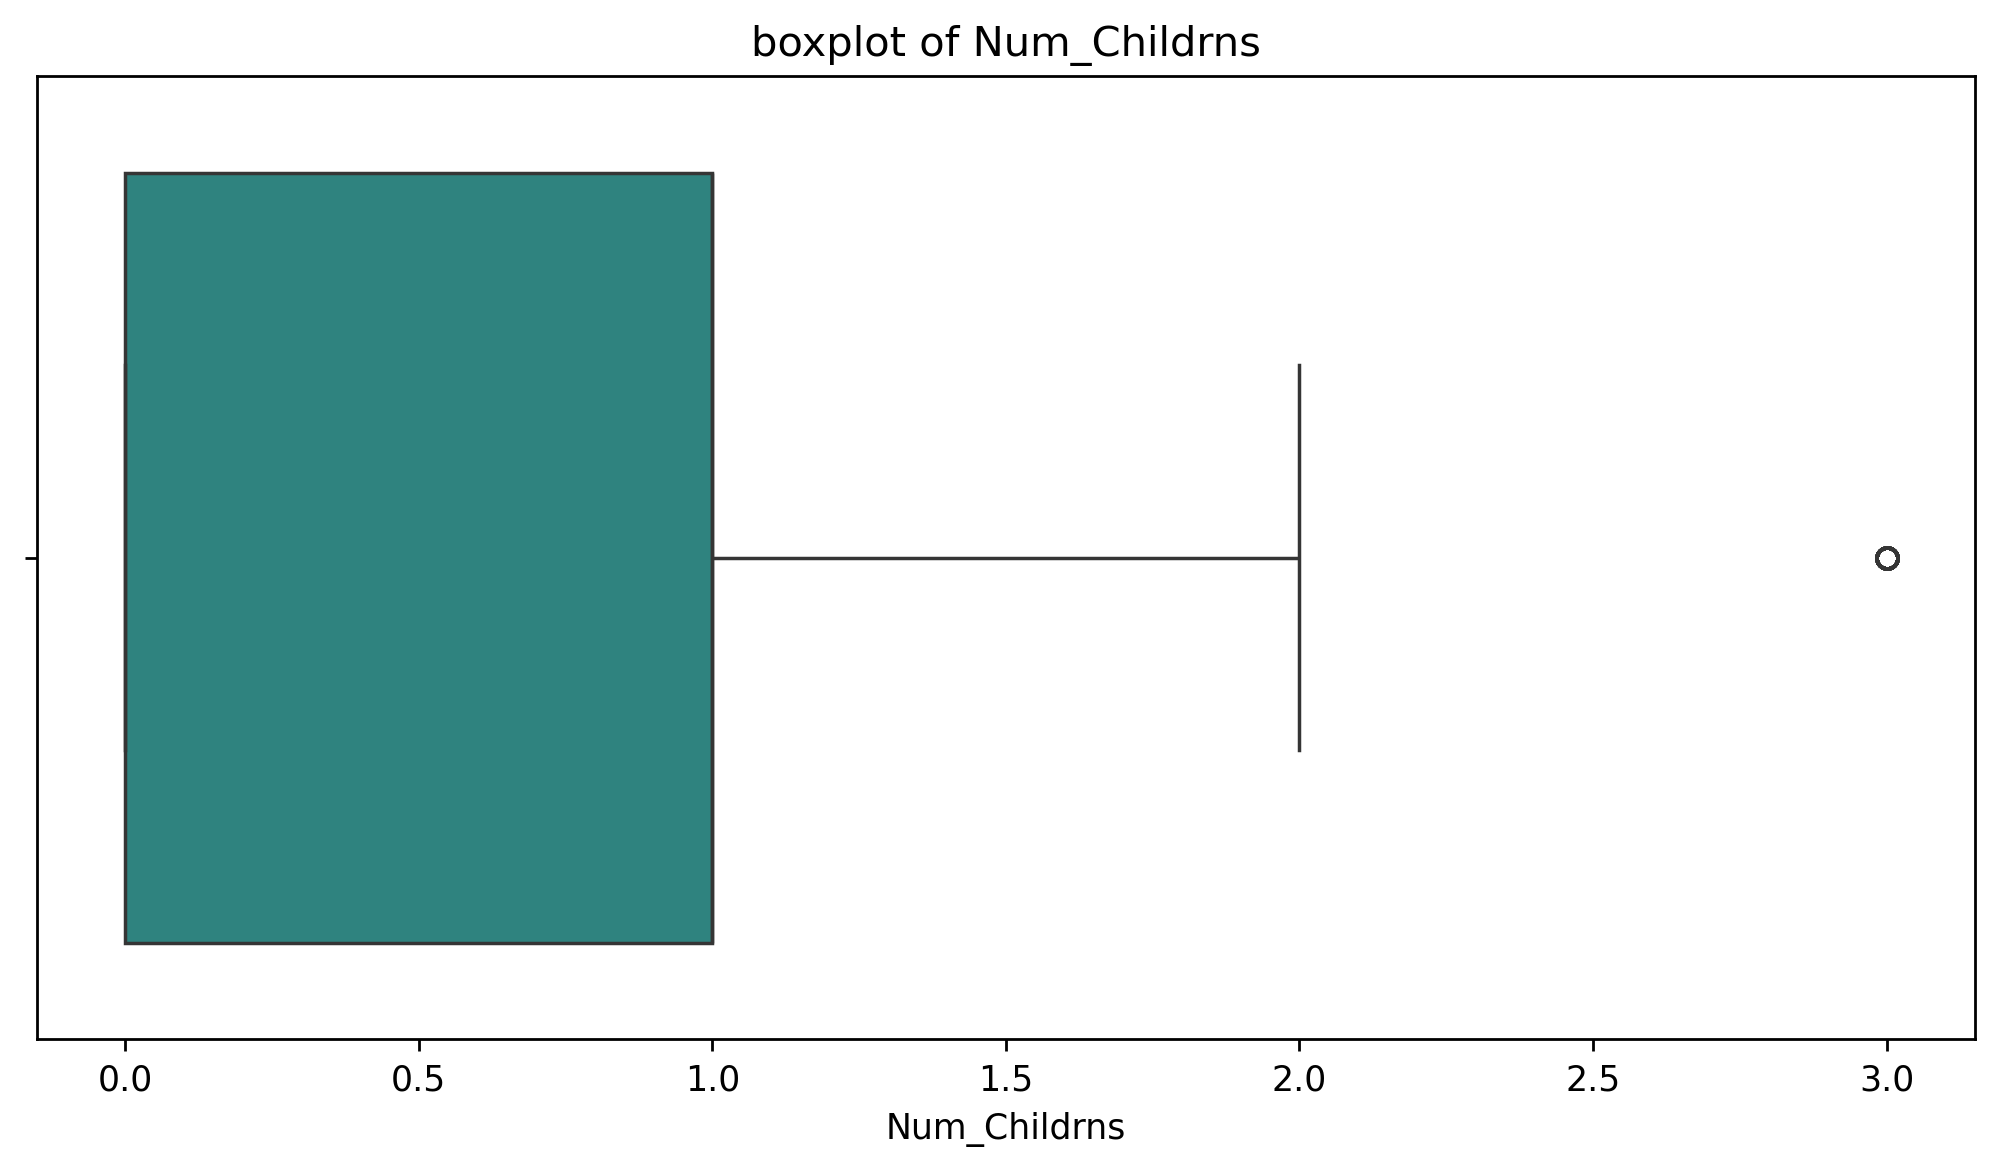

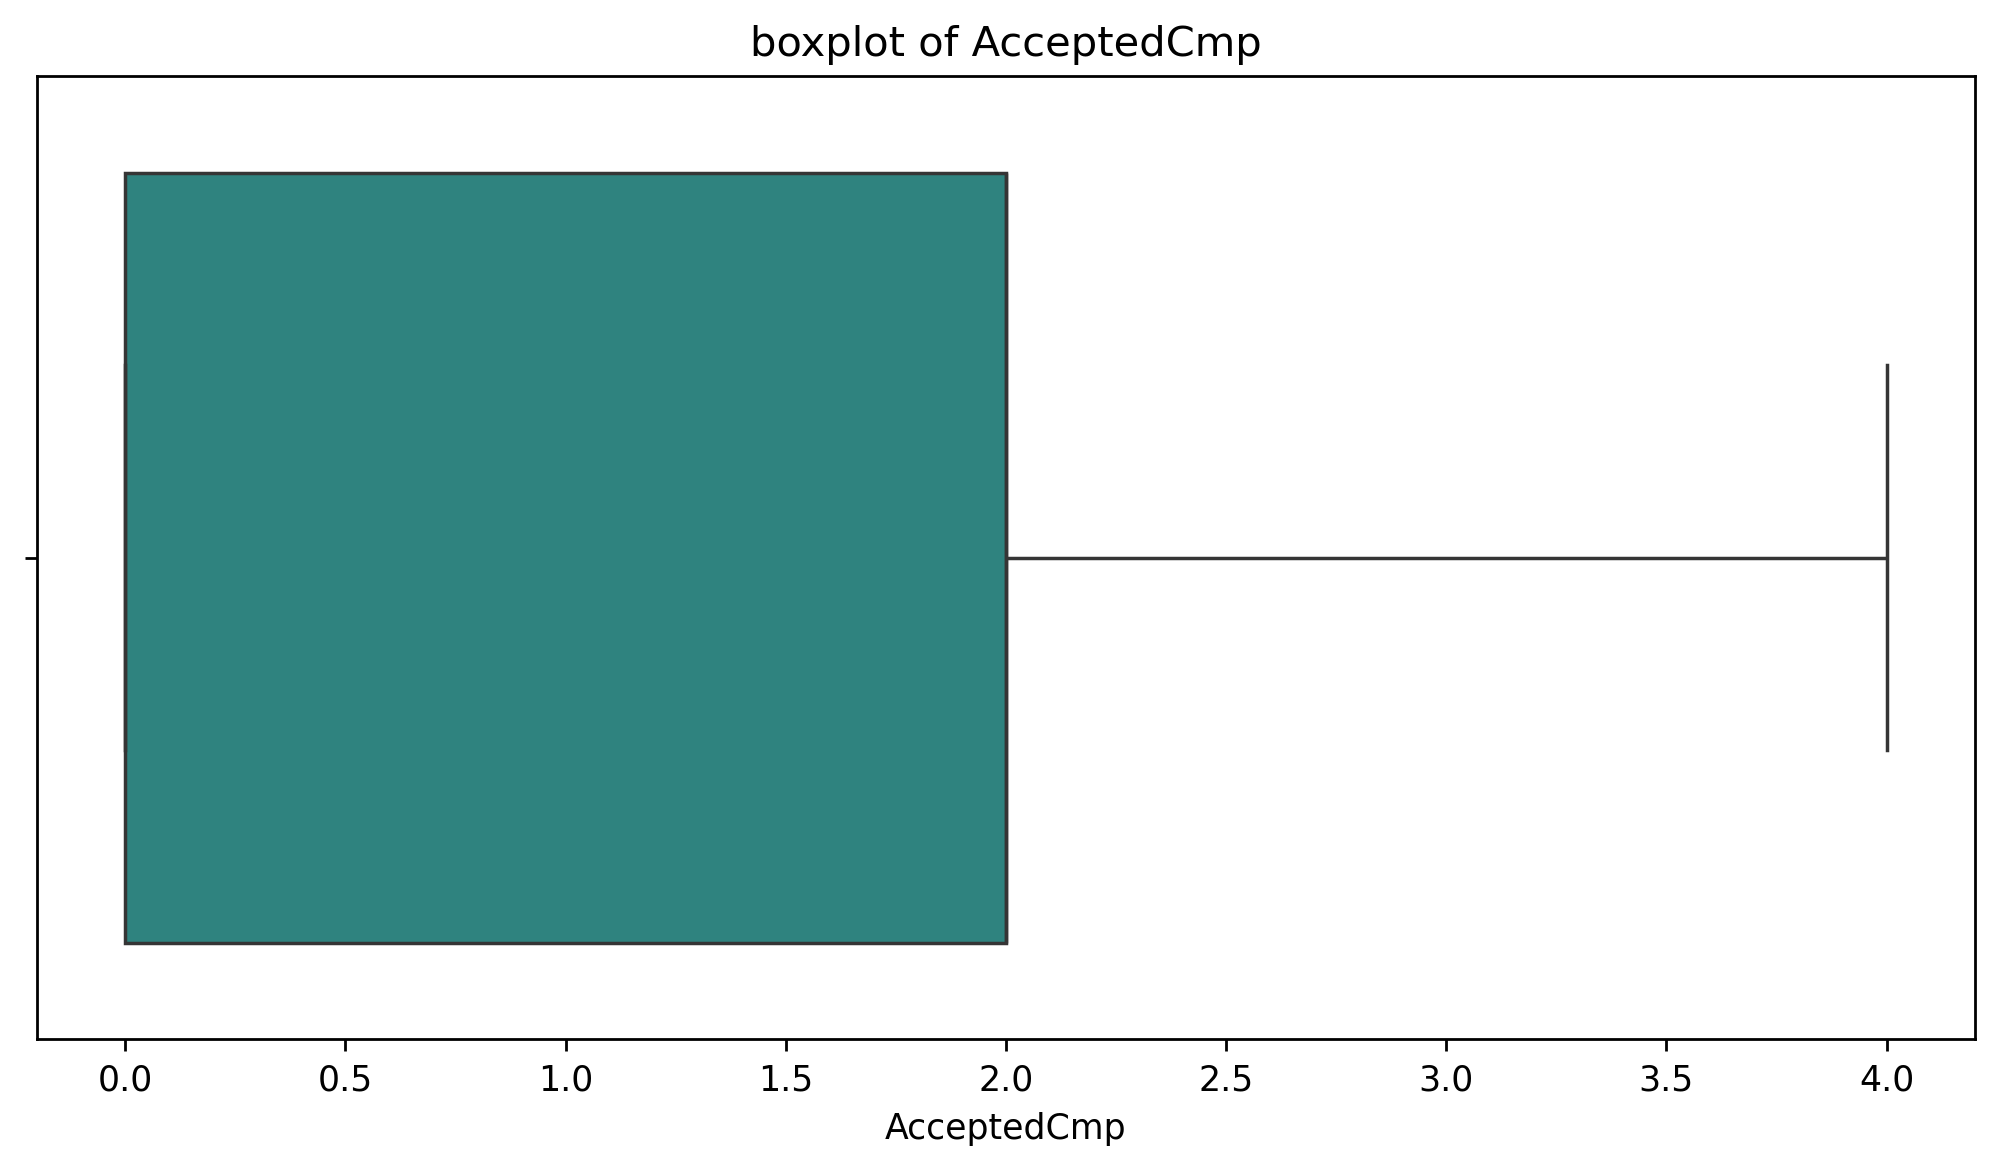

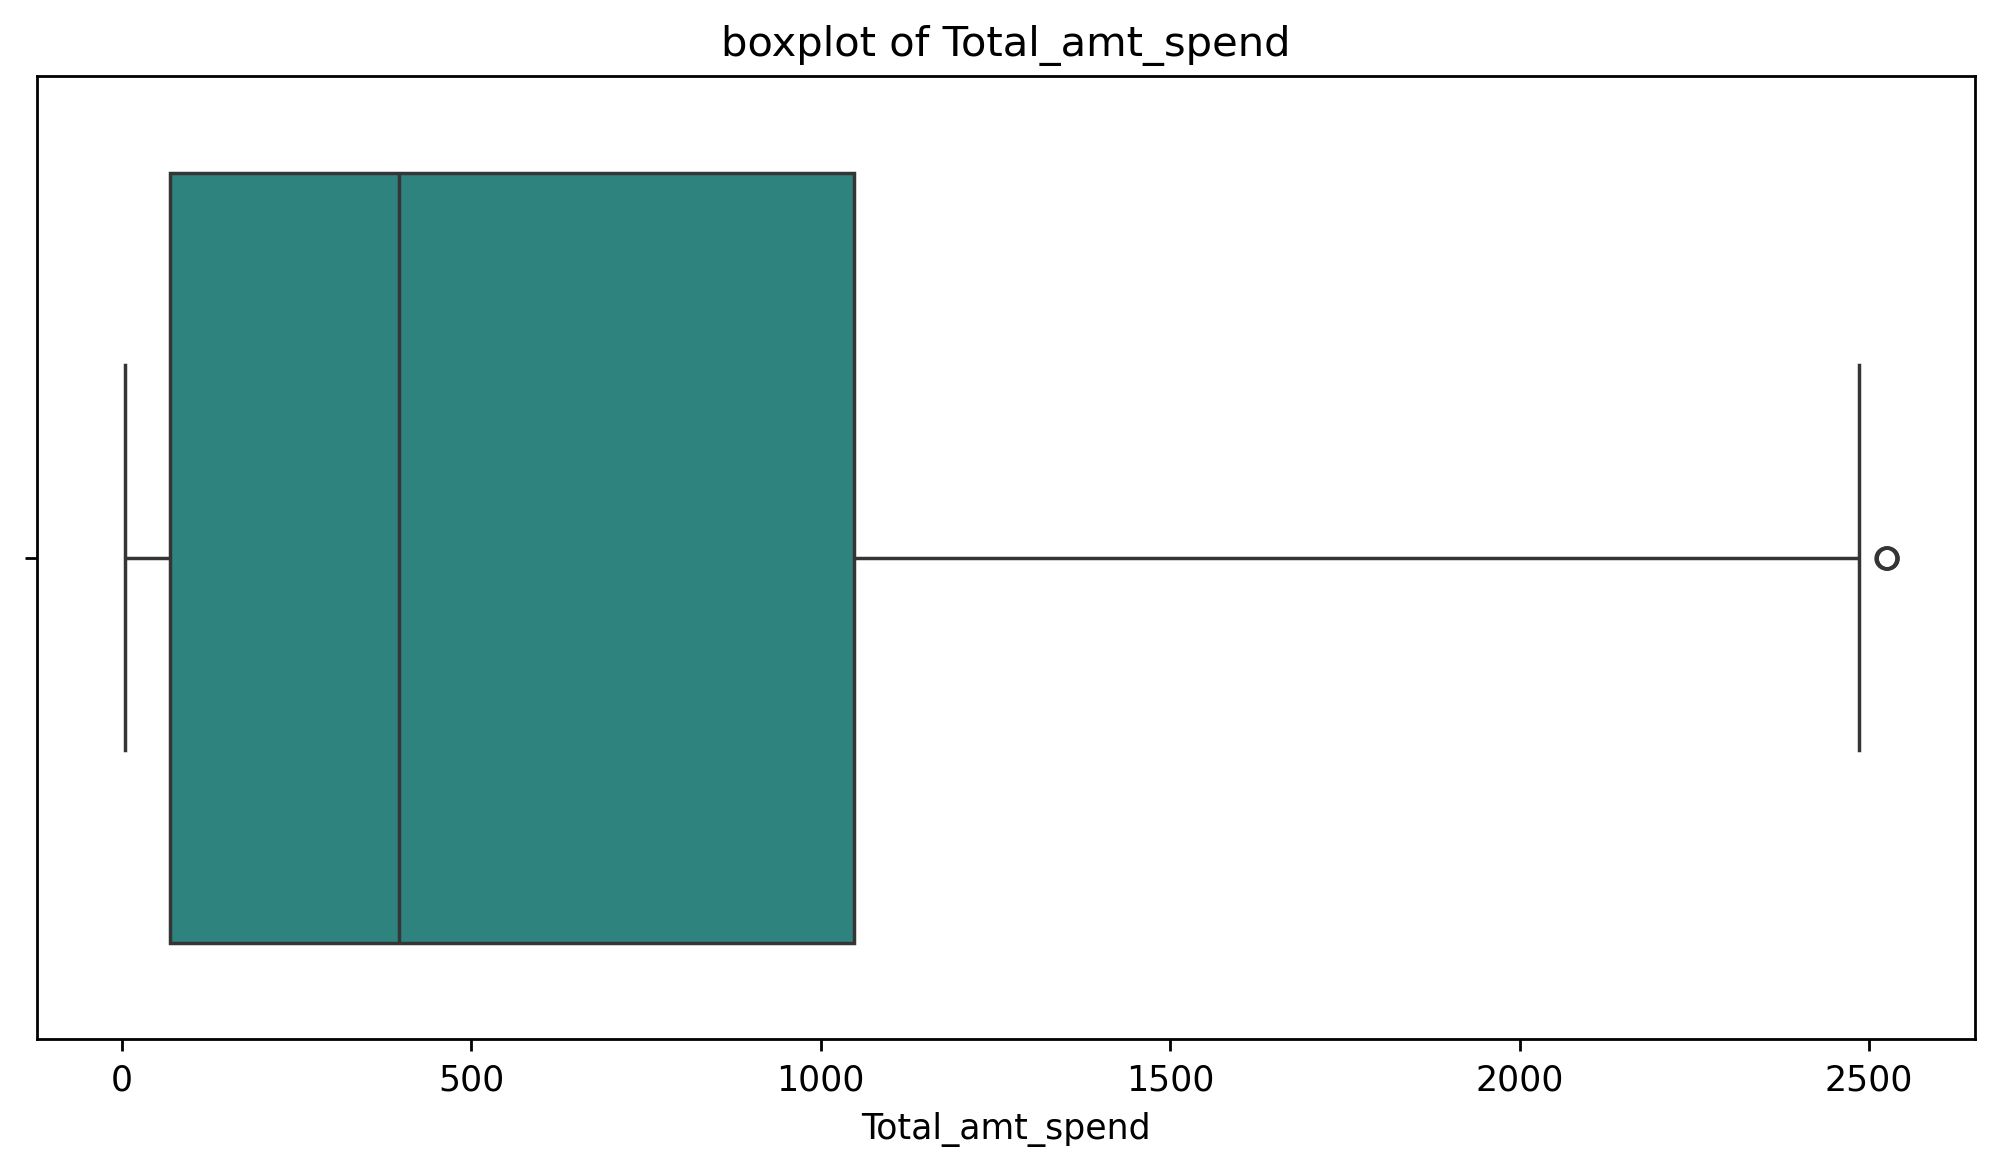

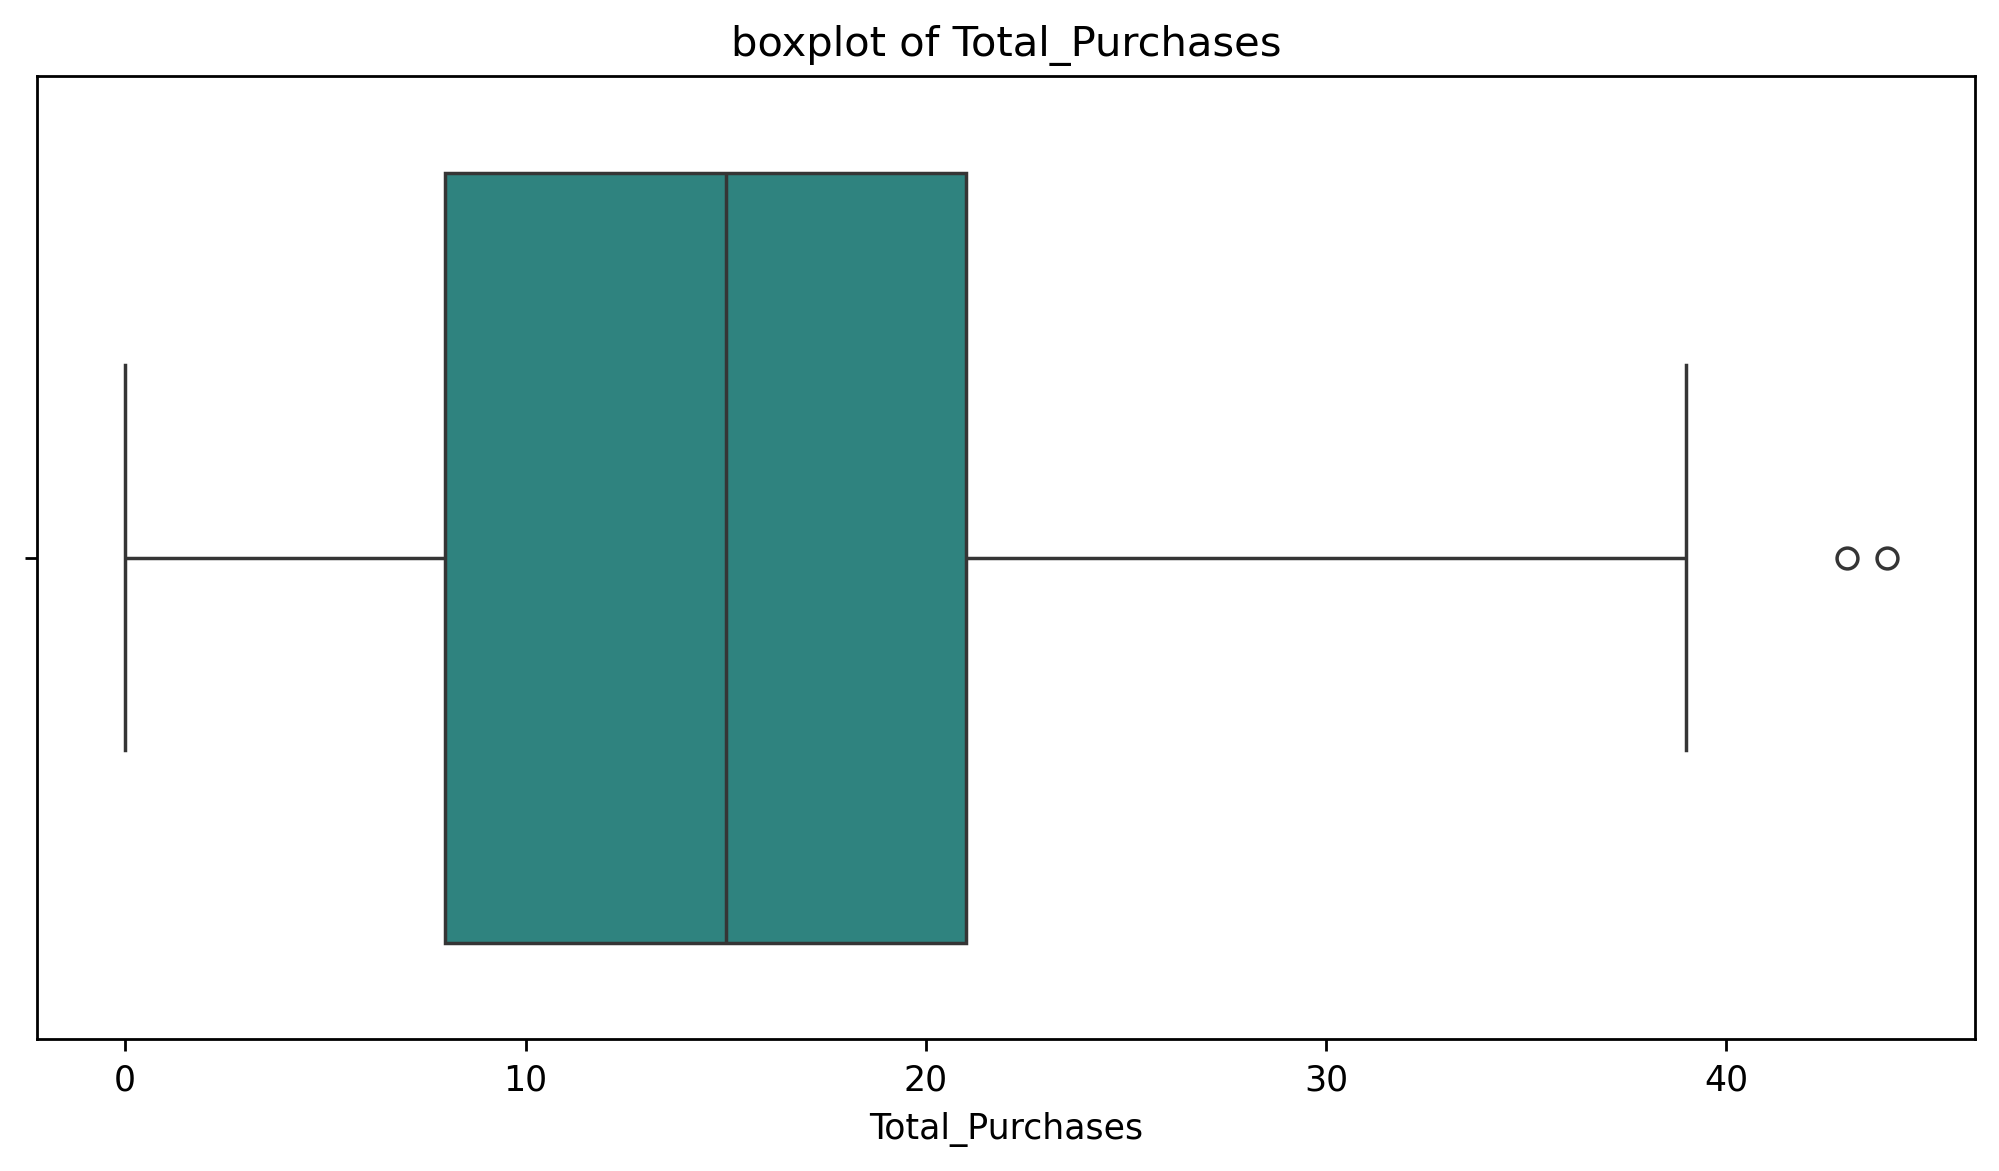

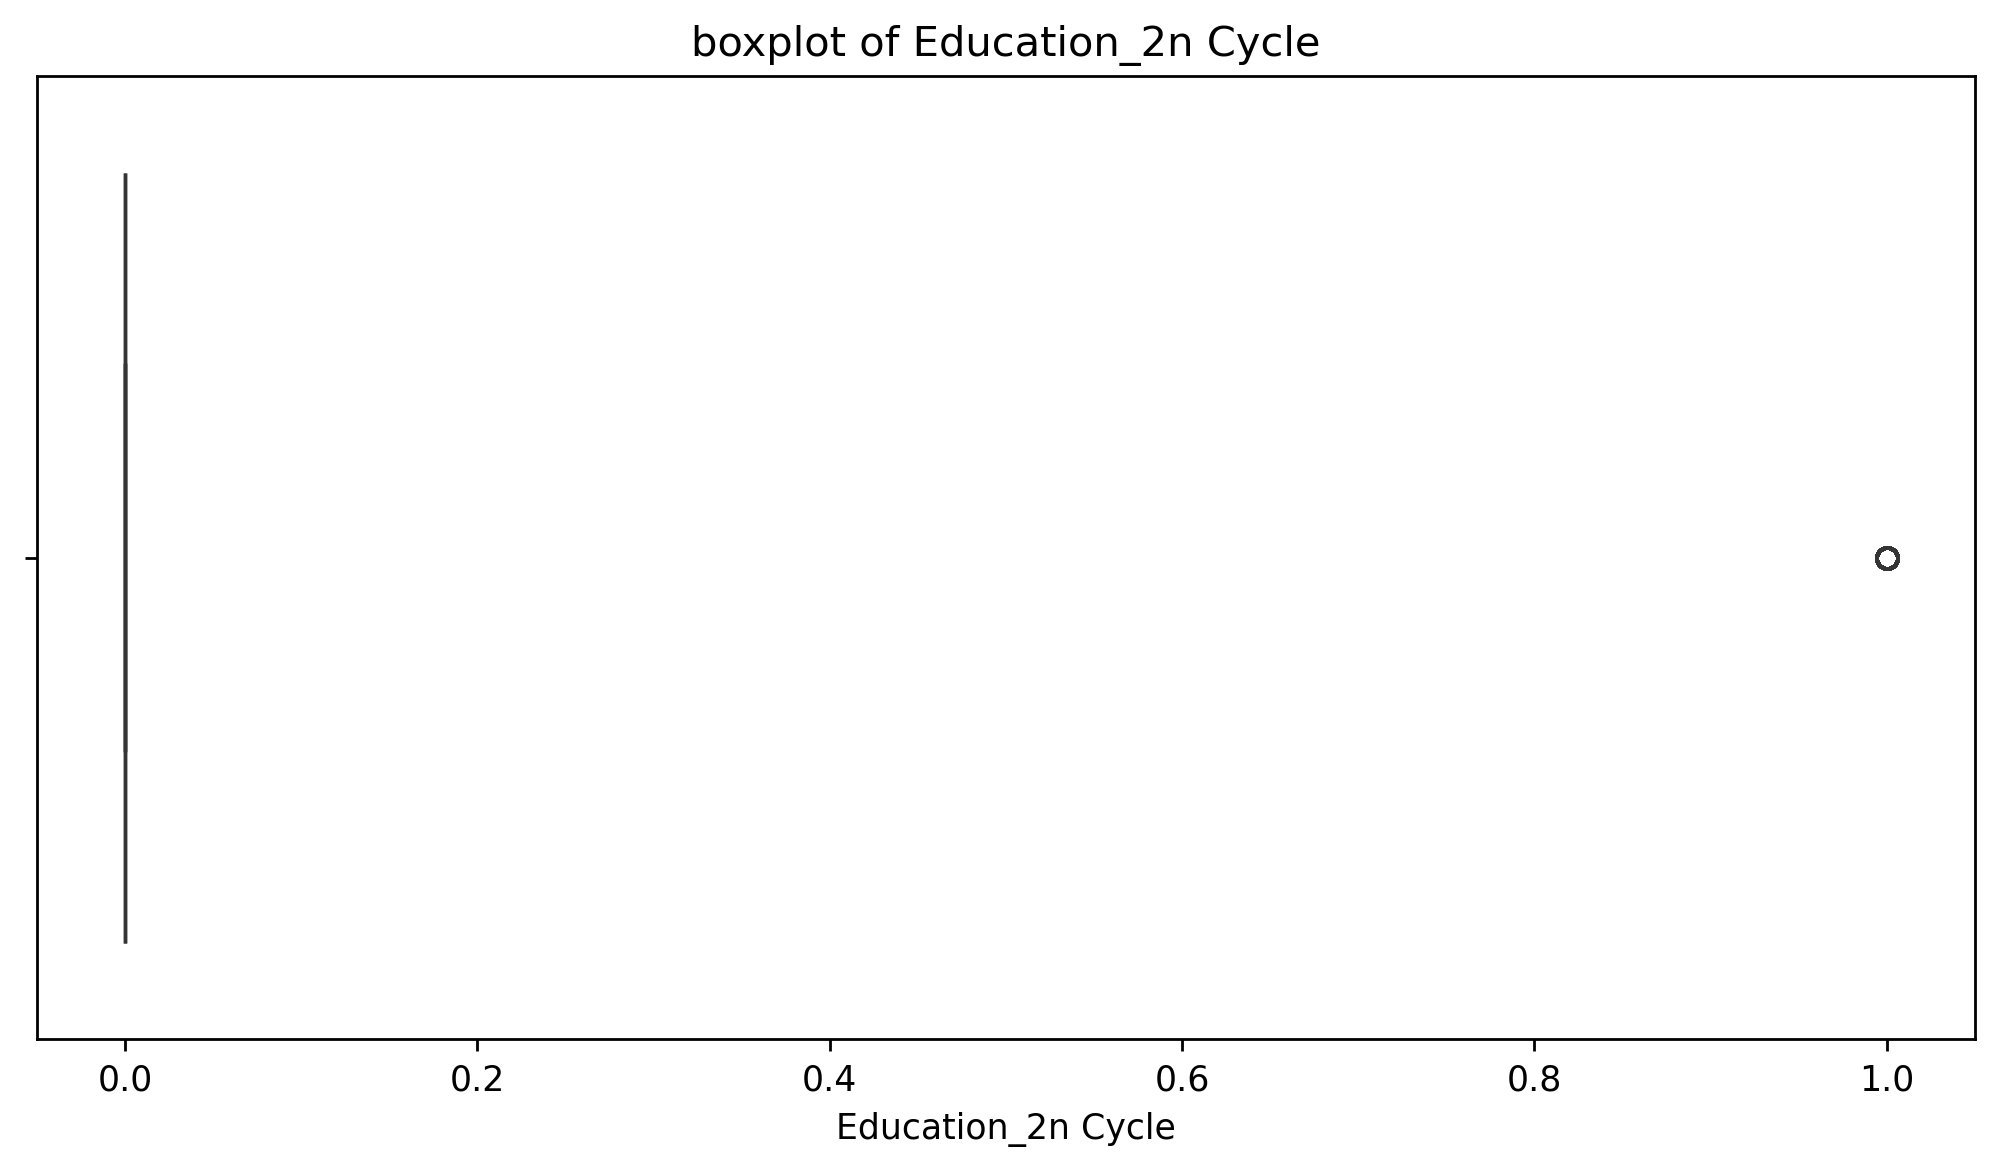

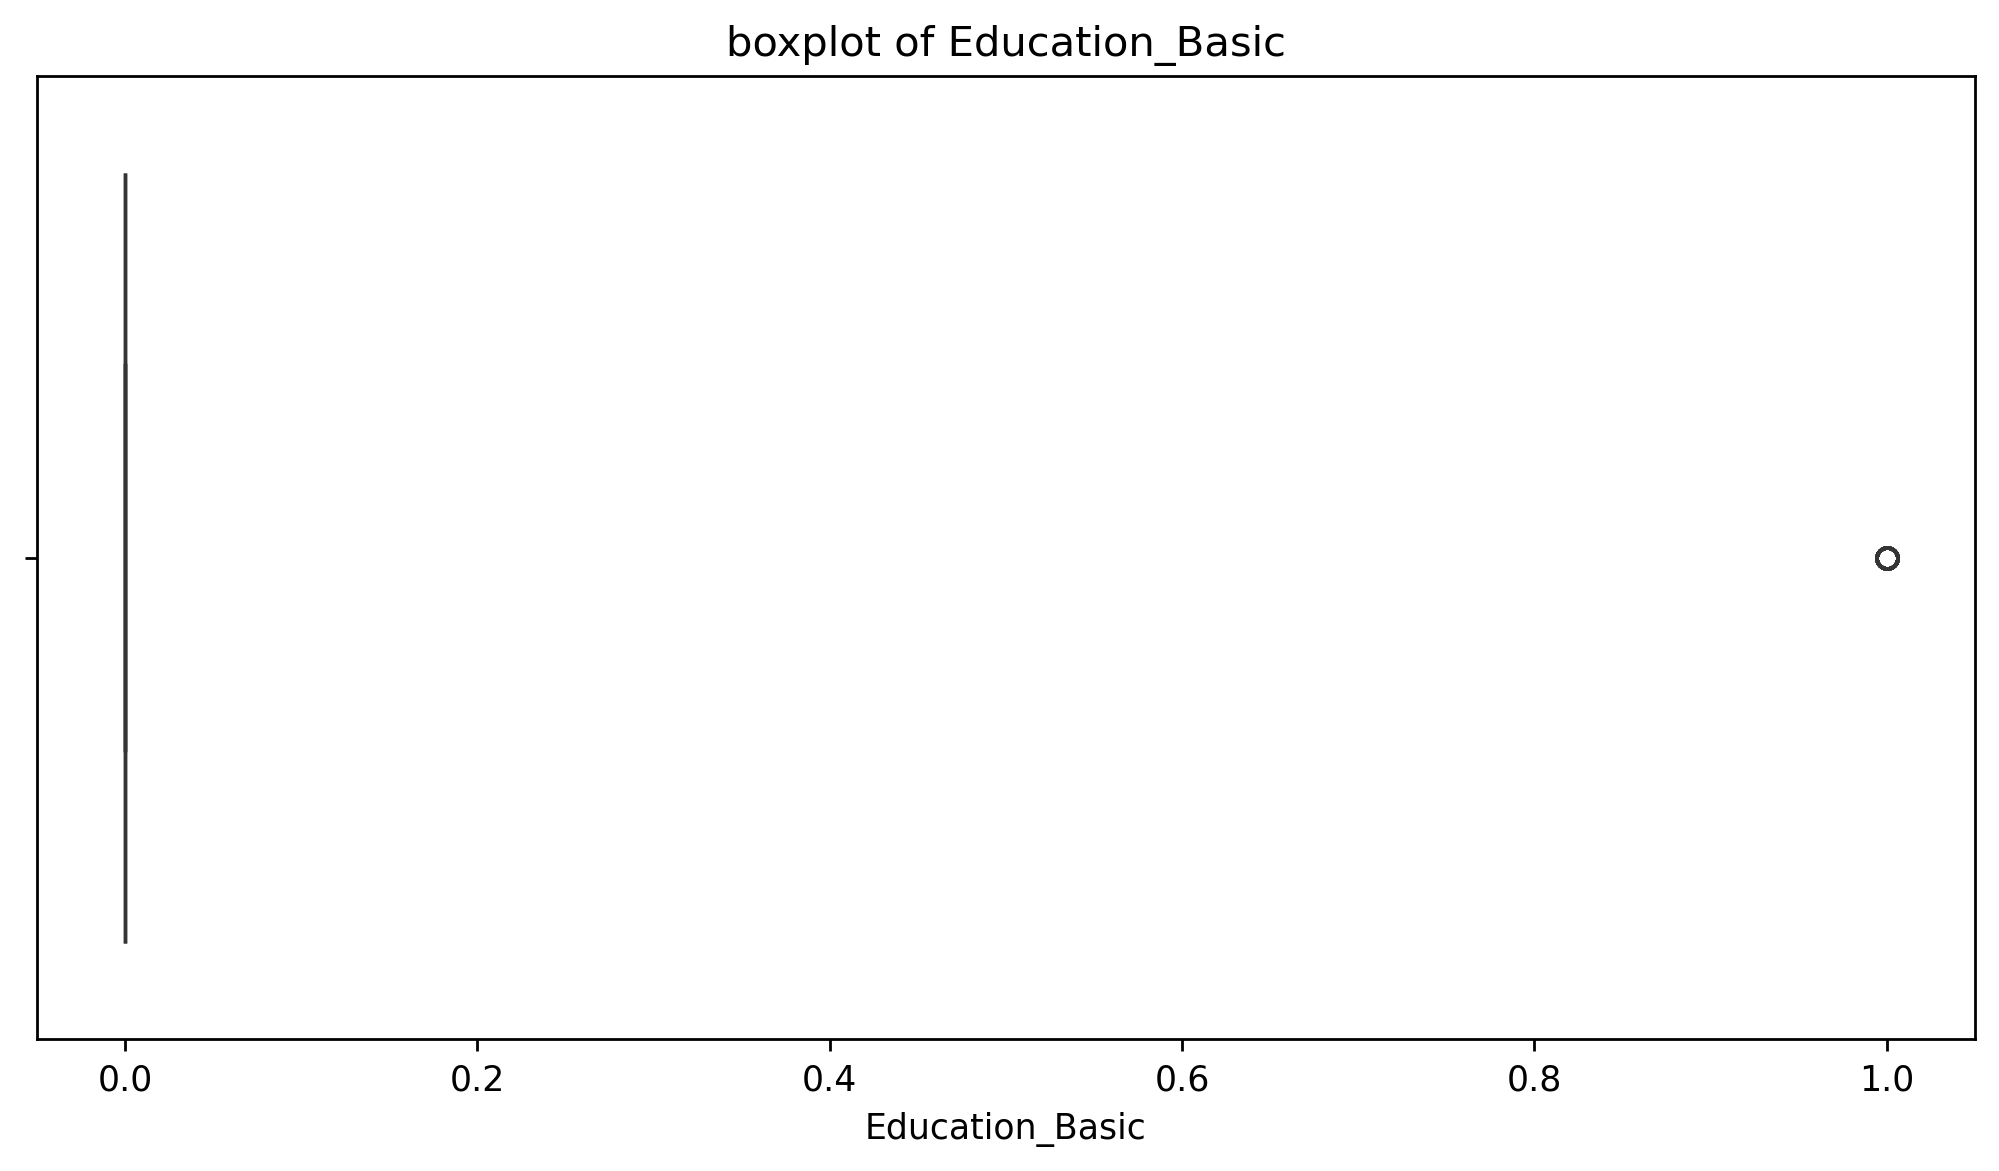

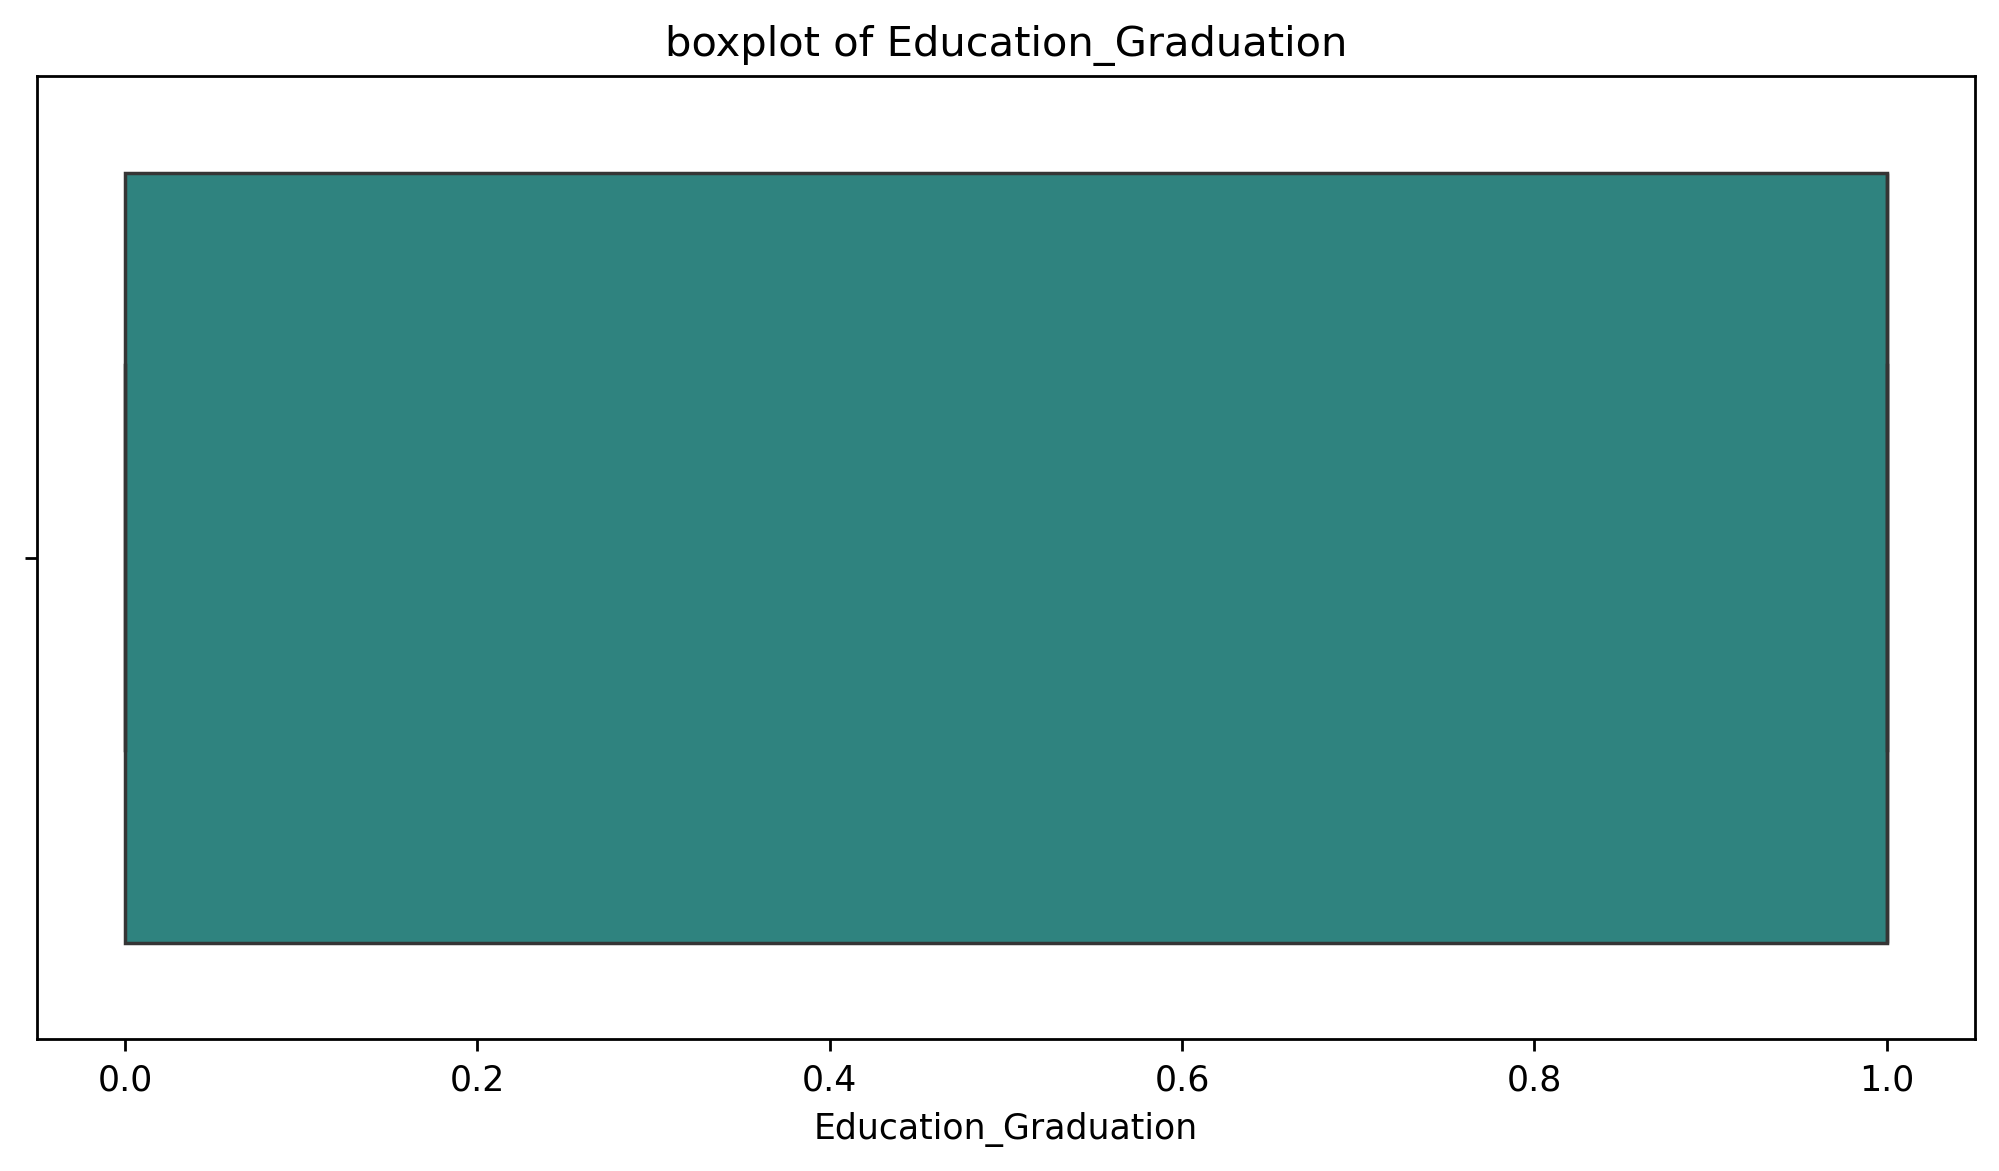

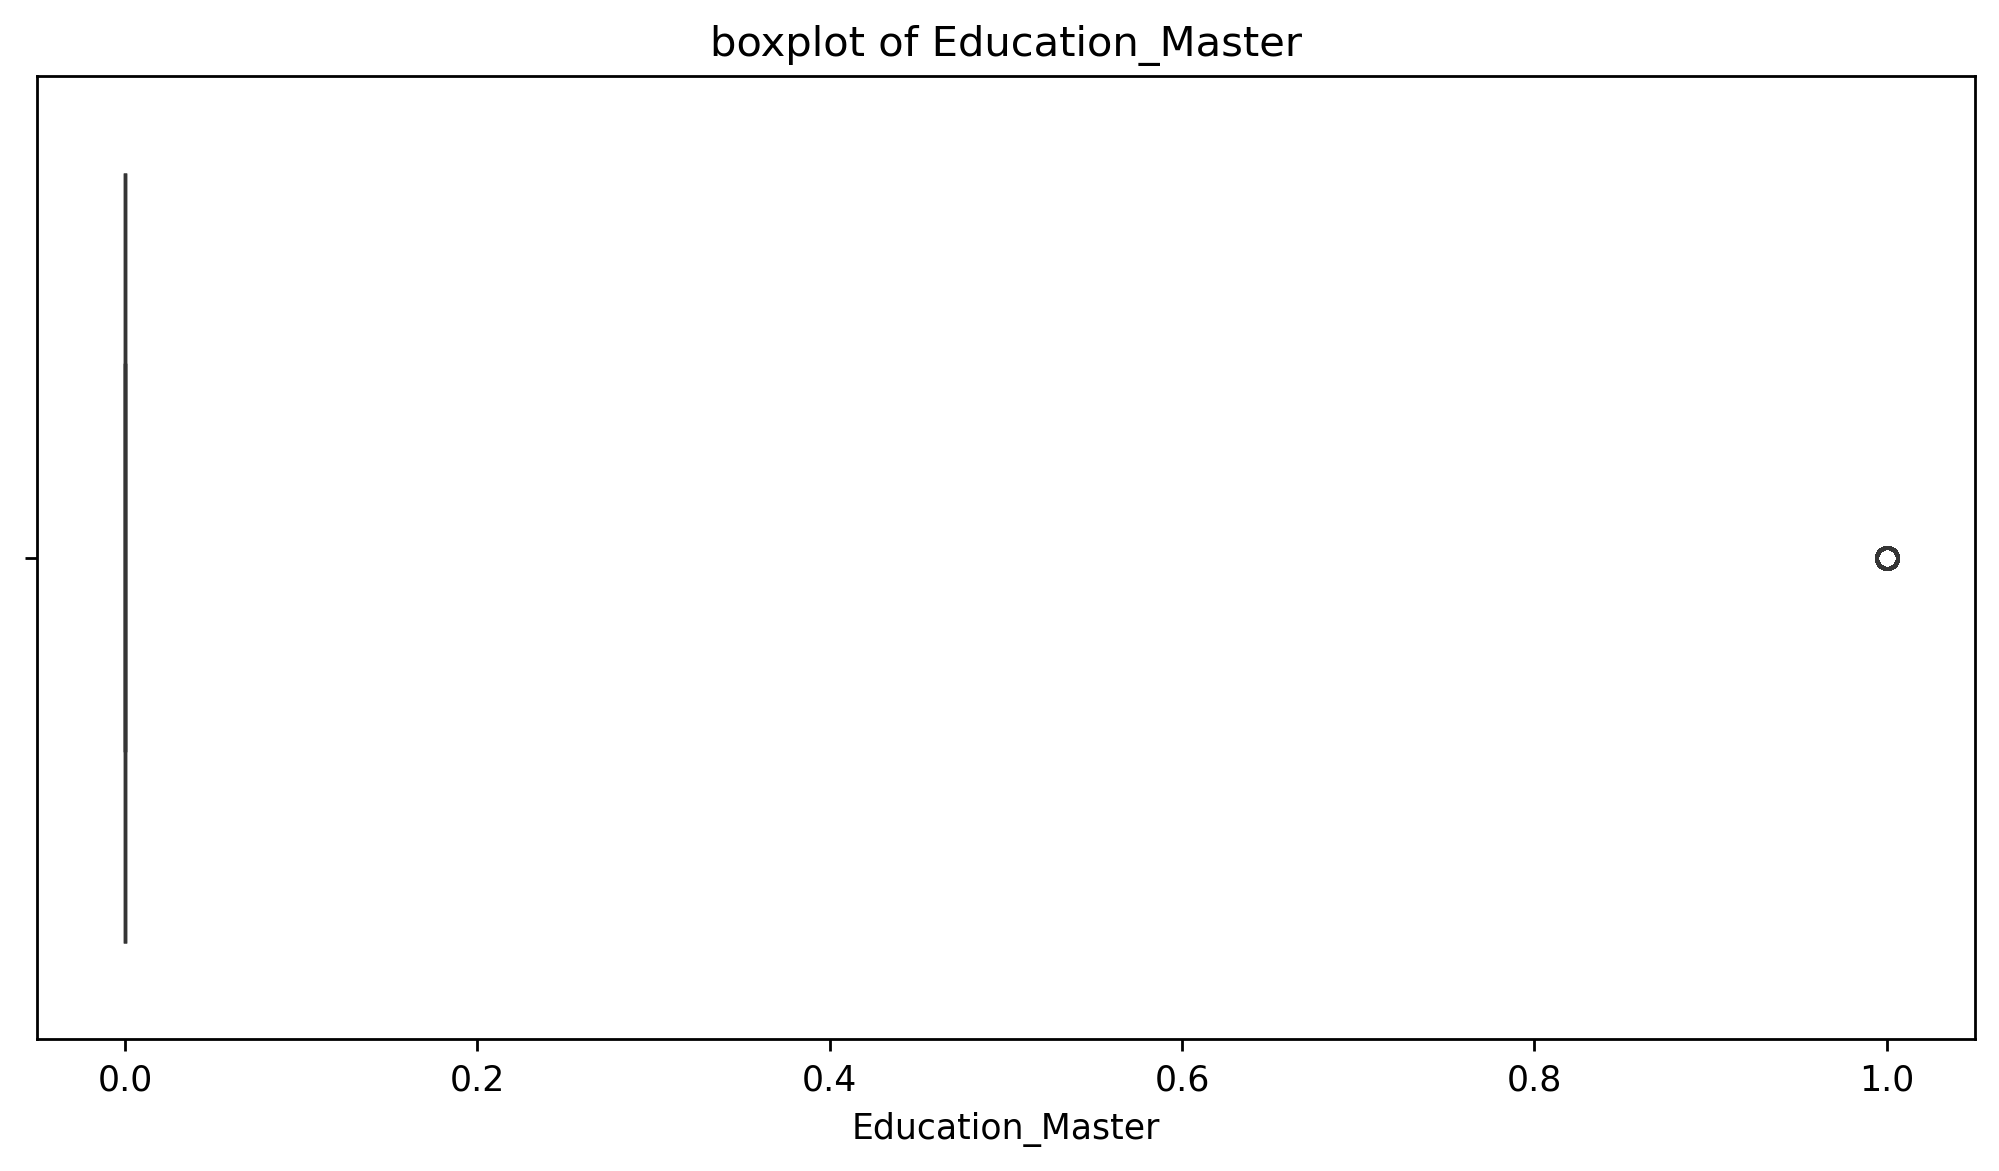

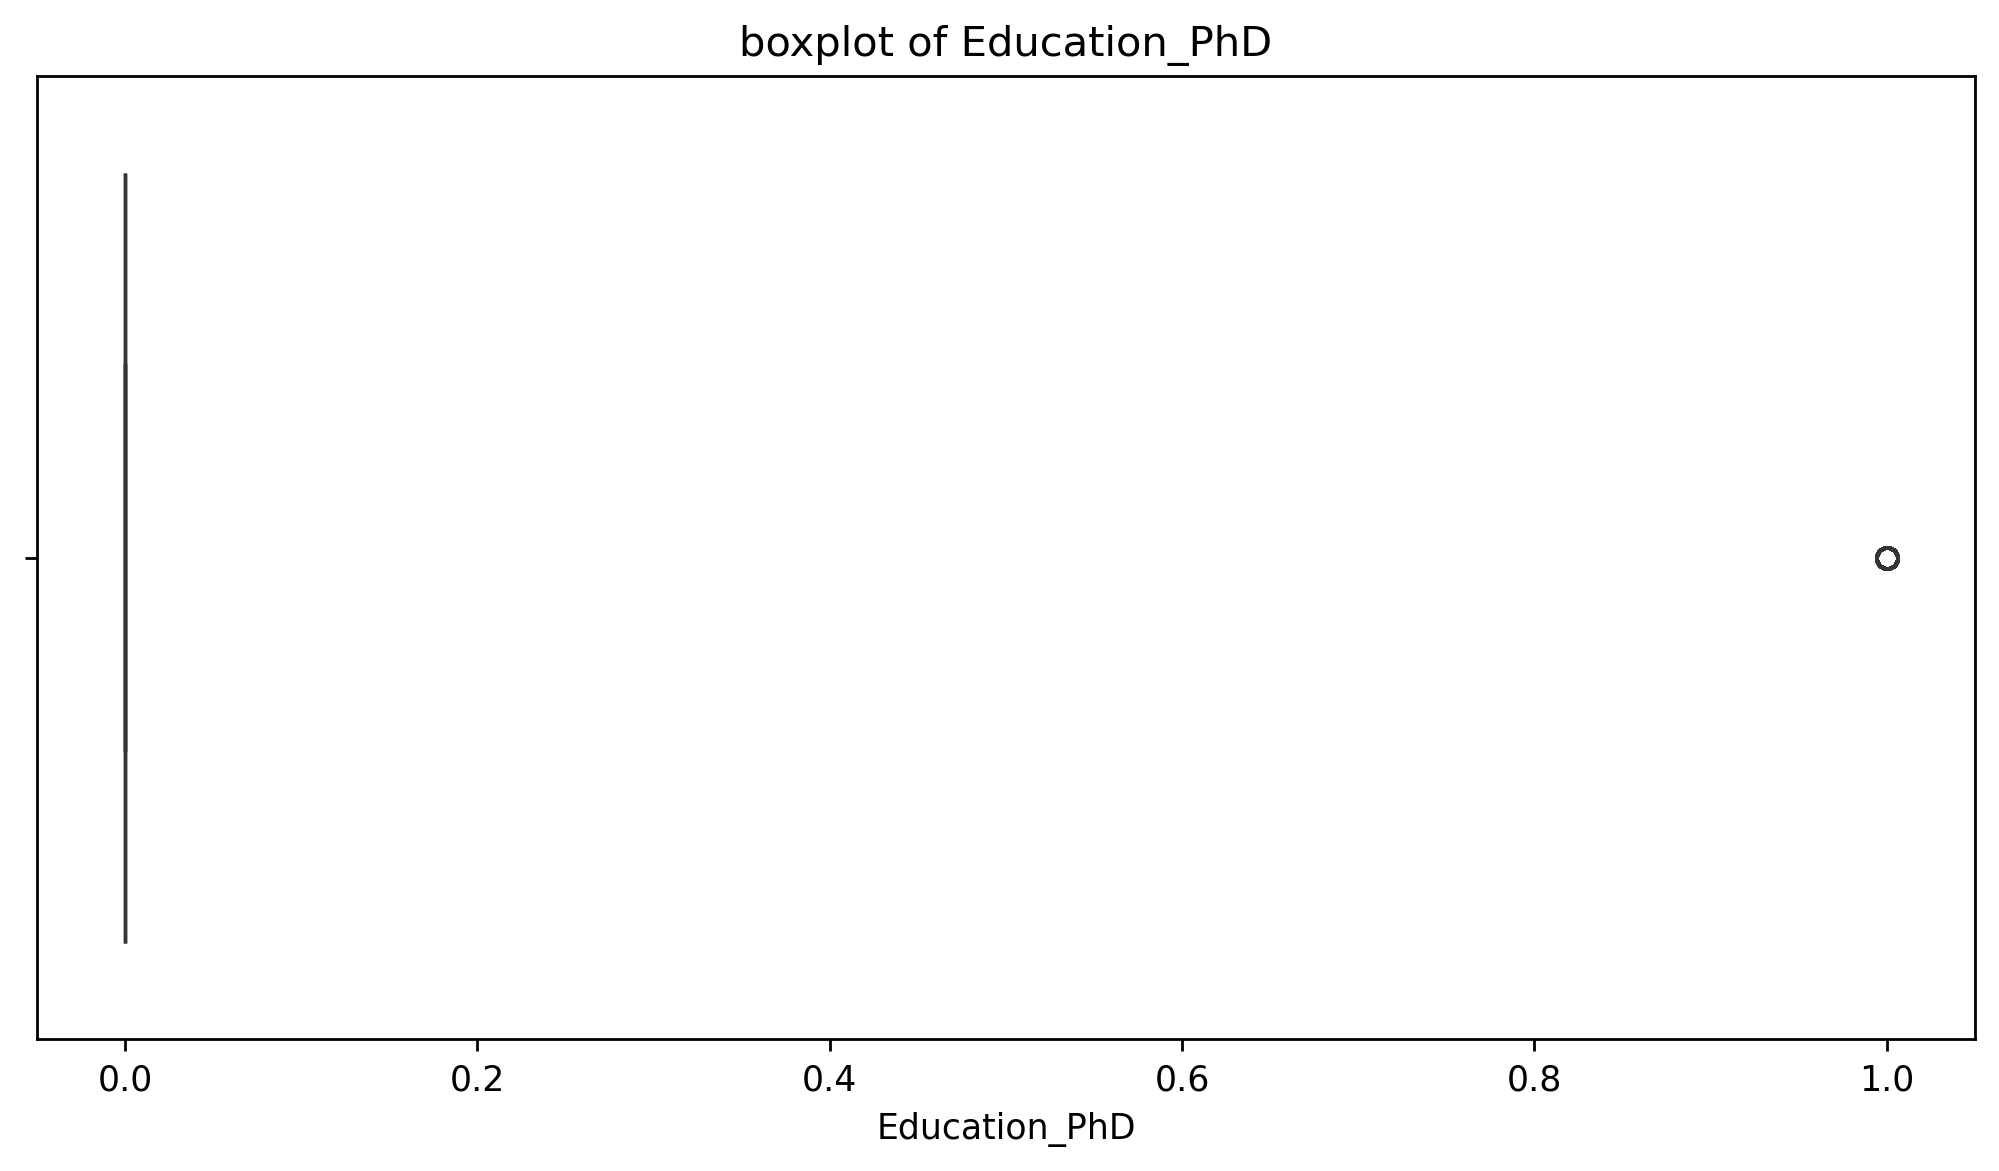

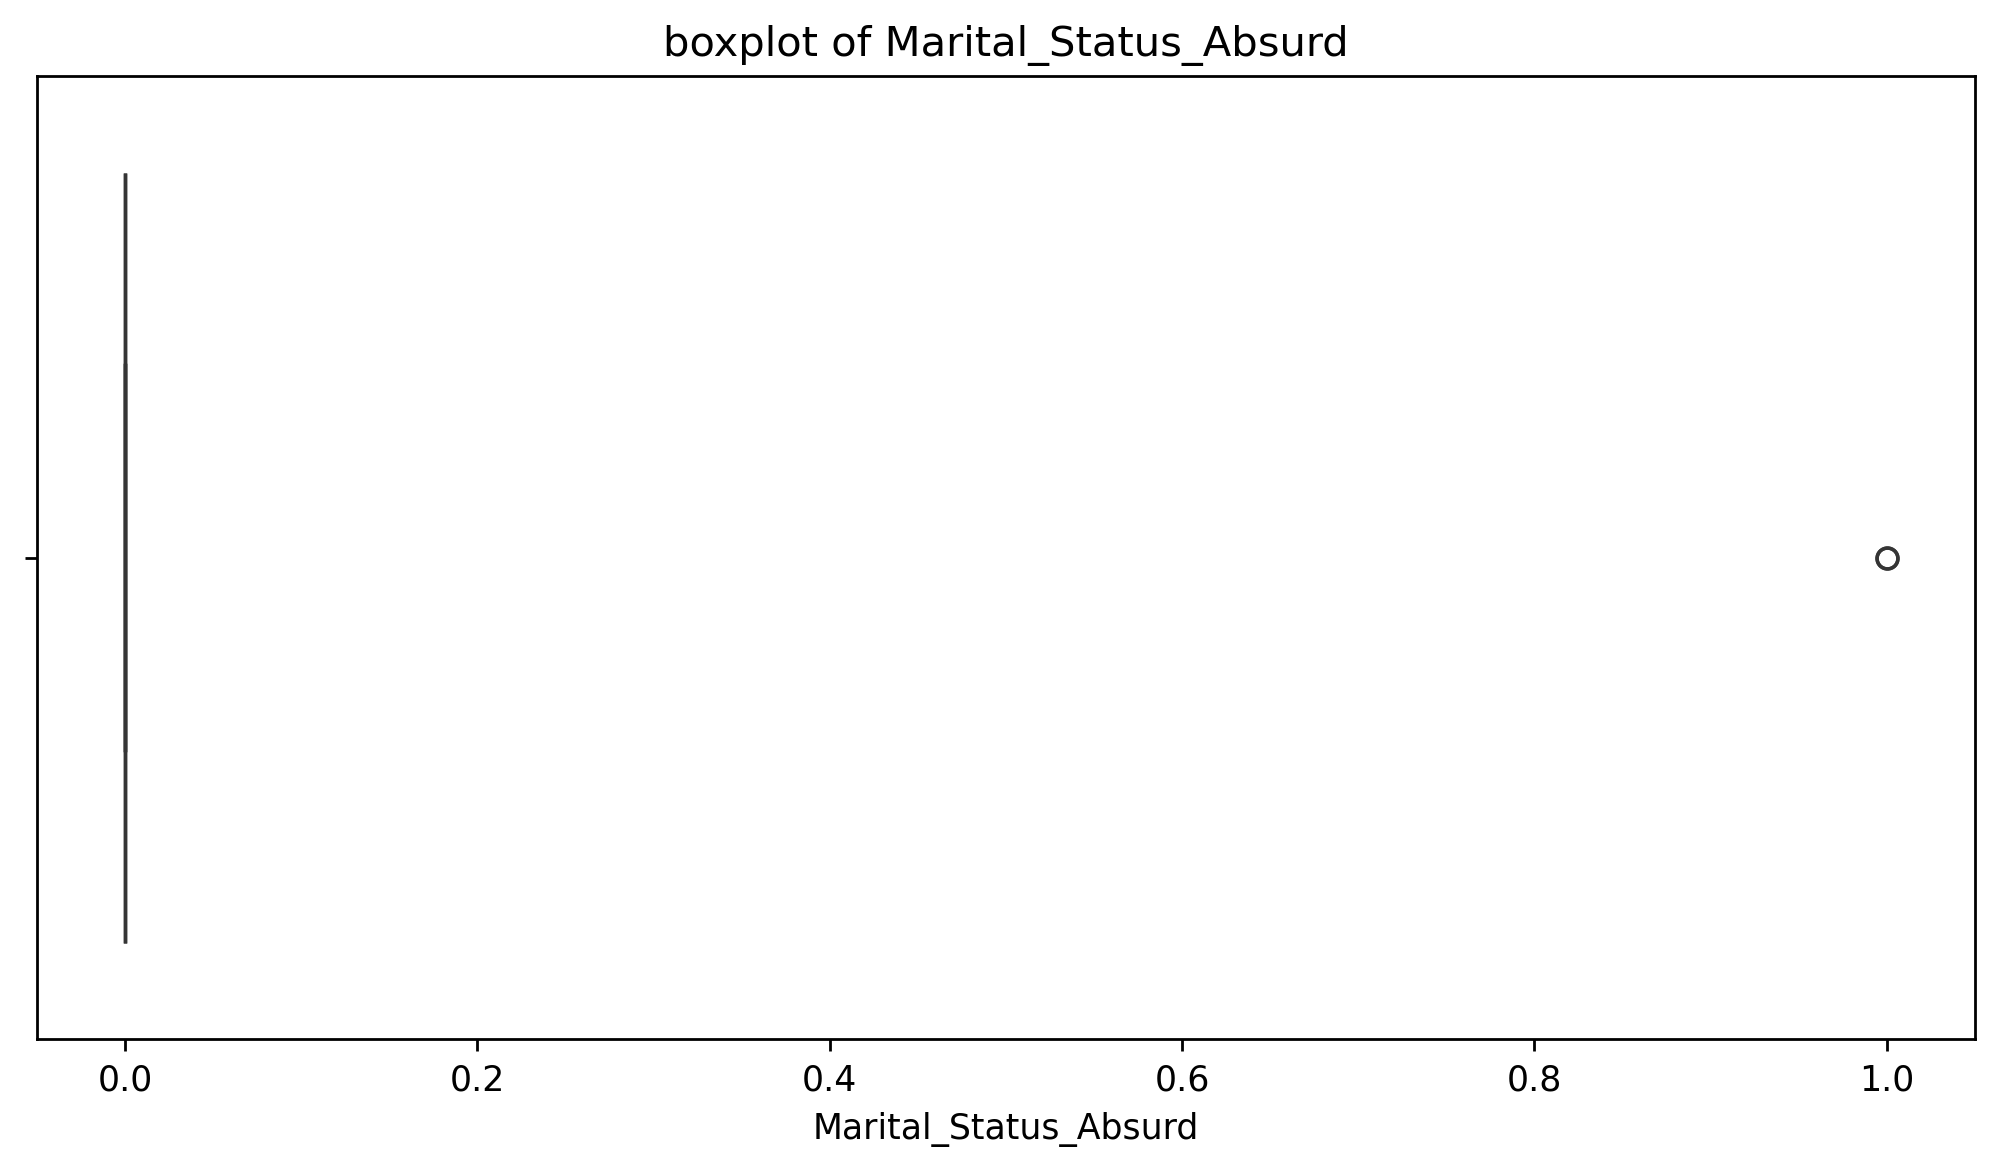

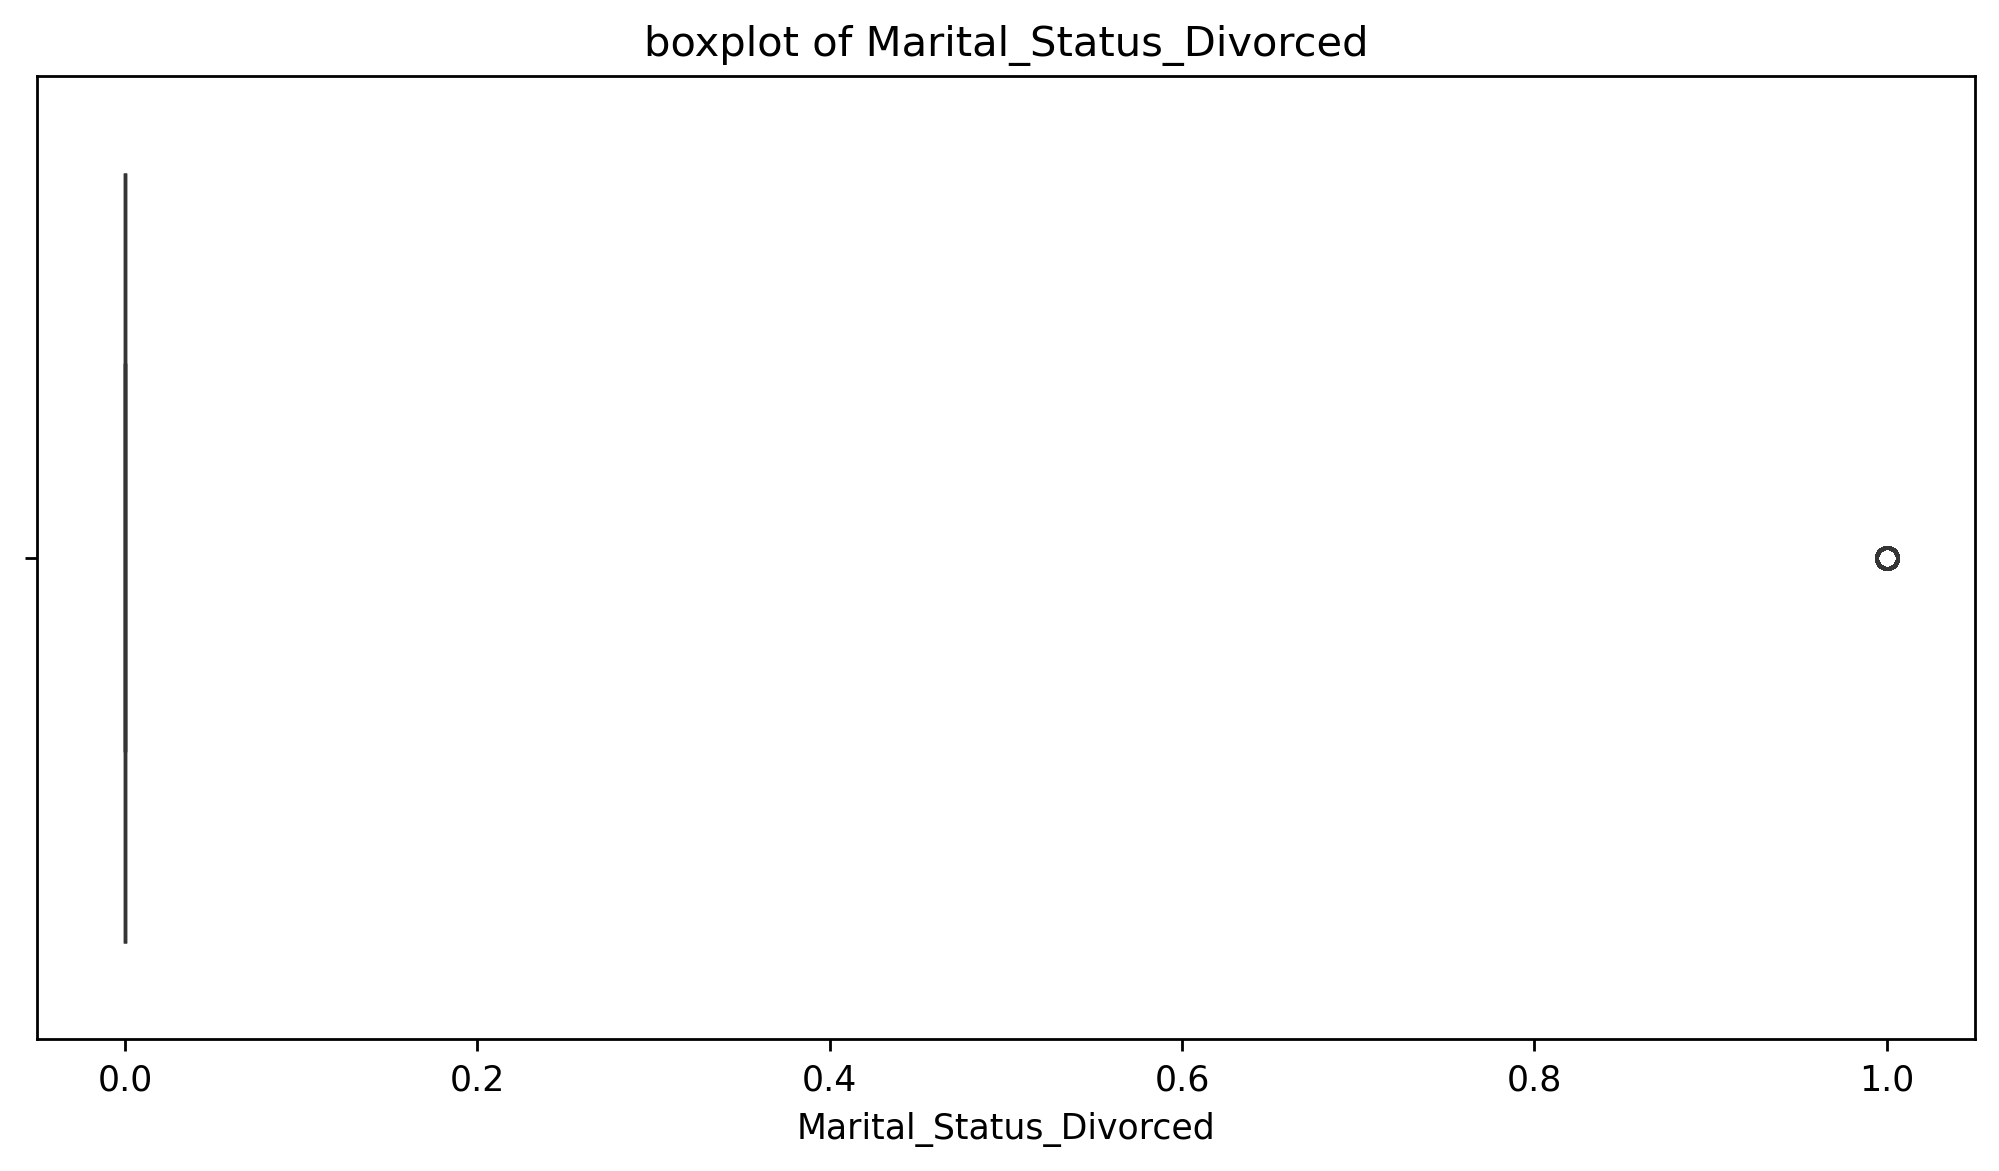

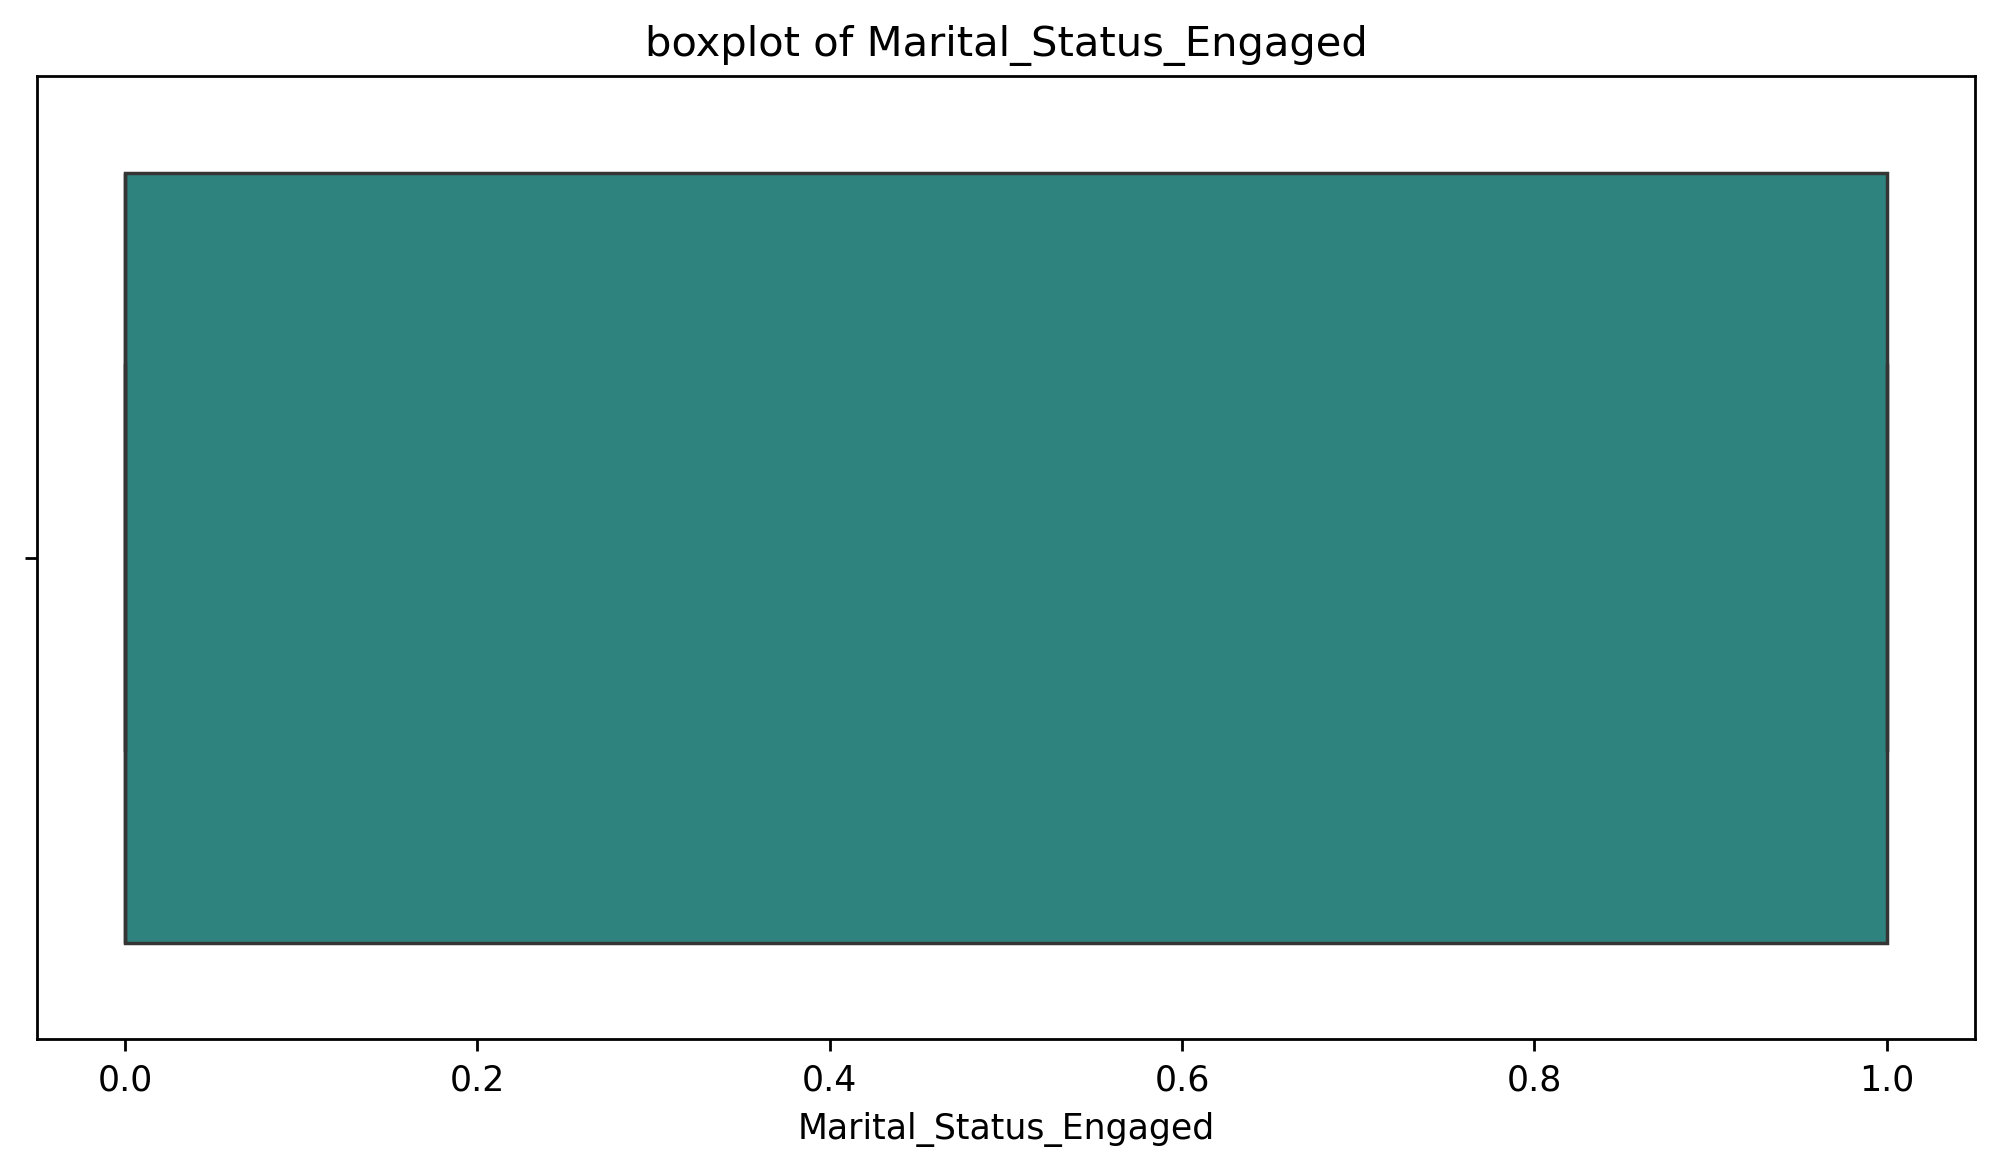

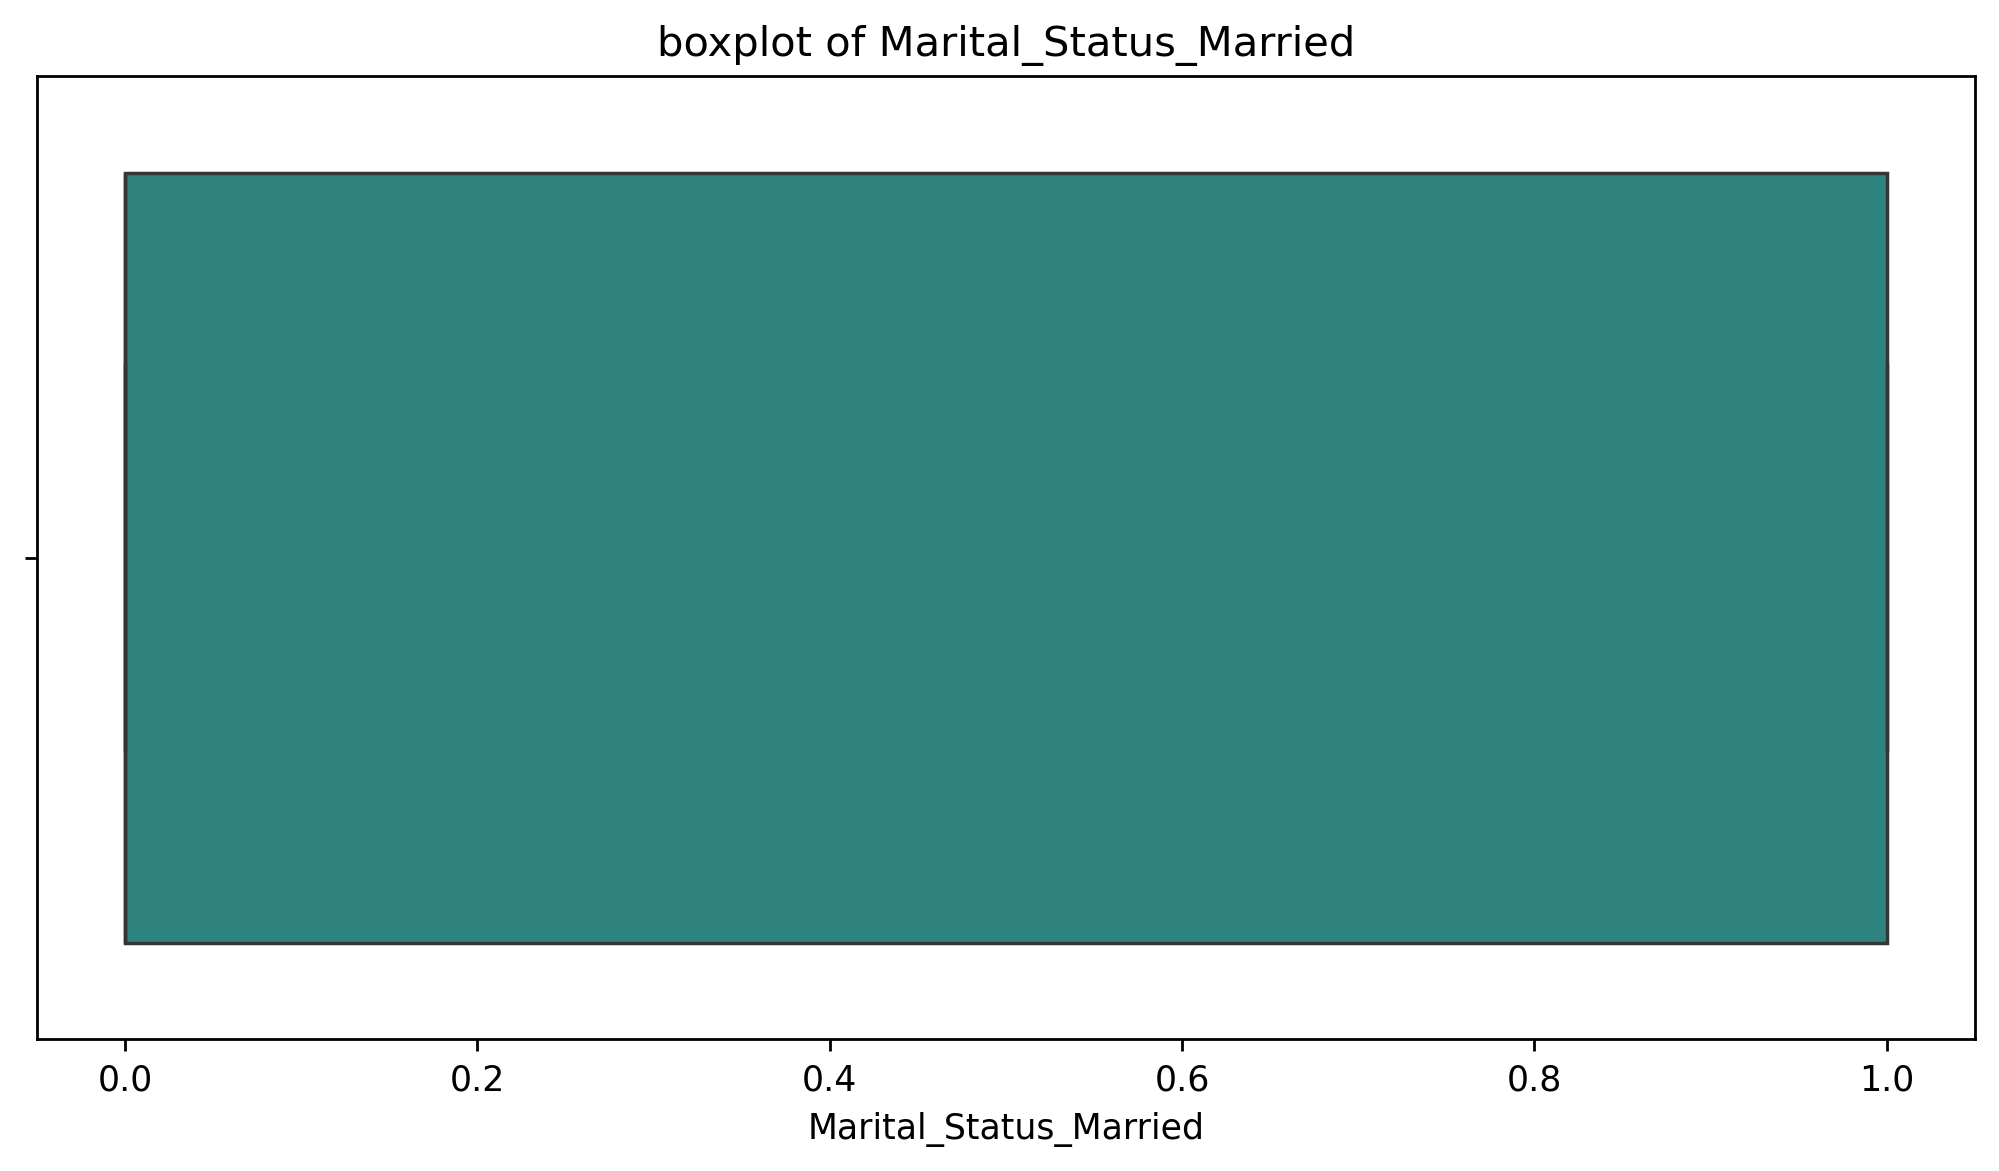

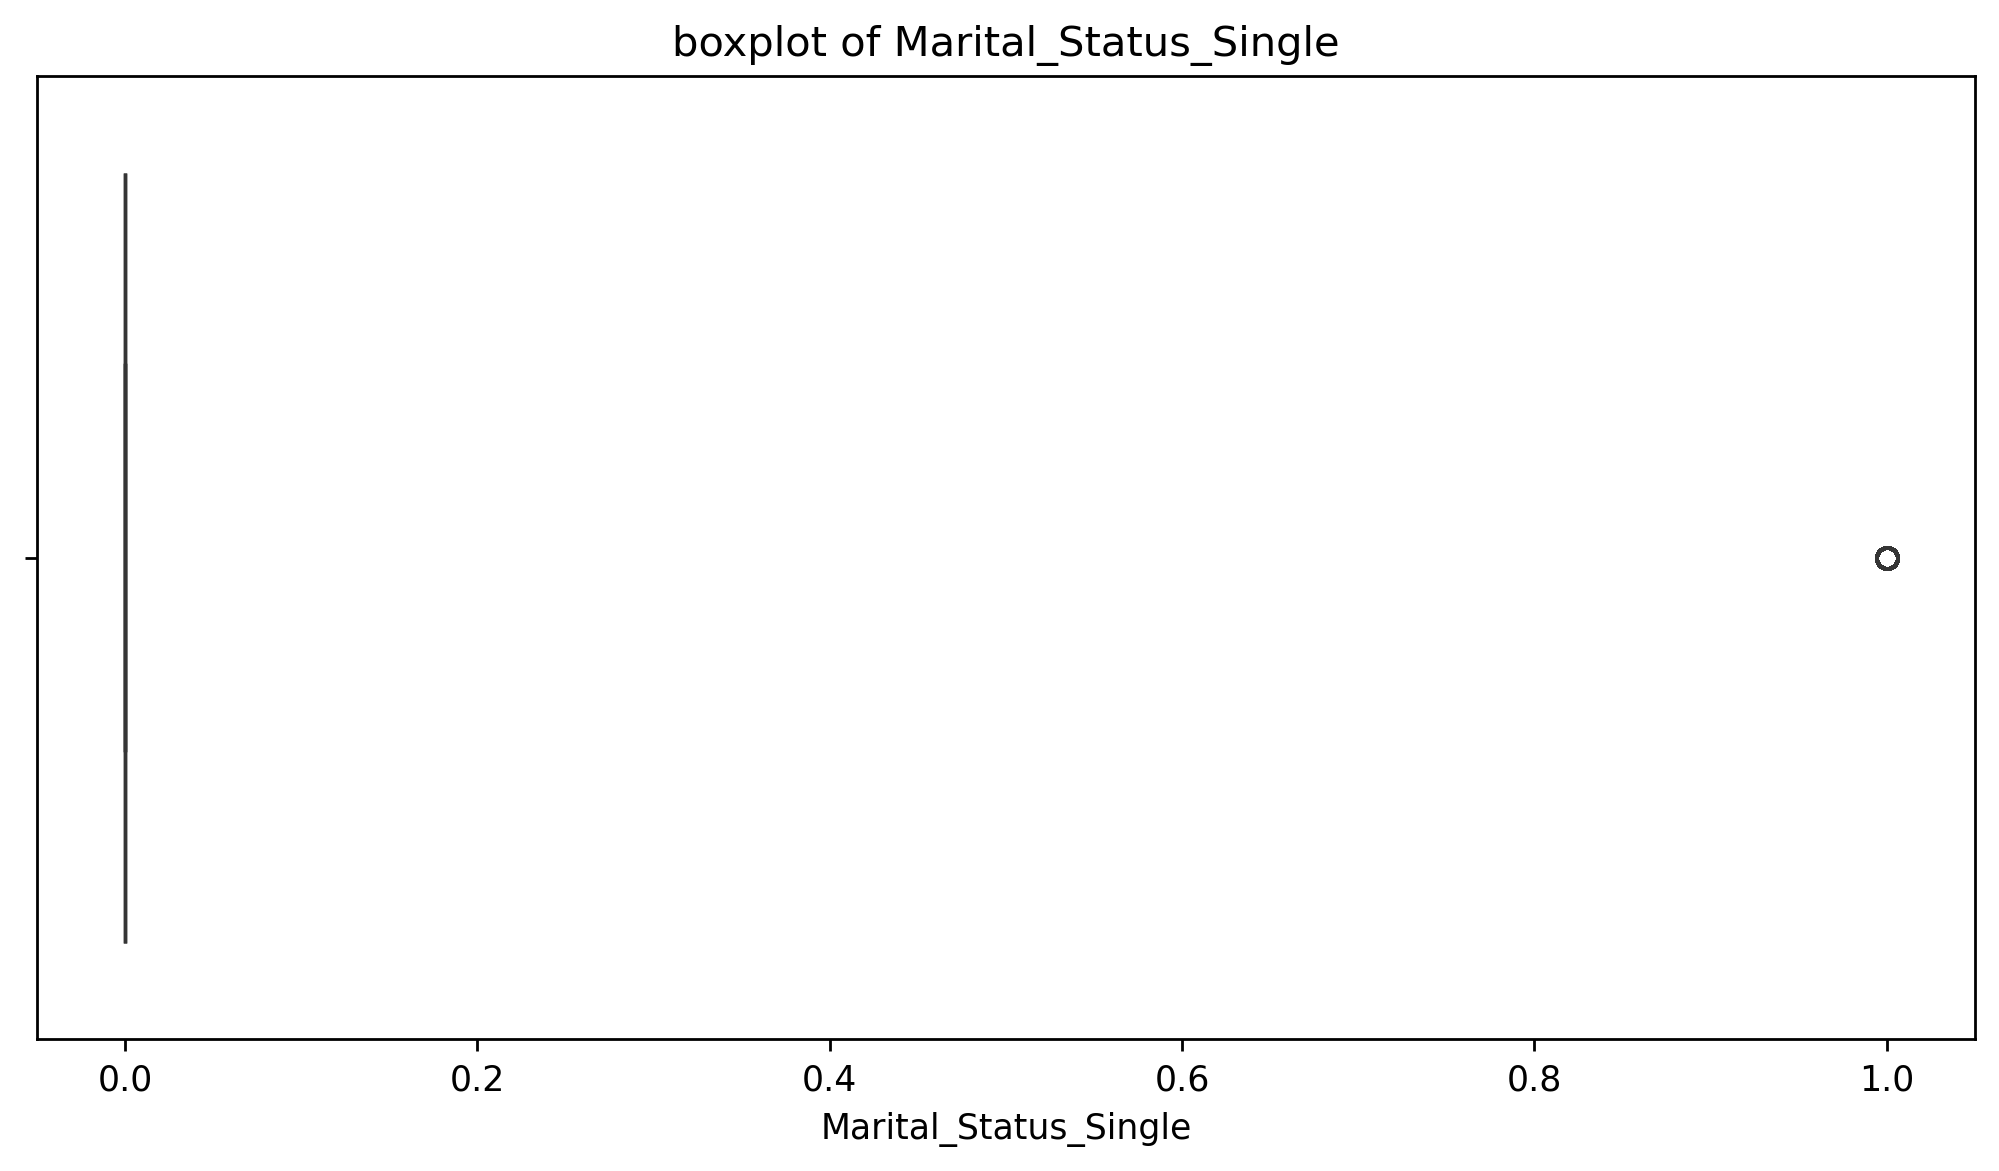

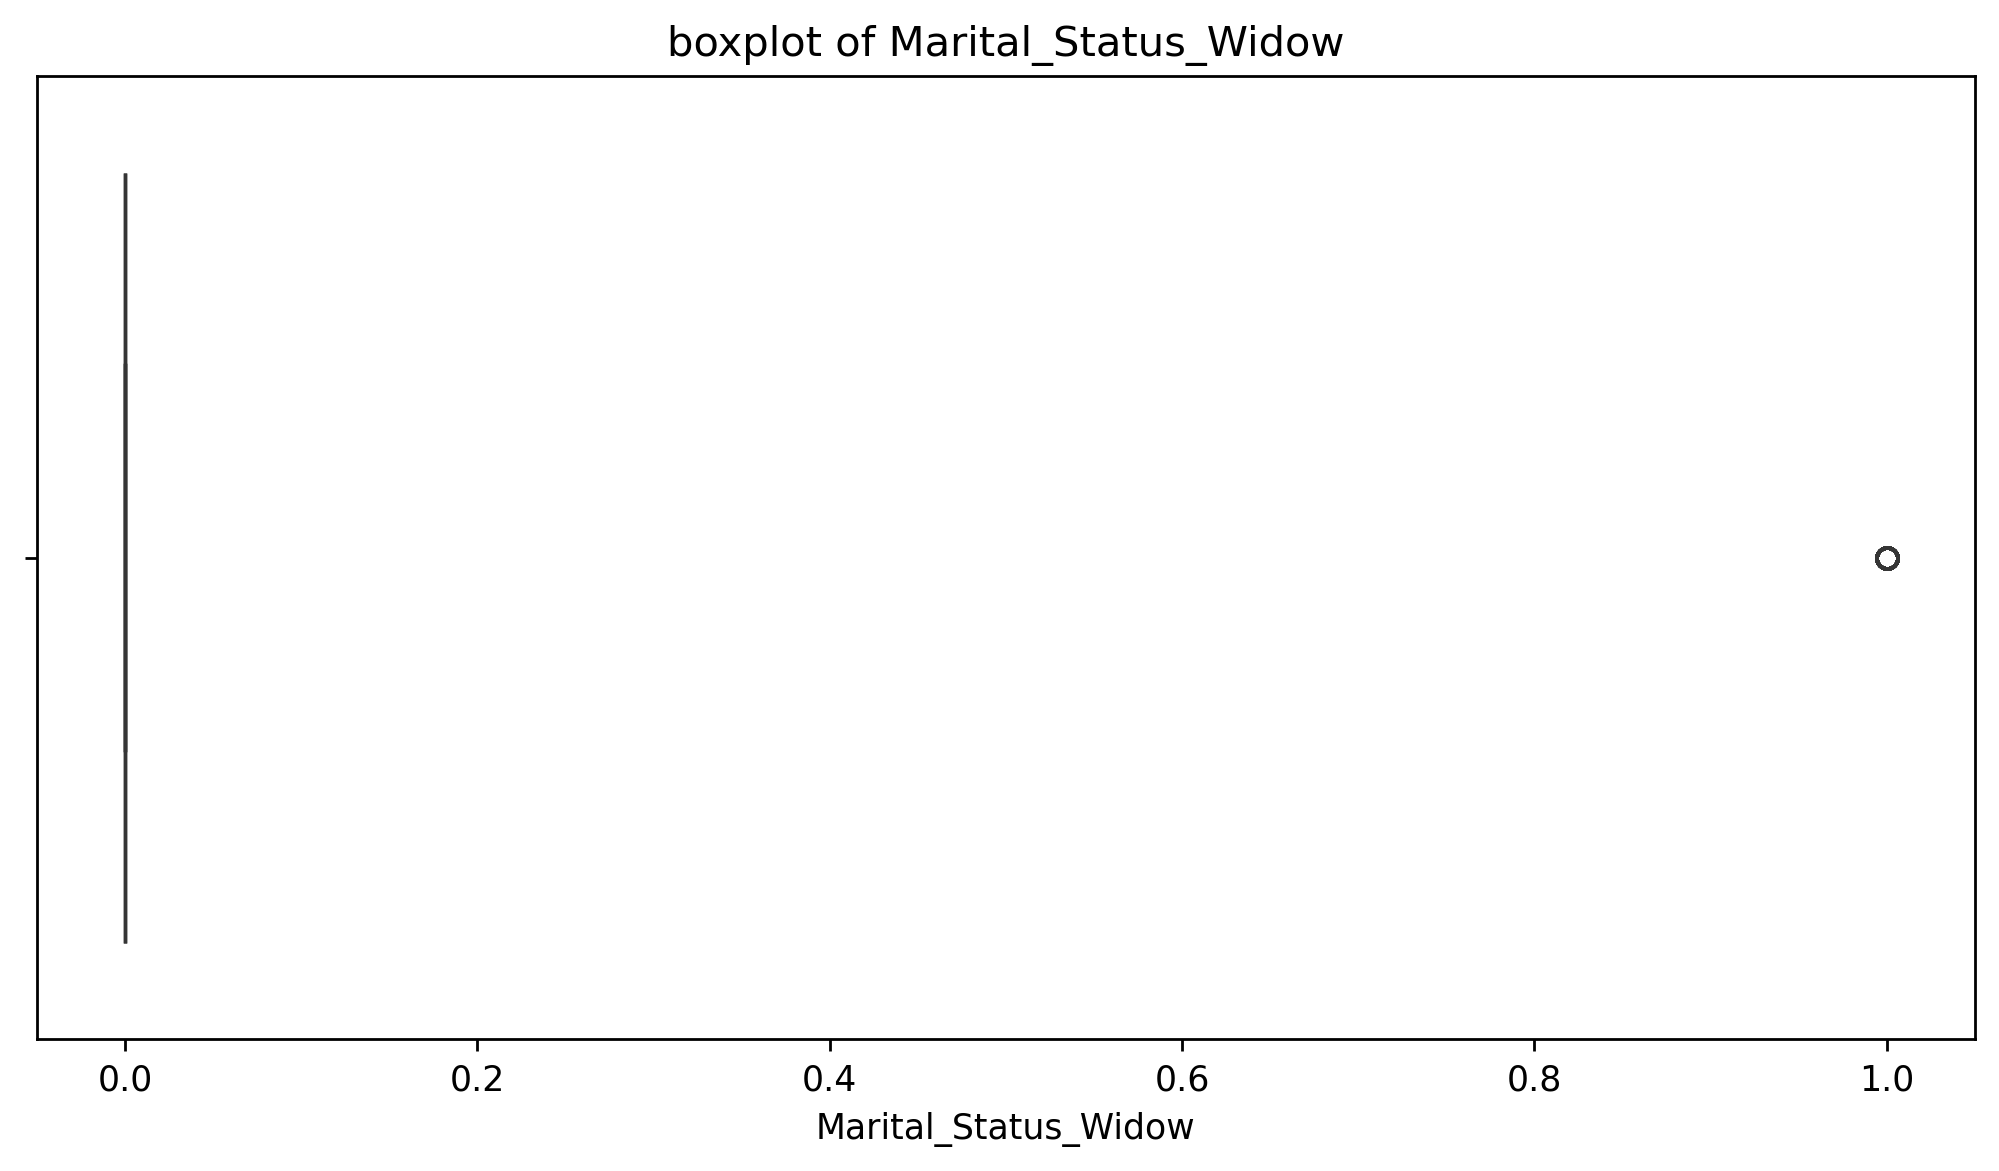

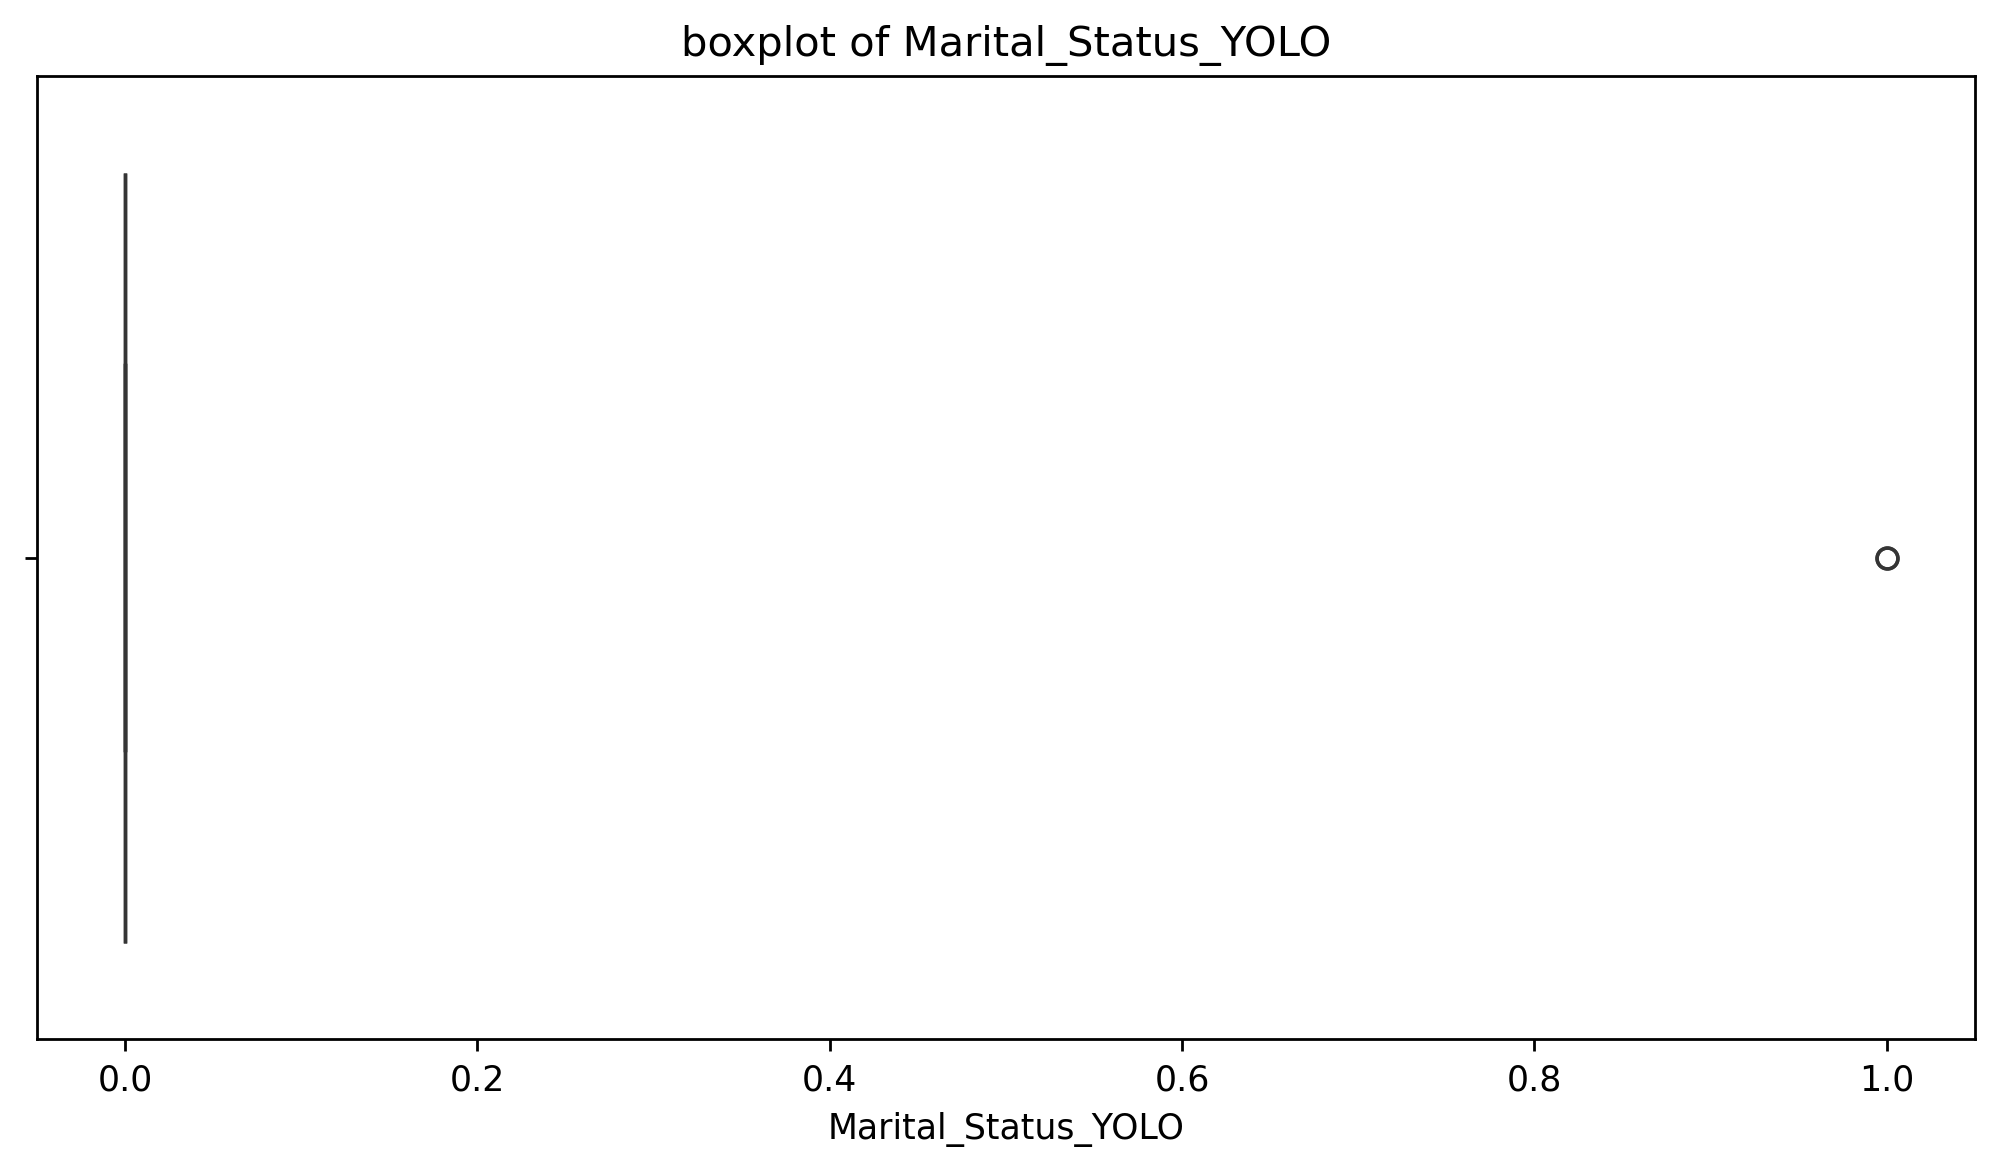

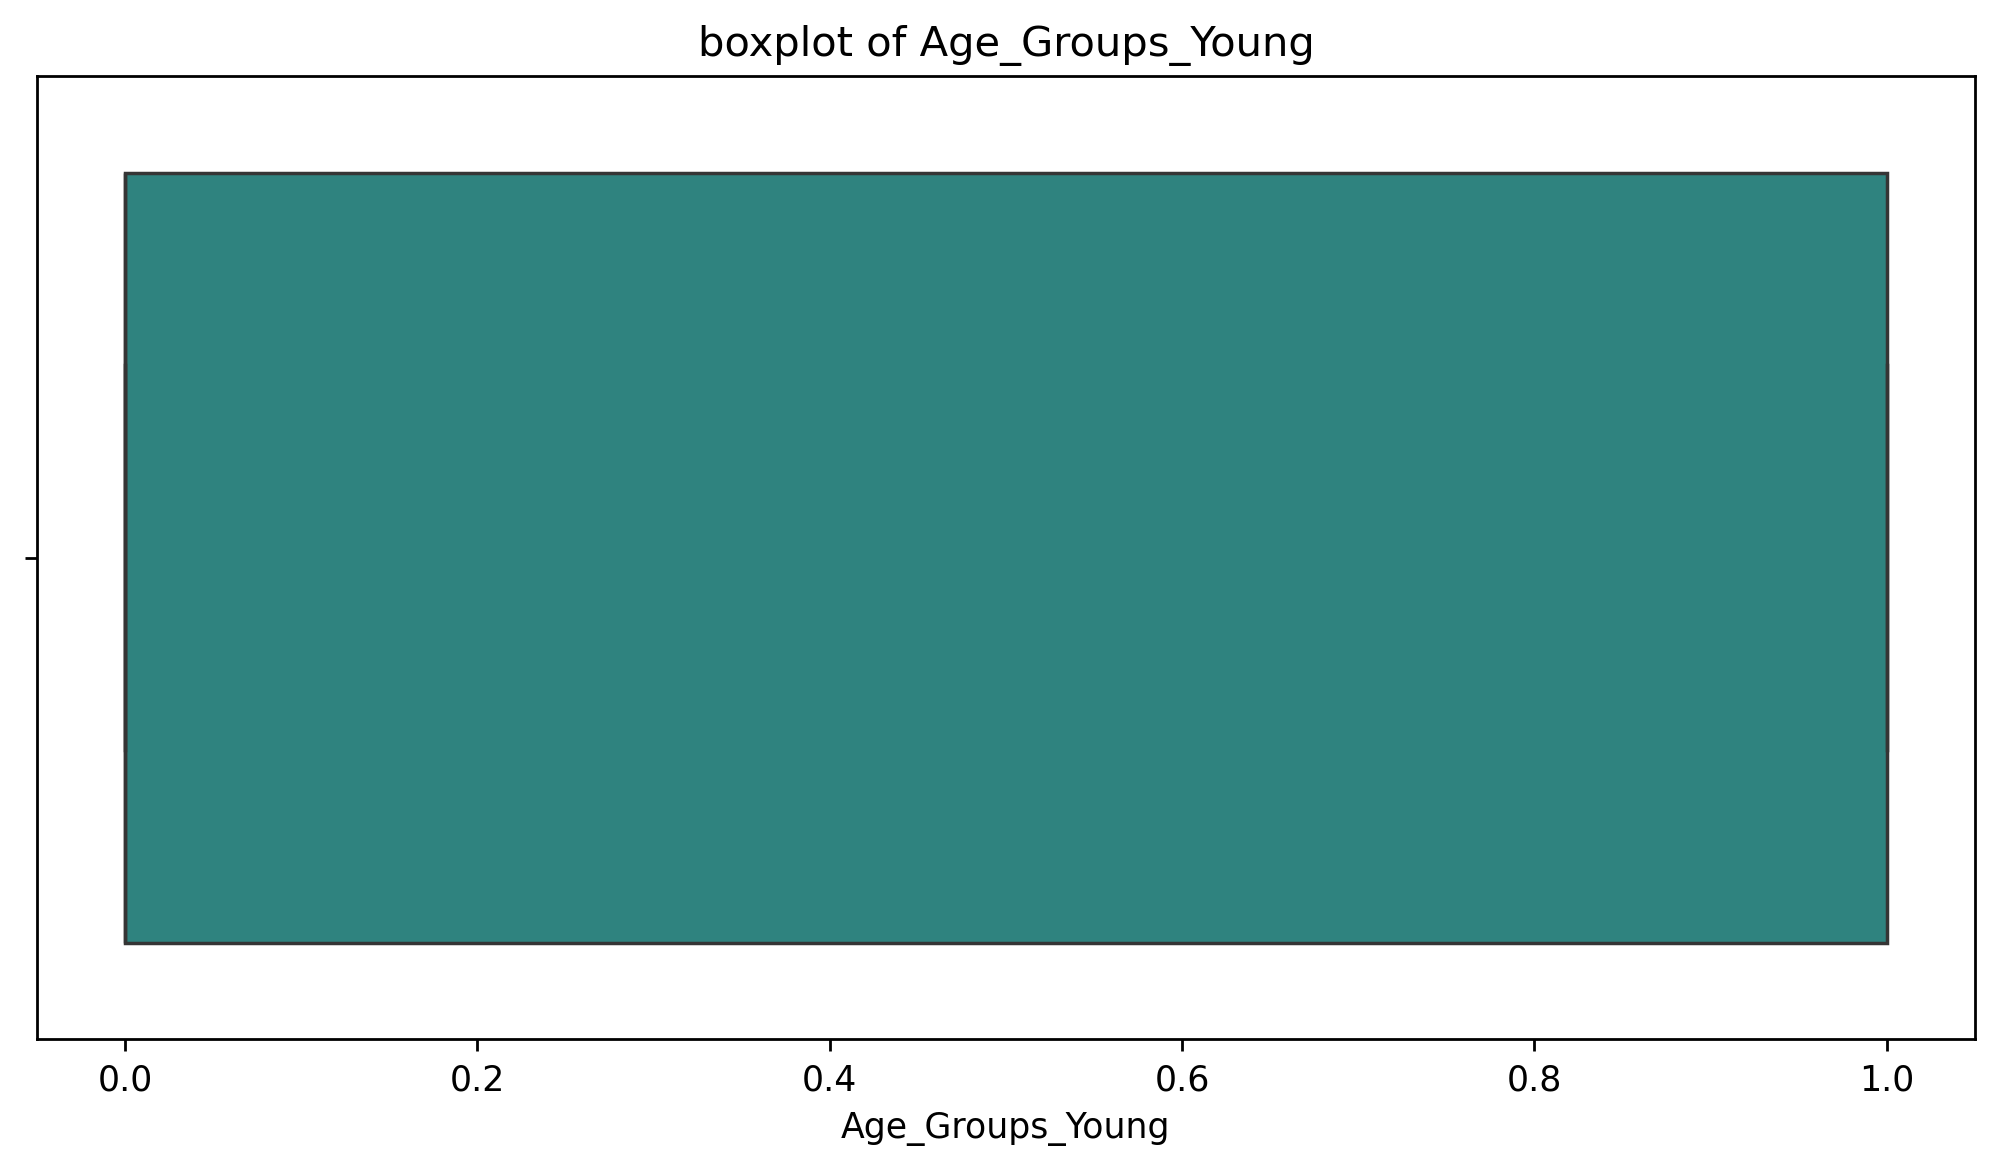

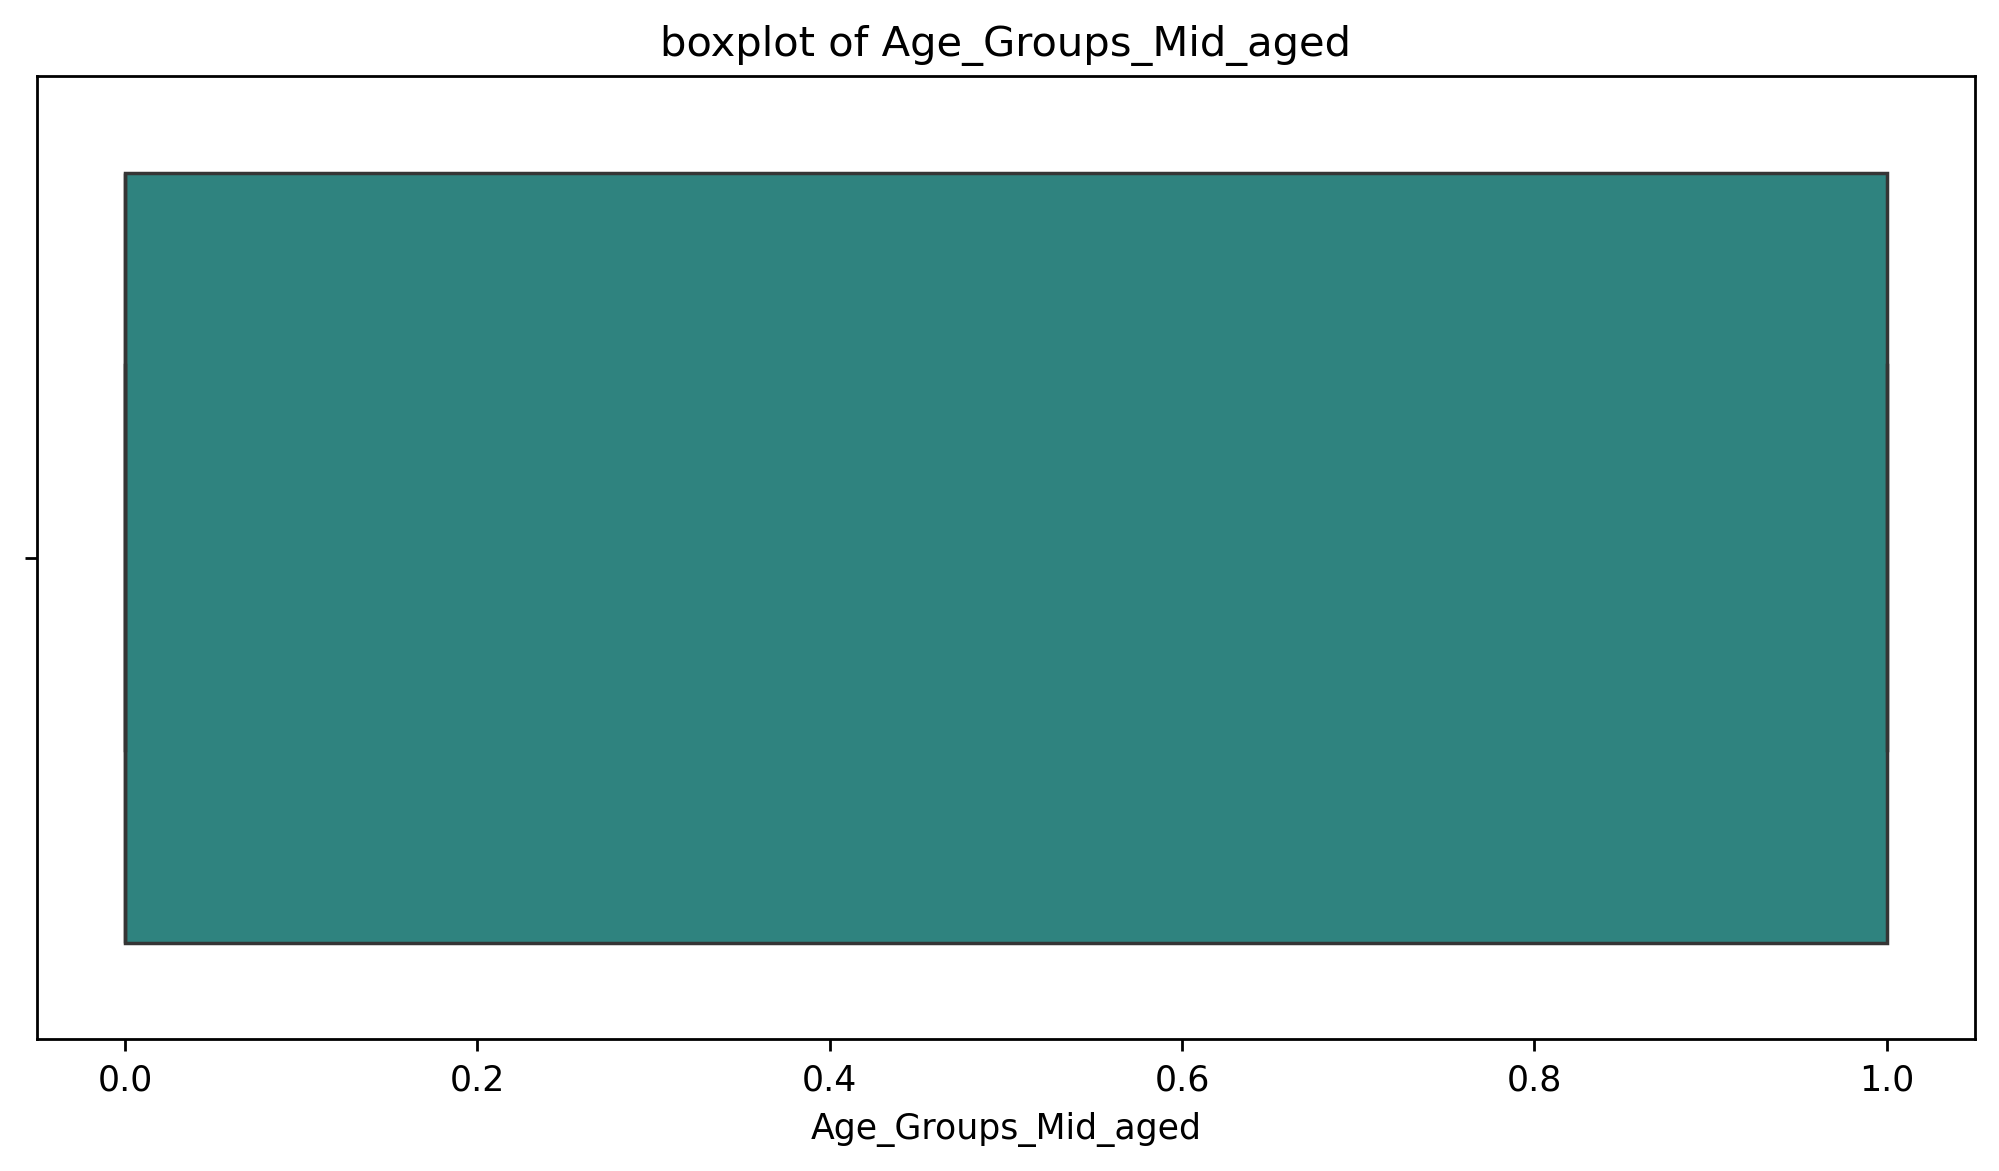

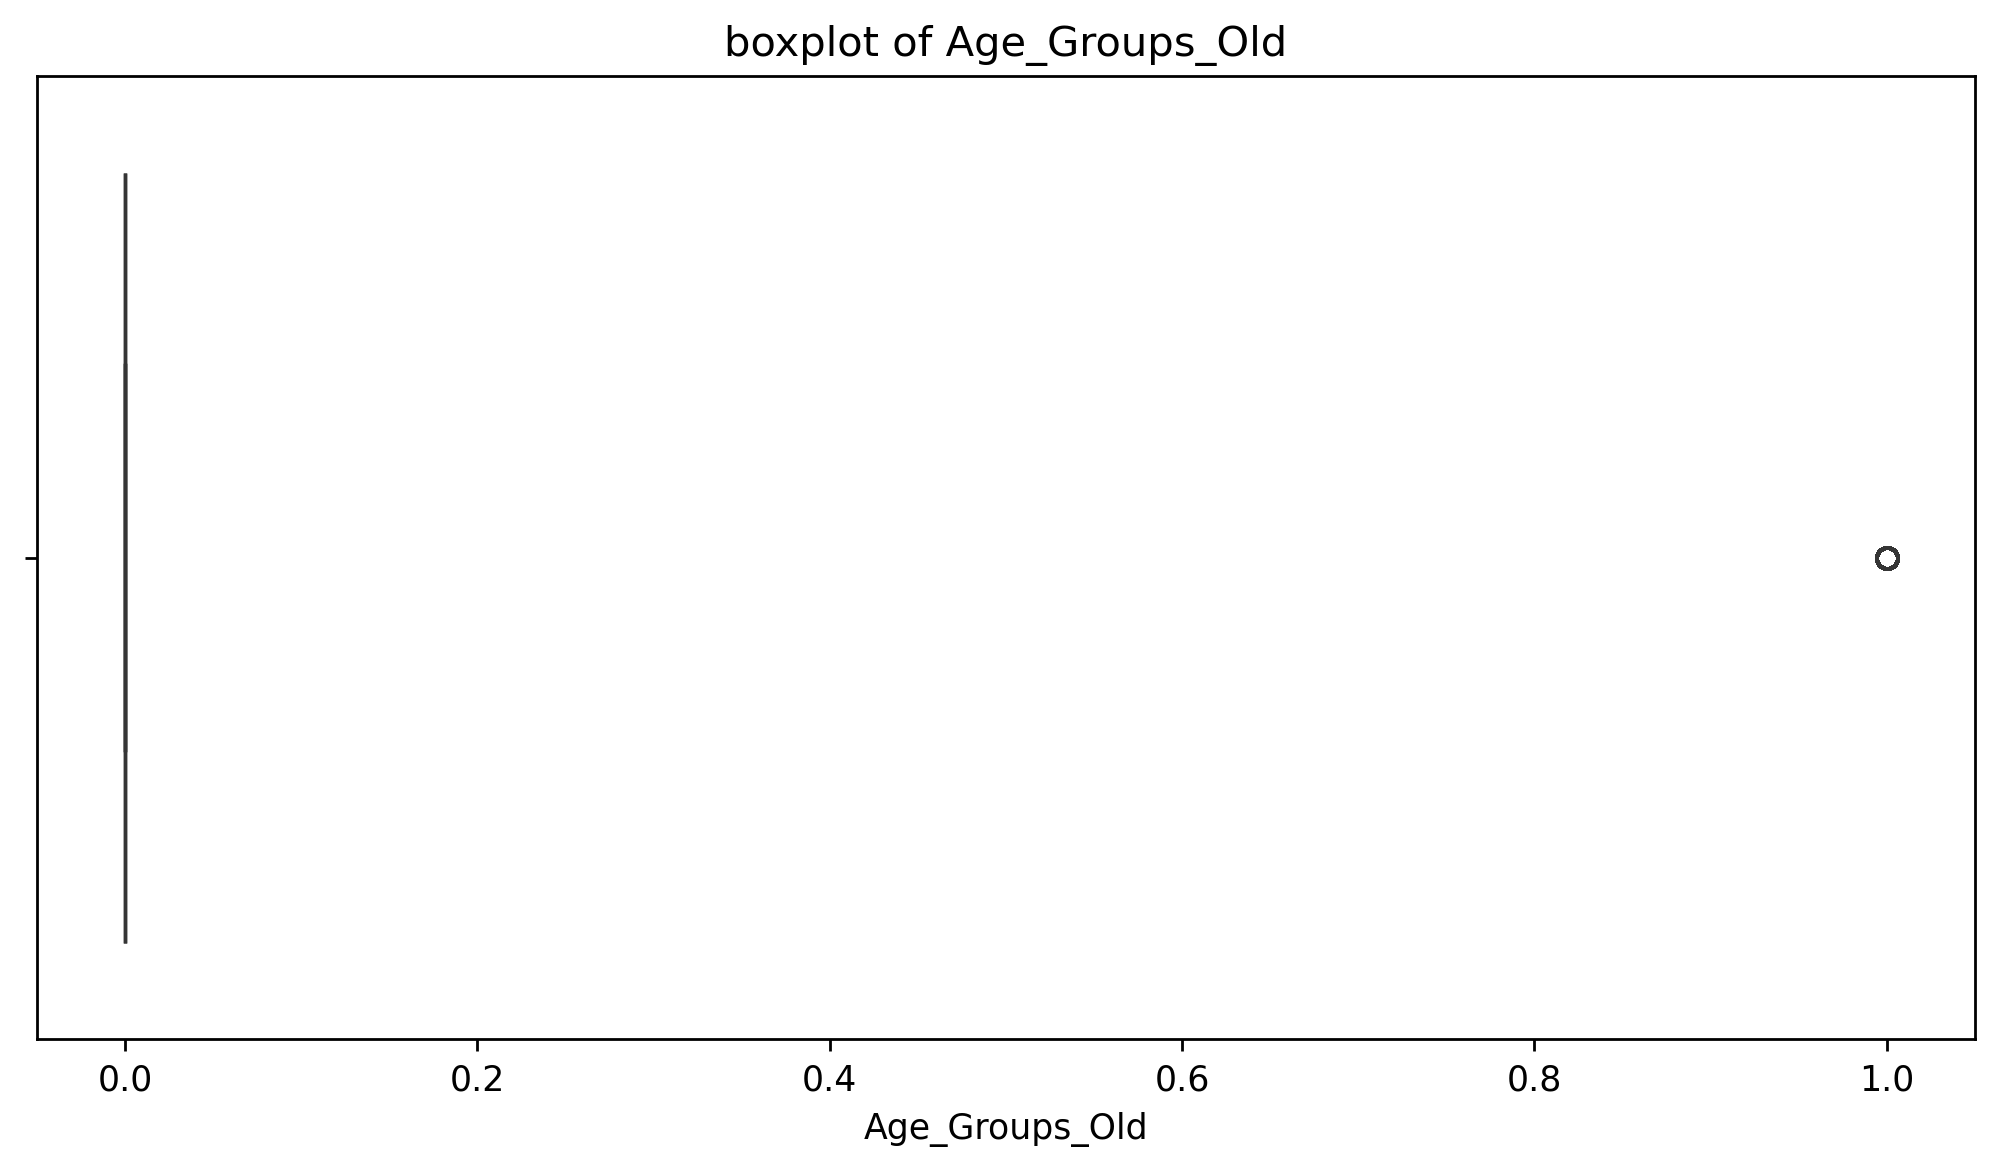

In [60]:
for column in df.columns:
    sns.boxplot(df[column], orient='h', palette='viridis')
    plt.title(f'boxplot of {column}')
    plt.show()

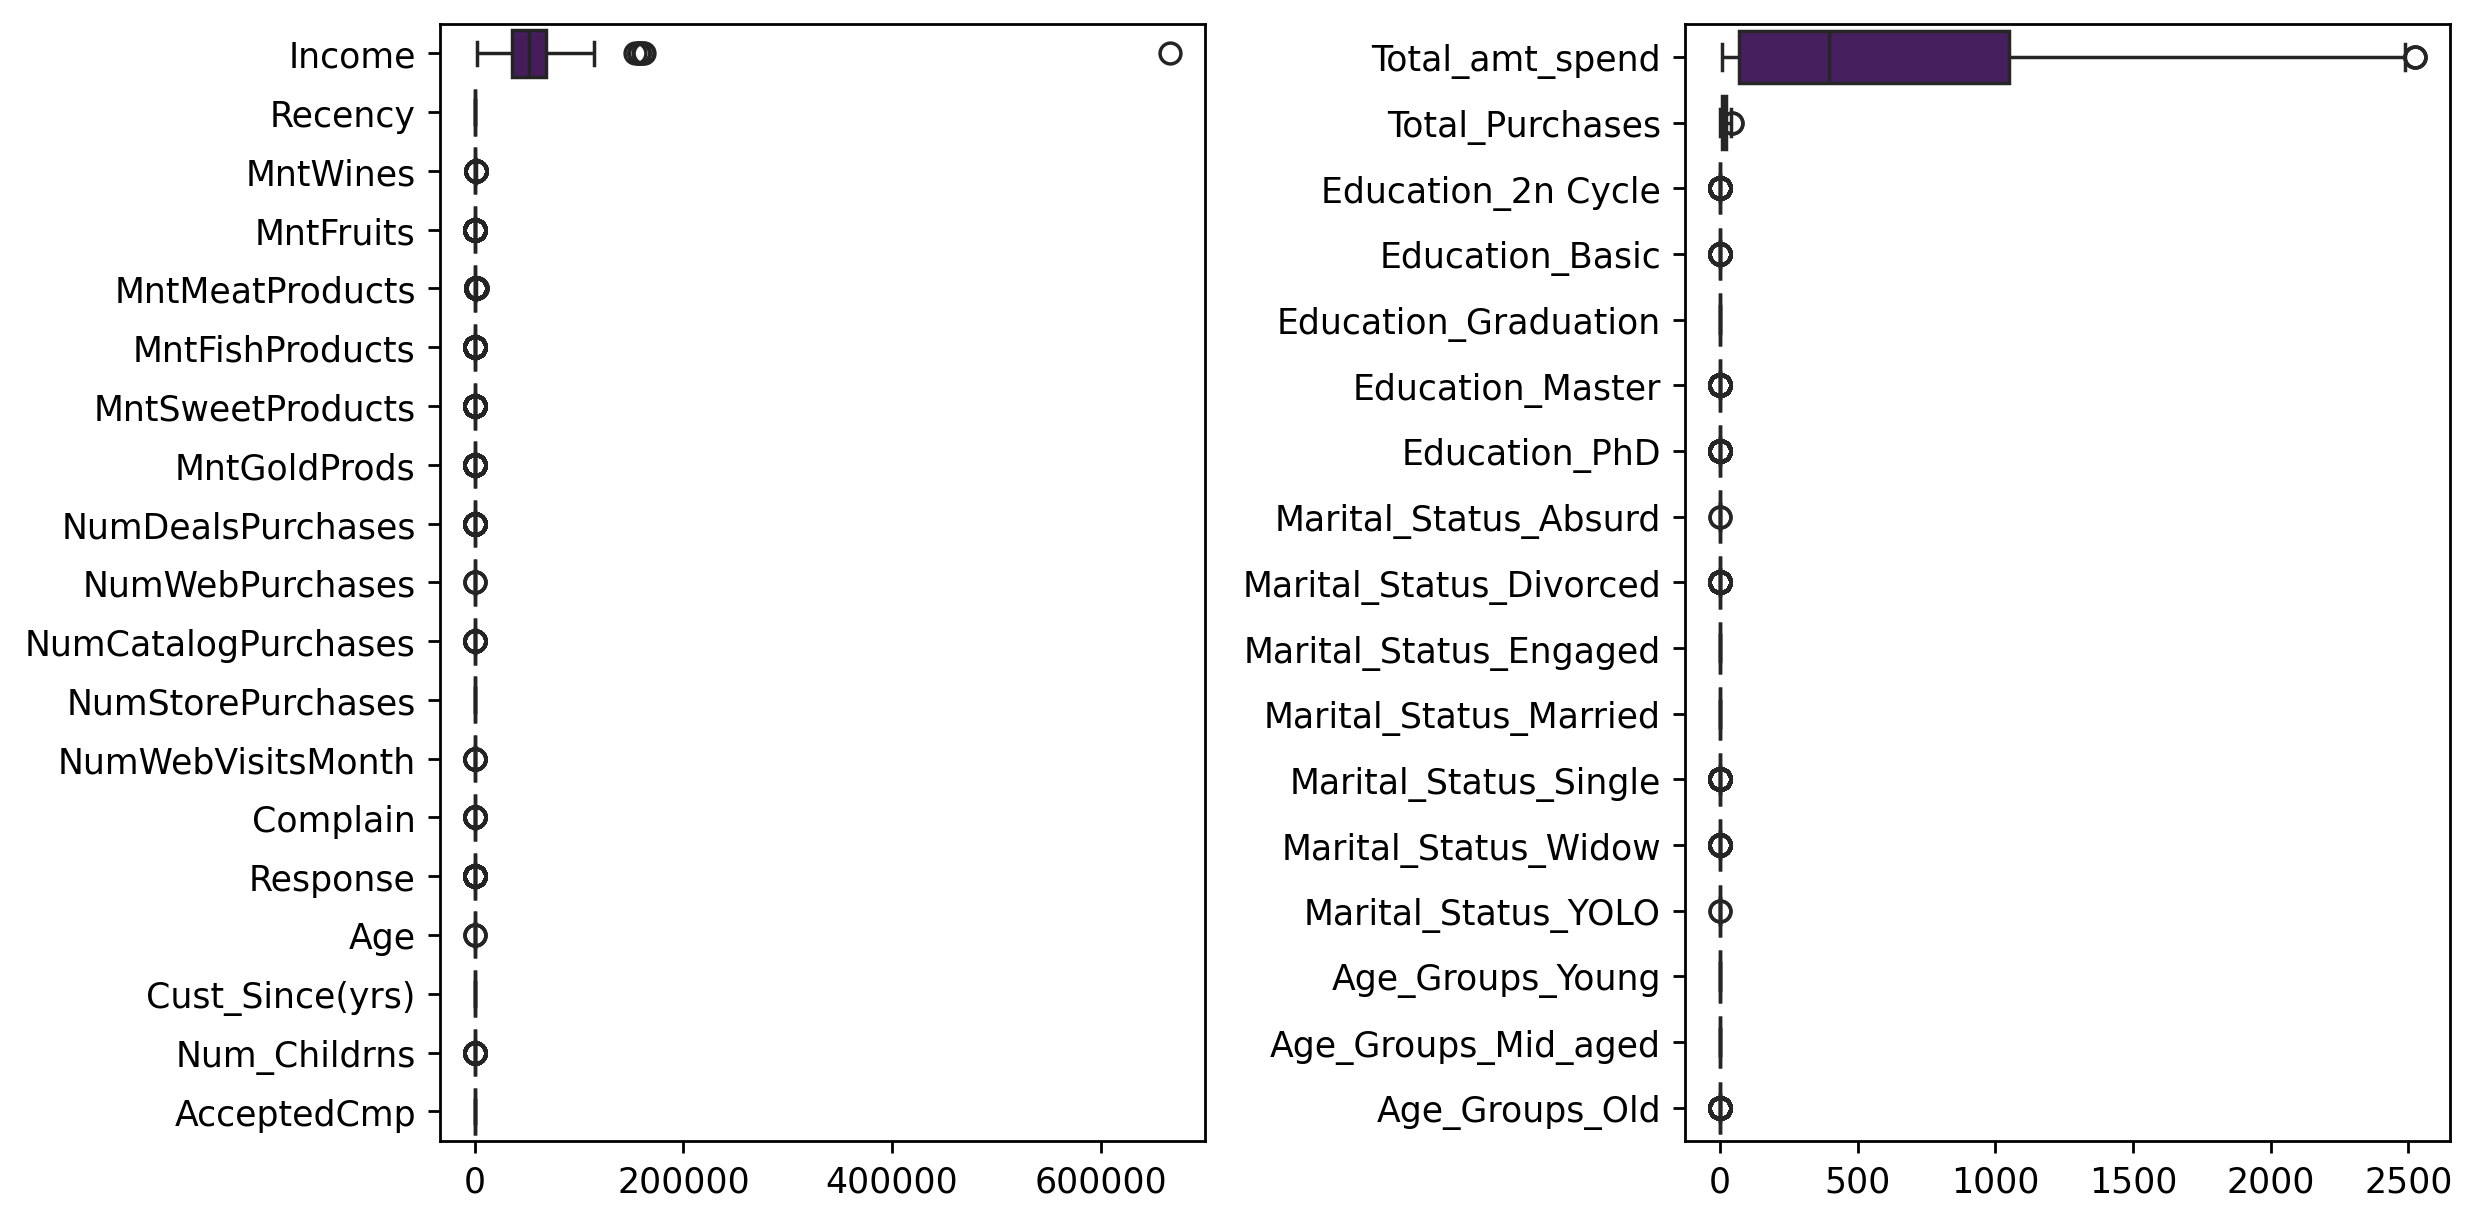

In [61]:
plt.subplot(1,2,1)
a = df.iloc[:, :19]
sns.boxplot(a, orient='h', palette='viridis')

plt.subplot(1,2,2)
b = df.iloc[:, 19:]
sns.boxplot(b, orient='h', palette='viridis')
plt.tight_layout()

In [62]:
# finding out the records with outliers vlaues using Isolation Forest method.
iso = IsolationForest()
iso.fit(df)
outliers = iso.predict(df)
outliers

array([-1,  1,  1, ...,  1,  1,  1])

In [63]:
# the values as -1 are the outliers values.
df['Outliers'] = outliers
df.head(3)

Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  58138.0       58       635         88              546              172   
1  46344.0       38        11          1                6                2   
2  71613.0       26       426         49              127              111   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  ...  \
0                88            88                  3                8  ...   
1                 1             6                  2                1  ...   
2                21            42                  1                8  ...   

   Marital_Status_Divorced  Marital_Status_Engaged  Marital_Status_Married  \
0                        0                       0                       0   
1                        0                       0                       0   
2                        0                       1                       0   

   Marital_Status_Single  Marital_Status_Widow  Marital_Status_YOLO  \
0                      1                     0                    0   
1                      1                     0                    0   
2                      0                     0                    0   

   Age_Groups_Young  Age_Groups_Mid_aged  Age_Groups_Old  Outliers  
0                 0                    0               1        -1  
1                 0                    0               1         1  
2                 0                    1               0         1  

[3 rows x 37 columns]

In [64]:
df[df['Outliers'] == -1]

Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0     58138.0       58       635         88              546              172   
15    82800.0       23      1006         22              115               59   
18    76995.0       91      1012         80              498                0   
21     2447.0       42         1          1             1725                1   
30    10979.0       34         8          4               10                2   
...       ...      ...       ...        ...              ...              ...   
2193  82347.0       38       556         54              845              202   
2194  73803.0       61       833         80              363               52   
2198  50501.0       10       297          0               38               13   
2210  41769.0       31       302         29              131               32   
2213  80617.0       42       594         51              631               72   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  ...  \
0                   88            88                  3                8  ...   
15                  68            45                  1                7  ...   
18                  16           176                  2               11  ...   
21                   1             1                 15                0  ...   
30                   2             4                  2                3  ...   
...                ...           ...                ...              ...  ...   
2193               133            63                  1                7  ...   
2194                26           174                  2                9  ...   
2198                 0           152                  7                5  ...   
2210                 0            27                  6                8  ...   
2213                55            32                  1                4  ...   

      Marital_Status_Divorced  Marital_Status_Engaged  Marital_Status_Married  \
0                           0                       0                       0   
15                          0                       0                       0   
18                          0                       0                       1   
21                          0                       0                       1   
30                          1                       0                       0   
...                       ...                     ...                     ...   
2193                        0                       0                       1   
2194                        0                       0                       1   
2198                        0                       0                       1   
2210                        1                       0                       0   
2213                        0                       0                       0   

      Marital_Status_Single  Marital_Status_Widow  Marital_Status_YOLO  \
0                         1                     0                    0   
15                        1                     0                    0   
18                        0                     0                    0   
21                        0                     0                    0   
30                        0                     0                    0   
...                     ...                   ...                  ...   
2193                      0                     0                    0   
2194                      0                     0                    0   
2198                      0                     0                    0   
2210                      0                     0                    0   
2213                      1                     0                    0   

      Age_Groups_Young  Age_Groups_Mid_aged  Age_Groups_Old  Outliers  
0                    0                    0               1        -1  
15                   0                    0            

In [65]:
# There are 537 rows in dataframe with outlier values which was causing skewness.

In [66]:
# creating a function to extract upper and lower extreme values of columns
def outlier (column, data):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

In [67]:
df.columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response', 'Age',
       'Cust_Since(yrs)', 'Num_Childrns', 'AcceptedCmp', 'Total_amt_spend',
       'Total_Purchases', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Absurd', 'Marital_Status_Divorced',
       'Marital_Status_Engaged', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Widow', 'Marital_Status_YOLO',
       'Age_Groups_Young', 'Age_Groups_Mid_aged', 'Age_Groups_Old',
       'Outliers'],
      dtype='object')

In [68]:
# Performing capping on selected columns to remove outliers
capping_colms = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth', 'Age', 'Total_amt_spend', 
                 'Total_Purchases']
for column in capping_colms:
    low, high = outlier(column, df)
    df.loc[df[column] > high, column] = high

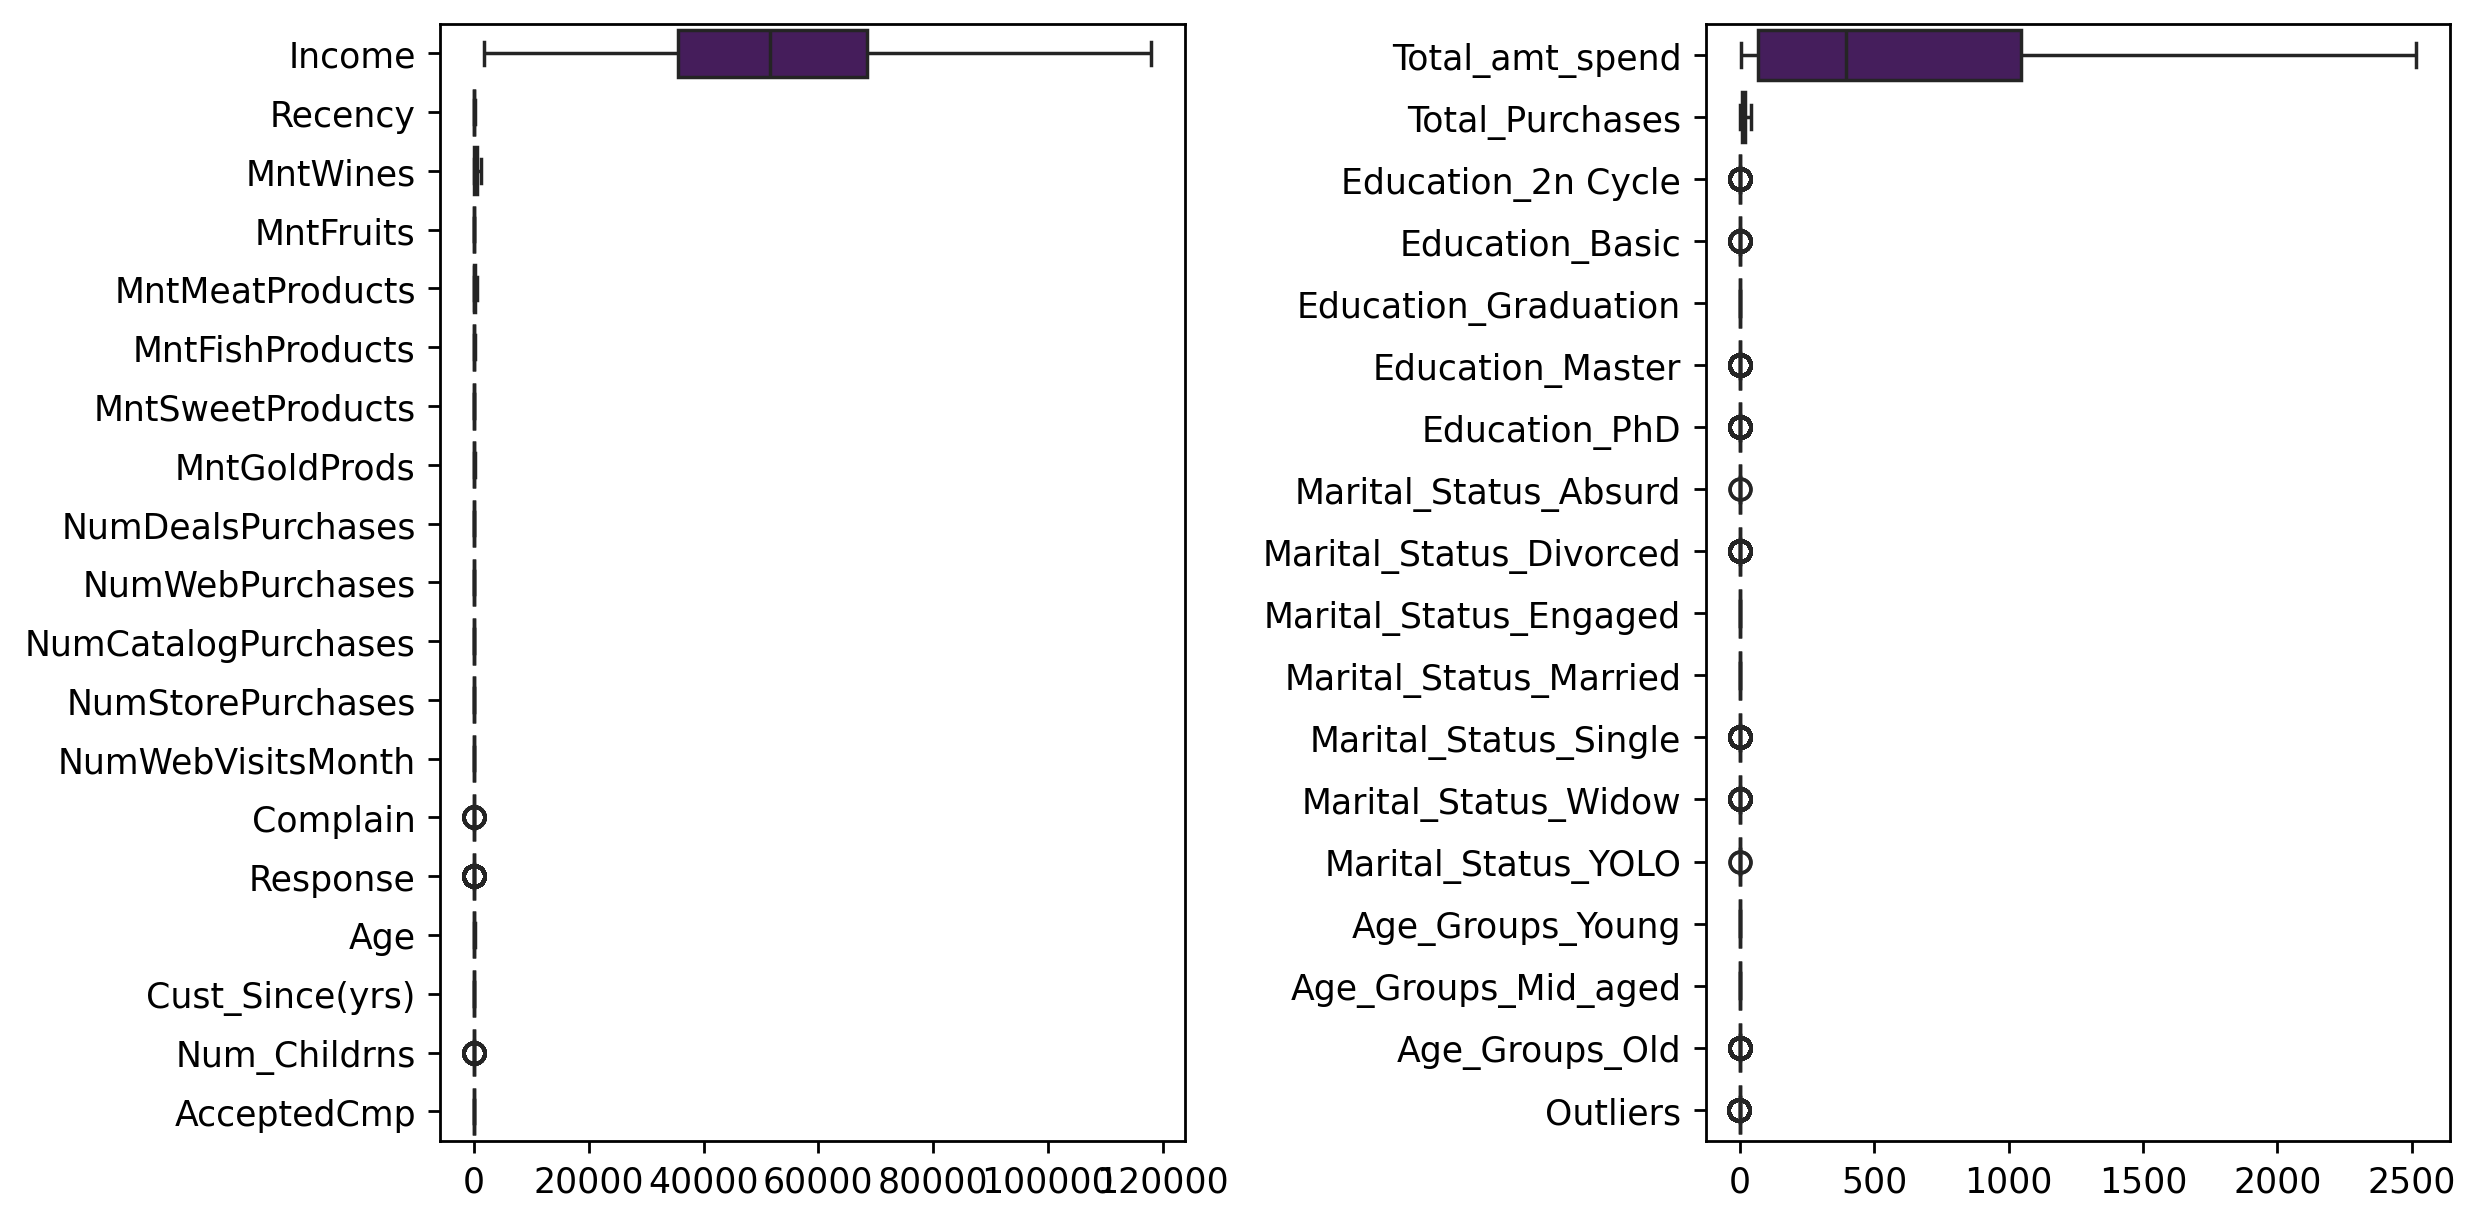

In [69]:
plt.subplot(1,2,1)
a = df.iloc[:, :19]
sns.boxplot(a, orient='h', palette='viridis')

plt.subplot(1,2,2)
b = df.iloc[:, 19:]
sns.boxplot(b, orient='h', palette='viridis')
plt.tight_layout()

In [70]:
# we can see that the outliers are removed.
# The columns which still having outliers are not affecting any error or not needed to be capped.

In [71]:
df.tail()

Income  Recency  MntWines  MntFruits  MntMeatProducts  \
2233  117909.5       23         9       14.0               18   
2235   61223.0       46       709       43.0              182   
2237   56981.0       91       908       48.0              217   
2238   69245.0        8       428       30.0              214   
2239   52869.0       40        84        3.0               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2233              8.0             1.000          12.0                  4   
2235             42.0            82.875         126.5                  2   
2237             32.0            12.000          24.0                  1   
2238             80.0            30.000          61.0                  2   
2239              2.0             1.000          21.0                  3   

      NumWebPurchases  ...  Marital_Status_Divorced  Marital_Status_Engaged  \
2233                3  ...                        0                       1   
2235                9  ...                        0                       0   
2237                2  ...                        1                       0   
2238                6  ...                        0                       1   
2239                3  ...                        0                       0   

      Marital_Status_Married  Marital_Status_Single  Marital_Status_Widow  \
2233                       0                      0                     0   
2235                       1                      0                     0   
2237                       0                      0                     0   
2238                       0                      0                     0   
2239                       1                      0                     0   

      Marital_Status_YOLO  Age_Groups_Young  Age_Groups_Mid_aged  \
2233                    0                 1                    0   
2235                    0                 0                    1   
2237                    0                 1                    0   
2238                    0                 0                    0   
2239                    0                 0                    0   

      Age_Groups_Old  Outliers  
2233               0         1  
2235               0         1  
2237               0         1  
2238               1         1  
2239               1         1  

[5 rows x 37 columns]

In [72]:
# Separating Numerical and Encoded columns from original dataframe for Standardization
std = df.iloc[:, :21]
non_std = df.iloc[:, 21:-1]

In [73]:
# Standardizing the data to scale down it
sc = StandardScaler()
# df = df.drop(columns = 'Outliers')
data = sc.fit_transform(std)
data = pd.DataFrame(data, columns=std.columns)
data.head(2)

Income   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  0.293653  0.315957  0.998254   2.160333         2.209850         2.195700   
1 -0.266029 -0.374256 -0.880687  -0.763541        -0.810714        -0.743309   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  ...  \
0          2.171799      1.222187           0.502350         1.477324  ...   
1         -0.754643     -0.838541          -0.148465        -1.160847  ...   

   NumStorePurchases  NumWebVisitsMonth  Complain  Response       Age  \
0          -0.550393           0.721305 -0.099652  2.349304  1.009856   
1          -1.168047          -0.128961 -0.099652 -0.425658  1.265430   

   Cust_Since(yrs)  Num_Childrns  AcceptedCmp  Total_amt_spend  \
0         1.502952     -1.276237     2.006473         1.672906   
1        -1.409868      1.406829    -1.120858        -0.962310   

   Total_Purchases  
0         1.322990  
1        -1.162585  

[2 rows x 21 columns]

In [74]:
# Reset indices of both DataFrames
data.reset_index(drop=True, inplace=True)
non_std.reset_index(drop=True, inplace=True)

# Concatenate the DataFrames
data = pd.concat([data, non_std], axis=1)
data.head(3)

Income   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  0.293653  0.315957  0.998254   2.160333         2.209850         2.195700   
1 -0.266029 -0.374256 -0.880687  -0.763541        -0.810714        -0.743309   
2  0.933106 -0.788384  0.368929   1.024306        -0.133884         1.960083   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  ...  \
0          2.171799      1.222187           0.502350         1.477324  ...   
1         -0.754643     -0.838541          -0.148465        -1.160847  ...   
2         -0.039787      0.066169          -0.799280         1.477324  ...   

   Marital_Status_Absurd  Marital_Status_Divorced  Marital_Status_Engaged  \
0                      0                        0                       0   
1                      0                        0                       0   
2                      0                        0                       1   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Widow  \
0                       0                      1                     0   
1                       0                      1                     0   
2                       0                      0                     0   

   Marital_Status_YOLO  Age_Groups_Young  Age_Groups_Mid_aged  Age_Groups_Old  
0                    0                 0                    0               1  
1                    0                 0                    0               1  
2                    0                 0                    1               0  

[3 rows x 36 columns]

In [75]:
# Now we can see that all the columns are now perfectly normally distributed

# Dimensionality Reduction using PCA

In [76]:
# performing PCA for dimensionality reduction.
pca = PCA()
pcs = pca.fit_transform(data)
pcs = pd.DataFrame(pcs, columns = data.columns) #projection calculated data
pcs

Income   Recency  MntWines  MntFruits  MntMeatProducts  \
0     5.446908  1.596027  2.450277   0.187151         0.692765   
1    -3.026638 -1.078554 -1.368121  -1.689769        -0.107140   
2     2.359628 -0.652188 -0.880698   0.232794        -0.368634   
3    -2.885269 -0.965010  0.881860   0.266688        -0.562896   
4     0.130790  0.326647 -0.646069   0.989476         0.098751   
...        ...       ...       ...        ...              ...   
2029 -1.231173  0.158876  0.255968  -0.234978        -0.494844   
2030  2.661378  0.753464 -0.120966   0.671445        -0.054614   
2031  1.727531 -1.444823 -0.801508   1.019534        -0.083605   
2032  2.428044 -0.195643 -0.822893  -1.798598        -0.483799   
2033 -1.767214  2.181263  1.887845  -1.966797         0.240943   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0           -1.998000         -1.180487     -1.640856           0.026894   
1            0.112623         -0.525647     -0.713752           0.389224   
2            0.616306         -1.052719      0.753371          -1.131450   
3            1.459526          0.391816     -0.103090          -0.526549   
4            1.114756          1.888227     -1.331204           0.180033   
...               ...               ...           ...                ...   
2029         1.122562          0.158046      0.160996           0.788015   
2030         0.097700         -0.550046     -0.946097          -1.012263   
2031         0.292934          2.149227      1.095938          -0.608143   
2032         1.393025         -0.589519     -0.268990          -0.791859   
2033        -1.499927         -0.476192     -0.634015           1.064792   

      NumWebPurchases  ...  Marital_Status_Absurd  Marital_Status_Divorced  \
0            0.662359  ...              -0.153205                -0.190278   
1           -0.390967  ...              -0.084896                -0.125938   
2            0.962276  ...              -0.034522                 0.095613   
3            0.193703  ...               0.024328                 0.037641   
4            0.980147  ...               0.015579                 0.128383   
...               ...  ...                    ...                      ...   
2029        -0.178312  ...               0.048794                 0.249001   
2030        -0.398151  ...              -0.033108                 0.068034   
2031         0.218311  ...              -0.018156                 0.107498   
2032         0.121393  ...              -0.098328                -0.196132   
2033         0.236936  ...              -0.117720                -0.107502   

      Marital_Status_Engaged  Marital_Status_Married  Marital_Status_Single  \
0                  -0.086637               -0.175337               0.120027   
1                   0.000816               -0.010501              -0.024037   
2                   0.033634                0.062036               0.054296   
3                  -0.067839                0.010187              -0.009285   
4                  -0.023116               -0.121939              -0.012915   
...                      ...                     ...                    ...   
2029                0.218274               -0.151592              -0.012547   
2030               -0.025994                0.067292              -0.096126   
2031                0.015127                0.068235               0.087764   
2032               -0.004966               -0.010752               0.040120   
2033                0.009391               -0.024773              -0.002914   

      Marital_Status_Widow  Marital_Status_YOLO  Age_Groups_Young  \
0                -0.004476            -0.006982     -2.124060e-15   
1                 0.001731            -0.002688     -1.470197e-15   
2                -0.005542             0.000698      1.292922e-15   
3                 0.000745            -0.001001      7.217985e-16   
4                -0.007087            -0.002341      4.591413e-15   
..

In [77]:
# checking how much information is captured by which projection curve
pca.explained_variance_ratio_

array([3.61553939e-01, 9.71463331e-02, 7.90838372e-02, 5.56816215e-02,
       4.46623326e-02, 4.17014811e-02, 3.89090538e-02, 3.33422396e-02,
       2.75613053e-02, 2.42878815e-02, 2.09314816e-02, 1.84814926e-02,
       1.55385316e-02, 1.49540979e-02, 1.40945623e-02, 1.39754871e-02,
       1.38018208e-02, 1.30070463e-02, 1.25390769e-02, 1.09901172e-02,
       9.67101240e-03, 8.82739221e-03, 7.87280674e-03, 6.37078274e-03,
       5.27223661e-03, 4.17220465e-03, 1.72442482e-03, 1.45818470e-03,
       1.13739984e-03, 8.60534961e-04, 2.89037592e-04, 5.83905939e-05,
       4.18531071e-05, 2.23877255e-33, 2.23877255e-33, 2.23877255e-33])

In [78]:
# cumulative sum of projection curves
np.cumsum(pca.explained_variance_ratio_)

array([0.36155394, 0.45870027, 0.53778411, 0.59346573, 0.63812806,
       0.67982954, 0.7187386 , 0.75208084, 0.77964214, 0.80393002,
       0.82486151, 0.843343  , 0.85888153, 0.87383563, 0.88793019,
       0.90190568, 0.9157075 , 0.92871454, 0.94125362, 0.95224374,
       0.96191475, 0.97074214, 0.97861495, 0.98498573, 0.99025797,
       0.99443017, 0.9961546 , 0.99761278, 0.99875018, 0.99961072,
       0.99989976, 0.99995815, 1.        , 1.        , 1.        ,
       1.        ])

Text(0.5, 1.0, 'Scree Plot')

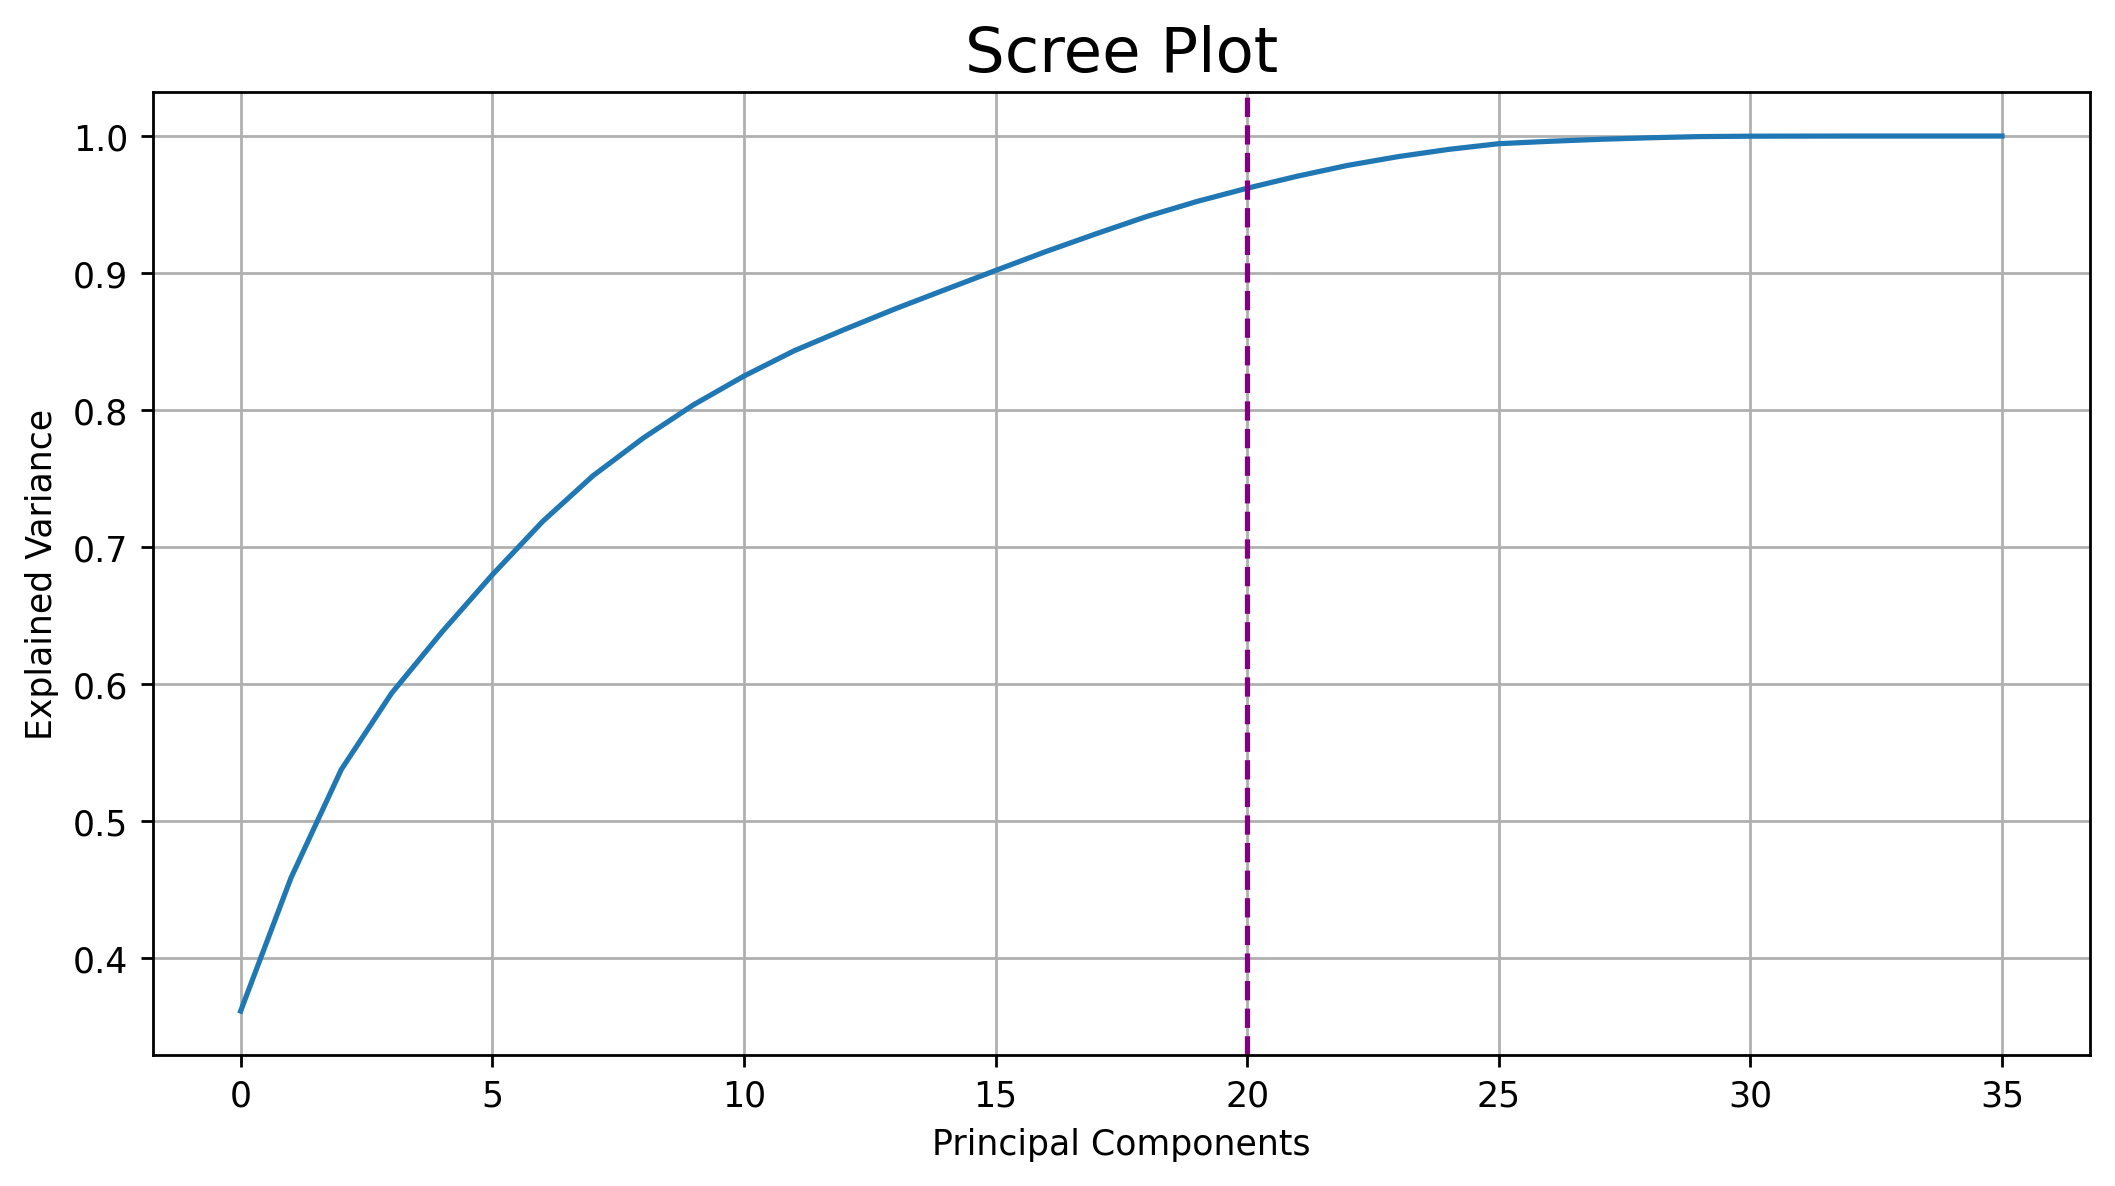

In [79]:
# Scree plot (Visualizing the projection curves)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.axvline(x=20, linestyle = '--', color = 'purple')
plt.title('Scree Plot', size = 18)

In [80]:
# Here also we can see that at 20th Principal COmponent(PC) it has covered more that 95% pf data.
# so I want to retain 95% of information from my original data (df)
# We will reduce the dimension from 37 to 20 of original data to pcs data using PCA technique.

In [81]:
# telling PCA to reduce dimension from 37 to 20.
pca = PCA(n_components=20)
pcs = pca.fit_transform(data)
pcs

array([[ 5.44690752,  1.59602712,  2.45027657, ...,  0.13644409,
        -0.41458034,  0.7117097 ],
       [-3.02663784, -1.07855384, -1.36812103, ..., -0.35346892,
         0.13807789,  0.31926572],
       [ 2.35962779, -0.652188  , -0.88069844, ..., -0.05189834,
         1.46885557, -0.20189546],
       ...,
       [ 1.72753078, -1.44482337, -0.80150774, ..., -0.89976891,
         0.81534403,  0.70702374],
       [ 2.42804436, -0.19564308, -0.82289258, ...,  1.07268594,
        -0.04101402,  0.27408211],
       [-1.76721409,  2.18126278,  1.88784459, ...,  0.59382812,
         0.3308447 , -0.05678387]])

In [82]:
pcs = pd.DataFrame(pcs, columns = data.columns[:20]) #projection calculated and dimension reduced data
pcs

Income   Recency  MntWines  MntFruits  MntMeatProducts  \
0     5.446908  1.596027  2.450277   0.187151         0.692765   
1    -3.026638 -1.078554 -1.368121  -1.689769        -0.107140   
2     2.359628 -0.652188 -0.880698   0.232794        -0.368634   
3    -2.885269 -0.965010  0.881860   0.266688        -0.562896   
4     0.130790  0.326647 -0.646069   0.989476         0.098751   
...        ...       ...       ...        ...              ...   
2029 -1.231173  0.158876  0.255968  -0.234978        -0.494844   
2030  2.661378  0.753464 -0.120966   0.671445        -0.054614   
2031  1.727531 -1.444823 -0.801508   1.019534        -0.083605   
2032  2.428044 -0.195643 -0.822893  -1.798598        -0.483799   
2033 -1.767214  2.181263  1.887845  -1.966797         0.240943   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0           -1.998000         -1.180487     -1.640856           0.026894   
1            0.112623         -0.525647     -0.713752           0.389224   
2            0.616306         -1.052719      0.753371          -1.131450   
3            1.459526          0.391816     -0.103090          -0.526549   
4            1.114756          1.888227     -1.331204           0.180033   
...               ...               ...           ...                ...   
2029         1.122562          0.158046      0.160996           0.788015   
2030         0.097700         -0.550046     -0.946097          -1.012263   
2031         0.292934          2.149227      1.095938          -0.608143   
2032         1.393025         -0.589519     -0.268990          -0.791859   
2033        -1.499927         -0.476192     -0.634015           1.064792   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0            0.662359            -1.138991           1.675125   
1           -0.390967            -0.456495           0.331870   
2            0.962276            -0.136496          -0.569202   
3            0.193703             0.014144           0.383381   
4            0.980147             0.289413           1.069280   
...               ...                  ...                ...   
2029        -0.178312             0.419425          -0.298536   
2030        -0.398151            -1.411210          -1.332593   
2031         0.218311            -0.118519           0.044790   
2032         0.121393             0.397001           0.134609   
2033         0.236936             0.762732          -0.373807   

      NumWebVisitsMonth  Complain  Response       Age  Cust_Since(yrs)  \
0             -0.019059  0.116210  0.056829 -0.093520         0.748449   
1              0.735838 -0.466735 -0.290718 -0.078136         0.413326   
2             -0.200257  0.328437 -0.053659 -1.339630        -0.175534   
3              0.276430 -0.301208 -0.736248 -0.333813         0.606982   
4             -0.319012 -0.657144  0.758031  0.316216        -0.090599   
...                 ...       ...       ...       ...              ...   
2029           1.035393 -0.322552  0.717344 -1.286317         1.182753   
2030           0.298256  0.740867  0.522827  0.826219         0.201430   
2031          -0.785133 -1.660371 -1.548529  0.612776        -0.080890   
2032           0.420666 -0.056450 -0.651904 -0.442286        -0.008950   
2033           0.633094 -0.491250  0.650311  0.581683        -0.101403   

      Num_Childrns  AcceptedCmp  Total_amt_spend  
0         0.136444    -0.414580         0.711710  
1        -0.353469     0.138078         0.319266  
2        -0.051898     1.468856        -0.201895  
3         0.016603    -0.149469        -0.012290  
4         0.902417    -0.263946        -0.259885  
...            ...          ...              ...  
2029      0.112770    -0.368417        -1.203745  
2030     -0.304515    -1.312188        -0.694250  
2031     -0.899769     0.815344         0.707024  
2032      1.072686    -0.041014         0.274082  
2033      0.593828     0.330845        -0.056784  

[2034 rows x 20 col

In [83]:
# So we have successfully reduced dimension of data from 37 to 20, covering 96% of information

In [84]:
# Exporting PCA dataframe for further model building
df.to_csv('PCA.csv', index=False)

In [85]:
!streamlit run “/Users/eshanakshata/Desktop/Project one/app.py”

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Streamlit requires raw Python (.py) files, but the provided file has no extension.
For more information, please see https://docs.streamlit.io
